In [1]:
from perses.utils.openeye import *
from perses.annihilation.relative import HybridTopologyFactory
from perses.rjmc.topology_proposal import PointMutationEngine
from perses.rjmc.geometry import FFAllAngleGeometryEngine

import simtk.openmm as openmm
import simtk.openmm.app as app
import simtk.unit as unit
import numpy as np
from openmoltools import forcefield_generators
import copy
import mdtraj as md
from openmmtools.constants import kB
from perses.tests.utils import validate_endstate_energies
from openforcefield.topology import Molecule
from openmmforcefields.generators import SystemGenerator

INFO:numexpr.utils:Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=6)
           2	LOAD_GLOBAL(arg=0, lineno=6)
           4	LOAD_METHOD(arg=1, lineno=6)
           6	LOAD_CONST(arg=1, lineno=6)
           8	CALL_METHOD(arg=1, lineno=6)
          10	STORE_FAST(arg=2, lineno=6)
          12	LOAD_FAST(arg=0, lineno=7)
          14	LOAD_CONST(arg=2, lineno=7)
          16	BINARY_SUBSCR(arg=None, lineno=7)
          18	LOAD_FAST(arg=1, lineno=7)
          20	LOAD_CONST(arg=3, lineno=7)
          22	BINARY_SUBSCR(arg=None, lineno=7)
          24	BINARY_MULTIPLY(arg=None, lineno=7)
          26	LOAD_FAST(arg=0, lineno=7)
          28	LOAD_CONST(arg=3, lineno=7)
          30	BINARY_SUBSC

DEBUG:numba.core.byteflow:stack ['$60binary_multiply.27', '$66binary_subscr.30', '$b68.31']
DEBUG:numba.core.byteflow:dispatch pc=72, inst=BINARY_SUBSCR(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$60binary_multiply.27', '$66binary_subscr.30', '$b68.31', '$const70.32']
DEBUG:numba.core.byteflow:dispatch pc=74, inst=BINARY_MULTIPLY(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$60binary_multiply.27', '$66binary_subscr.30', '$72binary_subscr.33']
DEBUG:numba.core.byteflow:dispatch pc=76, inst=BINARY_SUBTRACT(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$60binary_multiply.27', '$74binary_multiply.34']
DEBUG:numba.core.byteflow:dispatch pc=78, inst=LOAD_FAST(arg=2, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35']
DEBUG:numba.core.byteflow:dispatch pc=80, inst=LOAD_CONST(arg=2, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35', '$c78.36']
DEBUG:numba.core.byteflow:dispatch pc=82, inst=STORE_SUBSCR(arg=None, lineno=8)
DEBUG:numba

DEBUG:numba.core.interpreter:label 0:
    a = arg(0, name=a)                       ['a']
    b = arg(1, name=b)                       ['b']
    $2load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_method.1 = getattr(value=$2load_global.0, attr=zeros) ['$2load_global.0', '$4load_method.1']
    $const6.2 = const(int, 3)                ['$const6.2']
    $8call_method.3 = call $4load_method.1($const6.2, func=$4load_method.1, args=[Var($const6.2, coordinate_numba.py:6)], kws=(), vararg=None) ['$4load_method.1', '$8call_method.3', '$const6.2']
    c = $8call_method.3                      ['$8call_method.3', 'c']
    $const14.5 = const(int, 1)               ['$const14.5']
    $16binary_subscr.6 = getitem(value=a, index=$const14.5) ['$16binary_subscr.6', '$const14.5', 'a']
    $const20.8 = const(int, 2)               ['$const20.8']
    $22binary_subscr.9 = getitem(value=b, ind

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659bbe9588>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=zeros)
DEBUG:numba.core.ssa:on stmt: $const6.2 = const(int, 3)
DEBUG:numba.core.ssa:on stmt: $8call_method.3 = call $4load_method.1($const6.2, func=$4load_method.1, args=[Var($const6.2, coordinate_numba.py:6)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: c = $8call_method.3
DEBUG:numba.core.ssa:on stmt: $const14.5 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $16binary_subscr.6 = static_get

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=14)
           2	LOAD_GLOBAL(arg=0, lineno=14)
           4	LOAD_METHOD(arg=1, lineno=14)
           6	LOAD_FAST(arg=0, lineno=14)
           8	LOAD_FAST(arg=0, lineno=14)
          10	CALL_METHOD(arg=2, lineno=14)
          12	STORE_FAST(arg=1, lineno=14)
          14	LOAD_GLOBAL(arg=0, lineno=15)
          16	LOAD_METHOD(arg=2, lineno=15)
          18	LOAD_FAST(arg=1, lineno=15)
          20	CALL_METHOD(arg=1, lineno=15)
          22	RETURN_VALUE(arg=None, lineno=15)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=14)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=14)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.cor

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.ssa:-----------------------------------AFTER SSA------------------------------------
DEBUG:numba.core.ssa:label 0:
    a = arg(0, name=a)                       ['a']
    $2load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>) ['$2load_global.0']
    $4load_method.1 = getattr(value=$2load_global.0, attr=dot) ['$2load_global.0', '$4load_method.1']
    $10call_method.4 = call $4load_method.1(a, a, func=$4load_method.1, args=[Var(a, coordinate_numba.py:14), Var(a, coordinate_numba.py:14)], kws=(), vararg=None) ['$10call_method.4', '$4load_method.1', 'a', 'a']
    n_2 = $10call_method.4                   ['$10call_method.4', 'n_2']
    $14load_global.5 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>) ['$14load_global.5']
    $16load_method.6 = getattr(value=$14load_global.5, 

DEBUG:numba.core.ssa:-----------------------------------BEFORE SSA-----------------------------------
DEBUG:numba.core.ssa:label 0:
    a = arg(0, name=a)                       ['a']
    b = arg(1, name=b)                       ['b']
    $4load_attr.1 = getattr(value=a, attr=shape) ['$4load_attr.1', 'a']
    $6unpack_sequence.3 = exhaust_iter(value=$4load_attr.1, count=1) ['$4load_attr.1', '$6unpack_sequence.3']
    $6unpack_sequence.2 = static_getitem(value=$6unpack_sequence.3, index=0, index_var=None) ['$6unpack_sequence.2', '$6unpack_sequence.3']
    m = $6unpack_sequence.2                  ['$6unpack_sequence.2', 'm']
    $12load_attr.5 = getattr(value=b, attr=shape) ['$12load_attr.5', 'b']
    $14unpack_sequence.7 = exhaust_iter(value=$12load_attr.5, count=1) ['$12load_attr.5', '$14unpack_sequence.7']
    $14unpack_sequence.6 = static_getitem(value=$14unpack_sequence.7, index=0, index_var=None) ['$14unpack_sequence.6', '$14unpack_sequence.7']
    n = $14unpack_sequence.6          

DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_DEREF(arg=0, lineno=308)
DEBUG:numba.core.byteflow:stack ['$n2.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=COMPARE_OP(arg=4, lineno=308)
DEBUG:numba.core.byteflow:stack ['$n2.0', '$4load_deref.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=18, lineno=308)
DEBUG:numba.core.byteflow:stack ['$6compare_op.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=18, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=18 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_GLOBAL(arg=0, lineno=309)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_CONST(arg=1, lineno=309)
DEBUG:numba.core.byteflow:stack ['$10load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=22)
           2	LOAD_GLOBAL(arg=0, lineno=22)
           4	LOAD_FAST(arg=0, lineno=22)
           6	CALL_FUNCTION(arg=1, lineno=22)
           8	STORE_FAST(arg=2, lineno=22)
          10	SETUP_LOOP(arg=32, lineno=23)
          12	LOAD_GLOBAL(arg=1, lineno=23)
          14	LOAD_CONST(arg=1, lineno=23)
          16	CALL_FUNCTION(arg=1, lineno=23)
          18	GET_ITER(arg=None, lineno=23)
>         20	FOR_ITER(arg=20, lineno=23)
          22	STORE_FAST(arg=3, lineno=23)
          24	LOAD_FAST(arg=0, lineno=24)
          26	LOAD_FAST(arg=3, lineno=24)
          28	BINARY_SUBSCR(arg=None, lineno=24)
          30	LOAD_FAST(arg=2, lineno=24)
          32	BINARY_TRUE_DIVIDE(arg=None, lineno=24)
          34	LOAD_FAST(arg=0, lineno=24)
          36	LOAD_FAST(arg=3, lineno=24)
          38	STORE_SUBSCR(arg=None, lineno=

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack ['$2load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=22)
DEBUG:numba.core.byteflow:stack ['$2load_global.0', '$axis4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=2, lineno=22)
DEBUG:numba.core.byteflow:stack ['$6call_function.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=10 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=10, inst=SETUP_LOOP(ar

DEBUG:numba.core.byteflow:dispatch pc=96, inst=LOAD_FAST(arg=5, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$92binary_subscr.20', '$const94.21']
DEBUG:numba.core.byteflow:dispatch pc=98, inst=BINARY_SUBTRACT(arg=None, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$92binary_subscr.20', '$const94.21', '$cos_angle96.22']
DEBUG:numba.core.byteflow:dispatch pc=100, inst=BINARY_MULTIPLY(arg=None, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$92binary_subscr.20', '$98binary_subtract.23']
DEBUG:numba.core.byteflow:dispatch pc=102, inst=BINARY_ADD(arg=None, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$100binary_multiply.24']
DEBUG:numba.core.byteflow:dispatch pc=104, inst=LOAD_FAST(arg=7, lineno=31)
DEBUG:numba.core.byteflow:stack ['$102binary_add.25']
DEBUG:numba.core.byteflow:dispatch pc=106, inst=LOAD_CONST(arg=7, lineno=31)
DEBUG:numba.core.byteflow:stack ['$102binary_add.25', '$rotation_matrix104.26']
DEBUG:numba.

DEBUG:numba.core.byteflow:stack ['$194binary_subscr.68', '$200binary_subscr.71']
DEBUG:numba.core.byteflow:dispatch pc=204, inst=LOAD_CONST(arg=6, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72']
DEBUG:numba.core.byteflow:dispatch pc=206, inst=LOAD_FAST(arg=5, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72', '$const204.73']
DEBUG:numba.core.byteflow:dispatch pc=208, inst=BINARY_SUBTRACT(arg=None, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72', '$const204.73', '$cos_angle206.74']
DEBUG:numba.core.byteflow:dispatch pc=210, inst=BINARY_MULTIPLY(arg=None, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72', '$208binary_subtract.75']
DEBUG:numba.core.byteflow:dispatch pc=212, inst=LOAD_FAST(arg=0, lineno=35)
DEBUG:numba.core.byteflow:stack ['$210binary_multiply.76']
DEBUG:numba.core.byteflow:dispatch pc=214, inst=LOAD_CONST(arg=2, lineno=35)
DEBUG:numba.core.byteflow:stack ['$210binary_multiply.76', '$axis212.7

DEBUG:numba.core.byteflow:dispatch pc=308, inst=LOAD_CONST(arg=6, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121']
DEBUG:numba.core.byteflow:dispatch pc=310, inst=LOAD_FAST(arg=5, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121', '$const308.122']
DEBUG:numba.core.byteflow:dispatch pc=312, inst=BINARY_SUBTRACT(arg=None, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121', '$const308.122', '$cos_angle310.123']
DEBUG:numba.core.byteflow:dispatch pc=314, inst=BINARY_MULTIPLY(arg=None, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121', '$312binary_subtract.124']
DEBUG:numba.core.byteflow:dispatch pc=316, inst=LOAD_FAST(arg=0, lineno=39)
DEBUG:numba.core.byteflow:stack ['$314binary_multiply.125']
DEBUG:numba.core.byteflow:dispatch pc=318, inst=LOAD_CONST(arg=8, lineno=39)
DEBUG:numba.core.byteflow:stack ['$314binary_multiply.125', '$axis316.126']
DEBUG:numba.core.byteflow:dispatch pc=320, inst=BINARY_SUBSCR(arg=

DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.0': {('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))}})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))}})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set

DEBUG:numba.core.interpreter:label 0:
    axis = arg(0, name=axis)                 ['axis']
    angle = arg(1, name=angle)               ['angle']
    $2load_global.0 = global(_norm: CPUDispatcher(<function _norm at 0x2b659be3d1e0>)) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(axis, func=$2load_global.0, args=[Var(axis, coordinate_numba.py:22)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'axis']
    axis_norm = $6call_function.2            ['$6call_function.2', 'axis_norm']
    jump 10                                  []
label 10:
    $12load_global.0 = global(range: <class 'range'>) ['$12load_global.0']
    $const14.1 = const(int, 3)               ['$const14.1']
    $16call_function.2 = call $12load_global.0($const14.1, func=$12load_global.0, args=[Var($const14.1, coordinate_numba.py:23)], kws=(), vararg=None) ['$12load_global.0', '$16call_function.2', '$const14.1']
    $18get_iter.3 = getiter(value=$16call_function.2) ['$16call_function.2', '$1

DEBUG:numba.core.ssa:-----------------------------------BEFORE SSA-----------------------------------
DEBUG:numba.core.ssa:label 0:
    axis = arg(0, name=axis)                 ['axis']
    angle = arg(1, name=angle)               ['angle']
    $2load_global.0 = global(_norm: CPUDispatcher(<function _norm at 0x2b659be3d1e0>)) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(axis, func=$2load_global.0, args=[Var(axis, coordinate_numba.py:22)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'axis']
    axis_norm = $6call_function.2            ['$6call_function.2', 'axis_norm']
    jump 10                                  []
label 10:
    $12load_global.0 = global(range: <class 'range'>) ['$12load_global.0']
    $const14.1 = const(int, 3)               ['$const14.1']
    $16call_function.2 = call $12load_global.0($const14.1, func=$12load_global.0, args=[Var($const14.1, coordinate_numba.py:23)], kws=(), vararg=None) ['$12load_global.0', '$16call_function.2', 

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659bf3e470>
DEBUG:numba.core.ssa:on stmt: axis = arg(0, name=axis)
DEBUG:numba.core.ssa:on stmt: angle = arg(1, name=angle)
DEBUG:numba.core.ssa:on stmt: $2load_global.0 = global(_norm: CPUDispatcher(<function _norm at 0x2b659be3d1e0>))
DEBUG:numba.core.ssa:on stmt: $6call_function.2 = call $2load_global.0(axis, func=$2load_global.0, args=[Var(axis, coordinate_numba.py:22)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: axis_norm = $6call_function.2
DEBUG:numba.core.ssa:on stmt: jump 10
DEBUG:numba.core.ssa:==== SSA block analysis pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659bf3e470>
DEBUG:numba.core.ssa:on stmt: $12load_global.0 = global(range: <class 'range'>)
DEBUG:numba.core.ssa:on stmt: $const14.1 =

DEBUG:numba.core.ssa:on stmt: rotation_matrix[(0, 2)] = $182binary_add.63
DEBUG:numba.core.ssa:on stmt: $const192.67 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $194binary_subscr.68 = static_getitem(value=axis, index=1, index_var=$const192.67)
DEBUG:numba.core.ssa:on stmt: $const198.70 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $200binary_subscr.71 = static_getitem(value=axis, index=0, index_var=$const198.70)
DEBUG:numba.core.ssa:on stmt: $202binary_multiply.72 = $194binary_subscr.68 * $200binary_subscr.71
DEBUG:numba.core.ssa:on stmt: $const204.73 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $208binary_subtract.75 = $const204.73 - cos_angle
DEBUG:numba.core.ssa:on stmt: $210binary_multiply.76 = $202binary_multiply.72 * $208binary_subtract.75
DEBUG:numba.core.ssa:on stmt: $const214.78 = const(int, 2)
DEBUG:numba.core.ssa:on stmt: $216binary_subscr.79 = static_getitem(value=axis, index=2, index_var=$const214.78)
DEBUG:numba.core.ssa:on stmt: $220binary_multiply.81 = $216binary

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.ssa:-----------------------------------AFTER SSA------------------------------------
DEBUG:numba.core.ssa:label 0:
    axis = arg(0, name=axis)                 ['axis']
    angle = arg(1, name=angle)               ['angle']
    $2load_global.0 = global(_norm: CPUDispatcher(<function _norm at 0x2b659be3d1e0>)) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(axis, func=$2load_global.0, args=[Var(axis, coordinate_numba.py:22)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'axis']
    axis_norm = $6call_function.2            ['$6call_function.2', 'axis_norm']
    jump 10                                  []
label 10:
    $12load_global.0 = global(range: <class 'range'>) ['$12load_global.0']
    $const14.1 = const(int, 3)               ['$const14.1']
    $16call_function.2 = call $12load_global.0($const14.1, func=$12load_global.0, args=[Var($const14.1, coordinate_numba.py:23)], kws=(), vararg=None) ['

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=22)
           2	LOAD_FAST(arg=0, lineno=22)
           4	LOAD_CONST(arg=1, lineno=22)
           6	BINARY_POWER(arg=None, lineno=22)
           8	RETURN_VALUE(arg=None, lineno=22)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=22)
DEBUG:numba.core.byteflow:stack ['$axis_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_POWER(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack ['$axis_12.0', '$const4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RE

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=217)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_DEREF(arg=1, lineno=217)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=217)
DEBUG:numba.core.byteflow:stack ['$2load_deref.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=217)
DEBUG:numba.core.byteflow:stack ['$2load_deref.0', '$const4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=2, lineno=217)
DEBUG:numba.core.byteflow:stack ['$6call_function.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_DEREF(arg=1, lineno=218)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=218)
DEBUG:numba.core.byteflow:stack ['$10load_deref.3']
DEBUG:numba.core.byteflow

DEBUG:numba.core.byteflow:stack ['$116load_method.1', '$a118.2', '$124call_function.5']
DEBUG:numba.core.byteflow:dispatch pc=128, inst=RETURN_VALUE(arg=None, lineno=237)
DEBUG:numba.core.byteflow:stack ['$126call_method.6']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=130 nstack_initial=0), State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=130, inst=SETUP_LOOP(arg=44, lineno=238)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=132, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=132 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=148 nstack_initial=0), State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=148, inst=LOAD_FAST(arg=2, lineno=240)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=150, inst=LOAD_FAST(arg=0, lineno=240)
DEBUG:numba.core.byteflow:stack ['$r148.0']
DEBUG:numba.core.byteflow:dispatch pc=152, inst=INPLACE_MULTIPLY(arg=None, lineno=240)
DEBUG:numba.core.byteflow:stack ['$r148.0', '$a150.1']
DEBUG:numba.core.byteflow:dispatch pc=154, inst=STORE_FAST(arg=2, lineno=240)
DEBUG:numba.core.byteflow:stack ['$152inplace_multiply.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=156, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nst

DEBUG:numba.core.byteflow:block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=((60, {'res': '$60load_deref.0'}), (62, {'pred': '$60load_deref.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={64: (), 68: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=64 nstack_initial=0):
AdaptBlockInfo(insts=((64, {'res': '$64load_deref.0'}), (66, {'retval': '$64load_deref.0', 'castval': '$66return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$68load_global.0'}), (70, {'res': '$const70.1'}), (72, {'func': '$68load_global.0', 'args': ['$const70.1'], 'res': '$72call_function.2'}), (74, {'exc': '$72call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=76 nstack_initial=0):
AdaptBl

DEBUG:numba.core.ssa:-----------------------------------BEFORE SSA-----------------------------------
DEBUG:numba.core.ssa:label 0:
    a = arg(0, name=a)                       ['a']
    b = arg(1, name=b)                       ['b']
    $2load_deref.0 = freevar(tp: float64)    ['$2load_deref.0']
    $const4.1 = const(int, 1)                ['$const4.1']
    $6call_function.2 = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None) ['$2load_deref.0', '$6call_function.2', '$const4.1']
    r = $6call_function.2                    ['$6call_function.2', 'r']
    $10load_deref.3 = freevar(tp: float64)   ['$10load_deref.3']
    $14call_function.5 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None) ['$10load_deref.3', '$14call_function.5', 'a']
    a.1 = $14call_function.5                 ['$14call_function.5', 'a.1']
    $const20.7 = const(int, 0)               ['$const20.7']
    $22compa

DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block analysis pass on 106
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659c042f60>
DEBUG:numba.core.ssa:on stmt: $const108.1 = const(int, 65536)
DEBUG:numba.core.ssa:on stmt: $110compare_op.2 = exp > $const108.1
DEBUG:numba.core.ssa:on stmt: branch $110compare_op.2, 114, 130
DEBUG:numba.core.ssa:==== SSA block analysis pass on 114
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659c042f60>
DEBUG:numba.core.ssa:on stmt: $114load_global.0 = global(math: <module 'math' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/lib-dynload/math.cpython-37m-x86_64-linux-gnu.so'>)
DEBUG:numba.core.ssa:on stmt: $116load_method.1 = getattr(value=$114load_global.0, attr=pow)
DEBUG:numba.core.ssa:on stmt: $120load_global.3 = global(float: <class 'float'>)
DEBUG:numba.core.ssa:on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[V

DEBUG:numba.core.ssa:SSA violators {'invert', 'exp', 'r', 'a.1'}
DEBUG:numba.core.ssa:Fix SSA violator on var invert
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659c042f60>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_deref.0 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $const4.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $6call_function.2 = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: r = $6call_function.2
DEBUG:numba.core.ssa:on stmt: $10load_deref.3 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $14call_function.5 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: a.1 = $14call_function.5
DEBUG:numba.core.ssa:on stmt: $c

DEBUG:numba.core.ssa:on stmt: a.1 = $14call_function.5
DEBUG:numba.core.ssa:on stmt: $const20.7 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $22compare_op.8 = b < $const20.7
DEBUG:numba.core.ssa:on stmt: branch $22compare_op.8, 26, 98
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 26
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bea74e0>
DEBUG:numba.core.ssa:on stmt: $const26.0 = const(bool, True)
DEBUG:numba.core.ssa:on stmt: invert = $const26.0
DEBUG:numba.core.ssa:on stmt: $32unary_negative.2 = unary(fn=<built-in function neg>, value=b)
DEBUG:numba.core.ssa:on stmt: exp = $32unary_negative.2
DEBUG:numba.core.ssa:on stmt: $const38.4 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $40compare_op.5 = exp < $const38.4
DEBUG:numba.core.ssa:on stmt: branch $40compare_op.5, 44, 48
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 44
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bea74e0>
DEBUG:numba.core.ssa:on stmt: $44load_globa

DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_deref.0 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $const4.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $6call_function.2 = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: r = $6call_function.2
DEBUG:numba.core.ssa:on stmt: $10load_deref.3 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $14call_function.5 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: a.1 = $14call_function.5
DEBUG:numba.core.ssa:on stmt: $const20.7 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $22compare_op.8 = b < $const20.7
DEBUG:numba.core.ssa:on stmt: branch $22compare_op.8, 26, 98
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 26
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarH

DEBUG:numba.core.ssa:on stmt: $10load_deref.3 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $14call_function.5 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: a.1 = $14call_function.5
DEBUG:numba.core.ssa:on stmt: $const20.7 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $22compare_op.8 = b < $const20.7
DEBUG:numba.core.ssa:on stmt: branch $22compare_op.8, 26, 98
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 26
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bf52438>
DEBUG:numba.core.ssa:on stmt: $const26.0 = const(bool, True)
DEBUG:numba.core.ssa:on stmt: invert = $const26.0
DEBUG:numba.core.ssa:on stmt: $32unary_negative.2 = unary(fn=<built-in function neg>, value=b)
DEBUG:numba.core.ssa:on stmt: exp = $32unary_negative.2
DEBUG:numba.core.ssa:on stmt: $const38.4 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $40compare_op.5 = exp < $const38.4
DEBUG:numba.core.ssa:fin

DEBUG:numba.core.ssa:on stmt: jump 176
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 176
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bf52438>
DEBUG:numba.core.ssa:on stmt: branch invert.2, 180, 188
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bf52438>
DEBUG:numba.core.ssa:on stmt: $const180.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184binary_true_divide.2 = $const180.0 / r
DEBUG:numba.core.ssa:on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $186return_value.3
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bf52438>
DEBUG:numba.core.ssa:on stmt: $190return_value.1 = cast(value=r)
DEBUG:numba.core.ssa:on stmt: return $190return_value.1
DEBUG:numba.core.ssa:Fix SSA violator on var r
DEBUG:numba.core.ssa:==== SSA block rewri

DEBUG:numba.core.ssa:on stmt: $184binary_true_divide.2 = $const180.0 / r
DEBUG:numba.core.ssa:on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $186return_value.3
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659bc11dd8>
DEBUG:numba.core.ssa:on stmt: $190return_value.1 = cast(value=r)
DEBUG:numba.core.ssa:on stmt: return $190return_value.1
DEBUG:numba.core.ssa:Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x2b659bc11828>],
             148: [<numba.core.ir.Assign object at 0x2b659be5f438>]})
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bf52588>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_deref.0 = freevar(tp: float64)
DEBUG:n

DEBUG:numba.core.ssa:on stmt: r.1 = $152inplace_multiply.2
DEBUG:numba.core.ssa:on stmt: jump 156
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 156
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bf52588>
DEBUG:numba.core.ssa:on stmt: $const158.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp.4, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: exp.2 = $160inplace_rshift.2
DEBUG:numba.core.ssa:on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: a.1 = $168inplace_multiply.5
DEBUG:numba.core.ssa:on stmt: jump 132
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 174
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bf52588>

DEBUG:numba.core.ssa:on stmt: $136compare_op.2 = exp.4 != $const134.1
DEBUG:numba.core.ssa:on stmt: branch $136compare_op.2, 140, 174
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 140
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659c043f28>
DEBUG:numba.core.ssa:on stmt: $const142.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $144binary_and.2 = exp.4 & $const142.1
DEBUG:numba.core.ssa:on stmt: branch $144binary_and.2, 148, 156
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 148
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659c043f28>
DEBUG:numba.core.ssa:on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: r.1 = $152inplace_multiply.2
DEBUG:numba.core.ssa:on stmt: jump 156
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 156
DEBUG:numba.core.ssa:Running <numba

DEBUG:numba.core.ssa:on stmt: exp.4 = phi(incoming_values=[Var(exp.3, numbers.py:235), Var(exp.2, numbers.py:241)], incoming_blocks=[130, 156])
DEBUG:numba.core.ssa:on stmt: invert.2 = phi(incoming_values=[Var(invert.3, numbers.py:244), Var(invert.2, numbers.py:244)], incoming_blocks=[130, 156])
DEBUG:numba.core.ssa:on stmt: $const134.1 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $136compare_op.2 = exp.4 != $const134.1
DEBUG:numba.core.ssa:on stmt: branch $136compare_op.2, 140, 174
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 140
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659be5f128>
DEBUG:numba.core.ssa:on stmt: $const142.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $144binary_and.2 = exp.4 & $const142.1
DEBUG:numba.core.ssa:on stmt: branch $144binary_and.2, 148, 156
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 148
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659be5f128>
DEBUG:numba.core.ssa:on stmt: $152inplace_

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=201)
           2	LOAD_FAST(arg=0, lineno=201)
           4	LOAD_FAST(arg=2, lineno=201)
           6	COMPARE_OP(arg=4, lineno=201)
           8	POP_JUMP_IF_FALSE(arg=14, lineno=201)
          10	LOAD_CONST(arg=1, lineno=204)
          12	RETURN_VALUE(arg=None, lineno=204)
>         14	LOAD_CONST(arg=1, lineno=206)
          16	STORE_FAST(arg=4, lineno=206)
          18	LOAD_FAST(arg=2, lineno=207)
          20	LOAD_FAST(arg=0, lineno=207)
          22	BINARY_SUBTRACT(arg=None, lineno=207)
          24	STORE_FAST(arg=5, lineno=207)
          26	SETUP_LOOP(arg=96, lineno=208)
>         28	LOAD_FAST(arg=4, lineno=208)
          30	LOAD_FAST(arg=0, lineno=208)
          32	COMPARE_OP(arg=0, lineno=208)
          34	POP_JUMP_IF_FALSE(arg=122, lineno=208)
          36	LOAD_FAST(arg=1, lineno=209)
          38	LOAD_FA

DEBUG:numba.core.byteflow:dispatch pc=58, inst=POP_JUMP_IF_FALSE(arg=88, lineno=213)
DEBUG:numba.core.byteflow:stack ['$56compare_op.8']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=60, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=88, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=122 nstack_initial=0), State(pc_initial=60 nstack_initial=0), State(pc_initial=88 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=122, inst=POP_BLOCK(arg=None, lineno=223)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=124, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=88 nstack_initial=0), State(pc_initial=12

DEBUG:numba.core.byteflow:stack ['$80binary_add.2']
DEBUG:numba.core.byteflow:dispatch pc=84, inst=RETURN_VALUE(arg=None, lineno=218)
DEBUG:numba.core.byteflow:stack ['$82unary_negative.3']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=104 nstack_initial=0), State(pc_initial=28 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=28 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=104 nstack_initial=0)])
DEBUG:numba.core.byteflow:-------------------------Prune PHIs-------------------------
DEBUG:numba.core.byteflow:Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=10 nstack_initial=0): set(),
             State(pc_initial=14 nstack_initial=0): set(),
             State(pc_initial=26 nstack_initial=0): set(),
           

DEBUG:numba.core.interpreter:label 0:
    src_ndim = arg(0, name=src_ndim)         ['src_ndim']
    src_shape = arg(1, name=src_shape)       ['src_shape']
    dest_ndim = arg(2, name=dest_ndim)       ['dest_ndim']
    dest_shape = arg(3, name=dest_shape)     ['dest_shape']
    $6compare_op.2 = src_ndim > dest_ndim    ['$6compare_op.2', 'dest_ndim', 'src_ndim']
    branch $6compare_op.2, 10, 14            ['$6compare_op.2']
label 10:
    $const10.0 = const(int, 0)               ['$const10.0']
    $12return_value.1 = cast(value=$const10.0) ['$12return_value.1', '$const10.0']
    return $12return_value.1                 ['$12return_value.1']
label 14:
    $const14.0 = const(int, 0)               ['$const14.0']
    src_index = $const14.0                   ['$const14.0', 'src_index']
    $22binary_subtract.3 = dest_ndim - src_ndim ['$22binary_subtract.3', 'dest_ndim', 'src_ndim']
    dest_index = $22binary_subtract.3        ['$22binary_subtract.3', 'dest_index']
    jump 26                 

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659be0ef60>
DEBUG:numba.core.ssa:on stmt: src_ndim = arg(0, name=src_ndim)
DEBUG:numba.core.ssa:on stmt: src_shape = arg(1, name=src_shape)
DEBUG:numba.core.ssa:on stmt: dest_ndim = arg(2, name=dest_ndim)
DEBUG:numba.core.ssa:on stmt: dest_shape = arg(3, name=dest_shape)
DEBUG:numba.core.ssa:on stmt: $6compare_op.2 = src_ndim > dest_ndim
DEBUG:numba.core.ssa:on stmt: branch $6compare_op.2, 10, 14
DEBUG:numba.core.ssa:==== SSA block analysis pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659be0ef60>
DEBUG:numba.core.ssa:on stmt: $const10.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $12return_value.1 = cast(value=$const10.0)
DEBUG:numba.core.ssa:on stmt: return $12return_value.1
DEBUG:numba.core.ssa:==== SSA bloc

DEBUG:numba.core.ssa:SSA violators {'dest_index', 'src_index'}
DEBUG:numba.core.ssa:Fix SSA violator on var dest_index
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659be0ef60>
DEBUG:numba.core.ssa:on stmt: src_ndim = arg(0, name=src_ndim)
DEBUG:numba.core.ssa:on stmt: src_shape = arg(1, name=src_shape)
DEBUG:numba.core.ssa:on stmt: dest_ndim = arg(2, name=dest_ndim)
DEBUG:numba.core.ssa:on stmt: dest_shape = arg(3, name=dest_shape)
DEBUG:numba.core.ssa:on stmt: $6compare_op.2 = src_ndim > dest_ndim
DEBUG:numba.core.ssa:on stmt: branch $6compare_op.2, 10, 14
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659be0ef60>
DEBUG:numba.core.ssa:on stmt: $const10.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $12return_value.1 = cast(value=$const10.0)
DEBUG:numba.core.ssa:on stmt: return $12return_value.1
DEBUG:numba.core.ssa:==

DEBUG:numba.core.ssa:idom 28 from label 36
DEBUG:numba.core.ssa:find_def_from_bottom label 28
DEBUG:numba.core.ssa:find_def_from_top label 28
DEBUG:numba.core.ssa:insert phi node dest_index.2 = phi(incoming_values=[], incoming_blocks=[]) at 28
DEBUG:numba.core.ssa:find_def_from_bottom label 104
DEBUG:numba.core.ssa:incoming_def dest_index.1 = $116inplace_add.5
DEBUG:numba.core.ssa:find_def_from_bottom label 26
DEBUG:numba.core.ssa:find_def_from_top label 26
DEBUG:numba.core.ssa:idom 14 from label 26
DEBUG:numba.core.ssa:find_def_from_bottom label 14
DEBUG:numba.core.ssa:incoming_def dest_index = $22binary_subtract.3
DEBUG:numba.core.ssa:replaced with: $48binary_subscr.5 = getitem(value=dest_shape, index=dest_index.2)
DEBUG:numba.core.ssa:on stmt: dest_dim_size = $48binary_subscr.5
DEBUG:numba.core.ssa:on stmt: $const54.7 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $56compare_op.8 = dest_dim_size != $const54.7
DEBUG:numba.core.ssa:on stmt: branch $56compare_op.8, 60, 88
DEBUG:numba.co

DEBUG:numba.core.ssa:find_def_from_top label 124
DEBUG:numba.core.ssa:idom 122 from label 124
DEBUG:numba.core.ssa:find_def_from_bottom label 122
DEBUG:numba.core.ssa:find_def_from_top label 122
DEBUG:numba.core.ssa:idom 28 from label 122
DEBUG:numba.core.ssa:find_def_from_bottom label 28
DEBUG:numba.core.ssa:replaced with: $126return_value.1 = cast(value=dest_index.2)
DEBUG:numba.core.ssa:on stmt: return $126return_value.1
DEBUG:numba.core.ssa:Fix SSA violator on var src_index
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659be0e978>
DEBUG:numba.core.ssa:on stmt: src_ndim = arg(0, name=src_ndim)
DEBUG:numba.core.ssa:on stmt: src_shape = arg(1, name=src_shape)
DEBUG:numba.core.ssa:on stmt: dest_ndim = arg(2, name=dest_ndim)
DEBUG:numba.core.ssa:on stmt: dest_shape = arg(3, name=dest_shape)
DEBUG:numba.core.ssa:on stmt: $6compare_op.2 = src_ndim > dest_ndim
DEBUG:numba.core.ssa:on stmt: branch $6compare_

DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bcb7550>
DEBUG:numba.core.ssa:on stmt: dest_index.2 = phi(incoming_values=[Var(dest_index.1, npyimpl.py:223), Var(dest_index, npyimpl.py:207)], incoming_blocks=[104, 26])
DEBUG:numba.core.ssa:on stmt: $32compare_op.2 = src_index < src_ndim
DEBUG:numba.core.ssa:find_def var='src_index' stmt=$32compare_op.2 = src_index < src_ndim
DEBUG:numba.core.ssa:find_def_from_top label 28
DEBUG:numba.core.ssa:insert phi node src_index.2 = phi(incoming_values=[], incoming_blocks=[]) at 28
DEBUG:numba.core.ssa:find_def_from_bottom label 104
DEBUG:numba.core.ssa:incoming_def src_index.1 = $108inplace_add.2
DEBUG:numba.core.ssa:find_def_from_bottom label 26
DEBUG:numba.core.ssa:find_def_from_top label 26
DEBUG:numba.core.ssa:idom 14 from label 26
DEBUG:numba.core.ssa:find_def_from_bottom label 14
DEBUG:numba.core.ssa:incoming_def src_index = $const14.0
DEBUG:numba.core.ssa:replaced with: $32compare_op.2 = src_index.2 < src_ndim
DE

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=47)
           2	LOAD_FAST(arg=3, lineno=47)
           4	LOAD_CONST(arg=1, lineno=47)
           6	BINARY_SUBSCR(arg=None, lineno=47)
           8	STORE_FAST(arg=4, lineno=47)
          10	LOAD_FAST(arg=3, lineno=48)
          12	LOAD_CONST(arg=2, lineno=48)
          14	BINARY_SUBSCR(arg=None, lineno=48)
          16	STORE_FAST(arg=5, lineno=48)
          18	LOAD_FAST(arg=3, lineno=49)
          20	LOAD_CONST(arg=3, lineno=49)
          22	BINARY_SUBSCR(arg=None, lineno=49)
          24	STORE_FAST(arg=6, lineno=49)
          26	LOAD_FAST(arg=1, lineno=50)
          28	LOAD_FAST(arg=0, lineno=50)
          30	BINARY_SUBTRACT(arg=None, lineno=50)
          32	STORE_FAST(arg=7, lineno=50)
          34	LOAD_FAST(arg=1, lineno=51)
          36	LOAD_FAST(arg=2, lineno=51)
          38	BINARY_SUBTRACT(arg=None, linen

DEBUG:numba.core.byteflow:dispatch pc=66, inst=LOAD_FAST(arg=4, lineno=56)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=68, inst=LOAD_FAST(arg=9, lineno=56)
DEBUG:numba.core.byteflow:stack ['$r66.25']
DEBUG:numba.core.byteflow:dispatch pc=70, inst=BINARY_MULTIPLY(arg=None, lineno=56)
DEBUG:numba.core.byteflow:stack ['$r66.25', '$a_u68.26']
DEBUG:numba.core.byteflow:dispatch pc=72, inst=STORE_FAST(arg=11, lineno=56)
DEBUG:numba.core.byteflow:stack ['$70binary_multiply.27']
DEBUG:numba.core.byteflow:dispatch pc=74, inst=LOAD_GLOBAL(arg=1, lineno=58)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=76, inst=LOAD_FAST(arg=9, lineno=58)
DEBUG:numba.core.byteflow:stack ['$74load_global.28']
DEBUG:numba.core.byteflow:dispatch pc=78, inst=LOAD_FAST(arg=10, lineno=58)
DEBUG:numba.core.byteflow:stack ['$74load_global.28', '$a_u76.29']
DEBUG:numba.core.byteflow:dispatch pc=80, inst=CALL_FUNCTION(arg=2, lineno=58)
DEBUG:numba.core.byteflow:stack 

DEBUG:numba.core.interpreter:label 0:
    bond_position = arg(0, name=bond_position) ['bond_position']
    angle_position = arg(1, name=angle_position) ['angle_position']
    torsion_position = arg(2, name=torsion_position) ['torsion_position']
    internal_coordinates = arg(3, name=internal_coordinates) ['internal_coordinates']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6binary_subscr.2 = getitem(value=internal_coordinates, index=$const4.1) ['$6binary_subscr.2', '$const4.1', 'internal_coordinates']
    r = $6binary_subscr.2                    ['$6binary_subscr.2', 'r']
    $const12.4 = const(int, 1)               ['$const12.4']
    $14binary_subscr.5 = getitem(value=internal_coordinates, index=$const12.4) ['$14binary_subscr.5', '$const12.4', 'internal_coordinates']
    theta = $14binary_subscr.5               ['$14binary_subscr.5', 'theta']
    $const20.7 = const(int, 2)               ['$const20.7']
    $22binary_subscr.8 = getitem(value=internal_coordinates, inde

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659c0009e8>
DEBUG:numba.core.ssa:on stmt: bond_position = arg(0, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(1, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(2, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: internal_coordinates = arg(3, name=internal_coordinates)
DEBUG:numba.core.ssa:on stmt: $const4.1 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $6binary_subscr.2 = static_getitem(value=internal_coordinates, index=0, index_var=$const4.1)
DEBUG:numba.core.ssa:on stmt: r = $6binary_subscr.2
DEBUG:numba.core.ssa:on stmt: $const12.4 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $14binary_subscr.5 = static_getitem(value=internal_coordinates, index=1, index_var=$const12.4)
DEBUG:numba.core.ssa:on st

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.ssa:-----------------------------------AFTER SSA------------------------------------
DEBUG:numba.core.ssa:label 0:
    bond_position = arg(0, name=bond_position) ['bond_position']
    angle_position = arg(1, name=angle_position) ['angle_position']
    torsion_position = arg(2, name=torsion_position) ['torsion_position']
    internal_coordinates = arg(3, name=internal_coordinates) ['internal_coordinates']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6binary_subscr.2 = static_getitem(value=internal_coordinates, index=0, index_var=$const4.1) ['$6binary_subscr.2', '$const4.1', 'internal_coordinates']
    r = $6binary_subscr.2                    ['$6binary_subscr.2', 'r']
    $const12.4 = const(int, 1)               ['$const12.4']
    $14binary_subscr.5 = static_getitem(value=internal_coordinates, index=1, index_var=$const12.4) ['$14binary_subscr.5', '$const12.4', 'internal_coordinates']
    theta = $14binary_subsc

DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=47)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=47)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=47)
DEBUG:numba.core.byteflow:stack ['$angle_position_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_SUBTRACT(arg=None, lineno=47)
DEBUG:numba.core.byteflow:stack ['$angle_position_12.0', '$bond_position_14.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=47)
DEBUG:numba.core.byteflow:stack ['$6binary_subtract.2']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:-------------------------Prune PHIs-------------------------
DEBUG:numba.core.byteflow:Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
DEBUG:numba.core.byteflow:defmap: {}
DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>, {})
DEBUG:nu

DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$6binary_subtract.2': [<numba.core.ir.Assign object at 0x2b659c2dbc88>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x2b659c2dbd68>],
             'angle_position_2': [<numba.core.ir.Assign object at 0x2b659c2db9b0>],
             'torsion_position_1': [<numba.core.ir.Assign object at 0x2b659c2dba58>]})
DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.ssa:-----------------------------------AFTER SSA------------------------------------
DEBUG:numba.core.ssa:label 0:
    angle_position_2 = arg(0, name=angle_position_2) ['angle_position_2']
    torsion_position_1 = arg(1, name=torsion_position_1) ['torsion_position_1']
    $6binary_subtract.2 = angle_position_2 - torsion_position_1 ['$6binary_subtract.2', 'angle_position_2', 'torsion_position_1']
    $8return_value.3 = cast(value=$6binary_subtract.2) ['$6binary_subtract.2', '$8return_valu

DEBUG:numba.core.ssa:-----------------------------------BEFORE SSA-----------------------------------
DEBUG:numba.core.ssa:label 0:
    _60call_function_23_1 = arg(0, name=_60call_function_23_1) ['_60call_function_23_1']
    b_1 = arg(1, name=b_1)                   ['b_1']
    $6binary_true_divide.2 = b_1 / _60call_function_23_1 ['$6binary_true_divide.2', '_60call_function_23_1', 'b_1']
    $8return_value.3 = cast(value=$6binary_true_divide.2) ['$6binary_true_divide.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659c370cc0>
DEBUG:numba.core.ssa:on stmt: _60call_function_23_1 = arg(0, name=_60call_function_23_1)
DEBUG:numba.core.ssa:on stmt: b_1 = arg(1, name=b_1)
DEBUG:numba.core.ssa:on stmt: $6binary_true_divid

DEBUG:numba.core.byteflow:----------------------DONE Prune PHIs-----------------------
DEBUG:numba.core.byteflow:block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$normal_12.0'}), (4, {'res': '$_90call_function_35_14.1'}), (6, {'lhs': '$normal_12.0', 'rhs': '$_90call_function_35_14.1', 'res': '$6binary_true_divide.2'}), (8, {'retval': '$6binary_true_divide.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.interpreter:label 0:
    _90call_function_35_1 = arg(0, name=_90call_function_35_1) ['_90call_function_35_1']
    normal_1 = arg(1, name=normal_1)         ['normal_1']
    $6binary_true_divide.2 = normal_1 / _90call_function_35_1 ['$6binary_true_divide.2', '_90call_function_35_1', 'normal_1']
    $8return_value.3 = cast(value=$6binary_true_divide.2) ['$6binary_true_divide.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3

DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:keep phismap: {}
DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>, {})
DEBUG:numba.core.byteflow:----------------------DONE Prune PHIs-----------------------
DEBUG:numba.core.byteflow:block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$a2.0'}), (4, {'item': '$a2.0', 'res': '$4load_attr.1'}), (6, {'iterable': '$4load_attr.1', 'stores': ['$6unpack_sequence.2', '$6unpack_sequence.3'], 'tupleobj': '$6unpack_sequence.4'}), (8, {'value': '$6unpack_sequence.2'}), (10, {'value': '$6unpack_sequence.3'}), (12, {'res': '$b12.5'}), (14, {'item': '$b12.5', 'res': '$14load_attr.6'}), (16, {'iterable': '$14load_attr.6', 'stores': ['$16unpack_sequence.7'], 'tupleobj': '$16unpack_sequence.8'}), (18, {'value': '$16unpack_sequence.7'}), (20, {'res': '$20load_global.9'}), (22, {'item': 

DEBUG:numba.core.ssa:on stmt: $16unpack_sequence.7 = static_getitem(value=$16unpack_sequence.8, index=0, index_var=None)
DEBUG:numba.core.ssa:on stmt: _n = $16unpack_sequence.7
DEBUG:numba.core.ssa:on stmt: $20load_global.9 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $22load_method.10 = getattr(value=$20load_global.9, attr=empty)
DEBUG:numba.core.ssa:on stmt: $26build_tuple.12 = build_tuple(items=[Var(m, linalg.py:481)])
DEBUG:numba.core.ssa:on stmt: $30load_attr.14 = getattr(value=a, attr=dtype)
DEBUG:numba.core.ssa:on stmt: $32call_method.15 = call $22load_method.10($26build_tuple.12, $30load_attr.14, func=$22load_method.10, args=[Var($26build_tuple.12, linalg.py:483), Var($30load_attr.14, linalg.py:483)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: out = $32call_method.15
DEBUG:numba.core.ssa:on stmt: $36load_global.16 = global(np: <module 'numpy' from '/home/zhangi/

DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=3, lineno=565)
DEBUG:numba.core.byteflow:stack ['$6unpack_sequence.3', '$6unpack_sequence.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=STORE_FAST(arg=4, lineno=565)
DEBUG:numba.core.byteflow:stack ['$6unpack_sequence.3']
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=1, lineno=566)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=14, inst=LOAD_ATTR(arg=0, lineno=566)
DEBUG:numba.core.byteflow:stack ['$b12.5']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=UNPACK_SEQUENCE(arg=1, lineno=566)
DEBUG:numba.core.byteflow:stack ['$14load_attr.6']
DEBUG:numba.core.byteflow:dispatch pc=18, inst=STORE_FAST(arg=5, lineno=566)
DEBUG:numba.core.byteflow:stack ['$16unpack_sequence.7']
DEBUG:numba.core.byteflow:dispatch pc=20, inst=LOAD_FAST(arg=5, lineno=567)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=22, inst=LOAD_FAST(arg=4, lineno=567)
DEBUG:numba.core.byteflow:st

DEBUG:numba.core.ssa:-----------------------------------BEFORE SSA-----------------------------------
DEBUG:numba.core.ssa:label 0:
    a = arg(0, name=a)                       ['a']
    b = arg(1, name=b)                       ['b']
    out = arg(2, name=out)                   ['out']
    $4load_attr.1 = getattr(value=a, attr=shape) ['$4load_attr.1', 'a']
    $6unpack_sequence.4 = exhaust_iter(value=$4load_attr.1, count=2) ['$4load_attr.1', '$6unpack_sequence.4']
    $6unpack_sequence.2 = static_getitem(value=$6unpack_sequence.4, index=0, index_var=None) ['$6unpack_sequence.2', '$6unpack_sequence.4']
    $6unpack_sequence.3 = static_getitem(value=$6unpack_sequence.4, index=1, index_var=None) ['$6unpack_sequence.3', '$6unpack_sequence.4']
    m = $6unpack_sequence.2                  ['$6unpack_sequence.2', 'm']
    _n = $6unpack_sequence.3                 ['$6unpack_sequence.3', '_n']
    $14load_attr.6 = getattr(value=b, attr=shape) ['$14load_attr.6', 'b']
    $16unpack_sequence.8 = e

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.ssa:-----------------------------------AFTER SSA------------------------------------
DEBUG:numba.core.ssa:label 0:
    a = arg(0, name=a)                       ['a']
    b = arg(1, name=b)                       ['b']
    out = arg(2, name=out)                   ['out']
    $4load_attr.1 = getattr(value=a, attr=shape) ['$4load_attr.1', 'a']
    $6unpack_sequence.4 = exhaust_iter(value=$4load_attr.1, count=2) ['$4load_attr.1', '$6unpack_sequence.4']
    $6unpack_sequence.2 = static_getitem(value=$6unpack_sequence.4, index=0, index_var=None) ['$6unpack_sequence.2', '$6unpack_sequence.4']
    $6unpack_sequence.3 = static_getitem(value=$6unpack_sequence.4, index=1, index_var=None) ['$6unpack_sequence.3', '$6unpack_sequence.4']
    m = $6unpack_sequence.2                  ['$6unpack_sequence.2', 'm']
    _n = $6unpack_sequence.3                 ['$6unpack_sequence.3', '_n']
    $14load_attr.6 = getattr(value=b, attr=shape) ['$14load_a

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=80)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=80)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=4, lineno=80)
DEBUG:numba.core.byteflow:stack ['$2load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=80)
DEBUG:numba.core.byteflow:stack ['$2load_global.0', '$phi_set4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=5, lineno=80)
DEBUG:numba.core.byteflow:stack ['$6call_function.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_GLOBAL(arg=1, lineno=81)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_METHOD(arg=2, lineno=81)
DEBUG:numba.core.byteflow:stack ['$10load_global.3']
DEBUG:numba.core.byteflo

DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>,
            {'$phi34.0': {('$32get_iter.3',
                           State(pc_initial=24 nstack_initial=0)),
                          ('$phi34.0', State(pc_initial=34 nstack_initial=1))},
             '$phi36.0': {('$32get_iter.3',
                           State(pc_initial=24 nstack_initial=0))},
             '$phi36.1': {('$34for_iter.2',
                           State(pc_initial=34 nstack_initial=1))}})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>,
            {'$phi34.0': {('$32get_iter.3',
                           State(pc_initial=24 nstack_initial=0))},
             '$phi36.0': {('$32get_iter.3',
                           State(pc_initial=24 nstack_initial=0))},
             '$phi36.1': {('$34for_iter.2',
                           State(pc_initial=34 nstack_initial=1))}})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>,
            {'$phi34.0': {('$32get

DEBUG:numba.core.ssa:-----------------------------------BEFORE SSA-----------------------------------
DEBUG:numba.core.ssa:label 0:
    bond_position = arg(0, name=bond_position) ['bond_position']
    angle_position = arg(1, name=angle_position) ['angle_position']
    torsion_position = arg(2, name=torsion_position) ['torsion_position']
    internal_coordinates = arg(3, name=internal_coordinates) ['internal_coordinates']
    phi_set = arg(4, name=phi_set)           ['phi_set']
    $2load_global.0 = global(len: <built-in function len>) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(phi_set, func=$2load_global.0, args=[Var(phi_set, coordinate_numba.py:80)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'phi_set']
    n_phis = $6call_function.2               ['$6call_function.2', 'n_phis']
    $10load_global.3 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>) ['$10load_global.3']
 

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.ssa:-----------------------------------AFTER SSA------------------------------------
DEBUG:numba.core.ssa:label 0:
    bond_position = arg(0, name=bond_position) ['bond_position']
    angle_position = arg(1, name=angle_position) ['angle_position']
    torsion_position = arg(2, name=torsion_position) ['torsion_position']
    internal_coordinates = arg(3, name=internal_coordinates) ['internal_coordinates']
    phi_set = arg(4, name=phi_set)           ['phi_set']
    $2load_global.0 = global(len: <built-in function len>) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(phi_set, func=$2load_global.0, args=[Var(phi_set, coordinate_numba.py:80)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'phi_set']
    n_phis = $6call_function.2               ['$6call_function.2', 'n_phis']
    $10load_global.3 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/nu

DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=32, inst=LOAD_GLOBAL(arg=0, lineno=92)
DEBUG:numba.core.byteflow:stack ['$b30.11']
DEBUG:numba.core.byteflow:dispatch pc=34, inst=LOAD_FAST(arg=4, lineno=92)
DEBUG:numba.core.byteflow:stack ['$b30.11', '$32load_global.12']
DEBUG:numba.core.byteflow:dispatch pc=36, inst=CALL_FUNCTION(arg=1, lineno=92)
DEBUG:numba.core.byteflow:stack ['$b30.11', '$32load_global.12', '$b34.13']
DEBUG:numba.core.byteflow:dispatch pc=38, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=92)
DEBUG:numba.core.byteflow:stack ['$b30.11', '$36call_function.14']
DEBUG:numba.core.byteflow:dispatch pc=40, inst=STORE_FAST(arg=6, lineno=92)
DEBUG:numba.core.byteflow:stack ['$38binary_true_divide.15']
DEBUG:numba.core.byteflow:dispatch pc=42, inst=LOAD_GLOBAL(arg=1, lineno=95)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=44, inst=LOAD_METHOD(arg=2, lineno=95)
DEBUG:numba.core.byteflow:stack ['$42load_global.16']
DEBUG:numba.cor

DEBUG:numba.core.byteflow:block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$cos_theta68.0'}), (70, {'res': '$const70.1'}), (72, {'lhs': '$cos_theta68.0', 'rhs': '$const70.1', 'res': '$72compare_op.2'}), (74, {'pred': '$72compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={76: (), 80: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=76 nstack_initial=0):
AdaptBlockInfo(insts=((76, {'res': '$const76.0'}), (78, {'value': '$const76.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={80: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=80 nstack_initial=0):
AdaptBlockInfo(insts=((80, {'res': '$80load_global.0'}), (82, {'item': '$80load_global.0', 'res': '$82load_method.1'}), (84, {'res': '$cos_theta84.2'}), (86, {'func': '$82load_method.1', 'args': ['$cos_theta84.2'], 'res': '$86call_method.3'}), (88, {'value': '$86call_method.3'}), (90, {'res': '$theta90.4'

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659c77bba8>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $20load_global.7 = global(_norm: CPUDispatcher(<function _norm at 0x2b659be3d1e0>))
DEBUG:numba.core.ssa:on stmt: $24call_function.9 = call $20load_global.7(a, func=$20load_global.7, args=[Var(a, coordinate_numba.py:89)], kws=(

DEBUG:numba.core.ssa:on stmt: $42load_global.16 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $44load_method.17 = getattr(value=$42load_global.16, attr=dot)
DEBUG:numba.core.ssa:on stmt: $50call_method.20 = call $44load_method.17(a_u, b_u, func=$44load_method.17, args=[Var(a_u, coordinate_numba.py:91), Var(b_u, coordinate_numba.py:92)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: cos_theta = $50call_method.20
DEBUG:numba.core.ssa:first assign: cos_theta
DEBUG:numba.core.ssa:replaced with: cos_theta = $50call_method.20
DEBUG:numba.core.ssa:on stmt: $const56.22 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $58compare_op.23 = cos_theta > $const56.22
DEBUG:numba.core.ssa:on stmt: branch $58compare_op.23, 62, 68
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 62
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659c4202b0>
DEBUG:numba.core.ssa

DEBUG:numba.core.ssa:label 0:
    atom_position = arg(0, name=atom_position) ['atom_position']
    bond_position = arg(1, name=bond_position) ['bond_position']
    angle_position = arg(2, name=angle_position) ['angle_position']
    $6binary_subtract.2 = atom_position - bond_position ['$6binary_subtract.2', 'atom_position', 'bond_position']
    a = $6binary_subtract.2                  ['$6binary_subtract.2', 'a']
    $14binary_subtract.5 = angle_position - bond_position ['$14binary_subtract.5', 'angle_position', 'bond_position']
    b = $14binary_subtract.5                 ['$14binary_subtract.5', 'b']
    $20load_global.7 = global(_norm: CPUDispatcher(<function _norm at 0x2b659be3d1e0>)) ['$20load_global.7']
    $24call_function.9 = call $20load_global.7(a, func=$20load_global.7, args=[Var(a, coordinate_numba.py:89)], kws=(), vararg=None) ['$20load_global.7', '$24call_function.9', 'a']
    $26binary_true_divide.10 = a / $24call_function.9 ['$24call_function.9', '$26binary_true_divide.1

DEBUG:numba.core.ssa:-----------------------------------AFTER SSA------------------------------------
DEBUG:numba.core.ssa:label 0:
    atom_position_1 = arg(0, name=atom_position_1) ['atom_position_1']
    bond_position_1 = arg(1, name=bond_position_1) ['bond_position_1']
    $6binary_subtract.2 = atom_position_1 - bond_position_1 ['$6binary_subtract.2', 'atom_position_1', 'bond_position_1']
    $8return_value.3 = cast(value=$6binary_subtract.2) ['$6binary_subtract.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=89)
           2	LOAD_FAST(arg=0, lineno=89)
           4	LOAD_FAST(arg=1, lineno=89)
           6	BINARY_SUBTRACT(arg=None, lineno=89)
           8	RETURN_VALUE(arg=None, lineno=89)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659c645b70>
DEBUG:numba.core.ssa:on stmt: _24call_function_9_1 = arg(0, name=_24call_function_9_1)
DEBUG:numba.core.ssa:on stmt: a_1 = arg(1, name=a_1)
DEBUG:numba.core.ssa:on stmt: $6binary_true_divide.2 = a_1 / _24call_function_9_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$6binary_true_divide.2': [<numba.core.ir.Assign object at 0x2b659c36a550>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x2b659c36a5f8>],
             '_24call_function_9_1': [<numba.core.ir.Assign object at 0x2b659c36ac18>],
             'a_1': [<numba.core.ir.Assign object at 0x2b659c36aa90>]})
DEBUG

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=106)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=106)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=106)
DEBUG:numba.core.byteflow:stack ['$atom_position2.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_SUBTRACT(arg=None, lineno=106)
DEBUG:numba.core.byteflow:stack ['$atom_position2.0', '$bond_position4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=4, lineno=106)
DEBUG:numba.core.byteflow:stack ['$6binary_subtract.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_FAST(arg=2, lineno=107)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=1, lineno=107)
DEBUG:numba.core.byteflow:stack ['$angle_position10.3']
DEB

DEBUG:numba.core.byteflow:stack ['$110load_method.1']
DEBUG:numba.core.byteflow:dispatch pc=114, inst=CALL_METHOD(arg=1, lineno=123)
DEBUG:numba.core.byteflow:stack ['$110load_method.1', '$cos_theta112.2']
DEBUG:numba.core.byteflow:dispatch pc=116, inst=STORE_FAST(arg=12, lineno=123)
DEBUG:numba.core.byteflow:stack ['$114call_method.3']
DEBUG:numba.core.byteflow:dispatch pc=118, inst=LOAD_GLOBAL(arg=4, lineno=126)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=120, inst=LOAD_FAST(arg=7, lineno=126)
DEBUG:numba.core.byteflow:stack ['$118load_global.4']
DEBUG:numba.core.byteflow:dispatch pc=122, inst=LOAD_FAST(arg=8, lineno=126)
DEBUG:numba.core.byteflow:stack ['$118load_global.4', '$a_u120.5']
DEBUG:numba.core.byteflow:dispatch pc=124, inst=CALL_FUNCTION(arg=2, lineno=126)
DEBUG:numba.core.byteflow:stack ['$118load_global.4', '$a_u120.5', '$b_u122.6']
DEBUG:numba.core.byteflow:dispatch pc=126, inst=STORE_FAST(arg=13, lineno=126)
DEBUG:numba.core.byteflow:stack 

DEBUG:numba.core.byteflow:stack ['$204load_method.5']
DEBUG:numba.core.byteflow:dispatch pc=208, inst=LOAD_FAST(arg=14, lineno=137)
DEBUG:numba.core.byteflow:stack ['$204load_method.5', '$a206.6']
DEBUG:numba.core.byteflow:dispatch pc=210, inst=CALL_METHOD(arg=2, lineno=137)
DEBUG:numba.core.byteflow:stack ['$204load_method.5', '$a206.6', '$plane2208.7']
DEBUG:numba.core.byteflow:dispatch pc=212, inst=LOAD_CONST(arg=3, lineno=137)
DEBUG:numba.core.byteflow:stack ['$210call_method.8']
DEBUG:numba.core.byteflow:dispatch pc=214, inst=COMPARE_OP(arg=1, lineno=137)
DEBUG:numba.core.byteflow:stack ['$210call_method.8', '$const212.9']
DEBUG:numba.core.byteflow:dispatch pc=216, inst=POP_JUMP_IF_FALSE(arg=224, lineno=137)
DEBUG:numba.core.byteflow:stack ['$214compare_op.10']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=218, stack=(), blockstack=(), npush=0), Edge(pc=224, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=188 nstack_initial=0), S

DEBUG:numba.core.byteflow:block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((104, {'res': '$const104.0'}), (106, {'value': '$const104.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={108: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=108 nstack_initial=0):
AdaptBlockInfo(insts=((108, {'res': '$108load_global.0'}), (110, {'item': '$108load_global.0', 'res': '$110load_method.1'}), (112, {'res': '$cos_theta112.2'}), (114, {'func': '$110load_method.1', 'args': ['$cos_theta112.2'], 'res': '$114call_method.3'}), (116, {'value': '$114call_method.3'}), (118, {'res': '$118load_global.4'}), (120, {'res': '$a_u120.5'}), (122, {'res': '$b_u122.6'}), (124, {'func': '$118load_global.4', 'args': ['$a_u120.5', '$b_u122.6'], 'res': '$124call_function.7'}), (126, {'value': '$124call_function.7'}), (128, {'res': '$128load_global.8'}), (130, {'res': '$b_u130.9'}), (132, {'res': '$c_u132.10'}), (134, {'func': '$128load_global.8', 'arg

DEBUG:numba.core.ssa:-----------------------------------BEFORE SSA-----------------------------------
DEBUG:numba.core.ssa:label 0:
    atom_position = arg(0, name=atom_position) ['atom_position']
    bond_position = arg(1, name=bond_position) ['bond_position']
    angle_position = arg(2, name=angle_position) ['angle_position']
    torsion_position = arg(3, name=torsion_position) ['torsion_position']
    $6binary_subtract.2 = atom_position - bond_position ['$6binary_subtract.2', 'atom_position', 'bond_position']
    a = $6binary_subtract.2                  ['$6binary_subtract.2', 'a']
    $14binary_subtract.5 = angle_position - bond_position ['$14binary_subtract.5', 'angle_position', 'bond_position']
    b = $14binary_subtract.5                 ['$14binary_subtract.5', 'b']
    $22binary_subtract.8 = angle_position - torsion_position ['$22binary_subtract.8', 'angle_position', 'torsion_position']
    c = $22binary_subtract.8                 ['$22binary_subtract.8', 'c']
    $28load_glob

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659c26dcf8>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.8 = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: c = $22binary_subtract.8
DEBUG:numba.core.ssa:on stmt: $28loa

DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659c26dcf8>
DEBUG:numba.core.ssa:on stmt: $192load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=arccos)
DEBUG:numba.core.ssa:on stmt: $198call_method.3 = call $194load_method.1(cos_phi, func=$194load_method.1, args=[Var(cos_phi, coordinate_numba.py:129)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: phi = $198call_method.3
DEBUG:numba.core.ssa:on stmt: $202load_global.4 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $204load_method.5 = getattr(value=$202load_global.4, attr=dot)
DEBUG:numba.core.ssa:on stmt: $210call_method.8 = call $204load_method.5(a, plane2, func=$204load_method.5, args=[Var(a, coordinate_numba.py:106), V

DEBUG:numba.core.ssa:SSA violators {'cos_theta', 'cos_phi', 'phi'}
DEBUG:numba.core.ssa:Fix SSA violator on var cos_theta
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659c26dcf8>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.8 = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: c = $22binary_subtract.8
DEBUG:numba.core.ss

DEBUG:numba.core.ssa:on stmt: $const188.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: cos_phi = $const188.0
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 192
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659c26dcf8>
DEBUG:numba.core.ssa:on stmt: $192load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=arccos)
DEBUG:numba.core.ssa:on stmt: $198call_method.3 = call $194load_method.1(cos_phi, func=$194load_method.1, args=[Var(cos_phi, coordinate_numba.py:129)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: phi = $198call_method.3
DEBUG:numba.core.ssa:on stmt: $202load_global.4 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $204

DEBUG:numba.core.ssa:find_def_from_top label 108
DEBUG:numba.core.ssa:insert phi node cos_theta.3 = phi(incoming_values=[], incoming_blocks=[]) at 108
DEBUG:numba.core.ssa:find_def_from_bottom label 96
DEBUG:numba.core.ssa:find_def_from_top label 96
DEBUG:numba.core.ssa:idom 0 from label 96
DEBUG:numba.core.ssa:find_def_from_bottom label 0
DEBUG:numba.core.ssa:incoming_def cos_theta = $78call_method.31
DEBUG:numba.core.ssa:find_def_from_bottom label 90
DEBUG:numba.core.ssa:incoming_def cos_theta.1 = $const90.0
DEBUG:numba.core.ssa:find_def_from_bottom label 104
DEBUG:numba.core.ssa:incoming_def cos_theta.2 = $const104.0
DEBUG:numba.core.ssa:replaced with: $114call_method.3 = call $110load_method.1(cos_theta.3, func=$110load_method.1, args=[Var(cos_theta.3, coordinate_numba.py:123)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: theta = $114call_method.3
DEBUG:numba.core.ssa:on stmt: $118load_global.4 = global(_cross_vec3: CPUDispatcher(<function _cross_vec3 at 0x2b659b5aea60>))
DE

DEBUG:numba.core.ssa:on stmt: $46binary_true_divide.18 = b / $44call_function.17
DEBUG:numba.core.ssa:on stmt: b_u = $46binary_true_divide.18
DEBUG:numba.core.ssa:on stmt: $52load_global.20 = global(_norm: CPUDispatcher(<function _norm at 0x2b659be3d1e0>))
DEBUG:numba.core.ssa:on stmt: $56call_function.22 = call $52load_global.20(c, func=$52load_global.20, args=[Var(c, coordinate_numba.py:109)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $58binary_true_divide.23 = c / $56call_function.22
DEBUG:numba.core.ssa:on stmt: c_u = $58binary_true_divide.23
DEBUG:numba.core.ssa:on stmt: $62load_global.24 = global(_norm: CPUDispatcher(<function _norm at 0x2b659be3d1e0>))
DEBUG:numba.core.ssa:on stmt: $66call_function.26 = call $62load_global.24(a, func=$62load_global.24, args=[Var(a, coordinate_numba.py:106)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: r = $66call_function.26
DEBUG:numba.core.ssa:on stmt: $70load_global.27 = global(np: <module 'numpy' from '/home/zhangi/miniconda3

DEBUG:numba.core.ssa:==== SSA block rewrite pass on 218
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659c4202b0>
DEBUG:numba.core.ssa:on stmt: $220unary_negative.1 = unary(fn=<built-in function neg>, value=phi)
DEBUG:numba.core.ssa:on stmt: phi = $220unary_negative.1
DEBUG:numba.core.ssa:on stmt: jump 224
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 224
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659c4202b0>
DEBUG:numba.core.ssa:on stmt: $224load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $226load_method.1 = getattr(value=$224load_global.0, attr=array)
DEBUG:numba.core.ssa:on stmt: $234build_list.5 = build_list(items=[Var(r, coordinate_numba.py:115), Var(theta, coordinate_numba.py:123), Var(phi, coordinate_numba.py:135)])
DEBUG:numba.core.ssa:on stmt: $236call_method.6 = call $226load_method.1($234

DEBUG:numba.core.ssa:on stmt: $160binary_multiply.23 = $152call_function.19 * $158call_function.22
DEBUG:numba.core.ssa:on stmt: $162binary_true_divide.24 = $146call_method.16 / $160binary_multiply.23
DEBUG:numba.core.ssa:on stmt: cos_phi = $162binary_true_divide.24
DEBUG:numba.core.ssa:on stmt: $const168.26 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: $170compare_op.27 = cos_phi < $const168.26
DEBUG:numba.core.ssa:find_def var='cos_phi' stmt=$170compare_op.27 = cos_phi < $const168.26
DEBUG:numba.core.ssa:on stmt: branch $170compare_op.27, 174, 180
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 174
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bd9c2e8>
DEBUG:numba.core.ssa:on stmt: $const174.0 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: cos_phi.1 = $const174.0
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659bd9c2e8>
DEBUG

DEBUG:numba.core.ssa:on stmt: cos_theta = $78call_method.31
DEBUG:numba.core.ssa:on stmt: $const84.33 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $86compare_op.34 = cos_theta > $const84.33
DEBUG:numba.core.ssa:on stmt: branch $86compare_op.34, 90, 96
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 90
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659c472550>
DEBUG:numba.core.ssa:on stmt: $const90.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: cos_theta.1 = $const90.0
DEBUG:numba.core.ssa:on stmt: jump 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 96
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2b659c472550>
DEBUG:numba.core.ssa:on stmt: $const98.1 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: $100compare_op.2 = cos_theta < $const98.1
DEBUG:numba.core.ssa:on stmt: branch $100compare_op.2, 104, 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 104
DEBUG:numba.core.ssa:Running <numba.core.ssa._Fr

DEBUG:numba.core.ssa:on stmt: return $238return_value.7
DEBUG:numba.core.ssa:Replaced assignments: defaultdict(<class 'list'>,
            {192: [<numba.core.ir.Assign object at 0x2b659bd9c3c8>],
             218: [<numba.core.ir.Assign object at 0x2b659bd48860>]})
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659c472550>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:o

DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659c472550>
DEBUG:numba.core.ssa:on stmt: $const188.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: cos_phi.2 = $const188.0
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 192
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2b659c472550>
DEBUG:numba.core.ssa:on stmt: cos_phi.3 = phi(incoming_values=[Var(cos_phi.2, coordinate_numba.py:133), Var(cos_phi, coordinate_numba.py:129), Var(cos_phi.1, coordinate_numba.py:131)], incoming_blocks=[188, 180, 174])
DEBUG:numba.core.ssa:on stmt: $192load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $194load_method.1 = getattr(value=$192load_global.0, attr=arccos)
DEBUG:numba.core.ssa:on stmt: $198call_method.3 = call $194load_method.1(cos_phi

DEBUG:numba.core.ssa:================================================================================
/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/perses-0.8.1.dev0-py3.7.egg/perses/rjmc/coordinate_numba.py:129: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  cos_phi = np.dot(plane1, plane2) / (_norm(plane1)*_norm(plane2))
/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/perses-0.8.1.dev0-py3.7.egg/perses/rjmc/coordinate_numba.py:137: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, C), array(float64, 1d, A))
  if np.dot(a, plane2) <= 0:
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=106)
           2	LOAD_FAST(arg=0, lineno=106)
           4	LOAD_FAST(arg=1, lineno=106)
           6	BINARY_SUBTRACT(arg=None, lineno=106)
           8	RETURN_VALUE(arg=None, lineno=106)
DEBUG:numba.core.byteflow

DEBUG:numba.core.ssa:label 0:
    angle_position_1 = arg(0, name=angle_position_1) ['angle_position_1']
    bond_position_2 = arg(1, name=bond_position_2) ['bond_position_2']
    $6binary_subtract.2 = angle_position_1 - bond_position_2 ['$6binary_subtract.2', 'angle_position_1', 'bond_position_2']
    $8return_value.3 = cast(value=$6binary_subtract.2) ['$6binary_subtract.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2b659bcfa5c0>
DEBUG:numba.core.ssa:on stmt: angle_position_1 = arg(0, name=angle_position_1)
DEBUG:numba.core.ssa:on stmt: bond_position_2 = arg(1, name=bond_position_2)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = angle_position_1 - bond_position_2
DEBUG:numba.core.ssa:on stmt: $8return_value.

DEBUG:numba.core.byteflow:Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
DEBUG:numba.core.byteflow:defmap: {}
DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:keep phismap: {}
DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>, {})
DEBUG:numba.core.byteflow:----------------------DONE Prune PHIs-----------------------
DEBUG:numba.core.byteflow:block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$a_12.0'}), (4, {'res': '$_32call_function_12_14.1'}), (6, {'lhs': '$a_12.0', 'rhs': '$_32call_function_12_14.1', 'res': '$6binary_true_divide.2'}), (8, {'retval': '$6binary_true_divide.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.interpreter:label 0:
    _32call_function_12_1 = arg(0, name=_32call_func

DEBUG:numba.core.ssa:================================================================================
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=109)
           2	LOAD_FAST(arg=1, lineno=109)
           4	LOAD_FAST(arg=0, lineno=112)
           6	BINARY_TRUE_DIVIDE(arg=None, lineno=112)
           8	RETURN_VALUE(arg=None, lineno=112)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=109)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=1, lineno=109)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=112)
DEBUG:numba.core.byteflow:stack ['$c_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=112)
DEBUG:numba.core.byteflow:stack ['$c_12.0', '$_56call_function_22_14.1']
DEBUG:numba.core.by

In [2]:
# Set up logger
import logging
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

In [3]:
ENERGY_THRESHOLD = 1e-2
temperature = 300 * unit.kelvin
kT = kB * temperature
beta = 1.0/kT

In [4]:
# First thing to do is load the apo protein to mutate...
protein_pdbfile = open("../input/ala_vacuum.pdb", 'r')
protein_pdb = app.PDBFile(protein_pdbfile)
protein_pdbfile.close()
protein_positions, protein_topology, protein_md_topology = protein_pdb.positions, protein_pdb.topology, md.Topology.from_openmm(protein_pdb.topology)
protein_topology = protein_md_topology.to_openmm()
protein_n_atoms = protein_md_topology.n_atoms

In [5]:
# Load the ligand, if present
molecules = []
ligand_filename = None
if ligand_filename:
    if ligand_filename.endswith('.sdf'): # small molecule
        ligand_mol = createOEMolFromSDF(ligand_filename, index=ligand_index)
        ligand_mol = generate_unique_atom_names(ligand_mol)
        molecules.append(Molecule.from_openeye(ligand_mol, allow_undefined_stereo=False))
        ligand_positions, ligand_topology = extractPositionsFromOEMol(ligand_mol),  forcefield_generators.generateTopologyFromOEMol(ligand_mol)
        ligand_md_topology = md.Topology.from_openmm(ligand_topology)
        ligand_n_atoms = ligand_md_topology.n_atoms

    elif ligand_filename.endswith('pdb'): # protein
        ligand_pdbfile = open(ligand_filename, 'r')
        ligand_pdb = app.PDBFile(ligand_pdbfile)
        ligand_pdbfile.close()
        ligand_positions, ligand_topology, ligand_md_topology = ligand_pdb.positions, ligand_pdb.topology, md.Topology.from_openmm(
            ligand_pdb.topology)
        ligand_n_atoms = ligand_md_topology.n_atoms
    
    # Now create a complex
    complex_md_topology = protein_md_topology.join(ligand_md_topology)
    complex_topology = complex_md_topology.to_openmm()
    complex_positions = unit.Quantity(np.zeros([protein_n_atoms + ligand_n_atoms, 3]), unit=unit.nanometers)
    complex_positions[:protein_n_atoms, :] = protein_positions
    complex_positions[protein_n_atoms:, :] = ligand_positions

In [6]:
forcefield_files = ['amber14/protein.ff14SB.xml', 'amber14/tip3p.xml']
barostat = None
forcefield_kwargs = {'removeCMMotion': False, 'ewaldErrorTolerance': 1e-4, 'hydrogenMass' : 4 * unit.amus}
periodic_forcefield_kwargs = None
nonperiodic_forcefield_kwargs = {'nonbondedMethod': app.NoCutoff}
system_generator = SystemGenerator(forcefields = forcefield_files,
                                                barostat=barostat,
                                                forcefield_kwargs=forcefield_kwargs,
                                                periodic_forcefield_kwargs=periodic_forcefield_kwargs,
                                   nonperiodic_forcefield_kwargs=nonperiodic_forcefield_kwargs,
                                                molecules=molecules,
                                                cache=None)

In [7]:
def _solvate(topology,
           positions,
           water_model,
           phase,
           ionic_strength,
           box_dimensions=None):
    """
    Generate a solvated topology, positions, and system for a given input topology and positions.
    For generating the system, the forcefield files provided in the constructor will be used.

    Parameters
    ----------
    topology : app.Topology
        Topology of the system to solvate
    positions : [n, 3] ndarray of Quantity nm
        the positions of the unsolvated system
    forcefield : SystemGenerator.forcefield
        forcefield file of solvent to add
    model : str, default 'tip3p'
        solvent model to use for solvation

    Returns
    -------
    solvated_topology : app.Topology
        Topology of the system with added waters
    solvated_positions : [n + 3(n_waters), 3] ndarray of Quantity nm
        Solvated positions
    solvated_system : openmm.System
        The parameterized system, containing a barostat if one was specified.
    """
    modeller = app.Modeller(topology, positions)
    
    # Now we have to add missing atoms
    if phase != 'vacuum':
        _logger.info(f"solvating at {ionic_strength} using {water_model}")
        if not box_dimensions:
            modeller.addSolvent(system_generator.forcefield, model=water_model, padding=0.9 * unit.nanometers, ionicStrength=ionic_strength)
        else:
            modeller.addSolvent(system_generator.forcefield, model=water_model, boxSize=box_dimensions, ionicStrength=ionic_strength)
    else:
        pass

    solvated_topology = modeller.getTopology()
    if box_dimensions:
        solvated_topology.setUnitCellDimensions(box_dimensions)
    solvated_positions = modeller.getPositions()

    # Canonicalize the solvated positions: turn tuples into np.array
    solvated_positions = unit.quantity.Quantity(value=np.array([list(atom_pos) for atom_pos in solvated_positions.value_in_unit_system(unit.md_unit_system)]), unit=unit.nanometers)
    solvated_system = system_generator.create_system(solvated_topology)

    return solvated_topology, solvated_positions, solvated_system

In [8]:
water_model = 'tip3p'
ionic_strength = 0.15 * unit.molar
complex_box_dimensions = None
apo_box_dimensions = None
 # Solvate apo and complex...
apo_input = list(_solvate(protein_topology, protein_positions, water_model, 'vacuum', ionic_strength, apo_box_dimensions))
inputs = [apo_input]
if ligand_filename:
    inputs.append(_solvate(complex_topology, complex_positions, water_model, 'vacuum', ionic_strength, complex_box_dimensions))


In [9]:
top = inputs[0][0]
sys = inputs[0][2]

In [10]:
geometry_engine = FFAllAngleGeometryEngine(metadata=None,
                                                use_sterics=False,
                                                n_bond_divisions=100,
                                                n_angle_divisions=180,
                                                n_torsion_divisions=360,
                                                verbose=True,
                                                storage=None,
                                                bond_softening_constant=1.0,
                                                angle_softening_constant=1.0,
                                                neglect_angles = False,
                                                use_14_nonbondeds = True)

In [11]:
atom_indices = md.Topology.from_openmm(top).select("not name hydrogen and not sidechain")


In [12]:
atom_indices

array([ 4,  5,  6,  8, 13, 14, 16, 18])

In [13]:
for i in range(sys.getNumForces()):
    print(sys.getForce(i))

<simtk.openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x2b659c281810> >
<simtk.openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x2b659c281810> >
<simtk.openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x2b659c281810> >
<simtk.openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2b659c281810> >


In [14]:
# Multiply force constant in PeriodicTorsionForce by 100 for heavy atom non-sidechain dihedrals
force = sys.getForce(2)
for i in range(force.getNumTorsions()):
    torsion = force.getTorsionParameters(i)
    atoms = torsion[:4]
    result = all(atom in atom_indices for atom in atoms) # Check that all atom indices are in non-sidechain heavy atom list
    if result:
        print(i, torsion)
        force.setTorsionParameters(i, torsion[0], torsion[1], torsion[2], torsion[3], torsion[4], torsion[5], torsion[6]*10)


11 [4, 6, 8, 13, 3, Quantity(value=0.0, unit=radian), Quantity(value=1.75728, unit=kilojoule/mole)]
12 [4, 6, 8, 13, 2, Quantity(value=0.0, unit=radian), Quantity(value=1.12968, unit=kilojoule/mole)]
15 [5, 4, 6, 8, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
19 [6, 8, 13, 16, 3, Quantity(value=3.141592653589793, unit=radian), Quantity(value=2.3012, unit=kilojoule/mole)]
20 [6, 8, 13, 16, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=6.610720000000001, unit=kilojoule/mole)]
21 [6, 8, 13, 16, 1, Quantity(value=3.141592653589793, unit=radian), Quantity(value=1.8828, unit=kilojoule/mole)]
23 [8, 13, 16, 18, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
37 [14, 13, 16, 18, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=10.46, unit=kilojoule/mole)]
40 [8, 16, 13, 14, 2, Quantity(value=3.141592653589793, unit=radian), Quantity(value=43.932, unit=kilojoule

In [15]:
print(sys.getForce(2).getTorsionParameters(11))


[4, 6, 8, 13, 3, Quantity(value=0.0, unit=radian), Quantity(value=17.5728, unit=kilojoule/mole)]


In [16]:
print(inputs[0][2].getForce(2).getTorsionParameters(11))


[4, 6, 8, 13, 3, Quantity(value=0.0, unit=radian), Quantity(value=17.5728, unit=kilojoule/mole)]


In [17]:
conduct_endstate_validation = True
htfs = []
for i, (top, pos, sys) in enumerate(inputs):
    point_mutation_engine = PointMutationEngine(wildtype_topology=top,
                                                         system_generator=system_generator,
                                                         chain_id='1', # Denote the chain id allowed to mutate (it's always a string variable)
                                                         max_point_mutants=1,
                                                         residues_allowed_to_mutate=['2'], # The residue ids allowed to mutate
                                                         allowed_mutations=[('2', 'THR')], # The residue ids allowed to mutate with the three-letter code allowed to change
                                                         aggregate=True) # Always allow aggregation

    topology_proposal = point_mutation_engine.propose(sys, top)

    new_positions, logp_proposal = geometry_engine.propose(topology_proposal, pos, beta, validate_energy_bookkeeping = True)
    logp_reverse = geometry_engine.logp_reverse(topology_proposal, new_positions, pos, beta, validate_energy_bookkeeping = True)

    forward_htf = HybridTopologyFactory(topology_proposal=topology_proposal,
                                         current_positions=pos,
                                         new_positions=new_positions,
                                         use_dispersion_correction=False,
                                         functions=None,
                                         softcore_alpha=None,
                                         bond_softening_constant=1.0,
                                         angle_softening_constant=1.0,
                                         soften_only_new=False,
                                         neglected_new_angle_terms=[],
                                         neglected_old_angle_terms=[],
                                         softcore_LJ_v2=True,
                                         softcore_electrostatics=True,
                                         softcore_LJ_v2_alpha=0.85,
                                         softcore_electrostatics_alpha=0.3,
                                         softcore_sigma_Q=1.0,
                                         interpolate_old_and_new_14s=False,
                                         omitted_terms=None)

    if not topology_proposal.unique_new_atoms:
        assert geometry_engine.forward_final_context_reduced_potential == None, f"There are no unique new atoms but the geometry_engine's final context reduced potential is not None (i.e. {self._geometry_engine.forward_final_context_reduced_potential})"
        assert geometry_engine.forward_atoms_with_positions_reduced_potential == None, f"There are no unique new atoms but the geometry_engine's forward atoms-with-positions-reduced-potential in not None (i.e. { self._geometry_engine.forward_atoms_with_positions_reduced_potential})"
        vacuum_added_valence_energy = 0.0
    else:
        added_valence_energy = geometry_engine.forward_final_context_reduced_potential - geometry_engine.forward_atoms_with_positions_reduced_potential

    if not topology_proposal.unique_old_atoms:
        assert geometry_engine.reverse_final_context_reduced_potential == None, f"There are no unique old atoms but the geometry_engine's final context reduced potential is not None (i.e. {self._geometry_engine.reverse_final_context_reduced_potential})"
        assert geometry_engine.reverse_atoms_with_positions_reduced_potential == None, f"There are no unique old atoms but the geometry_engine's atoms-with-positions-reduced-potential in not None (i.e. { self._geometry_engine.reverse_atoms_with_positions_reduced_potential})"
        subtracted_valence_energy = 0.0
    else:
        subtracted_valence_energy = geometry_engine.reverse_final_context_reduced_potential - geometry_engine.reverse_atoms_with_positions_reduced_potential


    if conduct_endstate_validation:
        zero_state_error, one_state_error = validate_endstate_energies(forward_htf._topology_proposal, forward_htf, added_valence_energy, subtracted_valence_energy, beta=beta, ENERGY_THRESHOLD=ENERGY_THRESHOLD)
        assert zero_state_error < ENERGY_THRESHOLD, f"Reduced potential difference of the nonalchemical and alchemical Lambda = 0 state is above the threshold ({ENERGY_THRESHOLD}): {zero_state_error}"
        assert one_state_error < ENERGY_THRESHOLD, f"Reduced potential difference of the nonalchemical and alchemical Lambda = 1 state is above the threshold ({ENERGY_THRESHOLD}): {one_state_error}"
    else:
        pass

    htfs.append(forward_htf)


INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:Using matching_criterion to chose best atom map
INFO:proposal_generator:Scaffold has symmetry of 0
INFO:proposal_generator:len [{4: 4, 9: 9}]
INFO:proposal_generator:{4: 4, 9: 9}
INFO:proposal_generator:Only one map so returning that one
INFO:proposal_generator:{4: 4, 9: 9}
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in referenc

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: CPU
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 16.820001017357484
INFO:geometry:total reduced energy added from growth system: -63.61692456199624
INFO:geometry:final reduced energy -46.79692354463878
INFO:geometry:sum of energies: -46.79692354463876
INFO:geometry:magnitude of difference in the energies: 2.1316282072803006e-14
INFO:geometry:Final logp_proposal: 55.99329406530154
INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 3
INFO:geometry:Atom index proposal order is [12, 11, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 21 bonds in reference 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context old positions
INFO:geometry:There are 3 new atoms
INFO:geometry:	reduced angle potential = 1.858184262206258e-06.
INFO:geometry:	reduced angle potential = 8.578546222633222e-06.
INFO:geometry:	reduced angle potential = 1.1491328110690509.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 21 bond forces in the no-nonbonded final system
INFO:geometry:	there are 36 angle forces in the no-nonbonded final system
INFO:geometry:	there are 42 torsion forces in the no-nonbonded final system
INFO:geometry:reverse final system defined with 0 neglected angles.
INFO:geometry:total reduced potential before atom placem

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:total reduced energy added from growth system: 10.845356749322818
INFO:geometry:final reduced energy 66.01064077814846
INFO:geometry:sum of energies: 66.01064077814844
INFO:geometry:magnitude of difference in the energies: 1.4210854715202004e-14
INFO:geometry:Final logp_proposal: 28.172890374250066
INFO:relative:Beginning nonbonded method, total particle, barostat, and exceptions retrieval...
INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:relative:No unknown forces.
INFO:relative:Nonbonded method to be used (i.e. from old system): 0
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to hybrid system...
INFO:relative:No MonteCarloBarostat added.
INFO:relative:getDefaultPeriodicBoxVectors added to hybrid: 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.338368340150432e-05), ('CustomAngleForce', 1.5196356900036418), ('CustomTorsionForce', 0.005213711107217719), ('CustomBondForce', 9.320453964528557)]
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported.

In [18]:
import pickle
import os
outdir = "/home/zhangi/choderalab/perses_benchmark/perses_protein_mutations/data/gps_with_restraints/"
pickle.dump(htfs[0], open(os.path.join(outdir, "htf_vacuum.pickle"), "wb" ))

In [111]:
# Note: this runs much faster on reference platform than CUDA
### Note: the trajs I sent dominic are from generating 400 geometry proposals, where the histogram had a max of 0.75
all_pos = np.zeros(shape=(1000, 26, 3))
for j in range(1000):
    print(f"iteration {j}")
    new_positions, logp_proposal = geometry_engine.propose(topology_proposal, pos, beta, validate_energy_bookkeeping = False)
    all_pos[j] = new_positions
    

INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching functio

iteration 0
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:	reduced angle potential = 0.0014184739745881204.
INFO:geometry:	reduced angle potential = 1.4381958239417372.
INFO:geometry:	reduced angle potential = 0.3412380807893067.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.
INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 244.66250740346248


Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.23915415276569416.
INFO:geometry:	reduced angle potential = 0.21664519812288632.
INFO:geometry:	reduced angle potential = 0.3897560169176986.
INFO:geometry:	reduced angle potential = 0.004803991428014167.
INFO:geometry:	reduced angle potential = 1.0766698271987245.
INFO:geometry:	reduced angle potential = 0.00833426454895733.
INFO:geometry:	reduced angle potential = 0.2881962881013245.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 264.6555256152789
INFO:geometry:final reduced energy 17722.061928120456
INFO:geometry:sum of energies: 17722.061928120456
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-13
INFO:geometry:Final logp_proposal: 66.12158395489934
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 19, 17, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.06281067675995693.
INFO:geometry:	reduced angle potential = 0.23241430133041632.
INFO:geometry:	reduced angle potential = 1.1746454969691327.
INFO:geometry:	reduced angle potential = 0.21113179982755426.
INFO:geometry:	reduced angle potential = 0.03125945164508616.
INFO:geometry:	reduced angle potential = 0.39041199607382226.
INFO:geometry:	reduced angle potential = 0.2296856260000002.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 323.37997455692283
INFO:geometry:final reduced energy 17780.7863770621
INFO:geometry:sum of energies: 17780.7863770621
INFO:geometry:magnitude of difference in the energies: 2.8421709430404007e-13
INFO:geometry:Final logp_proposal: 56.33832492920634
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 8.733685177049914), ('CustomAngleForce', 258.87175262773155), ('CustomTorsionForce', 13.895350614237385), ('CustomBondForce', 41.879186137904)]
iteration 3
Desired platform not suppor

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.005280114178191101.
INFO:geometry:	reduced angle potential = 0.6239756254301082.
INFO:geometry:	reduced angle potential = 0.4774647745419774.
INFO:geometry:	reduced angle potential = 0.00042241305284558957.
INFO:geometry:	reduced angle potential = 0.0002915086331372234.
INFO:geometry:	reduced angle potential = 0.07863221163620418.
INFO:geometry:	reduced angle potential = 0.058463730255926306.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 234.67446051191246
INFO:geometry:final reduced energy 17692.080863017098
INFO:geometry:sum of energies: 17692.08086301709
INFO:geometry:magnitude of difference in the energies: 7.73070496506989e-12
INFO:geometry:Final logp_proposal: 69.34835744670318
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.3291046650696), ('CustomAngleForce', 204.10746765770506), ('CustomTorsionForce', 14.457871402671346), ('CustomBondForce', 12.780016786466454)]
iteration 4
Desired platform not suppo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.31024526029754596.
INFO:geometry:	reduced angle potential = 1.2031329028356885.
INFO:geometry:	reduced angle potential = 0.010807197995791173.
INFO:geometry:	reduced angle potential = 0.01538228642404304.
INFO:geometry:	reduced angle potential = 1.6083146920111013.
INFO:geometry:	reduced angle potential = 0.22571341763121522.
INFO:geometry:	reduced angle potential = 0.6655948680117539.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 304.6623300959726
INFO:geometry:final reduced energy 17762.068732601154
INFO:geometry:sum of energies: 17762.06873260115
INFO:geometry:magnitude of difference in the energies: 3.751665644813329e-12
INFO:geometry:Final logp_proposal: 65.27438009890606
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.001602546955639283.
INFO:geometry:	reduced angle potential = 1.506211062363961.
INFO:geometry:	reduced angle potential = 0.6174357402198967.
INFO:geometry:	reduced angle potential = 0.7801891810892054.
INFO:geometry:	reduced angle potential = 0.11741241737300752.
INFO:geometry:	reduced angle potential = 0.2560094984433921.
INFO:geometry:	reduced angle potential = 0.5967405904967348.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 413.4882151624189
INFO:geometry:final reduced energy 17870.8946176676
INFO:geometry:sum of energies: 17870.894617667596
INFO:geometry:magnitude of difference in the energies: 3.524291969370097e-12
INFO:geometry:Final logp_proposal: 61.98684341005805
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 6.233816428012238), ('CustomAngleForce', 376.1548454573075), ('CustomTorsionForce', 15.717239427536523), ('CustomBondForce', 15.382313849562594)]
iteration 6
Desired platform not supp

INFO:geometry:	reduced angle potential = 0.13695073902553073.
INFO:geometry:	reduced angle potential = 0.8729981221239697.
INFO:geometry:	reduced angle potential = 0.02303052880693962.
INFO:geometry:	reduced angle potential = 0.1251685497359462.
INFO:geometry:	reduced angle potential = 0.9417418977223962.
INFO:geometry:	reduced angle potential = 0.026055221026259474.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 3.562260351612678.
INFO:geometry:	reduced angle potential = 0.17819929994323508.
INFO:geometry:	reduced angle potential = 0.023909073298065693.
INFO:geometry:	reduced angle potential = 1.204979664410569.
INFO:geometry:	reduced angle potential = 0.7522376068037349.
INFO:geometry:	reduced angle potential = 0.1500442312625148.
INFO:geometry:	reduced angle potential = 0.10361666748631149.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 246.74816152863534
INFO:geometry:final reduced energy 17704.15456403381
INFO:geometry:sum of energies: 17704.15456403381
INFO:geometry:magnitude of difference in the energies: 1.1084466677857563e-12
INFO:geometry:Final logp_proposal: 62.52088018698386
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1201419819339363.
INFO:geometry:	reduced angle potential = 0.16316935618844172.
INFO:geometry:	reduced angle potential = 0.26461195260849435.
INFO:geometry:	reduced angle potential = 0.21324399472812372.
INFO:geometry:	reduced angle potential = 0.02183259571274865.
INFO:geometry:	reduced angle potential = 0.15406418119450502.
INFO:geometry:	reduced angle potential = 0.024664219611857854.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 264.62612044623324
INFO:geometry:final reduced energy 17722.032522951413
INFO:geometry:sum of energies: 17722.03252295141
INFO:geometry:magnitude of difference in the energies: 2.0463630789890885e-12
INFO:geometry:Final logp_proposal: 67.6903596630854
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.36716714322073), ('CustomAngleForce', 160.76213541086338), ('CustomTorsionForce', 16.132048739046088), ('CustomBondForce', 84.3647691531031)]
iteration 9
Desired platform not suppor

INFO:geometry:	reduced angle potential = 0.08287700862528348.
INFO:geometry:	reduced angle potential = 0.003890684058686185.
INFO:geometry:	reduced angle potential = 2.5575885969915784.
INFO:geometry:	reduced angle potential = 0.3547679016915647.
INFO:geometry:	reduced angle potential = 0.009419189732637006.
INFO:geometry:	reduced angle potential = 1.1611604248500837.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.018002278516068684.
INFO:geometry:	reduced angle potential = 0.45303061965692903.
INFO:geometry:	reduced angle potential = 0.20154690806251851.
INFO:geometry:	reduced angle potential = 0.8294032689832613.
INFO:geometry:	reduced angle potential = 1.269244020325531.
INFO:geometry:	reduced angle potential = 0.10406545676406452.
INFO:geometry:	reduced angle potential = 0.8344336113684153.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 225.26561676207808
INFO:geometry:final reduced energy 17682.672019267255
INFO:geometry:sum of energies: 17682.672019267255
INFO:geometry:magnitude of difference in the energies: 9.663381206337363e-13
INFO:geometry:Final logp_proposal: 59.375982850105885
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 16, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.097538388422298.
INFO:geometry:	reduced angle potential = 1.3092971551853374.
INFO:geometry:	reduced angle potential = 0.3496841261883051.
INFO:geometry:	reduced angle potential = 0.5620244755271653.
INFO:geometry:	reduced angle potential = 0.013610957906819031.
INFO:geometry:	reduced angle potential = 0.20945377024162412.
INFO:geometry:	reduced angle potential = 0.15581260103562652.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 357.94598992832243
INFO:geometry:final reduced energy 17815.3523924335
INFO:geometry:sum of energies: 17815.3523924335
INFO:geometry:magnitude of difference in the energies: 1.3642420526593924e-12
INFO:geometry:Final logp_proposal: 63.443838074548836
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.648276955613567), ('CustomAngleForce', 276.9503422663667), ('CustomTorsionForce', 13.641263016752244), ('CustomBondForce', 62.70610768958989)]
iteration 12
Desired platform not supp

INFO:geometry:	reduced angle potential = 0.030601142133925896.
INFO:geometry:	reduced angle potential = 0.0008617511258332388.
INFO:geometry:	reduced angle potential = 0.3072817693373157.
INFO:geometry:	reduced angle potential = 0.6773411878883219.
INFO:geometry:	reduced angle potential = 0.04069530161187757.
INFO:geometry:	reduced angle potential = 0.9683654206725992.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0312807902216892.
INFO:geometry:	reduced angle potential = 0.005090437619572154.
INFO:geometry:	reduced angle potential = 0.0004357282874115536.
INFO:geometry:	reduced angle potential = 0.2140085999835975.
INFO:geometry:	reduced angle potential = 0.957188308109693.
INFO:geometry:	reduced angle potential = 0.23160119100220622.
INFO:geometry:	reduced angle potential = 0.21618991651073477.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 293.67778434668725
INFO:geometry:final reduced energy 17751.08418685187
INFO:geometry:sum of energies: 17751.084186851866
INFO:geometry:magnitude of difference in the energies: 4.376943252282217e-12
INFO:geometry:Final logp_proposal: 65.78091554714426
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.6323626780909186.
INFO:geometry:	reduced angle potential = 0.003621025618351834.
INFO:geometry:	reduced angle potential = 0.12821878056205344.
INFO:geometry:	reduced angle potential = 4.5698376233677145.
INFO:geometry:	reduced angle potential = 1.587374768091534.
INFO:geometry:	reduced angle potential = 0.9604188651146099.
INFO:geometry:	reduced angle potential = 0.0018122132388121077.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 241.18157169667003
INFO:geometry:final reduced energy 17698.587974201848
INFO:geometry:sum of energies: 17698.587974201848
INFO:geometry:magnitude of difference in the energies: 2.5579538487363607e-13
INFO:geometry:Final logp_proposal: 57.70035963594006
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.12295627779195), ('CustomAngleForce', 200.33589290601284), ('CustomTorsionForce', 14.03705245679904), ('CustomBondForce', 24.685670056066172)]
iteration 15
Desired platform not supp

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6918903497981392.
INFO:geometry:	reduced angle potential = 0.003229280049824166.
INFO:geometry:	reduced angle potential = 0.21398464108504955.
INFO:geometry:	reduced angle potential = 0.00028054165823522564.
INFO:geometry:	reduced angle potential = 0.13750880015242625.
INFO:geometry:	reduced angle potential = 0.23689485023689666.
INFO:geometry:	reduced angle potential = 1.2214003215211005.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 394.2710520999898
INFO:geometry:final reduced energy 17851.677454605167
INFO:geometry:sum of energies: 17851.677454605167
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 66.23111410873315
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 19, 15, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.8323441433135654), ('CustomAngleForce', 322.8651591872375), ('CustomTorsionForce', 14.97832330374021), ('CustomBondForce', 53.59522546569847)]
iteration 16
Desired platform not supp

INFO:geometry:	reduced angle potential = 1.037021646152447.
INFO:geometry:	reduced angle potential = 0.08592163239351791.
INFO:geometry:	reduced angle potential = 0.4603263171461497.
INFO:geometry:	reduced angle potential = 1.5026855414669773.
INFO:geometry:	reduced angle potential = 0.8236508583794064.
INFO:geometry:	reduced angle potential = 1.0905120872275975.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0011626891659548464.
INFO:geometry:	reduced angle potential = 0.8049126104821827.
INFO:geometry:	reduced angle potential = 2.8678548802627306.
INFO:geometry:	reduced angle potential = 0.05160433125094563.
INFO:geometry:	reduced angle potential = 0.9479899006072106.
INFO:geometry:	reduced angle potential = 0.14833595534513003.
INFO:geometry:	reduced angle potential = 0.03628845029922413.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 271.05895794620733
INFO:geometry:final reduced energy 17728.465360451384
INFO:geometry:sum of energies: 17728.465360451384
INFO:geometry:magnitude of difference in the energies: 6.821210263296962e-13
INFO:geometry:Final logp_proposal: 63.443422335086254
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.1609289998211443.
INFO:geometry:	reduced angle potential = 0.1280035957135873.
INFO:geometry:	reduced angle potential = 0.06292316919252626.
INFO:geometry:	reduced angle potential = 0.06941085471912685.
INFO:geometry:	reduced angle potential = 0.49963951313987803.
INFO:geometry:	reduced angle potential = 0.27846621956700973.
INFO:geometry:	reduced angle potential = 1.3442795949469972.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 368.56355907171167
INFO:geometry:final reduced energy 17825.969961576888
INFO:geometry:sum of energies: 17825.969961576888
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 66.34252441552745
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.55079946539169), ('CustomAngleForce', 179.57681276041174), ('CustomTorsionForce', 16.12468921057278), ('CustomBondForce', 169.31125763533544)]
iteration 19
Desired platform not supp

INFO:geometry:	reduced angle potential = 1.7693881662787134.
INFO:geometry:	reduced angle potential = 0.051493999762776826.
INFO:geometry:	reduced angle potential = 0.6784909864610777.
INFO:geometry:	reduced angle potential = 0.685611752683704.
INFO:geometry:	reduced angle potential = 1.1175026732744406.
INFO:geometry:	reduced angle potential = 0.27160058319331465.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.40994089017108004.
INFO:geometry:	reduced angle potential = 0.03648506398236178.
INFO:geometry:	reduced angle potential = 0.05711360289676841.
INFO:geometry:	reduced angle potential = 0.000691502657586231.
INFO:geometry:	reduced angle potential = 0.003987748892509236.
INFO:geometry:	reduced angle potential = 0.26285850102435254.
INFO:geometry:	reduced angle potential = 0.0007871135888303862.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 265.0096468361735
INFO:geometry:final reduced energy 17722.41604934135
INFO:geometry:sum of energies: 17722.41604934135
INFO:geometry:magnitude of difference in the energies: 0.0
INFO:geometry:Final logp_proposal: 68.3020332092651
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in refere

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5972448734806264.
INFO:geometry:	reduced angle potential = 0.013506586522020832.
INFO:geometry:	reduced angle potential = 0.0915614331964298.
INFO:geometry:	reduced angle potential = 0.20912514645669522.
INFO:geometry:	reduced angle potential = 0.6111474511746916.
INFO:geometry:	reduced angle potential = 0.38324549025402654.
INFO:geometry:	reduced angle potential = 0.0233533520594488.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 321.2020469783292
INFO:geometry:final reduced energy 17778.60844948351
INFO:geometry:sum of energies: 17778.608449483505
INFO:geometry:magnitude of difference in the energies: 1.8758328224066645e-12
INFO:geometry:Final logp_proposal: 65.77110303787386
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.742052462712867), ('CustomAngleForce', 268.84987578488744), ('CustomTorsionForce', 13.794626753930503), ('CustomBondForce', 33.81549197679837)]
iteration 22
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.08319846885754016.
INFO:geometry:	reduced angle potential = 0.16367874436361715.
INFO:geometry:	reduced angle potential = 0.0003385712326061872.
INFO:geometry:	reduced angle potential = 0.019336434152012794.
INFO:geometry:	reduced angle potential = 0.18121292793525984.
INFO:geometry:	reduced angle potential = 3.7196746553323967.
INFO:geometry:	reduced angle potential = 1.0820393638758738.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 300.8412743496847
INFO:geometry:final reduced energy 17758.247676854862
INFO:geometry:sum of energies: 17758.247676854862
INFO:geometry:magnitude of difference in the energies: 0.0
INFO:geometry:Final logp_proposal: 63.74655758202398
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 19, 16, 15, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.612539227410234), ('CustomAngleForce', 186.31881540600514), ('CustomTorsionForce', 15.564118792095345), ('CustomBondForce', 94.34580092417399)]
iteration 23
Desired platform not sup

INFO:geometry:	reduced angle potential = 2.386645109684407.
INFO:geometry:	reduced angle potential = 0.1104987559849294.
INFO:geometry:	reduced angle potential = 1.8164147281575083.
INFO:geometry:	reduced angle potential = 1.0264969555441215.
INFO:geometry:	reduced angle potential = 0.10106130734015048.
INFO:geometry:	reduced angle potential = 0.23052891164352576.
INFO:geometry:	reduced angle potential = 0.6434349321259424.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.36492481336738924.
INFO:geometry:	reduced angle potential = 0.453686358573953.
INFO:geometry:	reduced angle potential = 0.07045851869044954.
INFO:geometry:	reduced angle potential = 0.05764829667257279.
INFO:geometry:	reduced angle potential = 0.4879505483042733.
INFO:geometry:	reduced angle potential = 0.023248150993700523.
INFO:geometry:	reduced angle potential = 0.003937872898655112.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 183.0763253294507
INFO:geometry:final reduced energy 17640.482727834627
INFO:geometry:sum of energies: 17640.482727834627
INFO:geometry:magnitude of difference in the energies: 7.958078640513122e-13
INFO:geometry:Final logp_proposal: 61.13499339738533
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 16, 17, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3324813625355482.
INFO:geometry:	reduced angle potential = 0.2293654700775804.
INFO:geometry:	reduced angle potential = 0.49655427202060304.
INFO:geometry:	reduced angle potential = 0.09149348479895109.
INFO:geometry:	reduced angle potential = 0.0004234311616215249.
INFO:geometry:	reduced angle potential = 0.21533901933809316.
INFO:geometry:	reduced angle potential = 0.16456683568107885.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 392.8820216012063
INFO:geometry:final reduced energy 17850.288424106384
INFO:geometry:sum of energies: 17850.288424106384
INFO:geometry:magnitude of difference in the energies: 5.684341886080802e-14
INFO:geometry:Final logp_proposal: 62.67116557331779
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.0354016505700776), ('CustomAngleForce', 203.71791615533726), ('CustomTorsionForce', 16.067229947854877), ('CustomBondForce', 170.06147384744412)]
iteration 26
Desired platform not s

INFO:geometry:	reduced angle potential = 0.6300238401964282.
INFO:geometry:	reduced angle potential = 0.7500842132944306.
INFO:geometry:	reduced angle potential = 0.4401617229338676.
INFO:geometry:	reduced angle potential = 0.3361785343153181.
INFO:geometry:	reduced angle potential = 1.682129425613813.
INFO:geometry:	reduced angle potential = 0.0980373970973554.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7087358929964007.
INFO:geometry:	reduced angle potential = 0.21845655902854025.
INFO:geometry:	reduced angle potential = 1.0295096023970618.
INFO:geometry:	reduced angle potential = 0.10689119579476786.
INFO:geometry:	reduced angle potential = 0.25766494684912195.
INFO:geometry:	reduced angle potential = 0.05507842241964865.
INFO:geometry:	reduced angle potential = 0.046780964451529315.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 340.781314858909
INFO:geometry:final reduced energy 17798.18771736409
INFO:geometry:sum of energies: 17798.187717364086
INFO:geometry:magnitude of difference in the energies: 3.069544618483633e-12
INFO:geometry:Final logp_proposal: 71.1649280301992
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.22375760127244204.
INFO:geometry:	reduced angle potential = 0.015343554422231039.
INFO:geometry:	reduced angle potential = 0.39767186366732366.
INFO:geometry:	reduced angle potential = 0.5665409847227635.
INFO:geometry:	reduced angle potential = 0.12258874812313635.
INFO:geometry:	reduced angle potential = 0.38485709943916696.
INFO:geometry:	reduced angle potential = 0.02342367908768293.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 337.0464626707422
INFO:geometry:final reduced energy 17794.45286517592
INFO:geometry:sum of energies: 17794.45286517592
INFO:geometry:magnitude of difference in the energies: 1.3073986337985843e-12
INFO:geometry:Final logp_proposal: 68.77383206319797
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 17, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.4785446939478026), ('CustomAngleForce', 273.16816719687245), ('CustomTorsionForce', 16.190494102093613), ('CustomBondForce', 44.20925667782833)]
iteration 29
Desired platform not su

INFO:geometry:	reduced angle potential = 0.5595939484779316.
INFO:geometry:	reduced angle potential = 0.005757506553050722.
INFO:geometry:	reduced angle potential = 0.026257559214711367.
INFO:geometry:	reduced angle potential = 0.03333033905699425.
INFO:geometry:	reduced angle potential = 0.05397615201546228.
INFO:geometry:	reduced angle potential = 0.6871346411577337.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.05118029715955112.
INFO:geometry:	reduced angle potential = 0.18717492140899414.
INFO:geometry:	reduced angle potential = 0.0023105408951541004.
INFO:geometry:	reduced angle potential = 0.3964927258512776.
INFO:geometry:	reduced angle potential = 0.004813181920513341.
INFO:geometry:	reduced angle potential = 0.33663513086094.
INFO:geometry:	reduced angle potential = 0.7162888645747969.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 434.76248320662864
INFO:geometry:final reduced energy 17892.168885711806
INFO:geometry:sum of energies: 17892.168885711806
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 69.80962879169633
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1012151856741081.
INFO:geometry:	reduced angle potential = 0.5410734769168669.
INFO:geometry:	reduced angle potential = 1.1164003412143295.
INFO:geometry:	reduced angle potential = 0.15716568517669197.
INFO:geometry:	reduced angle potential = 0.13908000427022732.
INFO:geometry:	reduced angle potential = 0.30468836849261327.
INFO:geometry:	reduced angle potential = 0.5359481879032743.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 313.92954313756843
INFO:geometry:final reduced energy 17771.33594564275
INFO:geometry:sum of energies: 17771.335945642746
INFO:geometry:magnitude of difference in the energies: 3.751665644813329e-12
INFO:geometry:Final logp_proposal: 59.11775114147109
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.040470523026192), ('CustomAngleForce', 170.9716344653686), ('CustomTorsionForce', 15.172055885361111), ('CustomBondForce', 122.74538226381252)]
iteration 32
Desired platform not sup

INFO:geometry:	reduced angle potential = 2.8886878973479337.
INFO:geometry:	reduced angle potential = 0.6596846120532566.
INFO:geometry:	reduced angle potential = 0.004036835002528587.
INFO:geometry:	reduced angle potential = 0.9948552053892736.
INFO:geometry:	reduced angle potential = 0.07589945838164332.
INFO:geometry:	reduced angle potential = 0.45597886781742153.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07204411133445981.
INFO:geometry:	reduced angle potential = 0.015669857500806638.
INFO:geometry:	reduced angle potential = 0.4657648850471045.
INFO:geometry:	reduced angle potential = 0.04277824310513293.
INFO:geometry:	reduced angle potential = 0.0014587283879129826.
INFO:geometry:	reduced angle potential = 1.224457455795402.
INFO:geometry:	reduced angle potential = 0.2842422650316593.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 267.1822111852237
INFO:geometry:final reduced energy 17724.58861369041
INFO:geometry:sum of energies: 17724.5886136904
INFO:geometry:magnitude of difference in the energies: 6.991740519879386e-12
INFO:geometry:Final logp_proposal: 69.57621558407797
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.16835209242016141.
INFO:geometry:	reduced angle potential = 0.18618382195231328.
INFO:geometry:	reduced angle potential = 0.033332683715154236.
INFO:geometry:	reduced angle potential = 0.4615521466345809.
INFO:geometry:	reduced angle potential = 0.011888848844978591.
INFO:geometry:	reduced angle potential = 0.3870701780354876.
INFO:geometry:	reduced angle potential = 0.2543655706243965.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 355.49792939633494
INFO:geometry:final reduced energy 17812.904331901518
INFO:geometry:sum of energies: 17812.90433190151
INFO:geometry:magnitude of difference in the energies: 5.6843418860808015e-12
INFO:geometry:Final logp_proposal: 65.48651700481942
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.943063979596245), ('CustomAngleForce', 195.25888152154897), ('CustomTorsionForce', 16.439189013464283), ('CustomBondForce', 140.85679488172553)]
iteration 35
Desired platform not su

INFO:geometry:	reduced angle potential = 0.5979934610242816.
INFO:geometry:	reduced angle potential = 2.092015211398889.
INFO:geometry:	reduced angle potential = 0.0530279346014901.
INFO:geometry:	reduced angle potential = 0.12613897732363938.
INFO:geometry:	reduced angle potential = 0.914315269003649.
INFO:geometry:	reduced angle potential = 1.0464466262265675.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9331598481021984.
INFO:geometry:	reduced angle potential = 0.005401017524812546.
INFO:geometry:	reduced angle potential = 0.0014634801903500932.
INFO:geometry:	reduced angle potential = 0.04175491956276521.
INFO:geometry:	reduced angle potential = 0.4840449268219108.
INFO:geometry:	reduced angle potential = 0.7863744356413345.
INFO:geometry:	reduced angle potential = 0.007533500143692104.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 341.7143303645478
INFO:geometry:final reduced energy 17799.12073286973
INFO:geometry:sum of energies: 17799.120732869724
INFO:geometry:magnitude of difference in the energies: 5.6843418860808015e-12
INFO:geometry:Final logp_proposal: 67.60290025429362
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.534136822918033.
INFO:geometry:	reduced angle potential = 2.2960736503807198.
INFO:geometry:	reduced angle potential = 0.08546317359006989.
INFO:geometry:	reduced angle potential = 0.016646919409519487.
INFO:geometry:	reduced angle potential = 0.0776638729077158.
INFO:geometry:	reduced angle potential = 0.5009722269121869.
INFO:geometry:	reduced angle potential = 0.0011931703746297566.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 171.15393212985546
INFO:geometry:final reduced energy 17628.560334635036
INFO:geometry:sum of energies: 17628.560334635033
INFO:geometry:magnitude of difference in the energies: 3.268496584496461e-12
INFO:geometry:Final logp_proposal: 62.228851224529265
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 16, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.7894027863961306), ('CustomAngleForce', 182.05183788728706), ('CustomTorsionForce', 15.322495418454112), ('CustomBondForce', -27.009803962281847)]
iteration 38
Desired platform not 

INFO:geometry:	reduced angle potential = 0.055211091196214576.
INFO:geometry:	reduced angle potential = 0.5580424147627181.
INFO:geometry:	reduced angle potential = 0.49270551949394475.
INFO:geometry:	reduced angle potential = 0.04047807468523421.
INFO:geometry:	reduced angle potential = 0.7651053915109581.
INFO:geometry:	reduced angle potential = 0.10948814539264948.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7986176310306771.
INFO:geometry:	reduced angle potential = 1.7561464644321536.
INFO:geometry:	reduced angle potential = 1.909125948960836.
INFO:geometry:	reduced angle potential = 0.1503816997525942.
INFO:geometry:	reduced angle potential = 0.043229900396186405.
INFO:geometry:	reduced angle potential = 0.13401593704078218.
INFO:geometry:	reduced angle potential = 0.21421507748781957.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 353.65751900278315
INFO:geometry:final reduced energy 17811.06392150796
INFO:geometry:sum of energies: 17811.06392150796
INFO:geometry:magnitude of difference in the energies: 2.2737367544323206e-13
INFO:geometry:Final logp_proposal: 64.18009778810165
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.009002975014568208.
INFO:geometry:	reduced angle potential = 0.12409217762586934.
INFO:geometry:	reduced angle potential = 0.634635483560044.
INFO:geometry:	reduced angle potential = 0.2380784301032496.
INFO:geometry:	reduced angle potential = 0.045116201357375124.
INFO:geometry:	reduced angle potential = 0.3443036243380595.
INFO:geometry:	reduced angle potential = 0.062315815618077974.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 221.2193065895963
INFO:geometry:final reduced energy 17678.625709094773
INFO:geometry:sum of energies: 17678.625709094773
INFO:geometry:magnitude of difference in the energies: 9.379164112033322e-13
INFO:geometry:Final logp_proposal: 64.14480904271855
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.055607942954137), ('CustomAngleForce', 215.72539276985157), ('CustomTorsionForce', 15.309467823345273), ('CustomBondForce', -12.87116194655469)]
iteration 41
Desired platform not su

INFO:geometry:	reduced angle potential = 1.8540117169660184.
INFO:geometry:	reduced angle potential = 0.08535205499176433.
INFO:geometry:	reduced angle potential = 1.4166823355195306.
INFO:geometry:	reduced angle potential = 0.062063630689996006.
INFO:geometry:	reduced angle potential = 0.4278201626330669.
INFO:geometry:	reduced angle potential = 4.115179322584109e-06.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.027464959589836246.
INFO:geometry:	reduced angle potential = 0.43757380976143145.
INFO:geometry:	reduced angle potential = 0.19418145121886038.
INFO:geometry:	reduced angle potential = 0.17497757786560025.
INFO:geometry:	reduced angle potential = 8.105272576320466e-08.
INFO:geometry:	reduced angle potential = 0.1876818042987743.
INFO:geometry:	reduced angle potential = 1.710679001470316.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 346.56972959865243
INFO:geometry:final reduced energy 17803.97613210383
INFO:geometry:sum of energies: 17803.97613210383
INFO:geometry:magnitude of difference in the energies: 1.3642420526593924e-12
INFO:geometry:Final logp_proposal: 63.231714948946816
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6805722710409837.
INFO:geometry:	reduced angle potential = 1.1196700864413907.
INFO:geometry:	reduced angle potential = 0.7390884153306917.
INFO:geometry:	reduced angle potential = 0.028596244832956853.
INFO:geometry:	reduced angle potential = 0.021641254323899874.
INFO:geometry:	reduced angle potential = 0.7663892255154123.
INFO:geometry:	reduced angle potential = 0.2536539344073773.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 239.93033634512332
INFO:geometry:final reduced energy 17697.336738850307
INFO:geometry:sum of energies: 17697.3367388503
INFO:geometry:magnitude of difference in the energies: 5.7127635955112055e-12
INFO:geometry:Final logp_proposal: 66.43022198027109
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.0474490924242055), ('CustomAngleForce', 213.9316819936458), ('CustomTorsionForce', 14.38007946001111), ('CustomBondForce', 7.57112579904218)]
iteration 44
Desired platform not suppo

INFO:geometry:	reduced angle potential = 0.03432953595562331.
INFO:geometry:	reduced angle potential = 1.52962650890302.
INFO:geometry:	reduced angle potential = 0.057326746987184755.
INFO:geometry:	reduced angle potential = 0.02303372255702969.
INFO:geometry:	reduced angle potential = 0.727615918864291.
INFO:geometry:	reduced angle potential = 9.615399986055228e-06.
INFO:geometry:	reduced angle potential = 0.8192979317751186.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.06456477185277348.
INFO:geometry:	reduced angle potential = 0.7078100381424601.
INFO:geometry:	reduced angle potential = 0.00135849831665396.
INFO:geometry:	reduced angle potential = 0.0643957346528567.
INFO:geometry:	reduced angle potential = 0.3017057708831492.
INFO:geometry:	reduced angle potential = 0.27087070655340234.
INFO:geometry:	reduced angle potential = 0.9362367565726736.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 237.99818049606222
INFO:geometry:final reduced energy 17695.40458300124
INFO:geometry:sum of energies: 17695.40458300124
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-13
INFO:geometry:Final logp_proposal: 65.68321786545364
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 15, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.32320670632951193.
INFO:geometry:	reduced angle potential = 0.050177851247535245.
INFO:geometry:	reduced angle potential = 0.02417435633959364.
INFO:geometry:	reduced angle potential = 1.238811441625654.
INFO:geometry:	reduced angle potential = 0.006637044054952113.
INFO:geometry:	reduced angle potential = 0.07105573611286287.
INFO:geometry:	reduced angle potential = 0.9142715956105965.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 265.1301770757229
INFO:geometry:final reduced energy 17722.5365795809
INFO:geometry:sum of energies: 17722.5365795809
INFO:geometry:magnitude of difference in the energies: 7.389644451905042e-13
INFO:geometry:Final logp_proposal: 63.70483386278088
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 16, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 2

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.004792192280718834.
INFO:geometry:	reduced angle potential = 0.04783105746203194.
INFO:geometry:	reduced angle potential = 0.14008900919490794.
INFO:geometry:	reduced angle potential = 0.7409968513917258.
INFO:geometry:	reduced angle potential = 0.08859117399099596.
INFO:geometry:	reduced angle potential = 0.739566899920031.
INFO:geometry:	reduced angle potential = 1.3739928166916522.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 491.8540610198268
INFO:geometry:final reduced energy 17949.260463525006
INFO:geometry:sum of energies: 17949.260463525003
INFO:geometry:magnitude of difference in the energies: 1.9895196601282805e-12
INFO:geometry:Final logp_proposal: 62.495619696033785
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.17046146342266247.
INFO:geometry:	reduced angle potential = 0.14291220997443016.
INFO:geometry:	reduced angle potential = 0.1143513529737936.
INFO:geometry:	reduced angle potential = 0.09833055909415062.
INFO:geometry:	reduced angle potential = 0.9139626195089785.
INFO:geometry:	reduced angle potential = 2.4672581898214868e-06.
INFO:geometry:	reduced angle potential = 0.31245537722139305.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 276.4260890767528
INFO:geometry:final reduced energy 17733.832491581936
INFO:geometry:sum of energies: 17733.832491581932
INFO:geometry:magnitude of difference in the energies: 5.4001247917767614e-12
INFO:geometry:Final logp_proposal: 65.00029673677965
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.4546142435270415), ('CustomAngleForce', 236.00118796925457), ('CustomTorsionForce', 15.055202408109196), ('CustomBondForce', 21.91508445586206)]
iteration 49
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5305343783801412.
INFO:geometry:	reduced angle potential = 1.4913691641634843.
INFO:geometry:	reduced angle potential = 0.029104460153262172.
INFO:geometry:	reduced angle potential = 0.03786372411595359.
INFO:geometry:	reduced angle potential = 0.010625818729772989.
INFO:geometry:	reduced angle potential = 0.5587625075969971.
INFO:geometry:	reduced angle potential = 0.11581989531908318.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 303.985975100437
INFO:geometry:final reduced energy 17761.392377605614
INFO:geometry:sum of energies: 17761.392377605614
INFO:geometry:magnitude of difference in the energies: 5.684341886080802e-14
INFO:geometry:Final logp_proposal: 64.07789482048332
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 16, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2109577176531148), ('CustomAngleForce', 217.4805371017226), ('CustomTorsionForce', 14.010158853474774), ('CustomBondForce', 70.28432142758643)]
iteration 50
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.36414387402258563.
INFO:geometry:	reduced angle potential = 0.2448931709844538.
INFO:geometry:	reduced angle potential = 0.017193004971651348.
INFO:geometry:	reduced angle potential = 1.3641413647275218.
INFO:geometry:	reduced angle potential = 0.405816733917006.
INFO:geometry:	reduced angle potential = 0.4498433435958677.
INFO:geometry:	reduced angle potential = 0.2104150147854362.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonde

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 3.2857416443233087.
INFO:geometry:	reduced angle potential = 0.2595585515223913.
INFO:geometry:	reduced angle potential = 0.9335195065696855.
INFO:geometry:	reduced angle potential = 0.00019967109451300696.
INFO:geometry:	reduced angle potential = 0.5252110111445015.
INFO:geometry:	reduced angle potential = 0.4067931880525508.
INFO:geometry:	reduced angle potential = 0.8751493026415059.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 304.8148888538582
INFO:geometry:final reduced energy 17762.221291359037
INFO:geometry:sum of energies: 17762.221291359037
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-12
INFO:geometry:Final logp_proposal: 65.14580110034406
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.20622386716644467.
INFO:geometry:	reduced angle potential = 2.664556344090904.
INFO:geometry:	reduced angle potential = 0.2232669642765386.
INFO:geometry:	reduced angle potential = 0.24637311256828437.
INFO:geometry:	reduced angle potential = 0.2693466086203021.
INFO:geometry:	reduced angle potential = 0.05933064419076366.
INFO:geometry:	reduced angle potential = 0.4012124965499307.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 272.3892258520181
INFO:geometry:final reduced energy 17729.795628357195
INFO:geometry:sum of energies: 17729.795628357195
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 64.1252946346716
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.5522303418833863), ('CustomAngleForce', 156.20890144523963), ('CustomTorsionForce', 16.208276381214432), ('CustomBondForce', 97.41981768368069)]
iteration 53
Desired platform not su

INFO:geometry:	reduced angle potential = 3.6339392659878076.
INFO:geometry:	reduced angle potential = 0.006643003540060905.
INFO:geometry:	reduced angle potential = 0.024988709908368333.
INFO:geometry:	reduced angle potential = 0.03010554943577193.
INFO:geometry:	reduced angle potential = 2.2733112497406323.
INFO:geometry:	reduced angle potential = 4.084484684698089.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.022816265207547468.
INFO:geometry:	reduced angle potential = 1.1846656487545784.
INFO:geometry:	reduced angle potential = 0.2502882810027025.
INFO:geometry:	reduced angle potential = 0.008405833847798392.
INFO:geometry:	reduced angle potential = 0.0015353737023154903.
INFO:geometry:	reduced angle potential = 0.2942097475050557.
INFO:geometry:	reduced angle potential = 1.0223435332942301.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 274.1293138163761
INFO:geometry:final reduced energy 17731.535716321556
INFO:geometry:sum of energies: 17731.535716321552
INFO:geometry:magnitude of difference in the energies: 2.1600499167107046e-12
INFO:geometry:Final logp_proposal: 66.65269087411622
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03249600513357862.
INFO:geometry:	reduced angle potential = 0.0036944441232255763.
INFO:geometry:	reduced angle potential = 0.6732972444584199.
INFO:geometry:	reduced angle potential = 0.06111203294205624.
INFO:geometry:	reduced angle potential = 1.0473842561333482.
INFO:geometry:	reduced angle potential = 0.0023611119053109485.
INFO:geometry:	reduced angle potential = 0.36614252228882044.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 308.8256699567402
INFO:geometry:final reduced energy 17766.23207246192
INFO:geometry:sum of energies: 17766.232072461917
INFO:geometry:magnitude of difference in the energies: 2.5579538487363607e-12
INFO:geometry:Final logp_proposal: 68.31413693064509
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2336849571881667), ('CustomAngleForce', 255.6834794093397), ('CustomTorsionForce', 14.612968264777356), ('CustomBondForce', 36.29553732543499)]
iteration 56
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.3513811005959205.
INFO:geometry:	reduced angle potential = 1.9950572828482673.
INFO:geometry:	reduced angle potential = 1.2998900054695992.
INFO:geometry:	reduced angle potential = 0.6922820079717733.
INFO:geometry:	reduced angle potential = 0.38659683974569686.
INFO:geometry:	reduced angle potential = 0.07080677216020992.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00032544923756696687.
INFO:geometry:	reduced angle potential = 0.4295189685469921.
INFO:geometry:	reduced angle potential = 0.32650791957199155.
INFO:geometry:	reduced angle potential = 0.13212326059662213.
INFO:geometry:	reduced angle potential = 1.4178681006896363.
INFO:geometry:	reduced angle potential = 0.013242496706520892.
INFO:geometry:	reduced angle potential = 0.0613710849788552.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 317.96420893131017
INFO:geometry:final reduced energy 17775.370611436487
INFO:geometry:sum of energies: 17775.370611436487
INFO:geometry:magnitude of difference in the energies: 9.094947017729282e-13
INFO:geometry:Final logp_proposal: 65.69956226998742
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.42830982756614966.
INFO:geometry:	reduced angle potential = 1.2382247609188664.
INFO:geometry:	reduced angle potential = 0.8361214095016789.
INFO:geometry:	reduced angle potential = 0.011483245966251159.
INFO:geometry:	reduced angle potential = 0.08180440995471973.
INFO:geometry:	reduced angle potential = 0.31005460075657565.
INFO:geometry:	reduced angle potential = 0.9351098389961026.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 221.0820335034441
INFO:geometry:final reduced energy 17678.48843600862
INFO:geometry:sum of energies: 17678.48843600862
INFO:geometry:magnitude of difference in the energies: 0.0
INFO:geometry:Final logp_proposal: 64.53921093811854
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.6305109749168407), ('CustomAngleForce', 189.6616118437224), ('CustomTorsionForce', 15.139911470241742), ('CustomBondForce', 13.649999214563115)]
iteration 59
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6305920292729045.
INFO:geometry:	reduced angle potential = 0.36751899802620225.
INFO:geometry:	reduced angle potential = 1.5955939928659062.
INFO:geometry:	reduced angle potential = 0.4475036880745935.
INFO:geometry:	reduced angle potential = 0.11369747125581899.
INFO:geometry:	reduced angle potential = 0.5778163521037508.
INFO:geometry:	reduced angle potential = 0.03451462491033127.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 292.2588381811029
INFO:geometry:final reduced energy 17749.66524068628
INFO:geometry:sum of energies: 17749.66524068628
INFO:geometry:magnitude of difference in the energies: 9.094947017729282e-13
INFO:geometry:Final logp_proposal: 60.220020146458474
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 8.434716060829706), ('CustomAngleForce', 168.9437497488321), ('CustomTorsionForce', 16.236314061718563), ('CustomBondForce', 98.6440583097225)]
iteration 60
Desired platform not suppo

INFO:geometry:	reduced angle potential = 0.7821645051860148.
INFO:geometry:	reduced angle potential = 0.3202999941501643.
INFO:geometry:	reduced angle potential = 0.00381555133478927.
INFO:geometry:	reduced angle potential = 0.019945038449059788.
INFO:geometry:	reduced angle potential = 0.0013916093611993747.
INFO:geometry:	reduced angle potential = 1.1873543478386255.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.140554924130419.
INFO:geometry:	reduced angle potential = 0.5722583946178731.
INFO:geometry:	reduced angle potential = 0.6728113177389722.
INFO:geometry:	reduced angle potential = 0.8127947899432985.
INFO:geometry:	reduced angle potential = 0.009338580233203305.
INFO:geometry:	reduced angle potential = 0.0990996671270119.
INFO:geometry:	reduced angle potential = 0.20790228324346216.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 222.03700686987946
INFO:geometry:final reduced energy 17679.443409375057
INFO:geometry:sum of energies: 17679.443409375057
INFO:geometry:magnitude of difference in the energies: 5.684341886080802e-14
INFO:geometry:Final logp_proposal: 69.8673698755365
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1601689880412198.
INFO:geometry:	reduced angle potential = 0.2203177808747651.
INFO:geometry:	reduced angle potential = 0.2244264318296561.
INFO:geometry:	reduced angle potential = 0.7112779111687761.
INFO:geometry:	reduced angle potential = 0.6810310393867571.
INFO:geometry:	reduced angle potential = 0.19644869734301382.
INFO:geometry:	reduced angle potential = 1.0197526872634648.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 311.4667038573262
INFO:geometry:final reduced energy 17768.873106362513
INFO:geometry:sum of energies: 17768.873106362505
INFO:geometry:magnitude of difference in the energies: 9.038103598868474e-12
INFO:geometry:Final logp_proposal: 61.79207109755056
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.49512446674695076.
INFO:geometry:	reduced angle potential = 0.17603827842908704.
INFO:geometry:	reduced angle potential = 0.22307375837299784.
INFO:geometry:	reduced angle potential = 0.5273296686117201.
INFO:geometry:	reduced angle potential = 0.3940785502280733.
INFO:geometry:	reduced angle potential = 0.002236991290493294.
INFO:geometry:	reduced angle potential = 0.15073750084502116.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 289.7604852851951
INFO:geometry:final reduced energy 17747.16688779038
INFO:geometry:sum of energies: 17747.166887790372
INFO:geometry:magnitude of difference in the energies: 6.764366844436154e-12
INFO:geometry:Final logp_proposal: 64.41423635767167
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.01069309861843408.
INFO:geometry:	reduced angle potential = 0.17732387903044872.
INFO:geometry:	reduced angle potential = 0.0018131687771617026.
INFO:geometry:

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 199.5575089909746
INFO:geometry:final reduced energy 17656.963911496154
INFO:geometry:sum of energies: 17656.963911496154
INFO:geometry:magnitude of difference in the energies: 1.5916157281026244e-12
INFO:geometry:Final logp_proposal: 65.79730876515343
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2734810454688353.
INFO:geometry:	reduced angle potential = 0.008167497328681212.
INFO:geometry:	reduced angle potential = 0.24965351929364699.
INFO:geometry:	reduced angle potential = 0.4792908283539503.
INFO:geometry:	reduced angle potential = 0.20094760371994602.
INFO:geometry:	reduced angle potential = 0.013990400831928925.
INFO:geometry:	reduced angle potential = 0.029005051894939363.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 350.47562837017546
INFO:geometry:final reduced energy 17807.882030875357
INFO:geometry:sum of energies: 17807.882030875353
INFO:geometry:magnitude of difference in the energies: 3.581135388230905e-12
INFO:geometry:Final logp_proposal: 70.62069432371341
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.27261868569419007.
INFO:geometry:	reduced angle potential = 0.29372394419795056.
INFO:geometry:	reduced angle potential = 0.6548194057102897.
INFO:geometry:	reduced angle potential = 0.15511253059023136.
INFO:geometry:	reduced angle potential = 0.48800886606015276.
INFO:geometry:	reduced angle potential = 0.11610784234569115.
INFO:geometry:	reduced angle potential = 0.5447388659304404.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 260.12103288950124
INFO:geometry:final reduced energy 17717.52743539468
INFO:geometry:sum of energies: 17717.527435394677
INFO:geometry:magnitude of difference in the energies: 1.8758328224066645e-12
INFO:geometry:Final logp_proposal: 68.16149454026906
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.5739813049590485), ('CustomAngleForce', 223.43447819295974), ('CustomTorsionForce', 14.350245567916156), ('CustomBondForce', 19.76232782366634)]
iteration 67
Desired platform not su

INFO:geometry:	reduced angle potential = 0.5108919702663693.
INFO:geometry:	reduced angle potential = 0.027062600702507256.
INFO:geometry:	reduced angle potential = 0.024721704680452736.
INFO:geometry:	reduced angle potential = 0.1662550011205356.
INFO:geometry:	reduced angle potential = 6.052885387537385.
INFO:geometry:	reduced angle potential = 0.6562576464854406.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0005692434267049896.
INFO:geometry:	reduced angle potential = 0.22012238177427404.
INFO:geometry:	reduced angle potential = 0.4842317813321066.
INFO:geometry:	reduced angle potential = 0.1282206340721327.
INFO:geometry:	reduced angle potential = 0.36443494582937613.
INFO:geometry:	reduced angle potential = 2.174494443055352.
INFO:geometry:	reduced angle potential = 0.951098009492143.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 301.37072748858316
INFO:geometry:final reduced energy 17758.777129993767
INFO:geometry:sum of energies: 17758.77712999376
INFO:geometry:magnitude of difference in the energies: 6.0254023992456496e-12
INFO:geometry:Final logp_proposal: 65.09792870204211
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 17, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.22619568550721678.
INFO:geometry:	reduced angle potential = 0.0057395859058165565.
INFO:geometry:	reduced angle potential = 0.16892601964286982.
INFO:geometry:	reduced angle potential = 0.9652736769372229.
INFO:geometry:	reduced angle potential = 0.0198218386812422.
INFO:geometry:	reduced angle potential = 5.796290072398627.
INFO:geometry:	reduced angle potential = 0.011959284724473093.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 274.1687237158105
INFO:geometry:final reduced energy 17731.575126220992
INFO:geometry:sum of energies: 17731.57512622099
INFO:geometry:magnitude of difference in the energies: 4.376943252282217e-12
INFO:geometry:Final logp_proposal: 61.088656584202695
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.245594145551701), ('CustomAngleForce', 185.20383364301566), ('CustomTorsionForce', 16.032550439127224), ('CustomBondForce', 69.6867454881159)]
iteration 70
Desired platform not supp

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5493758609749023.
INFO:geometry:	reduced angle potential = 0.24679714933585356.
INFO:geometry:	reduced angle potential = 0.06948217696548782.
INFO:geometry:	reduced angle potential = 0.4787768108234324.
INFO:geometry:	reduced angle potential = 0.012685325262586894.
INFO:geometry:	reduced angle potential = 8.4968837910181e-06.
INFO:geometry:	reduced angle potential = 0.2579440613721189.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 274.1350019138058
INFO:geometry:final reduced energy 17731.54140441899
INFO:geometry:sum of energies: 17731.541404418982
INFO:geometry:magnitude of difference in the energies: 5.9117155615240335e-12
INFO:geometry:Final logp_proposal: 67.57894744310542
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.380858180968533), ('CustomAngleForce', 228.38720253360404), ('CustomTorsionForce', 15.469929730411987), ('CustomBondForce', 26.89701146882129)]
iteration 71
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7098544513077869.
INFO:geometry:	reduced angle potential = 0.5719236574936398.
INFO:geometry:	reduced angle potential = 0.8678430380796714.
INFO:geometry:	reduced angle potential = 0.0751372214043186.
INFO:geometry:	reduced angle potential = 0.16371212726918016.
INFO:geometry:	reduced angle potential = 0.2979229834165783.
INFO:geometry:	reduced angle potential = 0.0661288747088642.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 281.13996518014136
INFO:geometry:final reduced energy 17738.546367685318
INFO:geometry:sum of energies: 17738.546367685318
INFO:geometry:magnitude of difference in the energies: 1.0800249583553523e-12
INFO:geometry:Final logp_proposal: 63.72600715254094
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.6072471328802287), ('CustomAngleForce', 224.29567444937283), ('CustomTorsionForce', 14.475187521788017), ('CustomBondForce', 38.76185607610026)]
iteration 72
Desired platform not su

INFO:geometry:	reduced angle potential = 0.2621490409525809.
INFO:geometry:	reduced angle potential = 0.25410301700610993.
INFO:geometry:	reduced angle potential = 0.01706088784628164.
INFO:geometry:	reduced angle potential = 0.04270409109990496.
INFO:geometry:	reduced angle potential = 0.01296712533886877.
INFO:geometry:	reduced angle potential = 0.38844474722784217.
INFO:geometry:	reduced angle potential = 0.24923109817184258.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonb

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.6653257002068484.
INFO:geometry:	reduced angle potential = 0.2695994769569331.
INFO:geometry:	reduced angle potential = 0.002152176789037409.
INFO:geometry:	reduced angle potential = 0.02310435862416582.
INFO:geometry:	reduced angle potential = 0.2019142587038095.
INFO:geometry:	reduced angle potential = 0.0006057693941583222.
INFO:geometry:	reduced angle potential = 0.4493082683987496.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 186.4824720781883
INFO:geometry:final reduced energy 17643.888874583372
INFO:geometry:sum of energies: 17643.888874583365
INFO:geometry:magnitude of difference in the energies: 6.110667527536862e-12
INFO:geometry:Final logp_proposal: 63.41009804612774
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.02696060385354323.
INFO:geometry:	reduced angle potential = 0.035501235006697225.
INFO:geometry:	reduced angle potential = 0.1272893586569765.
INFO:geometry:	reduced angle potential = 0.35606798869070744.
INFO:geometry:	reduced angle potential = 1.9739951606652313.
INFO:geometry:	reduced angle potential = 0.13437065753608843.
INFO:geometry:	reduced angle potential = 0.40730313107472865.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 248.09335142931903
INFO:geometry:final reduced energy 17705.4997539345
INFO:geometry:sum of energies: 17705.499753934495
INFO:geometry:magnitude of difference in the energies: 2.0179413695586845e-12
INFO:geometry:Final logp_proposal: 63.93050059165927
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.449431331677395), ('CustomAngleForce', 250.93470265468196), ('CustomTorsionForce', 14.513672128215722), ('CustomBondForce', -22.8044546852561)]
iteration 75
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.5889431062885292.
INFO:geometry:	reduced angle potential = 0.0024474850778078965.
INFO:geometry:	reduced angle potential = 1.3313012016475463.
INFO:geometry:	reduced angle potential = 3.186192733781178.
INFO:geometry:	reduced angle potential = 0.6322705232814304.
INFO:geometry:	reduced angle potential = 0.043781839065381724.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6224660599013595.
INFO:geometry:	reduced angle potential = 0.22413531850619478.
INFO:geometry:	reduced angle potential = 0.004494426644807926.
INFO:geometry:	reduced angle potential = 0.016218705737772822.
INFO:geometry:	reduced angle potential = 0.8930371193949789.
INFO:geometry:	reduced angle potential = 0.009887342446196557.
INFO:geometry:	reduced angle potential = 0.09283156438505799.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 350.80250141245034
INFO:geometry:final reduced energy 17808.208903917635
INFO:geometry:sum of energies: 17808.208903917628
INFO:geometry:magnitude of difference in the energies: 7.44648787076585e-12
INFO:geometry:Final logp_proposal: 64.65073499855906
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 19, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.040880213943071245.
INFO:geometry:	reduced angle potential = 0.46296601381088676.
INFO:geometry:	reduced angle potential = 0.0772302508965964.
INFO:geometry:	reduced angle potential = 0.25845693999101715.
INFO:geometry:	reduced angle potential = 0.5485801907128898.
INFO:geometry:	reduced angle potential = 0.0009520411492426967.
INFO:geometry:	reduced angle potential = 0.11185201377772046.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 375.4482267093423
INFO:geometry:final reduced energy 17832.85462921452
INFO:geometry:sum of energies: 17832.85462921452
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 68.18434544629974
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.8036147502308253), ('CustomAngleForce', 291.1500084512265), ('CustomTorsionForce', 13.439358710672437), ('CustomBondForce', 69.05524479721258)]
iteration 78
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.1894274251874837.
INFO:geometry:	reduced angle potential = 1.0118441241391507.
INFO:geometry:	reduced angle potential = 3.351439186651456e-05.
INFO:geometry:	reduced angle potential = 0.04112201246754127.
INFO:geometry:	reduced angle potential = 0.28664643447665544.
INFO:geometry:	reduced angle potential = 0.060081043808773604.
INFO:geometry:	reduced angle potential = 0.24577791027452076.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 372.20118571082315
INFO:geometry:final reduced energy 17829.607588216004
INFO:geometry:sum of energies: 17829.607588216
INFO:geometry:magnitude of difference in the energies: 3.240074875066057e-12
INFO:geometry:Final logp_proposal: 65.25689475405369
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.98446140883153), ('CustomAngleForce', 215.38802252556917), ('CustomTorsionForce', 15.275629471875565), ('CustomBondForce', 138.55307230454684)]
iteration 79
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.15527492393387263.
INFO:geometry:	reduced angle potential = 1.3731366628788366.
INFO:geometry:	reduced angle potential = 0.5101389706335497.
INFO:geometry:	reduced angle potential = 0.19872904541942565.
INFO:geometry:	reduced angle potential = 0.8722463664935346.
INFO:geometry:	reduced angle potential = 0.8144269405838453.
INFO:geometry:	reduced angle potential = 1.5570810224163831.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 278.2640485184066
INFO:geometry:final reduced energy 17735.670451023583
INFO:geometry:sum of energies: 17735.670451023583
INFO:geometry:magnitude of difference in the energies: 9.663381206337363e-13
INFO:geometry:Final logp_proposal: 61.87886280423403
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.78045295914154), ('CustomAngleForce', 273.9887370289896), ('CustomTorsionForce', 14.135946779055683), ('CustomBondForce', -12.641088248780273)]
iteration 80
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.45946589383909026.
INFO:geometry:	reduced angle potential = 0.04319754632577307.
INFO:geometry:	reduced angle potential = 0.00012895509055747337.
INFO:geometry:	reduced angle potential = 0.024991991547634183.
INFO:geometry:	reduced angle potential = 0.018893624748304454.
INFO:geometry:	reduced angle potential = 0.953202223904946.
INFO:geometry:	reduced angle potential = 0.1809602682721523.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-n

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4117309868190925.
INFO:geometry:	reduced angle potential = 0.251507318913508.
INFO:geometry:	reduced angle potential = 0.3537568866481377.
INFO:geometry:	reduced angle potential = 0.250162599101967.
INFO:geometry:	reduced angle potential = 0.5193493048083011.
INFO:geometry:	reduced angle potential = 2.8869117542762717.
INFO:geometry:	reduced angle potential = 0.28964332186551095.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle for

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 246.14511617277685
INFO:geometry:final reduced energy 17703.551518677956
INFO:geometry:sum of energies: 17703.551518677956
INFO:geometry:magnitude of difference in the energies: 1.3642420526593924e-12
INFO:geometry:Final logp_proposal: 58.57802455731075
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 3.206027964540398e-06.
INFO:geometry:	reduced angle potential = 0.20676284481947985.
INFO:geometry:	reduced angle potential = 0.015542254479888249.
INFO:geometry:	reduced angle potential = 0.2794214330057026.
INFO:geometry:	reduced angle potential = 0.008316433128997632.
INFO:geometry:	reduced angle potential = 0.4869733325205551.
INFO:geometry:	reduced angle potential = 0.9566966592883666.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 232.64110997350278
INFO:geometry:final reduced energy 17690.04751247868
INFO:geometry:sum of energies: 17690.04751247868
INFO:geometry:magnitude of difference in the energies: 1.3358203432289883e-12
INFO:geometry:Final logp_proposal: 67.00319316071882
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.175753249816516), ('CustomAngleForce', 225.03456832483658), ('CustomTorsionForce', 15.181749285170202), ('CustomBondForce', -10.750960886320481)]
iteration 83
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.04304585797831485.
INFO:geometry:	reduced angle potential = 0.887839222267321.
INFO:geometry:	reduced angle potential = 0.8905599915202367.
INFO:geometry:	reduced angle potential = 0.12497881101965123.
INFO:geometry:	reduced angle potential = 0.040258001608495825.
INFO:geometry:	reduced angle potential = 0.7579658174945648.
INFO:geometry:	reduced angle potential = 0.6444057509411636.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 303.09696274902853
INFO:geometry:final reduced energy 17760.503365254208
INFO:geometry:sum of energies: 17760.503365254204
INFO:geometry:magnitude of difference in the energies: 1.8189894035458565e-12
INFO:geometry:Final logp_proposal: 65.28667160693999
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.1813655098688374), ('CustomAngleForce', 199.36558349684336), ('CustomTorsionForce', 15.91463420753585), ('CustomBondForce', 84.63537953478048)]
iteration 84
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.0011009755493728715.
INFO:geometry:	reduced angle potential = 1.8142598433134551.
INFO:geometry:	reduced angle potential = 0.0007694633663996731.
INFO:geometry:	reduced angle potential = 0.03790741439535486.
INFO:geometry:	reduced angle potential = 0.6411994140165848.
INFO:geometry:	reduced angle potential = 1.935330467772414.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.5228811259445385.
INFO:geometry:	reduced angle potential = 0.04746213375885512.
INFO:geometry:	reduced angle potential = 2.719672716141642.
INFO:geometry:	reduced angle potential = 0.5494370501337305.
INFO:geometry:	reduced angle potential = 0.006995420653900228.
INFO:geometry:	reduced angle potential = 0.11780270104749979.
INFO:geometry:	reduced angle potential = 0.012846913680779809.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 320.06591446095274
INFO:geometry:final reduced energy 17777.472316966127
INFO:geometry:sum of energies: 17777.47231696613
INFO:geometry:magnitude of difference in the energies: 3.751665644813329e-12
INFO:geometry:Final logp_proposal: 66.37274488016692
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9187746911496993.
INFO:geometry:	reduced angle potential = 0.1924279185209389.
INFO:geometry:	reduced angle potential = 2.448218912847225.
INFO:geometry:	reduced angle potential = 0.24057523943066852.
INFO:geometry:	reduced angle potential = 0.12259939422334357.
INFO:geometry:	reduced angle potential = 0.36471366238724123.
INFO:geometry:	reduced angle potential = 0.010355416439455513.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 217.69879169618292
INFO:geometry:final reduced energy 17675.105194201362
INFO:geometry:sum of energies: 17675.105194201362
INFO:geometry:magnitude of difference in the energies: 1.4210854715202004e-12
INFO:geometry:Final logp_proposal: 68.48263050752415
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.3853533794139377), ('CustomAngleForce', 201.06858098517782), ('CustomTorsionForce', 14.522049220305401), ('CustomBondForce', 0.7228081112857941)]
iteration 87
Desired platform not s

INFO:geometry:	reduced angle potential = 0.31873752321429816.
INFO:geometry:	reduced angle potential = 0.05200214618783831.
INFO:geometry:	reduced angle potential = 2.485597157264095.
INFO:geometry:	reduced angle potential = 0.08320912473616184.
INFO:geometry:	reduced angle potential = 0.05232055096734575.
INFO:geometry:	reduced angle potential = 0.027921492663675797.
INFO:geometry:	reduced angle potential = 0.056487749646548464.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-non

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.40356002908253913.
INFO:geometry:	reduced angle potential = 0.908508483113731.
INFO:geometry:	reduced angle potential = 0.20968441965710688.
INFO:geometry:	reduced angle potential = 0.11938225280889168.
INFO:geometry:	reduced angle potential = 0.2997297178098874.
INFO:geometry:	reduced angle potential = 0.19181398837643976.
INFO:geometry:	reduced angle potential = 0.3863551830973665.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 292.8720789426527
INFO:geometry:final reduced energy 17750.278481447833
INFO:geometry:sum of energies: 17750.27848144783
INFO:geometry:magnitude of difference in the energies: 2.5011104298755527e-12
INFO:geometry:Final logp_proposal: 65.71169240088352
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 17, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.217567952154748.
INFO:geometry:	reduced angle potential = 0.17930808019754524.
INFO:geometry:	reduced angle potential = 0.0975424058965161.
INFO:geometry:	reduced angle potential = 1.164394146774495.
INFO:geometry:	reduced angle potential = 1.403853245162475.
INFO:geometry:	reduced angle potential = 0.007636590976100079.
INFO:geometry:	reduced angle potential = 4.743846380886789e-05.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 287.7696096061657
INFO:geometry:final reduced energy 17745.176012111348
INFO:geometry:sum of energies: 17745.176012111344
INFO:geometry:magnitude of difference in the energies: 4.263256414560601e-12
INFO:geometry:Final logp_proposal: 65.54666665809718
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.7114983216211339), ('CustomAngleForce', 179.03239131256362), ('CustomTorsionForce', 16.241566532651902), ('CustomBondForce', 91.78415343932903)]
iteration 90
Desired platform not su

INFO:geometry:	reduced angle potential = 0.2679740192064658.
INFO:geometry:	reduced angle potential = 0.1781135419671702.
INFO:geometry:	reduced angle potential = 0.9016058428143581.
INFO:geometry:	reduced angle potential = 0.0007283328842970714.
INFO:geometry:	reduced angle potential = 0.13076040087233462.
INFO:geometry:	reduced angle potential = 0.9802385315119648.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1685762891670734.
INFO:geometry:	reduced angle potential = 0.002131170727073428.
INFO:geometry:	reduced angle potential = 0.26500622923568395.
INFO:geometry:	reduced angle potential = 0.07207314972744408.
INFO:geometry:	reduced angle potential = 0.22827010787511653.
INFO:geometry:	reduced angle potential = 1.9429850810894305.
INFO:geometry:	reduced angle potential = 0.8500957600520982.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 363.1081304876995
INFO:geometry:final reduced energy 17820.51453299288
INFO:geometry:sum of energies: 17820.51453299288
INFO:geometry:magnitude of difference in the energies: 1.1937117960769683e-12
INFO:geometry:Final logp_proposal: 63.416889941055665
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 17, 16, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.012326314231008157.
INFO:geometry:	reduced angle potential = 0.41195395441476934.
INFO:geometry:	reduced angle potential = 0.3560269891038475.
INFO:geometry:	reduced angle potential = 0.2741737489547919.
INFO:geometry:	reduced angle potential = 0.0004948956211619675.
INFO:geometry:	reduced angle potential = 0.004545184181943442.
INFO:geometry:	reduced angle potential = 0.5271065123281937.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 337.74435818508687
INFO:geometry:final reduced energy 17795.150760690267
INFO:geometry:sum of energies: 17795.150760690263
INFO:geometry:magnitude of difference in the energies: 2.5011104298755527e-12
INFO:geometry:Final logp_proposal: 67.042404586813
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.198326706846288), ('CustomAngleForce', 224.6546058239926), ('CustomTorsionForce', 15.771795889994783), ('CustomBondForce', 93.11962976425318)]
iteration 93
Desired platform not supp

INFO:geometry:	reduced angle potential = 0.6178271640810857.
INFO:geometry:	reduced angle potential = 0.21570243146381934.
INFO:geometry:	reduced angle potential = 0.02509628233295709.
INFO:geometry:	reduced angle potential = 0.7490329421887232.
INFO:geometry:	reduced angle potential = 0.4649026044878777.
INFO:geometry:	reduced angle potential = 0.30664637850089516.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.065

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 285.0754012303991
INFO:geometry:final reduced energy 17742.48180373558
INFO:geometry:sum of energies: 17742.481803735576
INFO:geometry:magnitude of difference in the energies: 3.240074875066057e-12
INFO:geometry:Final logp_proposal: 69.33233822443687
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7214447594892964.
INFO:geometry:	reduced angle potential = 0.1674866806062229.
INFO:geometry:	reduced angle potential = 0.13442904228899533.
INFO:geometry:	reduced angle potential = 0.3216369223352032.
INFO:geometry:	reduced angle potential = 0.8173524875082208.
INFO:geometry:	reduced angle potential = 0.9512578852673177.
INFO:geometry:	reduced angle potential = 0.6944785705827821.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 374.7834370093694
INFO:geometry:final reduced energy 17832.189839514544
INFO:geometry:sum of energies: 17832.189839514547
INFO:geometry:magnitude of difference in the energies: 3.353761712787673e-12
INFO:geometry:Final logp_proposal: 65.89872270979771
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2955341984425808.
INFO:geometry:	reduced angle potential = 0.5110221102459003.
INFO:geometry:	reduced angle potential = 2.9479391429710415.
INFO:geometry:	reduced angle potential = 0.4140004793722478.
INFO:geometry:	reduced angle potential = 0.6181346841837517.
INFO:geometry:	reduced angle potential = 0.045186241999942.
INFO:geometry:	reduced angle potential = 0.2559828200629514.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle for

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 365.3872057722551
INFO:geometry:final reduced energy 17822.793608277436
INFO:geometry:sum of energies: 17822.793608277432
INFO:geometry:magnitude of difference in the energies: 3.240074875066057e-12
INFO:geometry:Final logp_proposal: 63.64801726035342
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 15, 17, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.8292768169538302), ('CustomAngleForce', 365.8632604687953), ('CustomTorsionForce', 14.974651280369837), ('CustomBondForce', -16.2799827938639)]
iteration 97
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.2217184139295791.
INFO:geometry:	reduced angle potential = 0.19111469007924253.
INFO:geometry:	reduced angle potential = 0.23609222891322712.
INFO:geometry:	reduced angle potential = 0.11182553430860015.
INFO:geometry:	reduced angle potential = 0.10976516250505028.
INFO:geometry:	reduced angle potential = 0.1424587016981852.
INFO:geometry:	reduced angle potential = 0.0349886351730343.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.13014678810964353.
INFO:geometry:	reduced angle potential = 0.8457392986568003.
INFO:geometry:	reduced angle potential = 1.0136402294948554.
INFO:geometry:	reduced angle potential = 0.579382042436423.
INFO:geometry:	reduced angle potential = 0.19524785101008557.
INFO:geometry:	reduced angle potential = 0.030382516208773667.
INFO:geometry:	reduced angle potential = 1.6777358349447817.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 239.046597543618
INFO:geometry:final reduced energy 17696.4530000488
INFO:geometry:sum of energies: 17696.453000048794
INFO:geometry:magnitude of difference in the energies: 5.6559201766503975e-12
INFO:geometry:Final logp_proposal: 63.49609253608461
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.5314194189413401.
INFO:geometry:	reduced angle potential = 0.3836439907463877.
INFO:geometry:	reduced angle potential = 0.003817580190655677.
INFO:geometry:	reduced angle potential = 0.29761110553927017.
INFO:geometry:	reduced angle potential = 0.22355475641018013.
INFO:geometry:	reduced angle potential = 0.47708294571464577.
INFO:geometry:	reduced angle potential = 0.5048156512652793.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 442.1502689899796
INFO:geometry:final reduced energy 17899.556671495164
INFO:geometry:sum of energies: 17899.556671495156
INFO:geometry:magnitude of difference in the energies: 6.59383658785373e-12
INFO:geometry:Final logp_proposal: 59.50970119295671
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.7821078111117084), ('CustomAngleForce', 321.9337469792853), ('CustomTorsionForce', 15.983751002466422), ('CustomBondForce', 101.45066319711619)]
iteration 100
Desired platform not s

INFO:geometry:	reduced angle potential = 1.712955288228211.
INFO:geometry:	reduced angle potential = 0.49947526908370005.
INFO:geometry:	reduced angle potential = 0.5416552483985232.
INFO:geometry:	reduced angle potential = 0.10697376948515529.
INFO:geometry:	reduced angle potential = 0.41644877864019825.
INFO:geometry:	reduced angle potential = 0.2819981756218702.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0006626578359160495.
INFO:geometry:	reduced angle potential = 0.09922488324154084.
INFO:geometry:	reduced angle potential = 0.10377593012440295.
INFO:geometry:	reduced angle potential = 0.36497063317886513.
INFO:geometry:	reduced angle potential = 0.8592583237686936.
INFO:geometry:	reduced angle potential = 0.15228414455201117.
INFO:geometry:	reduced angle potential = 0.7026256661037448.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial n

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 344.79158491027465
INFO:geometry:final reduced energy 17802.197987415457
INFO:geometry:sum of energies: 17802.197987415453
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-12
INFO:geometry:Final logp_proposal: 61.16329598869457
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.86077001571492
INFO:geometry:c

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 279.25345377717974
INFO:geometry:final reduced energy 17736.659856282356
INFO:geometry:sum of energies: 17736.659856282356
INFO:geometry:magnitude of difference in the energies: 7.958078640513122e-13
INFO:geometry:Final logp_proposal: 64.90876931119104
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07416244278261629.
INFO:geometry:	reduced angle potential = 0.17186019380714715.
INFO:geometry:	reduced angle potential = 0.034408184476469414.
INFO:geometry:	reduced angle potential = 0.38903405981818706.
INFO:geometry:	reduced angle potential = 0.6354859482693382.
INFO:geometry:	reduced angle potential = 0.3761879071921424.
INFO:geometry:	reduced angle potential = 0.04680388174076259.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 279.3960899475772
INFO:geometry:final reduced energy 17736.802492452756
INFO:geometry:sum of energies: 17736.802492452756
INFO:geometry:magnitude of difference in the energies: 1.5347723092418164e-12
INFO:geometry:Final logp_proposal: 69.07794052546583
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.1118609559002612), ('CustomAngleForce', 163.29628378459054), ('CustomTorsionForce', 16.639668667876716), ('CustomBondForce', 97.34827653920968)]
iteration 104
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.02336744159162819.
INFO:geometry:	reduced angle potential = 0.7136595311026953.
INFO:geometry:	reduced angle potential = 1.3742815582369927.
INFO:geometry:	reduced angle potential = 0.2999786558812447.
INFO:geometry:	reduced angle potential = 0.11467861460247868.
INFO:geometry:	reduced angle potential = 1.2610246494310735.
INFO:geometry:	reduced angle potential = 1.604121808200492.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 194.81405376268253
INFO:geometry:final reduced energy 17652.22045626786
INFO:geometry:sum of energies: 17652.22045626786
INFO:geometry:magnitude of difference in the energies: 2.2737367544323206e-13
INFO:geometry:Final logp_proposal: 65.66265330011868
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.30104448203657636.
INFO:geometry:	reduced angle potential = 0.28016868319979626.
INFO:geometry:	reduced angle potential = 0.13546991817884443.
INFO:geometry:	reduced angle potential = 0.037513046927320576.
INFO:geometry:	reduced angle potential = 0.02138952081612366.
INFO:geometry:	reduced angle potential = 0.08378647530457496.
INFO:geometry:	reduced angle potential = 1.1098760508999048.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148

INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 258.9705707830179
INFO:geometry:final reduced energy 17716.3769732882
INFO:geometry:sum of energies: 17716.376973288196
INFO:geometry:magnitude of difference in the energies: 3.808509063674137e-12
INFO:geometry:Final logp_proposal: 69.80072172011218
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/

INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.86077001571492
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.077590031578173.
INFO:geometry:	reduced angle potential = 0.00017212388502165155.
INFO:geometry:	reduced angle potential = 0.690200376786631.
INFO:geometry:	reduced angle potential = 0.1225674797173142.
INFO:geometry:	reduced angle potential = 0.04166413711922034.
INFO:geometry:	reduced a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 249.4150764129795
INFO:geometry:final reduced energy 17706.821478918155
INFO:geometry:sum of energies: 17706.82147891816
INFO:geometry:magnitude of difference in the energies: 2.2737367544323206e-12
INFO:geometry:Final logp_proposal: 59.14153475023383
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 17, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.966130531372746
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11691538202325431.
INFO:geometry:	reduced angle potential = 1.0003367280599005.
INFO:geometry:	reduced angle potential = 1.8490156943685871.
INFO:geometry:	red

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 212.69949521204768
INFO:geometry:final reduced energy 17670.10589771723
INFO:geometry:sum of energies: 17670.105897717225
INFO:geometry:magnitude of difference in the energies: 3.581135388230905e-12
INFO:geometry:Final logp_proposal: 65.03442159851895
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 383.4124978272659
INFO:geometry:final reduced energy 17840.81890033244
INFO:geometry:sum of energies: 17840.818900332444
INFO:geometry:magnitude of difference in the energies: 2.8990143619012088e-12
INFO:geometry:Final logp_proposal: 64.7823450266703
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.721950696616767.
INFO:geometry:	reduced angle potential = 0.14712316478008342.

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 313.0479744509398
INFO:geometry:final reduced energy 17770.45437695612
INFO:geometry:sum of energies: 17770.454376956117
INFO:geometry:magnitude of difference in the energies: 3.183231456205249e-12
INFO:geometry:Final logp_proposal: 66.72735207793511
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.34106241002971854.
INFO:geometry:	reduced angle potential = 0.0029162383049265487.
INFO:geometry:	reduced angle potential = 0.01392031477146889.
INFO:geometry:	reduced angle potential = 0.005354112574313098.
INFO:geometry:	reduced angle potential = 0.005897883603353262.
INFO:geometry:	reduced angle potential = 0.13343626762943198.
INFO:geometry:	reduced angle potential = 1.7940587074837435.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 4

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 376.4308465435856
INFO:geometry:final reduced energy 17833.837249048764
INFO:geometry:sum of energies: 17833.837249048764
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 67.03636994314267
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.17590664295298034.
INFO:geometry:	reduced angle potential = 1.2626577052009866.
INFO:geometry:	reduced angle potential = 0.083312998717138.
INFO:geometry:	reduced angle potential = 0.0017533296083221876.
INFO:geometry:	reduced angle potential = 0.04273249022231118.
INFO:geometry:	reduced angle potential = 0.0012505579710509617.
INFO:geometry:	reduced angle potential = 0.01830429051563303.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	t

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 311.9364868329374
INFO:geometry:final reduced energy 17769.342889338113
INFO:geometry:sum of energies: 17769.342889338113
INFO:geometry:magnitude of difference in the energies: 1.6484591469634324e-12
INFO:geometry:Final logp_proposal: 68.5329535801153
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 3.011501509714313.
INFO:geometry:	reduced angle potential = 1.0486169741290212.
INFO:geometry:	reduced angle potential = 0.6098878858441942.
INFO:geometry:	reduced angle potential = 0.031642587835638246.
INFO:geometry:	reduced angle potential = 0.09703736324987561.
INFO:geometry:	reduced angle potential = 0.03280200503035406.
INFO:geometry:	reduced angle potential = 0.09205063528668654.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 417.42235099800655
INFO:geometry:final reduced energy 17874.828753503185
INFO:geometry:sum of energies: 17874.828753503185
INFO:geometry:magnitude of difference in the energies: 9.094947017729282e-13
INFO:geometry:Final logp_proposal: 66.40271226383193
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	red

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 349.0547070869371
INFO:geometry:final reduced energy 17806.461109592117
INFO:geometry:sum of energies: 17806.461109592114
INFO:geometry:magnitude of difference in the energies: 2.6147972675971687e-12
INFO:geometry:Final logp_proposal: 61.799437867509916
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.13082119670565215.
INFO:geometry:	reduced angle potential = 0.002238435898167259.
INFO:geometry:	reduced angle potential = 0.12130371468848151.
INFO:geometry:	reduced angle potential = 1.9353451186596147.
INFO:geometry:	reduced angle potential = 0.2338884694521015.
INFO:geometry:	reduced angle potential = 0.743142005875626.
INFO:geometry:	reduced angle potential = 0.0963157116977014.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 215.17535818993184
INFO:geometry:final reduced energy 17672.581760695117
INFO:geometry:sum of energies: 17672.58176069511
INFO:geometry:magnitude of difference in the energies: 7.44648787076585e-12
INFO:geometry:Final logp_proposal: 67.81206811732774
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.966130531372746
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4683297271312519.
INFO:geometry:	reduced angle potential = 2.005720645213568.
INFO:geometry:	reduced angle potential = 0.17799708959469718.
INFO:geometry:	reduced angle potential = 0.014937480534005945.
INFO:geometry:	reduced angle potential = 0.3401234958143906.
INFO:geometry:	reduced an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 281.8955343634904
INFO:geometry:final reduced energy 17739.30193686867
INFO:geometry:sum of energies: 17739.30193686867
INFO:geometry:magnitude of difference in the energies: 1.1937117960769683e-12
INFO:geometry:Final logp_proposal: 61.0116954041233
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setti

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 348.3248122773181
INFO:geometry:final reduced energy 17805.7312147825
INFO:geometry:sum of energies: 17805.731214782496
INFO:geometry:magnitude of difference in the energies: 3.979039320256561e-12
INFO:geometry:Final logp_proposal: 62.8911668439049
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8189490887112837.
INFO:geometry:	reduced angle potential = 0.09911766785305541.
INFO:geometry:	reduced angle potential = 0.0061495337192928375.
INFO:geometry:	reduced angle potential = 0.08637236289379162.
INFO:geometry:	reduced angle potential = 1.8402971601103837.
INFO:geometry:	reduced angle potential = 1.3296559741881164.
INFO:geometry:	reduced angle potential = 0.011228242139458564.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 284.6546759867592
INFO:geometry:final reduced energy 17742.061078491934
INFO:geometry:sum of energies: 17742.061078491937
INFO:geometry:magnitude of difference in the energies: 3.126388037344441e-12
INFO:geometry:Final logp_proposal: 64.17034183465402
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 17, 16, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -13.81342839175995
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.139619023469951.
INFO:geometry:	reduced angle potential = 6.1061911455038e-05.
INFO:geometry:	reduced angle potential = 1.4594472433454622.
INFO:geometry:	reduced angle potential = 0.0004841904499165526.
INFO:geometry:	reduced angle potential = 0.2903106667493694.
INFO:geometry:	reduced angle potential = 0.01503110317094718.
INFO:geometry:	reduced an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 267.1571499848236
INFO:geometry:final reduced energy 17724.563552490003
INFO:geometry:sum of energies: 17724.563552490003
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 59.23591267664735
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.37623267280113276.
INFO:geometry:	reduced angle potential = 0.059149587445028816.
INFO:geometry:	reduced angle potential = 5.187835515668393.
INFO:geometry:	reduced angle potential = 0.02178026550396971.
INFO:geometry:	reduced angle potential = 0.0887552837865452.
INFO:geometry:	reduced angle potential = 0.9084411878402683.
INFO:geometry:	reduced angle potential = 0.9666749192862584.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 345.21322650088285
INFO:geometry:final reduced energy 17802.61962900606
INFO:geometry:sum of energies: 17802.61962900606
INFO:geometry:magnitude of difference in the energies: 1.1937117960769683e-12
INFO:geometry:Final logp_proposal: 58.59836651995197
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 16, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.287004877393727), ('CustomAngleForce', 335.7584046667275), ('CustomTorsionForce', 15.518949937823333), ('CustomBondForce', -10.351132981061614)]
iteration 120
Desired platform not s

INFO:geometry:	reduced angle potential = 0.1589828938125474.
INFO:geometry:	reduced angle potential = 0.18675588899729803.
INFO:geometry:	reduced angle potential = 0.04657068685449792.
INFO:geometry:	reduced angle potential = 0.177219943077959.
INFO:geometry:	reduced angle potential = 0.01186163144843879.
INFO:geometry:	reduced angle potential = 0.019671448967247828.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.002432419969995967.
INFO:geometry:	reduced angle potential = 0.008453556043215057.
INFO:geometry:	reduced angle potential = 0.31621428255966527.
INFO:geometry:	reduced angle potential = 0.13881940905451434.
INFO:geometry:	reduced angle potential = 2.06122686858209.
INFO:geometry:	reduced angle potential = 2.3445627046597517.
INFO:geometry:	reduced angle potential = 0.019780521700106173.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 245.19975774103665
INFO:geometry:final reduced energy 17702.606160246218
INFO:geometry:sum of energies: 17702.606160246214
INFO:geometry:magnitude of difference in the energies: 3.581135388230905e-12
INFO:geometry:Final logp_proposal: 64.36324241290775
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 17, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.002462191418502071.
INFO:geometry:	reduced angle potential = 0.03183946726440611.
INFO:geometry:	reduced angle potential = 1.9955400296848638.
INFO:geometry:	reduced angle potential = 0.15142085589702473.
INFO:geometry:	reduced angle potential = 0.6037136677340663.
INFO:geometry:	reduced angle potential = 0.14047863836367366.
INFO:geometry:	reduced angle potential = 0.7611813010614178.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 375.3928173406641
INFO:geometry:final reduced energy 17832.799219845845
INFO:geometry:sum of energies: 17832.79921984584
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-12
INFO:geometry:Final logp_proposal: 60.790305447211004
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.8025026078505648), ('CustomAngleForce', 305.2218527937508), ('CustomTorsionForce', 15.864816153193502), ('CustomBondForce', 52.503645785869224)]
iteration 123
Desired platform not s

INFO:geometry:	reduced angle potential = 0.10723668699788443.
INFO:geometry:	reduced angle potential = 0.3566054945273579.
INFO:geometry:	reduced angle potential = 0.049898504444736494.
INFO:geometry:	reduced angle potential = 0.17188109400603999.
INFO:geometry:	reduced angle potential = 0.9681649838138766.
INFO:geometry:	reduced angle potential = 0.24825482930782955.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.40496899908187445.
INFO:geometry:	reduced angle potential = 0.09987433854819015.
INFO:geometry:	reduced angle potential = 0.2797788079215521.
INFO:geometry:	reduced angle potential = 0.17667122410566233.
INFO:geometry:	reduced angle potential = 0.0013838007101203253.
INFO:geometry:	reduced angle potential = 0.43021038431331365.
INFO:geometry:	reduced angle potential = 0.36259858570194603.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 317.14454565139465
INFO:geometry:final reduced energy 17774.550948156575
INFO:geometry:sum of energies: 17774.55094815657
INFO:geometry:magnitude of difference in the energies: 2.8421709430404007e-12
INFO:geometry:Final logp_proposal: 67.33024959754775
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11570207357896381.
INFO:geometry:	reduced angle potential = 0.01685587455752109.
INFO:geometry:	reduced angle potential = 2.915809963445477.
INFO:geometry:	reduced angle potential = 1.6576491597750285.
INFO:geometry:	reduced angle potential = 0.04020759170187324.
INFO:geometry:	reduced angle potential = 0.04731556587153996.
INFO:geometry:	reduced angle potential = 0.04560914036304314.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 233.3531570807668
INFO:geometry:final reduced energy 17690.75955958595
INFO:geometry:sum of energies: 17690.759559585946
INFO:geometry:magnitude of difference in the energies: 4.973799150320701e-12
INFO:geometry:Final logp_proposal: 63.65948984350199
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.1470304951295005), ('CustomAngleForce', 221.1172502404179), ('CustomTorsionForce', 14.972739078813966), ('CustomBondForce', -4.883862733594551)]
iteration 126
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.04650502170775746.
INFO:geometry:	reduced angle potential = 3.0146354088026865.
INFO:geometry:	reduced angle potential = 0.21822258993476062.
INFO:geometry:	reduced angle potential = 0.202290396762851.
INFO:geometry:	reduced angle potential = 1.2893883080564605.
INFO:geometry:	reduced angle potential = 0.5169406504526387.
INFO:geometry:	reduced angle potential = 0.29828884246495707.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 273.432176633084
INFO:geometry:final reduced energy 17730.83857913826
INFO:geometry:sum of energies: 17730.83857913826
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 63.095498680860146
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.5433606294424917), ('CustomAngleForce', 239.50726886481027), ('CustomTorsionForce', 14.537425357383546), ('CustomBondForce', 15.844121781447651)]
iteration 127
Desired platform not 

INFO:geometry:	reduced angle potential = 3.5228523601854395e-05.
INFO:geometry:	reduced angle potential = 0.4810481382969849.
INFO:geometry:	reduced angle potential = 0.15224832838970526.
INFO:geometry:	reduced angle potential = 0.3642690977967278.
INFO:geometry:	reduced angle potential = 0.11442308873896821.
INFO:geometry:	reduced angle potential = 0.36132483323539344.
INFO:geometry:	reduced angle potential = 0.07874869388642053.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3241787783436043.
INFO:geometry:	reduced angle potential = 0.24076624014236642.
INFO:geometry:	reduced angle potential = 0.051607416668831806.
INFO:geometry:	reduced angle potential = 0.8121265348208353.
INFO:geometry:	reduced angle potential = 0.464690480118491.
INFO:geometry:	reduced angle potential = 0.05599255609346458.
INFO:geometry:	reduced angle potential = 0.13449490688311513.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 357.30125926928923
INFO:geometry:final reduced energy 17814.707661774468
INFO:geometry:sum of energies: 17814.707661774468
INFO:geometry:magnitude of difference in the energies: 1.0800249583553523e-12
INFO:geometry:Final logp_proposal: 65.09209899296411
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.18594814612143992.
INFO:geometry:	reduced angle potential = 0.14174529941080727.
INFO:geometry:	reduced angle potential = 0.22104988102968148.
INFO:geometry:	reduced angle potential = 0.017582703028562255.
INFO:geometry:	reduced angle potential = 0.0006575886322033583.
INFO:geometry:	reduced angle potential = 0.7724348027774701.
INFO:geometry:	reduced angle potential = 0.9912035305244536.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 208.50621718911796
INFO:geometry:final reduced energy 17665.912619694293
INFO:geometry:sum of energies: 17665.912619694296
INFO:geometry:magnitude of difference in the energies: 2.9842794901924208e-12
INFO:geometry:Final logp_proposal: 65.14614083436503
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9516929132142455.
INFO:geometry:	reduced angle potential = 2.165317436389925.
INFO:geometry:	reduced angle potential = 0.338706894064584.
INFO:geometry:	reduced angle potential = 0.09565512912405508.
INFO:geometry:	reduced angle potential = 0.16489244650377624.
INFO:geometry:	reduced angle potential = 0.2846851292774121.
INFO:geometry:	reduced angle potential = 1.0666317411241333.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 238.94253533725808
INFO:geometry:final reduced energy 17696.34893784244
INFO:geometry:sum of energies: 17696.348937842435
INFO:geometry:magnitude of difference in the energies: 2.7000623958883807e-12
INFO:geometry:Final logp_proposal: 65.2930733645669
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.8939989035457163), ('CustomAngleForce', 237.83203595961592), ('CustomTorsionForce', 15.010488124755108), ('CustomBondForce', -16.79398765065863)]
iteration 131
Desired platform not 

INFO:geometry:	reduced angle potential = 0.09379190183688951.
INFO:geometry:	reduced angle potential = 0.5942246541271126.
INFO:geometry:	reduced angle potential = 0.2903159389016304.
INFO:geometry:	reduced angle potential = 0.835006698629128.
INFO:geometry:	reduced angle potential = 0.0049921290754620365.
INFO:geometry:	reduced angle potential = 0.28177842230540767.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.3498102255414073.
INFO:geometry:	reduced angle potential = 1.1943090306386246.
INFO:geometry:	reduced angle potential = 0.15016873944186943.
INFO:geometry:	reduced angle potential = 3.3022560650284163.
INFO:geometry:	reduced angle potential = 0.33645150244815825.
INFO:geometry:	reduced angle potential = 0.8225315087945246.
INFO:geometry:	reduced angle potential = 0.7684686854335993.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 262.80309574371614
INFO:geometry:final reduced energy 17720.20949824889
INFO:geometry:sum of energies: 17720.209498248892
INFO:geometry:magnitude of difference in the energies: 4.831690603168681e-12
INFO:geometry:Final logp_proposal: 60.29152603290032
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.38803711129669166.
INFO:geometry:	reduced angle potential = 0.3629892081274921.
INFO:geometry:	reduced angle potential = 1.4070940981161786.
INFO:geometry:	reduced angle potential = 0.1706856468393424.
INFO:geometry:	reduced angle potential = 0.35655849145269486.
INFO:geometry:	reduced angle potential = 0.07609833856941088.
INFO:geometry:	reduced angle potential = 0.0033594424434002855.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 355.25372878001093
INFO:geometry:final reduced energy 17812.660131285196
INFO:geometry:sum of energies: 17812.66013128519
INFO:geometry:magnitude of difference in the energies: 7.787548383930698e-12
INFO:geometry:Final logp_proposal: 66.92165081866571
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.2535128715234074), ('CustomAngleForce', 302.6215392810312), ('CustomTorsionForce', 14.936336320311241), ('CustomBondForce', 34.4423403071451)]
iteration 134
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.009813599674442602.
INFO:geometry:	reduced angle potential = 0.34292588613856617.
INFO:geometry:	reduced angle potential = 0.1162036839213385.
INFO:geometry:	reduced angle potential = 0.04618016706039011.
INFO:geometry:	reduced angle potential = 0.023708837497174912.
INFO:geometry:	reduced angle potential = 0.01975396455043737.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.966130531372746
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03476822120590813.
INFO:geometry:	reduced angle potential = 2.1425987877910275.
INFO:geometry:	reduced angle potential = 0.16047964489113087.
INFO:geometry:	reduced angle potential = 0.7614442120239122.
INFO:geometry:	reduced angle potential = 0.009517859572341254.
INFO:geometry:	reduced angle potential = 3.6230714855281367.
INFO:geometry:	reduced angle potential = 1.1037630867945252.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 274.4436443854479
INFO:geometry:final reduced energy 17731.850046890635
INFO:geometry:sum of energies: 17731.850046890624
INFO:geometry:magnitude of difference in the energies: 9.549694368615746e-12
INFO:geometry:Final logp_proposal: 60.23656748398527
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1459342211295695.
INFO:geometry:	reduced angle potential = 0.0021118606157877204.
INFO:geometry:	reduced angle potential = 0.355574520608447.
INFO:geometry:	reduced angle potential = 2.260170850829348.
INFO:geometry:	reduced angle potential = 0.4700898975038704.
INFO:geometry:	reduced angle potential = 1.0774415126366372.
INFO:geometry:	reduced angle potential = 0.39907201322384966.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 219.21791400267077
INFO:geometry:final reduced energy 17676.62431650785
INFO:geometry:sum of energies: 17676.62431650785
INFO:geometry:magnitude of difference in the energies: 2.5579538487363607e-13
INFO:geometry:Final logp_proposal: 67.65255919567504
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.0201143457189132), ('CustomAngleForce', 189.2097776861711), ('CustomTorsionForce', 14.529665711150717), ('CustomBondForce', 14.458356259630047)]
iteration 137
Desired platform not s

INFO:geometry:	reduced angle potential = 0.0047410738571194815.
INFO:geometry:	reduced angle potential = 0.0012897746299669983.
INFO:geometry:	reduced angle potential = 0.10601893150125372.
INFO:geometry:	reduced angle potential = 0.02576925379329687.
INFO:geometry:	reduced angle potential = 0.06652000975921532.
INFO:geometry:	reduced angle potential = 0.30034450557776304.
INFO:geometry:	reduced angle potential = 0.22748739612351462.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2710336752328388.
INFO:geometry:	reduced angle potential = 1.4440656117723831.
INFO:geometry:	reduced angle potential = 0.000299720389424465.
INFO:geometry:	reduced angle potential = 0.14682407669832948.
INFO:geometry:	reduced angle potential = 0.12114167060736906.
INFO:geometry:	reduced angle potential = 0.1481897366434477.
INFO:geometry:	reduced angle potential = 1.5393186899011966.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 229.67044891441586
INFO:geometry:final reduced energy 17687.076851419595
INFO:geometry:sum of energies: 17687.076851419595
INFO:geometry:magnitude of difference in the energies: 1.7905676941154525e-12
INFO:geometry:Final logp_proposal: 62.615516801657776
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1464587449605234.
INFO:geometry:	reduced angle potential = 0.055432787499725376.
INFO:geometry:	reduced angle potential = 0.44064340891891157.
INFO:geometry:	reduced angle potential = 0.9255025222552153.
INFO:geometry:	reduced angle potential = 0.1852631036850914.
INFO:geometry:	reduced angle potential = 2.619482390574837.
INFO:geometry:	reduced angle potential = 0.01033505294742392.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 212.1800218250505
INFO:geometry:final reduced energy 17669.58642433023
INFO:geometry:sum of energies: 17669.586424330228
INFO:geometry:magnitude of difference in the energies: 3.211653165635653e-12
INFO:geometry:Final logp_proposal: 64.24126285219486
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.361564075874733), ('CustomAngleForce', 223.05844692912436), ('CustomTorsionForce', 14.736352160952995), ('CustomBondForce', -28.97634134090161)]
iteration 140
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.008642762013946615.
INFO:geometry:	reduced angle potential = 0.42601080806209823.
INFO:geometry:	reduced angle potential = 3.2011218305983977.
INFO:geometry:	reduced angle potential = 0.5176461718987603.
INFO:geometry:	reduced angle potential = 0.006338566312296971.
INFO:geometry:	reduced angle potential = 0.7639552555395099.
INFO:geometry:	reduced angle potential = 0.03281590595193872.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 240.88463087862343
INFO:geometry:final reduced energy 17698.291033383804
INFO:geometry:sum of energies: 17698.2910333838
INFO:geometry:magnitude of difference in the energies: 3.495870259939693e-12
INFO:geometry:Final logp_proposal: 55.71725558495741
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 9.271643127670307), ('CustomAngleForce', 204.57632783686796), ('CustomTorsionForce', 14.156618822837656), ('CustomBondForce', 12.880041091247554)]
iteration 141
Desired platform not s

INFO:geometry:	reduced angle potential = 1.8980995257410416.
INFO:geometry:	reduced angle potential = 1.2589724517670968.
INFO:geometry:	reduced angle potential = 0.4338486513352591.
INFO:geometry:	reduced angle potential = 0.09049294758733624.
INFO:geometry:	reduced angle potential = 0.472057125867869.
INFO:geometry:	reduced angle potential = 2.3935510598277325.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03732787243257583.
INFO:geometry:	reduced angle potential = 0.6592106101767002.
INFO:geometry:	reduced angle potential = 0.5201692369671524.
INFO:geometry:	reduced angle potential = 2.2640509926088317.
INFO:geometry:	reduced angle potential = 1.7364256463553787.
INFO:geometry:	reduced angle potential = 1.1762946285122273.
INFO:geometry:	reduced angle potential = 0.14598674376281712.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 398.00263379463047
INFO:geometry:final reduced energy 17855.409036299807
INFO:geometry:sum of energies: 17855.409036299807
INFO:geometry:magnitude of difference in the energies: 1.2505552149377763e-12
INFO:geometry:Final logp_proposal: 58.67034362595791
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.24226478489665976.
INFO:geometry:	reduced angle potential = 0.020610160200857833.
INFO:geometry:	reduced angle potential = 0.01128263703631388.
INFO:geometry:	reduced angle potential = 1.026446827136744.
INFO:geometry:	reduced angle potential = 0.004261207205102334.
INFO:geometry:	reduced angle potential = 0.3740161350820943.
INFO:geometry:	reduced angle potential = 3.406035527406255.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 251.77707082432136
INFO:geometry:final reduced energy 17709.1834733295
INFO:geometry:sum of energies: 17709.1834733295
INFO:geometry:magnitude of difference in the energies: 1.0800249583553523e-12
INFO:geometry:Final logp_proposal: 57.58348339898066
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 6.961829451561348), ('CustomAngleForce', 209.62109077625882), ('CustomTorsionForce', 15.03680560236353), ('CustomBondForce', 20.15734499413765)]
iteration 144
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.09626905647716302.
INFO:geometry:	reduced angle potential = 0.005391212746806242.
INFO:geometry:	reduced angle potential = 0.3378091854303607.
INFO:geometry:	reduced angle potential = 0.9180762887160485.
INFO:geometry:	reduced angle potential = 0.8271480974786389.
INFO:geometry:	reduced angle potential = 0.7094509200822291.
INFO:geometry:	reduced angle potential = 0.05709212067693541.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.040659904825727525.
INFO:geometry:	reduced angle potential = 0.0002683103741681141.
INFO:geometry:	reduced angle potential = 0.4995529654940716.
INFO:geometry:	reduced angle potential = 2.2455373678572497.
INFO:geometry:	reduced angle potential = 0.3938630615921147.
INFO:geometry:	reduced angle potential = 0.11929757099708908.
INFO:geometry:	reduced angle potential = 0.06194859246660143.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 293.3530405671434
INFO:geometry:final reduced energy 17750.759443072326
INFO:geometry:sum of energies: 17750.759443072322
INFO:geometry:magnitude of difference in the energies: 4.718003765447065e-12
INFO:geometry:Final logp_proposal: 62.7193151611355
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.015360632600522044.
INFO:geometry:	reduced angle potential = 0.12215592432415306.
INFO:geometry:	reduced angle potential = 0.11335089032649474.
INFO:geometry:	reduced angle potential = 0.07284103406572529.
INFO:geometry:	reduced angle potential = 0.009670079184696822.
INFO:geometry:	reduced angle potential = 1.778557842120918.
INFO:geometry:	reduced angle potential = 0.4091708195280689.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 319.10509524427937
INFO:geometry:final reduced energy 17776.51149774946
INFO:geometry:sum of energies: 17776.511497749456
INFO:geometry:magnitude of difference in the energies: 2.6147972675971687e-12
INFO:geometry:Final logp_proposal: 71.29744604002998
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 16, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.9587351852486727), ('CustomAngleForce', 240.1450052647587), ('CustomTorsionForce', 16.381574435574702), ('CustomBondForce', 61.61978035869728)]
iteration 147
Desired platform not su

INFO:geometry:	reduced angle potential = 0.26125650489061125.
INFO:geometry:	reduced angle potential = 0.20327600237388052.
INFO:geometry:	reduced angle potential = 1.2078944239639295.
INFO:geometry:	reduced angle potential = 0.5013746237884364.
INFO:geometry:	reduced angle potential = 0.6686633991714634.
INFO:geometry:	reduced angle potential = 0.6179586077308873.
INFO:geometry:	reduced angle potential = 0.5648164891011964.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonde

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11357253550021439.
INFO:geometry:	reduced angle potential = 0.36827363921936845.
INFO:geometry:	reduced angle potential = 0.18898009705822535.
INFO:geometry:	reduced angle potential = 1.9772250442503658.
INFO:geometry:	reduced angle potential = 0.0018379669109548759.
INFO:geometry:	reduced angle potential = 0.08282307355949915.
INFO:geometry:	reduced angle potential = 0.3095736239964484.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 286.12761479306755
INFO:geometry:final reduced energy 17743.534017298243
INFO:geometry:sum of energies: 17743.534017298247
INFO:geometry:magnitude of difference in the energies: 1.8189894035458565e-12
INFO:geometry:Final logp_proposal: 62.94337080619053
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.2912981649005744.
INFO:geometry:	reduced angle potential = 0.11729261612647172.
INFO:geometry:	reduced angle potential = 0.3123421696141576.
INFO:geometry:	reduced angle potential = 0.4726608154099408.
INFO:geometry:	reduced angle potential = 0.8435625434599406.
INFO:geometry:	reduced angle potential = 0.0025660976131255515.
INFO:geometry:	reduced angle potential = 1.3417632806895112.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 374.26252486513573
INFO:geometry:final reduced energy 17831.66892737032
INFO:geometry:sum of energies: 17831.668927370312
INFO:geometry:magnitude of difference in the energies: 6.30961949354969e-12
INFO:geometry:Final logp_proposal: 67.20156065294621
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.9622829517307814), ('CustomAngleForce', 285.4175314990351), ('CustomTorsionForce', 15.104337759654301), ('CustomBondForce', 71.77837265471555)]
iteration 150
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.2041389498703174.
INFO:geometry:	reduced angle potential = 0.026540135682800253.
INFO:geometry:	reduced angle potential = 2.3357080750936365.
INFO:geometry:	reduced angle potential = 0.1088939679947033.
INFO:geometry:	reduced angle potential = 0.5722074451985047.
INFO:geometry:	reduced angle potential = 0.00014177693930635221.
INFO:geometry:	reduced angle potential = 0.030195112084836013.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8349151341339984.
INFO:geometry:	reduced angle potential = 1.2786631935301345.
INFO:geometry:	reduced angle potential = 0.0006692044538320515.
INFO:geometry:	reduced angle potential = 1.4926389353126686.
INFO:geometry:	reduced angle potential = 0.049246613077329596.
INFO:geometry:	reduced angle potential = 0.07835538140193885.
INFO:geometry:	reduced angle potential = 0.21237250973655392.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 275.72500923598056
INFO:geometry:final reduced energy 17733.131411741157
INFO:geometry:sum of energies: 17733.131411741157
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 63.15708490734406
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.10159507552165047.
INFO:geometry:	reduced angle potential = 0.010784542728241453.
INFO:geometry:	reduced angle potential = 0.41415106796669166.
INFO:geometry:	reduced angle potential = 0.0008763171228849538.
INFO:geometry:	reduced angle potential = 0.03317036596141276.
INFO:geometry:	reduced angle potential = 0.05600106724195681.
INFO:geometry:	reduced angle potential = 0.00666942970846899.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	th

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 277.91406657390013
INFO:geometry:final reduced energy 17735.320469079077
INFO:geometry:sum of energies: 17735.320469079077
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 64.58335821679343
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.9605955224513376), ('CustomAngleForce', 220.32676191721484), ('CustomTorsionForce', 14.394751099355423), ('CustomBondForce', 41.231958034878495)]
iteration 153
Desired platform not 

INFO:geometry:	reduced angle potential = 0.8944112102739037.
INFO:geometry:	reduced angle potential = 1.716907827571582.
INFO:geometry:	reduced angle potential = 0.9615939146041729.
INFO:geometry:	reduced angle potential = 0.18192084084180862.
INFO:geometry:	reduced angle potential = 0.13670399088995666.
INFO:geometry:	reduced angle potential = 0.330431739408566.
INFO:geometry:	reduced angle potential = 0.13310577822490763.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.20656240016100147.
INFO:geometry:	reduced angle potential = 0.7699688038098891.
INFO:geometry:	reduced angle potential = 0.0017759090281737858.
INFO:geometry:	reduced angle potential = 0.21615037998148362.
INFO:geometry:	reduced angle potential = 1.7336930861009276.
INFO:geometry:	reduced angle potential = 0.020143017454225313.
INFO:geometry:	reduced angle potential = 0.22945123474912832.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 242.32654145403527
INFO:geometry:final reduced energy 17699.73294395921
INFO:geometry:sum of energies: 17699.732943959214
INFO:geometry:magnitude of difference in the energies: 2.4158453015843406e-12
INFO:geometry:Final logp_proposal: 64.7480101348732
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.010654269080560087.
INFO:geometry:	reduced angle potential = 0.0006253853073606559.
INFO:geometry:	reduced angle potential = 0.47870933900963286.
INFO:geometry:	reduced angle potential = 0.059330084774707484.
INFO:geometry:	reduced angle potential = 0.27977434084566544.
INFO:geometry:	reduced angle potential = 0.0015088600807610724.
INFO:geometry:	reduced angle potential = 2.476532868081869.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	t

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 295.2430450959995
INFO:geometry:final reduced energy 17752.649447601183
INFO:geometry:sum of energies: 17752.649447601176
INFO:geometry:magnitude of difference in the energies: 6.0254023992456496e-12
INFO:geometry:Final logp_proposal: 56.97548655118272
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 15, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.935670368920944), ('CustomAngleForce', 222.3969317530845), ('CustomTorsionForce', 16.401561754857827), ('CustomBondForce', 51.50888121913621)]
iteration 156
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.9720070032098024.
INFO:geometry:	reduced angle potential = 2.0384575169144026.
INFO:geometry:	reduced angle potential = 0.310395387890135.
INFO:geometry:	reduced angle potential = 0.00024227730098397702.
INFO:geometry:	reduced angle potential = 0.5851864300028082.
INFO:geometry:	reduced angle potential = 0.8698554251440735.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.8140206773479193.
INFO:geometry:	reduced angle potential = 0.1053004305473102.
INFO:geometry:	reduced angle potential = 0.5327851011685365.
INFO:geometry:	reduced angle potential = 0.5663029271679675.
INFO:geometry:	reduced angle potential = 0.5384865873732839.
INFO:geometry:	reduced angle potential = 0.5615412613919797.
INFO:geometry:	reduced angle potential = 0.8509400221706651.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle fo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 387.55857195665925
INFO:geometry:final reduced energy 17844.964974461836
INFO:geometry:sum of energies: 17844.964974461836
INFO:geometry:magnitude of difference in the energies: 3.979039320256561e-13
INFO:geometry:Final logp_proposal: 64.18700631163522
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11089381096605214.
INFO:geometry:	reduced angle potential = 0.3999077806751431.
INFO:geometry:	reduced angle potential = 0.10795421548567512.
INFO:geometry:	reduced angle potential = 0.3230005306940275.
INFO:geometry:	reduced angle potential = 0.47655658949643825.
INFO:geometry:	reduced angle potential = 0.06487284719813403.
INFO:geometry:	reduced angle potential = 0.00930409440992868.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 217.0881247580866
INFO:geometry:final reduced energy 17674.49452726327
INFO:geometry:sum of energies: 17674.494527263265
INFO:geometry:magnitude of difference in the energies: 4.405364961712621e-12
INFO:geometry:Final logp_proposal: 66.05194722368107
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.492164038166212), ('CustomAngleForce', 190.8569787986866), ('CustomTorsionForce', 14.377853971064003), ('CustomBondForce', 6.361127950169796)]
iteration 159
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.2162636639545597.
INFO:geometry:	reduced angle potential = 0.09317446382149366.
INFO:geometry:	reduced angle potential = 2.541549542969733.
INFO:geometry:	reduced angle potential = 1.0248639608314045.
INFO:geometry:	reduced angle potential = 0.497193547052343.
INFO:geometry:	reduced angle potential = 0.030531474121279434.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1434294098054634.
INFO:geometry:	reduced angle potential = 1.4140791504000254.
INFO:geometry:	reduced angle potential = 0.2250723402260272.
INFO:geometry:	reduced angle potential = 0.12785219970354636.
INFO:geometry:	reduced angle potential = 0.20641236178212224.
INFO:geometry:	reduced angle potential = 0.19266943681078127.
INFO:geometry:	reduced angle potential = 2.294602907062096.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 428.3638561106284
INFO:geometry:final reduced energy 17885.770258615805
INFO:geometry:sum of energies: 17885.770258615805
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-12
INFO:geometry:Final logp_proposal: 60.28654669986277
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.30955941640795365.
INFO:geometry:	reduced angle potential = 0.013437629066986296.
INFO:geometry:	reduced angle potential = 0.13249851748044614.
INFO:geometry:	reduced angle potential = 0.023407915987213788.
INFO:geometry:	reduced angle potential = 0.06762727811507892.
INFO:geometry:	reduced angle potential = 0.03790131127109166.
INFO:geometry:	reduced angle potential = 1.1849174308068446.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 294.6687958477078
INFO:geometry:final reduced energy 17752.07519835289
INFO:geometry:sum of energies: 17752.075198352886
INFO:geometry:magnitude of difference in the energies: 4.490630090003833e-12
INFO:geometry:Final logp_proposal: 68.7871642911217
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.5457934054747), ('CustomAngleForce', 246.3988249681172), ('CustomTorsionForce', 16.23463994741416), ('CustomBondForce', 29.489537526701792)]
iteration 162
Desired platform not suppo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0398513553564507.
INFO:geometry:	reduced angle potential = 0.03383077413762272.
INFO:geometry:	reduced angle potential = 0.0017019345046297614.
INFO:geometry:	reduced angle potential = 0.8609611631680512.
INFO:geometry:	reduced angle potential = 0.01876359208478246.
INFO:geometry:	reduced angle potential = 0.37248166794671284.
INFO:geometry:	reduced angle potential = 1.198736101056357.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 341.31886017838707
INFO:geometry:final reduced energy 17798.725262683576
INFO:geometry:sum of energies: 17798.725262683565
INFO:geometry:magnitude of difference in the energies: 1.1539214028744027e-11
INFO:geometry:Final logp_proposal: 63.25372918881953
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.7054187694009157), ('CustomAngleForce', 241.81758682395423), ('CustomTorsionForce', 15.323916327165977), ('CustomBondForce', 82.47193825786594)]
iteration 163
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.585757292369344.
INFO:geometry:	reduced angle potential = 0.23600688046415494.
INFO:geometry:	reduced angle potential = 0.39746556516177073.
INFO:geometry:	reduced angle potential = 0.003072613060212234.
INFO:geometry:	reduced angle potential = 0.44574075266905533.
INFO:geometry:	reduced angle potential = 0.012584616224228596.
INFO:geometry:	reduced angle potential = 2.963630518317533.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.055148865978717244.
INFO:geometry:	reduced angle potential = 0.027384931052063383.
INFO:geometry:	reduced angle potential = 2.0950717256420557.
INFO:geometry:	reduced angle potential = 0.2351768515817886.
INFO:geometry:	reduced angle potential = 0.7152123418881878.
INFO:geometry:	reduced angle potential = 1.838817985173098.
INFO:geometry:	reduced ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 411.0466170437773
INFO:geometry:final reduced energy 17868.453019548957
INFO:geometry:sum of energies: 17868.453019548953
INFO:geometry:magnitude of difference in the energies: 2.1032064978498966e-12
INFO:geometry:Final logp_proposal: 58.70254692427353
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.634242807303865.
INFO:geometry:	reduced angle potential = 4.481234553472495e-07.
INFO:geometry:	reduced angle potential = 0.10454836467498439.
INFO:geometry:	reduced angle potential = 0.19778028577773274.
INFO:geometry:	reduced angle potential = 1.5688835048627232.
INFO:geometry:	reduced angle potential = 2.793583917368775.
INFO:geometry:	reduced angle potential = 0.07153725334392202.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 344.4659625948956
INFO:geometry:final reduced energy 17801.87236510008
INFO:geometry:sum of energies: 17801.872365100073
INFO:geometry:magnitude of difference in the energies: 6.934897101018578e-12
INFO:geometry:Final logp_proposal: 68.5081137013895
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.04652954347670885.
INFO:geometry:	reduced angle potential = 0.012192186515272277.
INFO:geometry:	reduced angle potential = 0.013969910279948655.
INFO:geometry:	reduced angle potential = 0.05502580772607196.
INFO:geometry:	reduced angle potential = 0.26406902132605337.
INFO:geometry:	reduced angle potential = 0.05213763625874855.
INFO:geometry:	reduced angle potential = 0.03360150019830072.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 319.695428422201
INFO:geometry:final reduced energy 17777.101830927382
INFO:geometry:sum of energies: 17777.10183092738
INFO:geometry:magnitude of difference in the energies: 3.694822225952521e-12
INFO:geometry:Final logp_proposal: 71.70910028157653
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.6710130359483097), ('CustomAngleForce', 282.9566516235903), ('CustomTorsionForce', 13.689258353301481), ('CustomBondForce', 21.378505409360873)]
iteration 167
Desired platform not s

INFO:geometry:	reduced angle potential = 2.5240365102835973.
INFO:geometry:	reduced angle potential = 0.4767462725024677.
INFO:geometry:	reduced angle potential = 0.08112361011962638.
INFO:geometry:	reduced angle potential = 0.3278761717309306.
INFO:geometry:	reduced angle potential = 0.40725424986930775.
INFO:geometry:	reduced angle potential = 0.23336497754841393.
INFO:geometry:	reduced angle potential = 0.04149365065723582.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0786899628375182.
INFO:geometry:	reduced angle potential = 0.10319675077789014.
INFO:geometry:	reduced angle potential = 0.18656927598643577.
INFO:geometry:	reduced angle potential = 0.8719406084764898.
INFO:geometry:	reduced angle potential = 0.08059674017357575.
INFO:geometry:	reduced angle potential = 0.45602547894369894.
INFO:geometry:	reduced angle potential = 0.008436671726997308.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 274.56083564689834
INFO:geometry:final reduced energy 17731.967238152072
INFO:geometry:sum of energies: 17731.967238152076
INFO:geometry:magnitude of difference in the energies: 3.637978807091713e-12
INFO:geometry:Final logp_proposal: 62.6478531075208
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0364750668181353.
INFO:geometry:	reduced angle potential = 0.4156058377134021.
INFO:geometry:	reduced angle potential = 0.0268690395393152.
INFO:geometry:	reduced angle potential = 0.04792353877796847.
INFO:geometry:	reduced angle potential = 0.14098867955025246.
INFO:geometry:	reduced angle potential = 0.17414667765737707.
INFO:geometry:	reduced angle potential = 0.04680993097188154.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 223.34139619456104
INFO:geometry:final reduced energy 17680.747798699744
INFO:geometry:sum of energies: 17680.74779869974
INFO:geometry:magnitude of difference in the energies: 5.144329406903125e-12
INFO:geometry:Final logp_proposal: 70.63901503004124
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.43377001726074), ('CustomAngleForce', 214.90089220363748), ('CustomTorsionForce', 14.200225161050186), ('CustomBondForce', -7.193491187387389)]
iteration 170
Desired platform not su

INFO:geometry:	reduced angle potential = 0.062482094442420276.
INFO:geometry:	reduced angle potential = 0.10286703352162678.
INFO:geometry:	reduced angle potential = 0.18328904987848527.
INFO:geometry:	reduced angle potential = 0.6331947996212265.
INFO:geometry:	reduced angle potential = 0.18104670028921524.
INFO:geometry:	reduced angle potential = 2.1590893366367243e-05.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.0378578788513773.
INFO:geometry:	reduced angle potential = 0.06021810721048894.
INFO:geometry:	reduced angle potential = 0.3765490852088127.
INFO:geometry:	reduced angle potential = 0.016297175589291453.
INFO:geometry:	reduced angle potential = 0.31762401154334297.
INFO:geometry:	reduced angle potential = 0.005190807568742271.
INFO:geometry:	reduced angle potential = 0.5675541788310567.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 375.8255777897223
INFO:geometry:final reduced energy 17833.231980294902
INFO:geometry:sum of energies: 17833.2319802949
INFO:geometry:magnitude of difference in the energies: 2.5011104298755527e-12
INFO:geometry:Final logp_proposal: 67.37193583600632
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.1671463029987246.
INFO:geometry:	reduced angle potential = 0.5391002044179933.
INFO:geometry:	reduced angle potential = 0.01108006505377711.
INFO:geometry:	reduced angle potential = 0.0031393595208431863.
INFO:geometry:	reduced angle potential = 0.6860589832867254.
INFO:geometry:	reduced angle potential = 0.6612547792004744.
INFO:geometry:	reduced angle potential = 0.6899723051621496.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 282.53496437382336
INFO:geometry:final reduced energy 17739.941366879004
INFO:geometry:sum of energies: 17739.941366879
INFO:geometry:magnitude of difference in the energies: 3.0127011996228248e-12
INFO:geometry:Final logp_proposal: 66.57718809636287
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.074501910748905), ('CustomAngleForce', 240.9981735337579), ('CustomTorsionForce', 14.244939266870375), ('CustomBondForce', 23.217349662446164)]
iteration 173
Desired platform not su

INFO:geometry:	reduced angle potential = 0.006039585118815355.
INFO:geometry:	reduced angle potential = 0.0030342456038343233.
INFO:geometry:	reduced angle potential = 1.5028393208648292.
INFO:geometry:	reduced angle potential = 0.019909974894643693.
INFO:geometry:	reduced angle potential = 0.002614553745235262.
INFO:geometry:	reduced angle potential = 1.9883763105147552.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.009939527214576483.
INFO:geometry:	reduced angle potential = 0.18099756048344065.
INFO:geometry:	reduced angle potential = 0.010907552850320603.
INFO:geometry:	reduced angle potential = 0.2790000122688115.
INFO:geometry:	reduced angle potential = 0.26404065154500284.
INFO:geometry:	reduced angle potential = 0.30563327011922753.
INFO:geometry:	reduced angle potential = 0.6746783049466968.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 223.34516937296672
INFO:geometry:final reduced energy 17680.75157187815
INFO:geometry:sum of energies: 17680.751571878143
INFO:geometry:magnitude of difference in the energies: 6.30961949354969e-12
INFO:geometry:Final logp_proposal: 59.93446304403687
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contex

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 382.9322534624292
INFO:geometry:final reduced energy 17840.33865596761
INFO:geometry:sum of energies: 17840.338655967607
INFO:geometry:magnitude of difference in the energies: 4.263256414560601e-12
INFO:geometry:Final logp_proposal: 65.93954743777462
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1949545902282743.
INFO:geometry:	reduced angle potential = 0.11133000568753942.
INFO:geometry:	reduced angle potential = 2.845690436046147.
INFO:geometry:	reduced angle potential = 0.10444704371368758.
INFO:geometry:	reduced angle potential = 0.154840692433425.
INFO:geometry:	reduced angle potential = 0.32314808179134025.
INFO:geometry:	reduced angle potential = 0.09813626863221545.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 310.16414570932085
INFO:geometry:final reduced energy 17767.570548214502
INFO:geometry:sum of energies: 17767.5705482145
INFO:geometry:magnitude of difference in the energies: 3.808509063674137e-12
INFO:geometry:Final logp_proposal: 65.98691872867174
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.3187617903051145), ('CustomAngleForce', 245.89864321546648), ('CustomTorsionForce', 13.985389277012866), ('CustomBondForce', 47.96135142653637)]
iteration 177
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.6466227443798716.
INFO:geometry:	reduced angle potential = 0.09588629696043366.
INFO:geometry:	reduced angle potential = 0.33439014924002486.
INFO:geometry:	reduced angle potential = 0.5615927881216453.
INFO:geometry:	reduced angle potential = 0.004188668447343431.
INFO:geometry:	reduced angle potential = 0.11205840051640509.
INFO:geometry:	reduced angle potential = 0.049866518200533665.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.687285873095283.
INFO:geometry:	reduced angle potential = 0.004516819428840632.
INFO:geometry:	reduced angle potential = 0.41650415135578883.
INFO:geometry:	reduced angle potential = 1.3034576946405436.
INFO:geometry:	reduced angle potential = 0.05053341380937763.
INFO:geometry:	reduced angle potential = 0.018613125853810447.
INFO:geometry:	reduced angle potential = 0.48727443977218826.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 323.0404996841385
INFO:geometry:final reduced energy 17780.44690218932
INFO:geometry:sum of energies: 17780.446902189316
INFO:geometry:magnitude of difference in the energies: 4.035882739117369e-12
INFO:geometry:Final logp_proposal: 65.43783051670712
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7494226579035971.
INFO:geometry:	reduced angle potential = 0.1470334755932718.
INFO:geometry:	reduced angle potential = 1.373488309220582.
INFO:geometry:	reduced angle potential = 0.11123440379175648.
INFO:geometry:	reduced angle potential = 0.014735736853445085.
INFO:geometry:	reduced angle potential = 0.0041012328103345146.
INFO:geometry:	reduced angle potential = 0.005746697278405559.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 241.85289869884855
INFO:geometry:final reduced energy 17699.25930120403
INFO:geometry:sum of energies: 17699.259301204027
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-12
INFO:geometry:Final logp_proposal: 66.33297296670791
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.778492905631335), ('CustomAngleForce', 194.44646972753242), ('CustomTorsionForce', 13.97955964747279), ('CustomBondForce', 31.648376418212038)]
iteration 180
Desired platform not su

INFO:geometry:	reduced angle potential = 0.09049136120128905.
INFO:geometry:	reduced angle potential = 1.456899425419072.
INFO:geometry:	reduced angle potential = 1.4891780446535074.
INFO:geometry:	reduced angle potential = 0.0033472410879563015.
INFO:geometry:	reduced angle potential = 0.10415820543345695.
INFO:geometry:	reduced angle potential = 0.10335637571800607.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07143675173660745.
INFO:geometry:	reduced angle potential = 1.140031869939712.
INFO:geometry:	reduced angle potential = 0.47277096737855595.
INFO:geometry:	reduced angle potential = 0.1661683666003407.
INFO:geometry:	reduced angle potential = 2.04086139061331.
INFO:geometry:	reduced angle potential = 0.37507605577141073.
INFO:geometry:	reduced angle potential = 0.2699908115326865.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle fo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 248.5754573495029
INFO:geometry:final reduced energy 17705.981859854677
INFO:geometry:sum of energies: 17705.98185985468
INFO:geometry:magnitude of difference in the energies: 3.268496584496461e-12
INFO:geometry:Final logp_proposal: 63.20561376878352
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.014029209857033051.
INFO:geometry:	reduced angle potential = 0.03769071797218212.
INFO:geometry:	reduced angle potential = 0.20003025287909484.
INFO:geometry:	reduced angle potential = 3.499086675272763.
INFO:geometry:	reduced angle potential = 0.020650684684430095.
INFO:geometry:	reduced angle potential = 1.1001029144558692.
INFO:geometry:	reduced angle potential = 0.007197015014411851.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 341.36020934792066
INFO:geometry:final reduced energy 17798.7666118531
INFO:geometry:sum of energies: 17798.766611853098
INFO:geometry:magnitude of difference in the energies: 3.296918293926865e-12
INFO:geometry:Final logp_proposal: 57.63766099795479
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 10.959608746730675), ('CustomAngleForce', 262.93885575175267), ('CustomTorsionForce', 13.455672435466873), ('CustomBondForce', 54.006072413970465)]
iteration 183
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3354492643721217.
INFO:geometry:	reduced angle potential = 0.012654357602576303.
INFO:geometry:	reduced angle potential = 0.01392762544621543.
INFO:geometry:	reduced angle potential = 0.0541726321317157.
INFO:geometry:	reduced angle potential = 0.06460031362050232.
INFO:geometry:	reduced angle potential = 0.05378106498210122.
INFO:geometry:	reduced angle potential = 0.6945812002365739.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.1613021065452713.
INFO:geometry:	reduced angle potential = 0.0802745118374921.
INFO:geometry:	reduced angle potential = 0.4542548845530334.
INFO:geometry:	reduced angle potential = 0.0025812118023002123.
INFO:geometry:	reduced angle potential = 0.21855046712122503.
INFO:geometry:	reduced angle potential = 0.24359376260583152.
INFO:geometry:	reduced angle potential = 1.5427763761079853.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 325.3303823709444
INFO:geometry:final reduced energy 17782.736784876124
INFO:geometry:sum of energies: 17782.73678487612
INFO:geometry:magnitude of difference in the energies: 2.2168933355715126e-12
INFO:geometry:Final logp_proposal: 66.36972946224397
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.16641545560368523.
INFO:geometry:	reduced angle potential = 1.8236412614137119.
INFO:geometry:	reduced angle potential = 1.4533747052192918.
INFO:geometry:	reduced angle potential = 0.3747343094315252.
INFO:geometry:	reduced angle potential = 0.49386983496209863.
INFO:geometry:	reduced angle potential = 0.1773804226652798.
INFO:geometry:	reduced angle potential = 0.40588410161628813.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 372.42827082336913
INFO:geometry:final reduced energy 17829.834673328547
INFO:geometry:sum of energies: 17829.834673328547
INFO:geometry:magnitude of difference in the energies: 3.979039320256561e-13
INFO:geometry:Final logp_proposal: 64.25745461754985
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.7573304556408198), ('CustomAngleForce', 357.86587545257044), ('CustomTorsionForce', 15.965572044749047), ('CustomBondForce', -3.1605071295911813)]
iteration 186
Desired platform not

INFO:geometry:	reduced angle potential = 1.8365040729270463.
INFO:geometry:	reduced angle potential = 0.44412888445426413.
INFO:geometry:	reduced angle potential = 0.3235746798189941.
INFO:geometry:	reduced angle potential = 1.760881270718214.
INFO:geometry:	reduced angle potential = 0.6742716318908283.
INFO:geometry:	reduced angle potential = 0.9212347024128418.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.23775166423338326.
INFO:geometry:	reduced angle potential = 1.8754763641589305.
INFO:geometry:	reduced angle potential = 0.9241458608423596.
INFO:geometry:	reduced angle potential = 0.14061345796910704.
INFO:geometry:	reduced angle potential = 0.026534084126975332.
INFO:geometry:	reduced angle potential = 2.3253791294000794.
INFO:geometry:	reduced angle potential = 0.373937083797711.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 492.24715754656495
INFO:geometry:final reduced energy 17949.653560051745
INFO:geometry:sum of energies: 17949.65356005174
INFO:geometry:magnitude of difference in the energies: 2.9558577807620168e-12
INFO:geometry:Final logp_proposal: 63.2988212187956
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.004924849051179015.
INFO:geometry:	reduced angle potential = 1.433068374798197.
INFO:geometry:	reduced angle potential = 0.43233260391747586.
INFO:geometry:	reduced angle potential = 0.07435254973673487.
INFO:geometry:	reduced angle potential = 0.003374944691443138.
INFO:geometry:	reduced angle potential = 0.15507526539687705.
INFO:geometry:	reduced angle potential = 0.25642602786606855.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 358.97119033729297
INFO:geometry:final reduced energy 17816.377592842473
INFO:geometry:sum of energies: 17816.37759284247
INFO:geometry:magnitude of difference in the energies: 2.4442670110147446e-12
INFO:geometry:Final logp_proposal: 66.4086377186891
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1985137412190837.
INFO:geometry:	reduced angle potential = 0.37250834318095116.
INFO:geometry:	reduced angle potential = 0.07130708444496996.
INFO:geometry:	reduced angle potential = 0.00505132016705957.
INFO:geometry:	reduced angle potential = 0.0012629447676916952.
INFO:geometry:	reduced angle potential = 0.025068784805442605.
INFO:geometry:	reduced angle potential = 0.0350303342350162.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 213.13299239480915
INFO:geometry:final reduced energy 17670.539394899988
INFO:geometry:sum of energies: 17670.539394899988
INFO:geometry:magnitude of difference in the energies: 1.4210854715202004e-12
INFO:geometry:Final logp_proposal: 68.6135963826571
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0011707060042149262.
INFO:geometry:	reduced angle potential = 0.08627538043313474.
INFO:geometry:	reduced angle potential = 1.575332670406325.
INFO:geometry:	reduced angle potential = 1.1802301394690495.
INFO:geometry:	reduced angle potential = 0.30097379968648336.
INFO:geometry:	reduced angle potential = 0.10156428090845304.
INFO:geometry:	reduced angle potential = 0.29281180094716147.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 266.7230175104232
INFO:geometry:final reduced energy 17724.129420015604
INFO:geometry:sum of energies: 17724.1294200156
INFO:geometry:magnitude of difference in the energies: 3.694822225952521e-12
INFO:geometry:Final logp_proposal: 58.20674325118763
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.1502054563468254.
INFO:geometry:	reduced angle potential = 0.030924227841859046.
INFO:geometry:	reduced angle potential = 0.14706060662983617.
INFO:geometry:	reduced angle potential = 0.7195957968063643.
INFO:geometry:	reduced angle potential = 0.2406982210721861.
INFO:geometry:	reduced angle potential = 0.025590303937401304.
INFO:geometry:	reduced angle potential = 0.5488546437072153.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 379.4935116366264
INFO:geometry:final reduced energy 17836.899914141806
INFO:geometry:sum of energies: 17836.899914141803
INFO:geometry:magnitude of difference in the energies: 2.2737367544323206e-12
INFO:geometry:Final logp_proposal: 64.64614761379369
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.7297171497411352), ('CustomAngleForce', 296.19430223021715), ('CustomTorsionForce', 15.958161906545321), ('CustomBondForce', 65.6113303501228)]
iteration 192
Desired platform not su

INFO:geometry:	reduced angle potential = 0.9032131017591084.
INFO:geometry:	reduced angle potential = 2.5040598694863725.
INFO:geometry:	reduced angle potential = 0.09243595623081233.
INFO:geometry:	reduced angle potential = 0.23027277661610276.
INFO:geometry:	reduced angle potential = 0.1189142064017148.
INFO:geometry:	reduced angle potential = 0.16439222399814055.
INFO:geometry:	reduced angle potential = 0.44448792128292264.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.33850469600720995.
INFO:geometry:	reduced angle potential = 1.683544360778386.
INFO:geometry:	reduced angle potential = 0.0665949515122572.
INFO:geometry:	reduced angle potential = 0.08883746817319128.
INFO:geometry:	reduced angle potential = 0.04141666063854543.
INFO:geometry:	reduced angle potential = 1.2228267232203938.
INFO:geometry:	reduced angle potential = 1.605006942462645.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 321.74730696885786
INFO:geometry:final reduced energy 17779.153709474038
INFO:geometry:sum of energies: 17779.153709474034
INFO:geometry:magnitude of difference in the energies: 2.5011104298755527e-12
INFO:geometry:Final logp_proposal: 67.92466993224109
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2192050535885845.
INFO:geometry:	reduced angle potential = 0.0008415935978085492.
INFO:geometry:	reduced angle potential = 2.8747041203856556.
INFO:geometry:	reduced angle potential = 0.8681365983978204.
INFO:geometry:	reduced angle potential = 0.4939215373285997.
INFO:geometry:	reduced angle potential = 1.058979656742814.
INFO:geometry:	reduced angle potential = 0.039521278671484514.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 266.1409068380082
INFO:geometry:final reduced energy 17723.547309343186
INFO:geometry:sum of energies: 17723.547309343186
INFO:geometry:magnitude of difference in the energies: 7.389644451905042e-13
INFO:geometry:Final logp_proposal: 61.55853634949743
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.925000367747734), ('CustomAngleForce', 251.80187802557572), ('CustomTorsionForce', 14.055812990246796), ('CustomBondForce', -5.641784545562021)]
iteration 195
Desired platform not s

INFO:geometry:	reduced angle potential = 1.120270271065817.
INFO:geometry:	reduced angle potential = 0.285258091605685.
INFO:geometry:	reduced angle potential = 0.9966585360116501.
INFO:geometry:	reduced angle potential = 0.040496643794900374.
INFO:geometry:	reduced angle potential = 0.7176868226298473.
INFO:geometry:	reduced angle potential = 1.7170997629257314.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0030527189414464.
INFO:geometry:	reduced angle potential = 0.02799880286982073.
INFO:geometry:	reduced angle potential = 0.7209876636035903.
INFO:geometry:	reduced angle potential = 0.10975222370683807.
INFO:geometry:	reduced angle potential = 0.03761774617641148.
INFO:geometry:	reduced angle potential = 0.02128633968737076.
INFO:geometry:	reduced angle potential = 0.008310513394856703.
IN

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 232.71268870943112
INFO:geometry:final reduced energy 17690.11909121461
INFO:geometry:sum of energies: 17690.11909121461
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-13
INFO:geometry:Final logp_proposal: 65.9433004070369
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 19, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.966130531372746
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8997450440850098.
INFO:geometry:	reduced angle potential = 1.0926814883842662.
INFO:geometry:	reduced angle potential = 0.6691770282219464.
INFO:geometry:	reduc

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 321.33339439784334
INFO:geometry:final reduced energy 17778.73979690302
INFO:geometry:sum of energies: 17778.73979690302
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 64.69541326160329
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.034454663297173345.
INFO:geometry:	reduced angle potential = 0.23663726009218983.
INFO:geometry:	reduced angle potential = 0.0318417407060862.
INFO:geometry:	reduced angle potential = 1.1017813473421585.
INFO:geometry:	reduced angle potential = 0.010781107398045426.
INFO:geometry:	reduced angle potential = 0.2265086517138594.
INFO:geometry:	reduced angle potential = 0.2531930681309118.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 261.33335620202934
INFO:geometry:final reduced energy 17718.7397587072
INFO:geometry:sum of energies: 17718.73975870721
INFO:geometry:magnitude of difference in the energies: 5.9117155615240335e-12
INFO:geometry:Final logp_proposal: 62.921662329430134
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.966130531372746
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 394.8642639948093
INFO:geometry:final reduced energy 17852.27066649999
INFO:geometry:sum of energies: 17852.270666499986
INFO:geometry:magnitude of difference in the energies: 2.7853275241795927e-12
INFO:geometry:Final logp_proposal: 66.58537843037843
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.41468809926615297.
INFO:geometry:	reduced angle potential = 0.006373785217652

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 499.29737000497835
INFO:geometry:final reduced energy 17956.703772510155
INFO:geometry:sum of energies: 17956.703772510155
INFO:geometry:magnitude of difference in the energies: 1.3642420526593924e-12
INFO:geometry:Final logp_proposal: 62.328514243067886
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7209148119922704.
INFO:geometry:	reduced angle potential = 1.4033955165818006.
INFO:geometry:	reduced angle potential = 0.13034773944453712.
INFO:geometry:	reduced angle potential = 0.41717677232010586.
INFO:geometry:	reduced angle potential = 0.48328256470285946.
INFO:geometry:	reduced angle potential = 1.572430696657822e-05.
INFO:geometry:	reduced angle potential = 1.1614711033489367.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 299.8900468525478
INFO:geometry:final reduced energy 17757.296449357727
INFO:geometry:sum of energies: 17757.296449357724
INFO:geometry:magnitude of difference in the energies: 2.0463630789890885e-12
INFO:geometry:Final logp_proposal: 64.16960535990428
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.19373178265644633.
INFO:geometry:	reduced angle potential = 0.002857523212041362.
INFO:geometry:	reduced angle potential = 2.156658007165216.
INFO:geometry:	reduced angle potential = 0.798139326785033.
INFO:geometry:	reduced angle potential = 0.6735092746855361.
INFO:geometry:	reduced angle potential = 3.156244720210039.
INFO:geometry:	reduced angle potential = 1.159911734811409.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle for

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 360.3375373841813
INFO:geometry:final reduced energy 17817.743939889355
INFO:geometry:sum of energies: 17817.74393988936
INFO:geometry:magnitude of difference in the energies: 4.035882739117369e-12
INFO:geometry:Final logp_proposal: 64.7127205377549
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07844237060960348.
INFO:geometry:	reduced angle potential = 0.7499246169607093.
INFO:geometry:	reduced angle potential = 0.0010288617161737811.
INFO:geometry:	reduced angle potential = 0.26060018226542886.
INFO:geometry:	reduced angle potential = 0.9663252756830988.
INFO:geometry:	reduced angle potential = 1.0359617920324407.
INFO:geometry:	reduced angle potential = 1.1545177028171896.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 228.71412552008164
INFO:geometry:final reduced energy 17686.120528025265
INFO:geometry:sum of energies: 17686.120528025258
INFO:geometry:magnitude of difference in the energies: 6.0538241086760536e-12
INFO:geometry:Final logp_proposal: 62.86008699453365
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.143808846216931), ('CustomAngleForce', 203.89300988539622), ('CustomTorsionForce', 14.901682483058167), ('CustomBondForce', 6.775624305410285)]
iteration 204
Desired platform not su

INFO:geometry:	reduced angle potential = 0.026649627156775556.
INFO:geometry:	reduced angle potential = 0.10816286399943714.
INFO:geometry:	reduced angle potential = 0.5533333764822318.
INFO:geometry:	reduced angle potential = 0.1275201463880568.
INFO:geometry:	reduced angle potential = 0.0009017395420939357.
INFO:geometry:	reduced angle potential = 0.018795211481055885.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defin

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.21975409443479005.
INFO:geometry:	reduced angle potential = 0.2801302903534587.
INFO:geometry:	reduced angle potential = 0.4982046384476249.
INFO:geometry:	reduced angle potential = 0.03931003555497461.
INFO:geometry:	reduced angle potential = 0.012884321195011648.
INFO:geometry:	reduced angle potential = 0.7005343489342815.
INFO:geometry:	reduced angle potential = 0.016331268259899005.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 348.5411055890619
INFO:geometry:final reduced energy 17805.94750809424
INFO:geometry:sum of energies: 17805.94750809424
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 66.99893295048145
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5190509033100532.
INFO:geometry:	reduced angle potential = 0.13841347425442938.
INFO:geometry:	reduced angle potential = 0.22695647086434018.
INFO:geometry:	reduced angle potential = 0.14875261811187937.
INFO:geometry:	reduced angle potential = 0.001961562468809154.
INFO:geometry:	reduced angle potential = 0.32393263650999354.
INFO:geometry:	reduced angle potential = 0.06302756321252698.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 262.8928276567683
INFO:geometry:final reduced energy 17720.299230161952
INFO:geometry:sum of energies: 17720.299230161945
INFO:geometry:magnitude of difference in the energies: 6.59383658785373e-12
INFO:geometry:Final logp_proposal: 68.4868517094906
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.8295411430487345), ('CustomAngleForce', 239.539276785726), ('CustomTorsionForce', 14.313737550383266), ('CustomBondForce', 5.210272177610312)]
iteration 207
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.5829108230343808.
INFO:geometry:	reduced angle potential = 0.0357729635290376.
INFO:geometry:	reduced angle potential = 0.8127924559164997.
INFO:geometry:	reduced angle potential = 0.15329395654313968.
INFO:geometry:	reduced angle potential = 0.028485719491261732.
INFO:geometry:	reduced angle potential = 0.25973005227279.
INFO:geometry:	reduced angle potential = 0.02196651614823595.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonde

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.86077001571492
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0033492826432728173.
INFO:geometry:	reduced angle potential = 0.629139642263048.
INFO:geometry:	reduced angle potential = 1.0226754065349561.
INFO:geometry:	reduced angle potential = 2.3152358861630984.
INFO:geometry:	reduced angle potential = 0.7294592291109647.
INFO:geometry:	reduced angle potential = 2.4746283735003805.
INFO:geometry:	reduced angle potential = 0.010449644663185303.
INFO:g

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 415.26269508105247
INFO:geometry:final reduced energy 17872.669097586237
INFO:geometry:sum of energies: 17872.66909758623
INFO:geometry:magnitude of difference in the energies: 6.59383658785373e-12
INFO:geometry:Final logp_proposal: 62.958852770451244
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 17, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.12743338270158988.
INFO:geometry:	reduced angle potential = 0.8325049847318582.
INFO:geometry:	reduced angle potential = 0.9780203841248617.
INFO:geometry:	reduced angle potential = 0.02072049880762684.
INFO:geometry:	reduced angle potential = 0.0570565618428209.
INFO:geometry:	reduced angle potential = 1.5422129119084218.
INFO:geometry:	reduced angle potential = 1.5704975268586407e-05.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 351.0599424684648
INFO:geometry:final reduced energy 17808.466344973647
INFO:geometry:sum of energies: 17808.466344973644
INFO:geometry:magnitude of difference in the energies: 4.888534022029489e-12
INFO:geometry:Final logp_proposal: 62.58498433306439
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.027992427210725986.
INFO:geometry:	reduced angle potential = 0.012770541676824343.
INFO:geometry:	reduced angle potential = 0.03239088042933028.
INFO:geometry:	reduced angle potential = 0.0027679882814188273.
INFO:geometry:	reduced angle potential = 0.4144478772946493.
INFO:geometry:	reduced angle potential = 0.021862151483297888.
INFO:geometry:	reduced angle potential = 0.05650035362138717.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 341.9635948886077
INFO:geometry:final reduced energy 17799.369997393784
INFO:geometry:sum of energies: 17799.369997393784
INFO:geometry:magnitude of difference in the energies: 1.5347723092418164e-12
INFO:geometry:Final logp_proposal: 70.20744717117189
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.24867066988823142.
INFO:geometry:	reduced angle potential = 0.7322174188488192.
INFO:geometry:	reduced angle potential = 0.712168036273229.
INFO:geometry:	reduced angle potential = 2.21860623207261.
INFO:geometry:	reduced angle potential = 0.15638834881422908.
INFO:geometry:	reduced angle potential = 0.32564262118731574.
INFO:geometry:	reduced angle potential = 0.0003054505699150766.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 349.8431913498357
INFO:geometry:final reduced energy 17807.24959385501
INFO:geometry:sum of energies: 17807.249593855013
INFO:geometry:magnitude of difference in the energies: 4.092726157978177e-12
INFO:geometry:Final logp_proposal: 60.98963122860893
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.38528355722871477.
INFO:geometry:	reduced angle potential = 0.5120906293600558.
INFO:geometry:	reduced angle potential = 0.3890794320836337.
INFO:geometry:	reduced angle potential = 0.3778341438227994.
INFO:geometry:	reduced angle potential = 0.7186064911863299.
INFO:geometry:	reduced angle potential = 0.016168863107496732.
INFO:geometry:	reduced angle potential = 3.1241267812079725.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 367.9597674906569
INFO:geometry:final reduced energy 17825.366169995832
INFO:geometry:sum of energies: 17825.366169995836
INFO:geometry:magnitude of difference in the energies: 2.3874235921539366e-12
INFO:geometry:Final logp_proposal: 65.95844913381899
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.41691579343306046.
INFO:geometry:	reduced angle potential = 0.3925606154187383.
INFO:geometry:	reduced angle potential = 0.22125432798168443.
INFO:geometry:	reduced angle potential = 0.32955828545345844.
INFO:geometry:	reduced angle potential = 0.07603188042396615.
INFO:geometry:	reduced angle potential = 0.09907455662903143.
INFO:geometry:	reduced angle potential = 0.3934459526668106.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 359.8038530085044
INFO:geometry:final reduced energy 17817.210255513688
INFO:geometry:sum of energies: 17817.21025551368
INFO:geometry:magnitude of difference in the energies: 6.0822458181064576e-12
INFO:geometry:Final logp_proposal: 61.26781333816427
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 7.015761619471674), ('CustomAngleForce', 237.5894810304078), ('CustomTorsionForce', 16.02898674709115), ('CustomBondForce', 99.16962361153372)]
iteration 214
Desired platform not supp

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9182350234915333.
INFO:geometry:	reduced angle potential = 0.005350083199348055.
INFO:geometry:	reduced angle potential = 2.0030425442182467.
INFO:geometry:	reduced angle potential = 0.31612177712667633.
INFO:geometry:	reduced angle potential = 0.07301028697849274.
INFO:geometry:	reduced angle potential = 0.9130674367795918.
INFO:geometry:	reduced angle potential = 0.0571063431188116.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 242.04360890217976
INFO:geometry:final reduced energy 17699.45001140736
INFO:geometry:sum of energies: 17699.450011407356
INFO:geometry:magnitude of difference in the energies: 2.5579538487363607e-12
INFO:geometry:Final logp_proposal: 65.49128043121908
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.0521107754176), ('CustomAngleForce', 219.57241858653603), ('CustomTorsionForce', 14.6692713914379), ('CustomBondForce', 3.7498081487881683)]
iteration 215
Desired platform not suppo

INFO:geometry:	reduced angle potential = 1.2229268945889427.
INFO:geometry:	reduced angle potential = 0.15984548969454226.
INFO:geometry:	reduced angle potential = 0.15394400795214255.
INFO:geometry:	reduced angle potential = 0.18300547785652319.
INFO:geometry:	reduced angle potential = 0.12365866210978013.
INFO:geometry:	reduced angle potential = 0.6578080969087464.
INFO:geometry:	reduced angle potential = 0.5380423632585273.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.065

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 231.15527382538892
INFO:geometry:final reduced energy 17688.561676330566
INFO:geometry:sum of energies: 17688.561676330566
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-13
INFO:geometry:Final logp_proposal: 59.656925275682795
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.12155402410041423.
INFO:geometry:	reduced angle potential = 0.00047745382918923813.
INFO:geometry:	reduced angle potential = 0.02342893347180542.
INFO:geometry:	reduced angle potential = 3.670264584433632e-06.
INFO:geometry:	reduced angle potential = 0.0027292046278015666.
INFO:geometry:	reduced angle potential = 0.5732005608250327.
INFO:geometry:	reduced angle potential = 0.08151703495891892.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 370.0331778765165
INFO:geometry:final reduced energy 17827.43958038169
INFO:geometry:sum of energies: 17827.439580381695
INFO:geometry:magnitude of difference in the energies: 2.5579538487363607e-12
INFO:geometry:Final logp_proposal: 71.47388881299315
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 16, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.7007416936264046), ('CustomAngleForce', 270.32823601987894), ('CustomTorsionForce', 16.428361548587535), ('CustomBondForce', 81.57583861442366)]
iteration 218
Desired platform not s

INFO:geometry:	reduced angle potential = 0.029811893861797386.
INFO:geometry:	reduced angle potential = 0.13923525320828334.
INFO:geometry:	reduced angle potential = 0.15916349119684164.
INFO:geometry:	reduced angle potential = 0.4357613107793534.
INFO:geometry:	reduced angle potential = 0.607787540214366.
INFO:geometry:	reduced angle potential = 0.19527262598120163.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.06153642069729138.
INFO:geometry:	reduced angle potential = 0.03512297372580873.
INFO:geometry:	reduced angle potential = 1.2847988232904253.
INFO:geometry:	reduced angle potential = 0.43660609769073405.
INFO:geometry:	reduced angle potential = 0.38083796755899485.
INFO:geometry:	reduced angle potential = 0.08582692866744637.
INFO:geometry:	reduced angle potential = 1.587876010737549.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 217.0918427821048
INFO:geometry:final reduced energy 17674.49824528728
INFO:geometry:sum of energies: 17674.498245287283
INFO:geometry:magnitude of difference in the energies: 3.211653165635653e-12
INFO:geometry:Final logp_proposal: 65.42194845649709
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 17, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.2630464262347587.
INFO:geometry:	reduced angle potential = 0.1997742958209885.
INFO:geometry:	reduced angle potential = 0.12167708244055582.
INFO:geometry:	reduced angle potential = 0.7769783870200923.
INFO:geometry:	reduced angle potential = 0.0076225776623774855.
INFO:geometry:	reduced angle potential = 0.8514669366833613.
INFO:geometry:	reduced angle potential = 2.365371992033793.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 332.027975158297
INFO:geometry:final reduced energy 17789.434377663474
INFO:geometry:sum of energies: 17789.434377663474
INFO:geometry:magnitude of difference in the energies: 3.979039320256561e-13
INFO:geometry:Final logp_proposal: 64.61333598228993
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.2492365278147477), ('CustomAngleForce', 316.4749165158175), ('CustomTorsionForce', 15.302933037449378), ('CustomBondForce', -0.9991109227845884)]
iteration 221
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.021864756731268167.
INFO:geometry:	reduced angle potential = 0.3234413007162682.
INFO:geometry:	reduced angle potential = 0.008186373117705275.
INFO:geometry:	reduced angle potential = 0.5455688867446608.
INFO:geometry:	reduced angle potential = 0.14436042764353388.
INFO:geometry:	reduced angle potential = 0.2634161169059037.
INFO:geometry:	reduced angle potential = 0.19580434775817335.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 232.55236223165065
INFO:geometry:final reduced energy 17689.958764736828
INFO:geometry:sum of energies: 17689.958764736828
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-13
INFO:geometry:Final logp_proposal: 67.3833285909528
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.831539773614575), ('CustomAngleForce', 204.774301712362), ('CustomTorsionForce', 14.531884154315973), ('CustomBondForce', 10.41463659135808)]
iteration 222
Desired platform not supp

INFO:geometry:	reduced angle potential = 0.33195090092386204.
INFO:geometry:	reduced angle potential = 0.1496935160467391.
INFO:geometry:	reduced angle potential = 0.030445218164102075.
INFO:geometry:	reduced angle potential = 0.5550544115117471.
INFO:geometry:	reduced angle potential = 0.029034890386800127.
INFO:geometry:	reduced angle potential = 0.875914689192255.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.09749051321156195.
INFO:geometry:	reduced angle potential = 2.5765385453996017.
INFO:geometry:	reduced angle potential = 0.5351194126189791.
INFO:geometry:	reduced angle potential = 0.5186822857437077.
INFO:geometry:	reduced angle potential = 0.19821671616482187.
INFO:geometry:	reduced angle potential = 2.013329872045514.
INFO:geometry:	reduced angle potential = 0.020146123288341315.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 369.3883723486036
INFO:geometry:final reduced energy 17826.794774853784
INFO:geometry:sum of energies: 17826.79477485378
INFO:geometry:magnitude of difference in the energies: 3.353761712787673e-12
INFO:geometry:Final logp_proposal: 64.14453903379409
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.6831868796991416.
INFO:geometry:	reduced angle potential = 0.0731232928465481.
INFO:geometry:	reduced angle potential = 1.0543278393762137.
INFO:geometry:	reduced angle potential = 0.8014703852248093.
INFO:geometry:	reduced angle potential = 0.006558784318225971.
INFO:geometry:	reduced angle potential = 0.0237759316811249.
INFO:geometry:	reduced angle potential = 1.1678216444181.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle for

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 215.58869644131576
INFO:geometry:final reduced energy 17672.9950989465
INFO:geometry:sum of energies: 17672.995098946492
INFO:geometry:magnitude of difference in the energies: 6.338041202980094e-12
INFO:geometry:Final logp_proposal: 64.21667202444242
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.344549044698415), ('CustomAngleForce', 201.91854030164052), ('CustomTorsionForce', 13.955494351803502), ('CustomBondForce', -4.629887256826686)]
iteration 225
Desired platform not s

INFO:geometry:	reduced angle potential = 0.011897831313848273.
INFO:geometry:	reduced angle potential = 0.16731967352458962.
INFO:geometry:	reduced angle potential = 1.1751567527854896.
INFO:geometry:	reduced angle potential = 0.3777960111705518.
INFO:geometry:	reduced angle potential = 0.6303288997564278.
INFO:geometry:	reduced angle potential = 0.858216296507804.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 9.720891869039253e-05.
INFO:geometry:	reduced angle potential = 0.24083592637061166.
INFO:geometry:	reduced angle potential = 0.0011348447606781113.
INFO:geometry:	reduced angle potential = 0.8869270555777821.
INFO:geometry:	reduced angle potential = 1.2541968952588436.
INFO:geometry:	reduced angle potential = 0.25797016228040176.
INFO:geometry:	reduced angle potential = 0.8349787734467565.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 298.69932202092025
INFO:geometry:final reduced energy 17756.105724526096
INFO:geometry:sum of energies: 17756.105724526096
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 65.1571502693686
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3719025889839129.
INFO:geometry:	reduced angle potential = 0.8289613685031353.
INFO:geometry:	reduced angle potential = 0.47233306298393807.
INFO:geometry:	reduced angle potential = 0.457390275033147.
INFO:geometry:	reduced angle potential = 0.23366511401461024.
INFO:geometry:	reduced angle potential = 0.216597231924862.
INFO:geometry:	reduced angle potential = 0.46945837697882353.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 300.887118338632
INFO:geometry:final reduced energy 17758.29352084381
INFO:geometry:sum of energies: 17758.29352084381
INFO:geometry:magnitude of difference in the energies: 7.389644451905042e-13
INFO:geometry:Final logp_proposal: 67.03778319442944
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometr

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.4766160747607278), ('CustomAngleForce', 244.23125789219708), ('CustomTorsionForce', 15.598113476762615), ('CustomBondForce', 37.58113089491152)]
iteration 228
Desired platform not s

INFO:geometry:	reduced angle potential = 0.021045852290476626.
INFO:geometry:	reduced angle potential = 0.04889355676850494.
INFO:geometry:	reduced angle potential = 0.30189239144460506.
INFO:geometry:	reduced angle potential = 0.10669061986704102.
INFO:geometry:	reduced angle potential = 0.05031988069303465.
INFO:geometry:	reduced angle potential = 0.00022654783052210723.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system def

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1522884628970256.
INFO:geometry:	reduced angle potential = 0.004170974577009111.
INFO:geometry:	reduced angle potential = 0.01157853055453805.
INFO:geometry:	reduced angle potential = 0.24911395850171514.
INFO:geometry:	reduced angle potential = 0.01658743749271191.
INFO:geometry:	reduced angle potential = 2.032516797709914.
INFO:geometry:	reduced angle potential = 1.4459229295581144.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 292.7123056859618
INFO:geometry:final reduced energy 17750.11870819114
INFO:geometry:sum of energies: 17750.118708191138
INFO:geometry:magnitude of difference in the energies: 1.8758328224066645e-12
INFO:geometry:Final logp_proposal: 61.317381649342394
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.061137286036692814.
INFO:geometry:	reduced angle potential = 0.0023794202900396695.
INFO:geometry:	reduced angle potential = 1.1026407829253178.
INFO:geometry:	reduced angle potential = 0.11518697058608136.
INFO:geometry:	reduced angle potential = 0.06189295717554162.
INFO:geometry:	reduced angle potential = 0.6745905506952035.
INFO:geometry:	reduced angle potential = 0.8067358745085503.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 330.3255216678045
INFO:geometry:final reduced energy 17787.73192417298
INFO:geometry:sum of energies: 17787.731924172982
INFO:geometry:magnitude of difference in the energies: 3.694822225952521e-12
INFO:geometry:Final logp_proposal: 63.01594419584319
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.867896262826862), ('CustomAngleForce', 230.5678060802906), ('CustomTorsionForce', 15.354748611761883), ('CustomBondForce', 80.53507071292512)]
iteration 231
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.927883308607799.
INFO:geometry:	reduced angle potential = 0.6538996587957369.
INFO:geometry:	reduced angle potential = 0.4183665892033001.
INFO:geometry:	reduced angle potential = 0.011092733992108732.
INFO:geometry:	reduced angle potential = 0.0539389951639789.
INFO:geometry:	reduced angle potential = 0.9656760451687811.
INFO:geometry:	reduced angle potential = 0.00045554178528515137.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9925554227857982.
INFO:geometry:	reduced angle potential = 2.6844161658520913.
INFO:geometry:	reduced angle potential = 0.1151031050996552.
INFO:geometry:	reduced angle potential = 0.257910348468171.
INFO:geometry:	reduced angle potential = 0.032954817010057716.
INFO:geometry:	reduced angle potential = 1.1383874081658543.
INFO:geometry:	reduced angle potential = 0.1570968877831121.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 352.54980716315566
INFO:geometry:final reduced energy 17809.956209668333
INFO:geometry:sum of energies: 17809.956209668333
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-13
INFO:geometry:Final logp_proposal: 59.79017590462478
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.028743429508177234.
INFO:geometry:	reduced angle potential = 0.0790675061094995.
INFO:geometry:	reduced angle potential = 0.05644139790830508.
INFO:geometry:	reduced angle potential = 0.34412959369978996.
INFO:geometry:	reduced angle potential = 0.0856465275936025.
INFO:geometry:	reduced angle potential = 0.025051277359709308.
INFO:geometry:	reduced angle potential = 0.0006626808249497775.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 389.02026048816634
INFO:geometry:final reduced energy 17846.426662993348
INFO:geometry:sum of energies: 17846.426662993345
INFO:geometry:magnitude of difference in the energies: 4.263256414560601e-12
INFO:geometry:Final logp_proposal: 68.96637237014697
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 17, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.112235127709621), ('CustomAngleForce', 292.8815245819751), ('CustomTorsionForce', 16.327911032989064), ('CustomBondForce', 77.69858974549263)]
iteration 234
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.5501352087419553.
INFO:geometry:	reduced angle potential = 0.6109611807299785.
INFO:geometry:	reduced angle potential = 0.18279041909134783.
INFO:geometry:	reduced angle potential = 0.26916885095671217.
INFO:geometry:	reduced angle potential = 0.0401872603771218.
INFO:geometry:	reduced angle potential = 0.019524366166582267.
INFO:geometry:	reduced angle potential = 0.012289518998197132.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonb

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3312451706512243.
INFO:geometry:	reduced angle potential = 0.7243368369270539.
INFO:geometry:	reduced angle potential = 0.052099414337447386.
INFO:geometry:	reduced angle potential = 0.26733645756026597.
INFO:geometry:	reduced angle potential = 0.04101343942306355.
INFO:geometry:	reduced angle potential = 1.681523959290753.
INFO:geometry:	reduced ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 348.49122350041955
INFO:geometry:final reduced energy 17805.897626005597
INFO:geometry:sum of energies: 17805.897626005597
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 63.94623880331797
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.378731692917914.
INFO:geometry:	reduced angle potential = 0.856687932638834.
INFO:geometry:	reduced angle potential = 0.01804563403409005.
INFO:geometry:	reduced angle potential = 0.025575022764137593.
INFO:geometry:	reduced angle potential = 7.578436832187033e-06.
INFO:geometry:	reduced angle potential = 0.2806588965020167.
INFO:geometry:	reduced angle potential = 0.243061997401849.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 394.457625909824
INFO:geometry:final reduced energy 17851.864028415002
INFO:geometry:sum of energies: 17851.864028415002
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 68.45692479747164
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.555956347160753), ('CustomAngleForce', 290.46120444145726), ('CustomTorsionForce', 16.196198897327033), ('CustomBondForce', 84.24426622387897)]
iteration 237
Desired platform not su

INFO:geometry:	reduced angle potential = 0.03243775230714191.
INFO:geometry:	reduced angle potential = 0.015193412262602048.
INFO:geometry:	reduced angle potential = 0.08889721912204017.
INFO:geometry:	reduced angle potential = 0.04311073309058808.
INFO:geometry:	reduced angle potential = 0.013793329951534625.
INFO:geometry:	reduced angle potential = 0.032222245423666356.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1102810902834739.
INFO:geometry:	reduced angle potential = 0.8364856404901511.
INFO:geometry:	reduced angle potential = 0.13190810066100345.
INFO:geometry:	reduced angle potential = 0.30361282781254967.
INFO:geometry:	reduced angle potential = 0.39050351662045213.
INFO:geometry:	reduced angle potential = 0.009580611349215574.
INFO:geometry:	reduced angle potential = 0.033819420788878944.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 362.55932352109903
INFO:geometry:final reduced energy 17819.96572602628
INFO:geometry:sum of energies: 17819.965726026276
INFO:geometry:magnitude of difference in the energies: 2.7284841053187847e-12
INFO:geometry:Final logp_proposal: 69.6296952836256
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 15, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0916503201895178.
INFO:geometry:	reduced angle potential = 0.4378837403080737.
INFO:geometry:	reduced angle potential = 0.7445676405430023.
INFO:geometry:	reduced angle potential = 0.4548518734591447.
INFO:geometry:	reduced angle potential = 0.027723499595462074.
INFO:geometry:	reduced angle potential = 0.6983455543404042.
INFO:geometry:	reduced angle potential = 0.043214563129769866.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 247.55983048448587
INFO:geometry:final reduced energy 17704.966232989667
INFO:geometry:sum of energies: 17704.966232989664
INFO:geometry:magnitude of difference in the energies: 3.922195901395753e-12
INFO:geometry:Final logp_proposal: 63.096878767187654
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.361510306816885), ('CustomAngleForce', 214.92960480349257), ('CustomTorsionForce', 15.545209469978417), ('CustomBondForce', 13.723505904197996)]
iteration 240
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.945738189222309.
INFO:geometry:	reduced angle potential = 0.5673095574919734.
INFO:geometry:	reduced angle potential = 0.16376660725988407.
INFO:geometry:	reduced angle potential = 0.2771859774380716.
INFO:geometry:	reduced angle potential = 0.11763467062217989.
INFO:geometry:	reduced angle potential = 0.1100901700982587.
INFO:geometry:	reduced angle potential = 0.01813486092933776.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 258.72564710128887
INFO:geometry:final reduced energy 17716.132049606465
INFO:geometry:sum of energies: 17716.132049606465
INFO:geometry:magnitude of difference in the energies: 9.663381206337363e-13
INFO:geometry:Final logp_proposal: 62.74392687324212
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.677038303445683), ('CustomAngleForce', 217.6666518720783), ('CustomTorsionForce', 15.440941144166684), ('CustomBondForce', 22.941015781598164)]
iteration 241
Desired platform not su

INFO:geometry:	reduced angle potential = 0.04521301597163899.
INFO:geometry:	reduced angle potential = 0.011053140694623037.
INFO:geometry:	reduced angle potential = 0.47574821987396954.
INFO:geometry:	reduced angle potential = 0.03644638855823261.
INFO:geometry:	reduced angle potential = 0.49539843711343295.
INFO:geometry:	reduced angle potential = 3.1750429106192995e-07.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system def

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.21193474435354115.
INFO:geometry:	reduced angle potential = 0.10904966105640185.
INFO:geometry:	reduced angle potential = 0.3290207384721064.
INFO:geometry:	reduced angle potential = 0.1666780114349471.
INFO:geometry:	reduced angle potential = 0.0009354480823135951.
INFO:geometry:	reduced angle potential = 0.07997416705735334.
INFO:geometry:	reduced angle potential = 1.2009855870321229.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 296.2049664767777
INFO:geometry:final reduced energy 17753.61136898196
INFO:geometry:sum of energies: 17753.611368981954
INFO:geometry:magnitude of difference in the energies: 6.0254023992456496e-12
INFO:geometry:Final logp_proposal: 68.53002071177303
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.622278431373056.
INFO:geometry:	reduced angle potential = 0.22910043673842992.
INFO:geometry:	reduced angle potential = 5.594377792085152.
INFO:geometry:	reduced angle potential = 1.4846975838941676.
INFO:geometry:	reduced angle potential = 0.14999097851405138.
INFO:geometry:	reduced angle potential = 0.7767084043852736.
INFO:geometry:	reduced angle potential = 1.3235588850982907.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 250.4575625324957
INFO:geometry:final reduced energy 17707.863965037675
INFO:geometry:sum of energies: 17707.86396503767
INFO:geometry:magnitude of difference in the energies: 2.1316282072803006e-12
INFO:geometry:Final logp_proposal: 56.973723887612664
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.791973792959604), ('CustomAngleForce', 235.60925850620583), ('CustomTorsionForce', 14.702584799769578), ('CustomBondForce', -2.6462545664392865)]
iteration 244
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.7801548956412678.
INFO:geometry:	reduced angle potential = 0.23924828935786557.
INFO:geometry:	reduced angle potential = 0.16233377392651538.
INFO:geometry:	reduced angle potential = 0.25155719354593226.
INFO:geometry:	reduced angle potential = 0.0036189105537263147.
INFO:geometry:	reduced angle potential = 0.2216712431600832.
INFO:geometry:	reduced angle potential = 0.03201375911902737.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 269.7221624652244
INFO:geometry:final reduced energy 17727.1285649704
INFO:geometry:sum of energies: 17727.1285649704
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 65.71566852648773
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometr

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.7700834067798117), ('CustomAngleForce', 236.41250166412274), ('CustomTorsionForce', 14.315491238471365), ('CustomBondForce', 15.224086155850518)]
iteration 245
Desired platform not 

INFO:geometry:	reduced angle potential = 1.43559448466498.
INFO:geometry:	reduced angle potential = 0.12409033575692366.
INFO:geometry:	reduced angle potential = 0.6431307994944345.
INFO:geometry:	reduced angle potential = 4.127210746845693.
INFO:geometry:	reduced angle potential = 0.9503432457848058.
INFO:geometry:	reduced angle potential = 0.02560528400183714.
INFO:geometry:	reduced angle potential = 0.4359275417698221.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.161632036827862.
INFO:geometry:	reduced angle potential = 0.22523835701048392.
INFO:geometry:	reduced angle potential = 0.3214410405902553.
INFO:geometry:	reduced angle potential = 0.0258661468563478.
INFO:geometry:	reduced angle potential = 0.4588297098808719.
INFO:geometry:	reduced angle potential = 0.04517345744921991.
INFO:geometry:	reduced angle potential = 0.07891765068106085.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 267.8007684580796
INFO:geometry:final reduced energy 17725.207170963262
INFO:geometry:sum of energies: 17725.20717096326
INFO:geometry:magnitude of difference in the energies: 4.774847184307873e-12
INFO:geometry:Final logp_proposal: 65.16954001575452
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0006451709793006151.
INFO:geometry:	reduced angle potential = 0.0001659738429079325.
INFO:geometry:	reduced angle potential = 2.0823917355310986.
INFO:geometry:	reduced angle potential = 0.08980957404527495.
INFO:geometry:	reduced angle potential = 0.016606511928373223.
INFO:geometry:	reduced angle potential = 2.5809472903045547.
INFO:geometry:	reduced angle potential = 0.011552556103398663.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	t

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 395.40521360803575
INFO:geometry:final reduced energy 17852.811616113217
INFO:geometry:sum of energies: 17852.811616113213
INFO:geometry:magnitude of difference in the energies: 3.296918293926865e-12
INFO:geometry:Final logp_proposal: 61.482648103452405
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.1345239721316913), ('CustomAngleForce', 323.67349208904125), ('CustomTorsionForce', 16.470813571630565), ('CustomBondForce', 52.12638397523221)]
iteration 248
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.046497226493921795.
INFO:geometry:	reduced angle potential = 0.6237623182276512.
INFO:geometry:	reduced angle potential = 0.04073122468688852.
INFO:geometry:	reduced angle potential = 0.03291774674207061.
INFO:geometry:	reduced angle potential = 0.0009078525618377315.
INFO:geometry:	reduced angle potential = 1.6051747382639363.
INFO:geometry:	reduced angle potential = 0.08225904996431573.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 347.125738172409
INFO:geometry:final reduced energy 17804.53214067759
INFO:geometry:sum of energies: 17804.532140677587
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-12
INFO:geometry:Final logp_proposal: 68.04569842063975
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 16, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.921047658022397), ('CustomAngleForce', 267.0811969033434), ('CustomTorsionForce', 15.140415332509685), ('CustomBondForce', 60.98307827853356)]
iteration 249
Desired platform not sup

INFO:geometry:	reduced angle potential = 1.2918323511436711.
INFO:geometry:	reduced angle potential = 0.6414894550038347.
INFO:geometry:	reduced angle potential = 1.39180174114016.
INFO:geometry:	reduced angle potential = 0.3218983116299754.
INFO:geometry:	reduced angle potential = 2.045055960041323.
INFO:geometry:	reduced angle potential = 0.05657714723925725.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.004782873893813473.
INFO:geometry:	reduced angle potential = 0.023852635768495493.
INFO:geometry:	reduced angle potential = 2.2491663829772435.
INFO:geometry:	reduced angle potential = 0.15345153604395284.
INFO:geometry:	reduced angle potential = 2.2744315804358117.
INFO:geometry:	reduced angle potential = 1.2156527035243303.
INFO:geometry:	reduced angle potential = 0.3868916965308136.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 242.02223165551538
INFO:geometry:final reduced energy 17699.428634160693
INFO:geometry:sum of energies: 17699.428634160693
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 63.66674229432594
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.044070755462918124.
INFO:geometry:	reduced angle potential = 0.008181885807229531.
INFO:geometry:	reduced angle potential = 0.2533846920092299.
INFO:geometry:	reduced angle potential = 0.5314273858318422.
INFO:geometry:	reduced angle potential = 0.03692610797110437.
INFO:geometry:	reduced angle potential = 0.18468654171334756.
INFO:geometry:	reduced angle potential = 0.012161244830103966.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 397.28979632555223
INFO:geometry:final reduced energy 17854.696198830734
INFO:geometry:sum of energies: 17854.69619883073
INFO:geometry:magnitude of difference in the energies: 4.149569576838985e-12
INFO:geometry:Final logp_proposal: 66.29716689726148
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 19, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.8294297341267012), ('CustomAngleForce', 389.2081641772104), ('CustomTorsionForce', 16.209865212954032), ('CustomBondForce', -9.957662798738884)]
iteration 252
Desired platform not s

INFO:geometry:	reduced angle potential = 0.10753035846733941.
INFO:geometry:	reduced angle potential = 0.00032204326222835746.
INFO:geometry:	reduced angle potential = 0.05496218779977576.
INFO:geometry:	reduced angle potential = 0.04641817700902575.
INFO:geometry:	reduced angle potential = 0.3183367320781076.
INFO:geometry:	reduced angle potential = 0.1545411133326041.
INFO:geometry:	reduced angle potential = 0.9635383681615238.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-non

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.18863697298571222.
INFO:geometry:	reduced angle potential = 3.085622441258039.
INFO:geometry:	reduced angle potential = 1.0667022342370625.
INFO:geometry:	reduced angle potential = 0.4766891986791634.
INFO:geometry:	reduced angle potential = 0.01756498741252257.
INFO:geometry:	reduced angle potential = 0.06943774140862295.
INFO:geometry:	reduced angle potential = 1.9273156250967354.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 352.04210261810124
INFO:geometry:final reduced energy 17809.44850512328
INFO:geometry:sum of energies: 17809.44850512328
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-12
INFO:geometry:Final logp_proposal: 62.88134136304157
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 3.0867382352215422.
INFO:geometry:	reduced angle potential = 1.029260229075675.
INFO:geometry:	reduced angle potential = 0.1736383788908668.
INFO:geometry:	reduced angle potential = 0.5611458744890812.
INFO:geometry:	reduced angle potential = 0.22042952783023018.
INFO:geometry:	reduced angle potential = 0.5024878301289548.
INFO:geometry:	reduced angle potential = 0.10413600934812031.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 223.33485795358675
INFO:geometry:final reduced energy 17680.741260458763
INFO:geometry:sum of energies: 17680.741260458763
INFO:geometry:magnitude of difference in the energies: 1.7337242752546445e-12
INFO:geometry:Final logp_proposal: 64.68024570396764
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.6701702931135367), ('CustomAngleForce', 196.11079555901466), ('CustomTorsionForce', 15.184114073169441), ('CustomBondForce', 8.369778028289128)]
iteration 255
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.05628464732578922.
INFO:geometry:	reduced angle potential = 0.05084190155654313.
INFO:geometry:	reduced angle potential = 0.31424807242382513.
INFO:geometry:	reduced angle potential = 0.08359184531275922.
INFO:geometry:	reduced angle potential = 0.10076066108028586.
INFO:geometry:	reduced angle potential = 0.6107166124709317.
INFO:geometry:	reduced angle potential = 1.5654505813286288.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.3036572856298831.
INFO:geometry:	reduced angle potential = 0.005502333346816307.
INFO:geometry:	reduced angle potential = 0.006321045406032245.
INFO:geometry:	reduced angle potential = 0.10144366926545308.
INFO:geometry:	reduced angle potential = 0.28454342443804603.
INFO:geometry:	reduced angle potential = 1.2258721238396537.
INFO:geometry:	reduced angle potential = 1.1053331616866282.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 323.8572603294981
INFO:geometry:final reduced energy 17781.26366283467
INFO:geometry:sum of energies: 17781.263662834677
INFO:geometry:magnitude of difference in the energies: 5.6843418860808015e-12
INFO:geometry:Final logp_proposal: 66.90753853942175
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 19, 17, 15, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.037444597226365.
INFO:geometry:	reduced angle potential = 0.09289888482854082.
INFO:geometry:	reduced angle potential = 0.08029321149599696.
INFO:geometry:	reduced angle potential = 1.100090872063506.
INFO:geometry:	reduced angle potential = 0.0300181738406562.
INFO:geometry:	reduced angle potential = 1.9036658976344079.
INFO:geometry:	reduced angle potential = 2.033543839948545.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 368.3597714366856
INFO:geometry:final reduced energy 17825.76617394187
INFO:geometry:sum of energies: 17825.76617394186
INFO:geometry:magnitude of difference in the energies: 5.9117155615240335e-12
INFO:geometry:Final logp_proposal: 57.43163226713783
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 7.160749579234138), ('CustomAngleForce', 294.55672036698274), ('CustomTorsionForce', 15.869563856225009), ('CustomBondForce', 50.7727376342437)]
iteration 258
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.8216575469857467.
INFO:geometry:	reduced angle potential = 0.31264957716769004.
INFO:geometry:	reduced angle potential = 0.0004637815374396376.
INFO:geometry:	reduced angle potential = 2.2717072272540086.
INFO:geometry:	reduced angle potential = 1.9174745271307634.
INFO:geometry:	reduced angle potential = 0.00047941932630357186.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defin

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.22743602462857027.
INFO:geometry:	reduced angle potential = 0.5503230525150608.
INFO:geometry:	reduced angle potential = 1.2072535495121564.
INFO:geometry:	reduced angle potential = 0.08818247837966016.
INFO:geometry:	reduced angle potential = 0.0145627173134716.
INFO:geometry:	reduced angle potential = 0.14993688191565385.
INFO:geometry:	reduced angle potential = 0.0314336220214949.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 252.23357809615896
INFO:geometry:final reduced energy 17709.639980601336
INFO:geometry:sum of energies: 17709.639980601336
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 65.29767676714737
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.8016149576166742.
INFO:geometry:	reduced angle potential = 1.168359686275818.
INFO:geometry:	reduced angle potential = 0.3018519676274316.
INFO:geometry:	reduced angle potential = 0.00028130685735884304.
INFO:geometry:	reduced angle potential = 1.7956357740963118.
INFO:geometry:	reduced angle potential = 0.00036380301785333036.
INFO:geometry:	reduced angle potential = 0.3810628370155202.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 567.2030759368225
INFO:geometry:final reduced energy 18024.609478442006
INFO:geometry:sum of energies: 18024.609478442
INFO:geometry:magnitude of difference in the energies: 5.5706550483591855e-12
INFO:geometry:Final logp_proposal: 60.38805324904217
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 6.937313417261867), ('CustomAngleForce', 360.250078195944), ('CustomTorsionForce', 15.917391451025985), ('CustomBondForce', 184.09829287259063)]
iteration 261
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.39953150392172476.
INFO:geometry:	reduced angle potential = 0.0007303357427022187.
INFO:geometry:	reduced angle potential = 2.2411924938255616.
INFO:geometry:	reduced angle potential = 1.9621421505104824.
INFO:geometry:	reduced angle potential = 0.0038404912442307005.
INFO:geometry:	reduced angle potential = 0.00864032360502424.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defin

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.4518661192884792.
INFO:geometry:	reduced angle potential = 0.5914853489941272.
INFO:geometry:	reduced angle potential = 4.4939649003816475.
INFO:geometry:	reduced angle potential = 1.0275197297393739.
INFO:geometry:	reduced angle potential = 0.4945294407179087.
INFO:geometry:	reduced angle potential = 2.0190609622866518.
INFO:geometry:	reduced angle potential = 0.5184830688480462.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle fo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 300.6224326424103
INFO:geometry:final reduced energy 17758.028835147587
INFO:geometry:sum of energies: 17758.028835147587
INFO:geometry:magnitude of difference in the energies: 1.3073986337985843e-12
INFO:geometry:Final logp_proposal: 59.88377375132279
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5281906149892903.
INFO:geometry:	reduced angle potential = 0.29457791876256684.
INFO:geometry:	reduced angle potential = 0.4320838326044058.
INFO:geometry:	reduced angle potential = 0.2098467460830256.
INFO:geometry:	reduced angle potential = 0.636632736357846.
INFO:geometry:	reduced angle potential = 0.0005599591811696796.
INFO:geometry:	reduced angle potential = 0.5611143540750848.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 322.72663450513033
INFO:geometry:final reduced energy 17780.133037010306
INFO:geometry:sum of energies: 17780.13303701031
INFO:geometry:magnitude of difference in the energies: 1.8758328224066645e-12
INFO:geometry:Final logp_proposal: 67.07042632127595
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.604097535584516), ('CustomAngleForce', 252.34666211660692), ('CustomTorsionForce', 15.410469569021298), ('CustomBondForce', 52.36540528391755)]
iteration 264
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.011908642529267027.
INFO:geometry:	reduced angle potential = 0.014743255558497573.
INFO:geometry:	reduced angle potential = 0.23498865888111073.
INFO:geometry:	reduced angle potential = 0.03482586620471789.
INFO:geometry:	reduced angle potential = 0.5654163699500585.
INFO:geometry:	reduced angle potential = 0.28246222809816673.
INFO:geometry:	reduced angle potential = 0.4555021198032664.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 288.10568133916155
INFO:geometry:final reduced energy 17745.51208384434
INFO:geometry:sum of energies: 17745.51208384434
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 64.28192886801769
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 16, 15, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.365395615873136), ('CustomAngleForce', 229.79089145792602), ('CustomTorsionForce', 14.184444121607061), ('CustomBondForce', 40.76495014375532)]
iteration 265
Desired platform not su

INFO:geometry:	reduced angle potential = 0.06137850280378094.
INFO:geometry:	reduced angle potential = 0.6938519891427863.
INFO:geometry:	reduced angle potential = 0.02670254693001681.
INFO:geometry:	reduced angle potential = 1.070927751906359.
INFO:geometry:	reduced angle potential = 0.5364539793600762.
INFO:geometry:	reduced angle potential = 0.10943975730223005.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.08181376993930627.
INFO:geometry:	reduced angle potential = 0.502718519354183.
INFO:geometry:	reduced angle potential = 0.011306958911822847.
INFO:geometry:	reduced angle potential = 0.007774927867569713.
INFO:geometry:	reduced angle potential = 0.5695810175400383.
INFO:geometry:	reduced angle potential = 0.12328308504117313.
INFO:geometry:	reduced angle potential = 0.24240726083554417.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 248.64259098972778
INFO:geometry:final reduced energy 17706.048993494907
INFO:geometry:sum of energies: 17706.048993494904
INFO:geometry:magnitude of difference in the energies: 2.0179413695586845e-12
INFO:geometry:Final logp_proposal: 67.50957815632358
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.22626495046655484.
INFO:geometry:	reduced angle potential = 0.29925099242588005.
INFO:geometry:	reduced angle potential = 0.0022401834892345966.
INFO:geometry:	reduced angle potential = 0.01827321701443142.
INFO:geometry:	reduced angle potential = 0.046146584264845435.
INFO:geometry:	reduced angle potential = 0.017468699907307476.
INFO:geometry:	reduced angle potential = 0.720128745153289.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 416.28621361857756
INFO:geometry:final reduced energy 17873.692616123753
INFO:geometry:sum of energies: 17873.692616123753
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-12
INFO:geometry:Final logp_proposal: 69.10342543934169
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.34900264349217), ('CustomAngleForce', 267.8756325290998), ('CustomTorsionForce', 13.99018360427546), ('CustomBondForce', 131.07139484171017)]
iteration 268
Desired platform not supp

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3626369918486357.
INFO:geometry:	reduced angle potential = 0.00260979665369928.
INFO:geometry:	reduced angle potential = 0.23667910867721093.
INFO:geometry:	reduced angle potential = 0.31299600718861265.
INFO:geometry:	reduced angle potential = 0.7475892419333267.
INFO:geometry:	reduced angle potential = 0.18263339137602946.
INFO:geometry:	reduced angle potential = 0.2580899770395954.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 195.49180274963663
INFO:geometry:final reduced energy 17652.89820525482
INFO:geometry:sum of energies: 17652.898205254813
INFO:geometry:magnitude of difference in the energies: 5.7411853049416095e-12
INFO:geometry:Final logp_proposal: 66.64531447206323
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.6728130786907593), ('CustomAngleForce', 174.44072285700406), ('CustomTorsionForce', 14.634701988276012), ('CustomBondForce', 3.7435648256657754)]
iteration 269
Desired platform not 

INFO:geometry:	reduced angle potential = 0.021867016056895984.
INFO:geometry:	reduced angle potential = 0.2108545642076867.
INFO:geometry:	reduced angle potential = 0.9053190675401127.
INFO:geometry:	reduced angle potential = 2.2281060409866464.
INFO:geometry:	reduced angle potential = 0.9981529300385935.
INFO:geometry:	reduced angle potential = 0.013678315976423255.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.021021487426477033.
INFO:geometry:	reduced angle potential = 1.3764815807170925.
INFO:geometry:	reduced angle potential = 1.1857642103389556.
INFO:geometry:	reduced angle potential = 0.09825039725008118.
INFO:geometry:	reduced angle potential = 0.26931010444217574.
INFO:geometry:	reduced angle potential = 0.196539915825798.
INFO:geometry:	reduced angle potential = 0.001727409473812925.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 324.6324153568679
INFO:geometry:final reduced energy 17782.038817862045
INFO:geometry:sum of energies: 17782.038817862045
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-13
INFO:geometry:Final logp_proposal: 67.4745455714984
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7008330310190708.
INFO:geometry:	reduced angle potential = 0.011033426654663508.
INFO:geometry:	reduced angle potential = 0.4867289243352338.
INFO:geometry:	reduced angle potential = 0.05837928037173757.
INFO:geometry:	reduced angle potential = 0.8771874417472462.
INFO:geometry:	reduced angle potential = 0.025353492586034206.
INFO:geometry:	reduced angle potential = 0.00499904710487502.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 296.6230503909211
INFO:geometry:final reduced energy 17754.029452896102
INFO:geometry:sum of energies: 17754.0294528961
INFO:geometry:magnitude of difference in the energies: 3.524291969370097e-12
INFO:geometry:Final logp_proposal: 68.17911568201976
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.466426435972016), ('CustomAngleForce', 222.97878213106486), ('CustomTorsionForce', 15.993565008922786), ('CustomBondForce', 54.18427681496146)]
iteration 272
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.13553248502388052.
INFO:geometry:	reduced angle potential = 0.011765098002443733.
INFO:geometry:	reduced angle potential = 0.18268129580356435.
INFO:geometry:	reduced angle potential = 2.6218516349305956.
INFO:geometry:	reduced angle potential = 0.015904891168412323.
INFO:geometry:	reduced angle potential = 0.006134756395594693.
INFO:geometry:	reduced angle potential = 2.677324041369284.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 334.95109995011427
INFO:geometry:final reduced energy 17792.3575024553
INFO:geometry:sum of energies: 17792.357502455292
INFO:geometry:magnitude of difference in the energies: 7.44648787076585e-12
INFO:geometry:Final logp_proposal: 61.6293998612828
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometr

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.1448921147837985), ('CustomAngleForce', 282.29541845265123), ('CustomTorsionForce', 15.27550652198466), ('CustomBondForce', 34.235282860694575)]
iteration 273
Desired platform not s

INFO:geometry:	reduced angle potential = 0.02505281055384719.
INFO:geometry:	reduced angle potential = 0.7328033748824563.
INFO:geometry:	reduced angle potential = 0.5692399576245782.
INFO:geometry:	reduced angle potential = 2.126162414728258.
INFO:geometry:	reduced angle potential = 0.5674285561360844.
INFO:geometry:	reduced angle potential = 2.1342737405978633.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5026150331673003.
INFO:geometry:	reduced angle potential = 0.1695663736001146.
INFO:geometry:	reduced angle potential = 0.009671849699653321.
INFO:geometry:	reduced angle potential = 0.8656407388599966.
INFO:geometry:	reduced angle potential = 0.609610409080036.
INFO:geometry:	reduced angle potential = 2.773562413531123.
INFO:geometry:	reduced angle potential = 0.07282006514644712.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 296.4053875135339
INFO:geometry:final reduced energy 17753.81179001871
INFO:geometry:sum of energies: 17753.81179001871
INFO:geometry:magnitude of difference in the energies: 1.5916157281026244e-12
INFO:geometry:Final logp_proposal: 57.826295033715084
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 15, 17, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00708844883239745.
INFO:geometry:	reduced angle potential = 0.735339121539009.
INFO:geometry:	reduced angle potential = 0.22972612905408635.
INFO:geometry:	reduced angle potential = 0.39161383133665406.
INFO:geometry:	reduced angle potential = 1.9956499016867855.
INFO:geometry:	reduced angle potential = 0.0015220405370305503.
INFO:geometry:	reduced angle potential = 1.214049713959624.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 232.67582109372327
INFO:geometry:final reduced energy 17690.082223598907
INFO:geometry:sum of energies: 17690.0822235989
INFO:geometry:magnitude of difference in the energies: 6.338041202980094e-12
INFO:geometry:Final logp_proposal: 65.21278540505692
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2287993433154227), ('CustomAngleForce', 191.12831759486926), ('CustomTorsionForce', 14.35587172559199), ('CustomBondForce', 24.96283242994656)]
iteration 276
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.296138003543926.
INFO:geometry:	reduced angle potential = 0.03839042319678228.
INFO:geometry:	reduced angle potential = 0.9847243343657636.
INFO:geometry:	reduced angle potential = 0.05288777954825264.
INFO:geometry:	reduced angle potential = 0.629321777519368.
INFO:geometry:	reduced angle potential = 0.017241074797949806.
INFO:geometry:	reduced angle potential = 0.2564057862016872.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 243.2815863073591
INFO:geometry:final reduced energy 17700.68798881254
INFO:geometry:sum of energies: 17700.687988812537
INFO:geometry:magnitude of difference in the energies: 3.780087354243733e-12
INFO:geometry:Final logp_proposal: 69.40413984187917
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.8346258441023615), ('CustomAngleForce', 232.32640321315472), ('CustomTorsionForce', 14.261944405379953), ('CustomBondForce', -4.141387155277944)]
iteration 277
Desired platform not 

INFO:geometry:	reduced angle potential = 1.0998478899262094.
INFO:geometry:	reduced angle potential = 0.08120556314537733.
INFO:geometry:	reduced angle potential = 0.2756433511925826.
INFO:geometry:	reduced angle potential = 0.20812985914512674.
INFO:geometry:	reduced angle potential = 0.09912917385502086.
INFO:geometry:	reduced angle potential = 0.0132744164710113.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.28110068701076446.
INFO:geometry:	reduced angle potential = 0.017361463629366258.
INFO:geometry:	reduced angle potential = 0.0011326855471594313.
INFO:geometry:	reduced angle potential = 0.28988323081837347.
INFO:geometry:	reduced angle potential = 0.1040924581408804.
INFO:geometry:	reduced angle potential = 0.8522327501623068.
INFO:geometry:	reduced angle potential = 0.8543861025447492.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 339.64097171500543
INFO:geometry:final reduced energy 17797.047374220187
INFO:geometry:sum of energies: 17797.047374220183
INFO:geometry:magnitude of difference in the energies: 3.637978807091713e-12
INFO:geometry:Final logp_proposal: 65.77165079586084
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6374663710102373.
INFO:geometry:	reduced angle potential = 0.24544571113737443.
INFO:geometry:	reduced angle potential = 1.2486733271170587.
INFO:geometry:	reduced angle potential = 0.2705542176797828.
INFO:geometry:	reduced angle potential = 0.2284228716985.
INFO:geometry:	reduced angle potential = 0.1092555881744049.
INFO:geometry:	reduced angle potential = 0.4854688686815095.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forc

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 331.91303410086175
INFO:geometry:final reduced energy 17789.319436606038
INFO:geometry:sum of energies: 17789.319436606038
INFO:geometry:magnitude of difference in the energies: 1.3642420526593924e-12
INFO:geometry:Final logp_proposal: 68.14905937026921
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.0398390186282773), ('CustomAngleForce', 232.6968325775376), ('CustomTorsionForce', 15.582515278001564), ('CustomBondForce', 80.59384722669428)]
iteration 280
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.0682361711207125.
INFO:geometry:	reduced angle potential = 0.183762131205895.
INFO:geometry:	reduced angle potential = 0.08283159265805881.
INFO:geometry:	reduced angle potential = 0.006772147418269529.
INFO:geometry:	reduced angle potential = 0.0060024901860731604.
INFO:geometry:	reduced angle potential = 0.054768352662719615.
INFO:geometry:	reduced angle potential = 0.04723974210916189.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 300.3671291480971
INFO:geometry:final reduced energy 17757.773531653285
INFO:geometry:sum of energies: 17757.773531653274
INFO:geometry:magnitude of difference in the energies: 1.0686562745831907e-11
INFO:geometry:Final logp_proposal: 69.94618026527232
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 16, 17, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.3150675844862993), ('CustomAngleForce', 258.2969639165476), ('CustomTorsionForce', 14.01369923362061), ('CustomBondForce', 25.74139841344264)]
iteration 281
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.01935211662452575.
INFO:geometry:	reduced angle potential = 0.24889342584623925.
INFO:geometry:	reduced angle potential = 0.11989061443315953.
INFO:geometry:	reduced angle potential = 0.43757817527792414.
INFO:geometry:	reduced angle potential = 0.3737711264902199.
INFO:geometry:	reduced angle potential = 0.013389289083603161.
INFO:geometry:	reduced angle potential = 2.504409251964735.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:log probability choice of torsions and atom order: -12.86077001571492
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5454643843264568.
INFO:geometry:	reduced angle potential = 0.8696816935620268.
INFO:geometry:	reduced angle potential = 0.06457345787148941.
INFO:geometry:	reduced angle potential = 0.6671958744676809.
INFO:geometry:	reduced angle potential = 1.415488227527367.
INFO:geometry:	reduced angle potential = 2.193062880611836.
INFO:geometry:	reduced angle potential = 0.5109008498801372.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'Harmo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 362.9351578505664
INFO:geometry:final reduced energy 17820.341560355748
INFO:geometry:sum of energies: 17820.341560355744
INFO:geometry:magnitude of difference in the energies: 3.865352482534945e-12
INFO:geometry:Final logp_proposal: 62.95102847961951
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07230522531320298.
INFO:geometry:	reduced angle potential = 0.003326603234175122.
INFO:geometry:	reduced angle potential = 0.2619643234531226.
INFO:geometry:	reduced angle potential = 0.02508644689574519.
INFO:geometry:	reduced angle potential = 1.3889576943939936.
INFO:geometry:	reduced angle potential = 0.0045348283721453.
INFO:geometry:	reduced angle potential = 0.2052778516032206.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 303.22795848217714
INFO:geometry:final reduced energy 17760.634360987355
INFO:geometry:sum of energies: 17760.634360987355
INFO:geometry:magnitude of difference in the energies: 5.684341886080802e-14
INFO:geometry:Final logp_proposal: 65.3409360019825
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.02170801548628907.
INFO:geometry:	reduced angle potential = 0.2084194513825831.
INFO:geometry:	reduced angle potential = 2.2865792419463182.
INFO:geometry:	reduced angle potential = 0.021890682105014325.
INFO:geometry:	reduced angle potential = 1.1891048083578049.
INFO:geometry:	reduced angle potential = 0.796380111134802.
INFO:geometry:	reduced angle potential = 0.0003001329215578905.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 275.21577057066
INFO:geometry:final reduced energy 17732.622173075837
INFO:geometry:sum of energies: 17732.622173075837
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 66.76574023110177
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.6692145900300337), ('CustomAngleForce', 238.70919537349397), ('CustomTorsionForce', 13.890126833553875), ('CustomBondForce', 20.94723377358214)]
iteration 285
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5201782934678898.
INFO:geometry:	reduced angle potential = 0.9247122764150522.
INFO:geometry:	reduced angle potential = 0.23122451688728954.
INFO:geometry:	reduced angle potential = 0.04122061333055887.
INFO:geometry:	reduced angle potential = 1.4288513733693708.
INFO:geometry:	reduced angle potential = 2.037830235305324.
INFO:geometry:	reduced angle potential = 0.7315024904293123.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 379.90699489183174
INFO:geometry:final reduced energy 17837.31339739701
INFO:geometry:sum of energies: 17837.31339739701
INFO:geometry:magnitude of difference in the energies: 1.4210854715202004e-12
INFO:geometry:Final logp_proposal: 64.88403719861077
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.1501107355138909), ('CustomAngleForce', 195.7454869750492), ('CustomTorsionForce', 16.08960649769564), ('CustomBondForce', 166.92179068357302)]
iteration 286
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00911259406331453.
INFO:geometry:	reduced angle potential = 0.1001010581199171.
INFO:geometry:	reduced angle potential = 2.1760882934580734.
INFO:geometry:	reduced angle potential = 0.046500139900296646.
INFO:geometry:	reduced angle potential = 0.03720688773811417.
INFO:geometry:	reduced angle potential = 0.32467554277203914.
INFO:geometry:	reduced angle potential = 0.10827491093565066.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 383.93032368758213
INFO:geometry:final reduced energy 17841.336726192763
INFO:geometry:sum of energies: 17841.33672619276
INFO:geometry:magnitude of difference in the energies: 3.637978807091713e-12
INFO:geometry:Final logp_proposal: 68.23680138037687
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2597909867072015), ('CustomAngleForce', 161.55000278683661), ('CustomTorsionForce', 16.05351146754813), ('CustomBondForce', 204.06701844649015)]
iteration 287
Desired platform not s

INFO:geometry:	reduced angle potential = 0.1173038910831089.
INFO:geometry:	reduced angle potential = 0.053026444363483465.
INFO:geometry:	reduced angle potential = 0.25921230192727496.
INFO:geometry:	reduced angle potential = 0.7660477543612982.
INFO:geometry:	reduced angle potential = 1.7595031045034781.
INFO:geometry:	reduced angle potential = 0.9581854662090038.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0932327880957564.
INFO:geometry:	reduced angle potential = 0.6943126690831909.
INFO:geometry:	reduced angle potential = 0.7465913045603653.
INFO:geometry:	reduced angle potential = 0.44931070180467153.
INFO:geometry:	reduced angle potential = 1.3322851904236381.
INFO:geometry:	reduced angle potential = 0.2163469371096456.
INFO:geometry:	reduced angle potential = 0.03703548381159545.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 398.82732729123353
INFO:geometry:final reduced energy 17856.233729796415
INFO:geometry:sum of energies: 17856.23372979641
INFO:geometry:magnitude of difference in the energies: 3.922195901395753e-12
INFO:geometry:Final logp_proposal: 66.61290810664069
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8737450240315626.
INFO:geometry:	reduced angle potential = 2.5131088578481062.
INFO:geometry:	reduced angle potential = 0.0017525478516990179.
INFO:geometry:	reduced angle potential = 0.054899139762392225.
INFO:geometry:	reduced angle potential = 0.4755812060004219.
INFO:geometry:	reduced angle potential = 0.0013929408729010037.
INFO:geometry:	reduced angle potential = 0.04477600772817128.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 296.28714913526926
INFO:geometry:final reduced energy 17753.69355164045
INFO:geometry:sum of energies: 17753.69355164045
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 67.29584522249539
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.7553314367186031), ('CustomAngleForce', 226.59181347465756), ('CustomTorsionForce', 14.4905862328487), ('CustomBondForce', 54.449417991044356)]
iteration 290
Desired platform not su

INFO:geometry:	reduced angle potential = 0.4074437961426854.
INFO:geometry:	reduced angle potential = 0.07318628803127768.
INFO:geometry:	reduced angle potential = 1.0332153171623817.
INFO:geometry:	reduced angle potential = 1.5862790923654682.
INFO:geometry:	reduced angle potential = 0.04487064736850245.
INFO:geometry:	reduced angle potential = 0.2783308194062894.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.334526400389347.
INFO:geometry:	reduced angle potential = 3.235596564489978.
INFO:geometry:	reduced angle potential = 0.018388779211102966.
INFO:geometry:	reduced angle potential = 0.12481301979676868.
INFO:geometry:	reduced angle potential = 0.32390077805502165.
INFO:geometry:	reduced angle potential = 2.6771536456178344.
INFO:geometry:	reduced angle potential = 3.081478314308357.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 443.6373837277247
INFO:geometry:final reduced energy 17901.043786232898
INFO:geometry:sum of energies: 17901.0437862329
INFO:geometry:magnitude of difference in the energies: 4.092726157978177e-12
INFO:geometry:Final logp_proposal: 59.953369831292875
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 16, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.059011670533102786.
INFO:geometry:	reduced angle potential = 1.251471932932537.
INFO:geometry:	reduced angle potential = 2.5501676351732374e-05.
INFO:geometry:	reduced angle potential = 1.355803135082631.
INFO:geometry:	reduced angle potential = 0.28222103056594017.
INFO:geometry:	reduced angle potential = 0.7681121604718059.
INFO:geometry:	reduced angle potential = 0.011373556474827634.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 230.06347394753192
INFO:geometry:final reduced energy 17687.469876452713
INFO:geometry:sum of energies: 17687.46987645271
INFO:geometry:magnitude of difference in the energies: 3.467448550509289e-12
INFO:geometry:Final logp_proposal: 67.12949234757848
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2089082647267895), ('CustomAngleForce', 218.3813867522112), ('CustomTorsionForce', 14.82755841917704), ('CustomBondForce', -5.354379488583112)]
iteration 293
Desired platform not su

INFO:geometry:	reduced angle potential = 1.6288926531011514.
INFO:geometry:	reduced angle potential = 2.209993020689448.
INFO:geometry:	reduced angle potential = 0.1254650859681802.
INFO:geometry:	reduced angle potential = 0.42458273739347036.
INFO:geometry:	reduced angle potential = 0.42772037191296364.
INFO:geometry:	reduced angle potential = 0.017645726508579422.
INFO:geometry:	reduced angle potential = 0.00014732536355140238.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-non

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.003483938749631593.
INFO:geometry:	reduced angle potential = 0.13123968549581405.
INFO:geometry:	reduced angle potential = 0.10304234707891606.
INFO:geometry:	reduced angle potential = 0.0022462873822813338.
INFO:geometry:	reduced angle potential = 0.795148226772601.
INFO:geometry:	reduced angle potential = 2.482490960876692.
INFO:geometry:	reduced angle potential = 0.7303691949232501.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 243.13747899228238
INFO:geometry:final reduced energy 17700.543881497462
INFO:geometry:sum of energies: 17700.54388149746
INFO:geometry:magnitude of difference in the energies: 2.3590018827235326e-12
INFO:geometry:Final logp_proposal: 66.09624473904715
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.013645789058645474.
INFO:geometry:	reduced angle potential = 0.12418548979233875.
INFO:geometry:	reduced angle potential = 0.002393966946179127.
INFO:geometry:	reduced angle potential = 0.4910609763529089.
INFO:geometry:	reduced angle potential = 0.10472544878213555.
INFO:geometry:	reduced angle potential = 0.15895718311715648.
INFO:geometry:	reduced angle potential = 0.4894537968732871.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 345.5918493812672
INFO:geometry:final reduced energy 17802.99825188645
INFO:geometry:sum of energies: 17802.998251886445
INFO:geometry:magnitude of difference in the energies: 4.263256414560601e-12
INFO:geometry:Final logp_proposal: 63.58362771346111
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.317509175946664), ('CustomAngleForce', 234.3717615313082), ('CustomTorsionForce', 14.042562658728471), ('CustomBondForce', 92.86001601528386)]
iteration 296
Desired platform not sup

INFO:geometry:	reduced angle potential = 1.2057258332270269.
INFO:geometry:	reduced angle potential = 0.010070155792157419.
INFO:geometry:	reduced angle potential = 2.1809068965600185.
INFO:geometry:	reduced angle potential = 0.013144787664263548.
INFO:geometry:	reduced angle potential = 0.17349981401604955.
INFO:geometry:	reduced angle potential = 0.9723402768856128.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0078046858929144685.
INFO:geometry:	reduced angle potential = 0.1448870674169858.
INFO:geometry:	reduced angle potential = 0.00011105698291891523.
INFO:geometry:	reduced angle potential = 0.28689598234260005.
INFO:geometry:	reduced angle potential = 0.005236433231848775.
INFO:geometry:	reduced angle potential = 0.21106099765284084.
INFO:geometry:	reduced angle potential = 0.4799949675790799.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 347.0147449925255
INFO:geometry:final reduced energy 17804.421147497706
INFO:geometry:sum of energies: 17804.421147497702
INFO:geometry:magnitude of difference in the energies: 2.5011104298755527e-12
INFO:geometry:Final logp_proposal: 68.41630131672113
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5974531887241714.
INFO:geometry:	reduced angle potential = 0.00034475557673842934.
INFO:geometry:	reduced angle potential = 0.024957951026000073.
INFO:geometry:	reduced angle potential = 1.0760831273808766.
INFO:geometry:	reduced angle potential = 0.020583623650921288.
INFO:geometry:	reduced angle potential = 0.07585923743069674.
INFO:geometry:	reduced angle potential = 0.5450441590519925.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 218.7682641938516
INFO:geometry:final reduced energy 17676.17466669903
INFO:geometry:sum of energies: 17676.17466669903
INFO:geometry:magnitude of difference in the energies: 1.9895196601282805e-13
INFO:geometry:Final logp_proposal: 67.9532622810847
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.7489132315573164), ('CustomAngleForce', 182.14412423158498), ('CustomTorsionForce', 14.150244553005122), ('CustomBondForce', 19.72498217770415)]
iteration 299
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.17674577874277086.
INFO:geometry:	reduced angle potential = 0.2725623645856907.
INFO:geometry:	reduced angle potential = 0.3514828661173534.
INFO:geometry:	reduced angle potential = 1.6190792269625407.
INFO:geometry:	reduced angle potential = 0.669110411365489.
INFO:geometry:	reduced angle potential = 1.7777231296764995.
INFO:geometry:	reduced angle potential = 1.154427441441643.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.6269082268211292.
INFO:geometry:	reduced angle potential = 0.13530717443667775.
INFO:geometry:	reduced angle potential = 0.2280029272931108.
INFO:geometry:	reduced angle potential = 0.005891766606480139.
INFO:geometry:	reduced angle potential = 1.0048673256176088.
INFO:geometry:	reduced angle potential = 0.24014855385242984.
INFO:geometry:	reduced angle potential = 0.14766250775190848.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 343.97873513465316
INFO:geometry:final reduced energy 17801.385137639834
INFO:geometry:sum of energies: 17801.38513763983
INFO:geometry:magnitude of difference in the energies: 3.581135388230905e-12
INFO:geometry:Final logp_proposal: 63.52798441092287
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.06346656675053353.
INFO:geometry:	reduced angle potential = 0.4724307791649438.
INFO:geometry:	reduced angle potential = 0.8293083330913924.
INFO:geometry:	reduced angle potential = 0.6364617943852832.
INFO:geometry:	reduced angle potential = 0.000781317646149832.
INFO:geometry:	reduced angle potential = 0.006147262849384608.
INFO:geometry:	reduced angle potential = 0.11125952050521211.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 263.59484218808905
INFO:geometry:final reduced energy 17721.00124469327
INFO:geometry:sum of energies: 17721.001244693267
INFO:geometry:magnitude of difference in the energies: 3.979039320256561e-12
INFO:geometry:Final logp_proposal: 67.61932535842121
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.549719348629378), ('CustomAngleForce', 238.75587862405055), ('CustomTorsionForce', 14.184615866272079), ('CustomBondForce', 6.104628349137002)]
iteration 302
Desired platform not su

INFO:geometry:	reduced angle potential = 3.825399802036313e-05.
INFO:geometry:	reduced angle potential = 2.204211246422172.
INFO:geometry:	reduced angle potential = 3.172979761632722.
INFO:geometry:	reduced angle potential = 0.13379649273954788.
INFO:geometry:	reduced angle potential = 0.11972589683122792.
INFO:geometry:	reduced angle potential = 0.5620563932431984.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.20418694925728545.
INFO:geometry:	reduced angle potential = 0.1912744042942495.
INFO:geometry:	reduced angle potential = 0.9827560835524366.
INFO:geometry:	reduced angle potential = 0.11335109615114444.
INFO:geometry:	reduced angle potential = 0.21519809141938676.
INFO:geometry:	reduced angle potential = 0.08925864933263249.
INFO:geometry:	reduced angle potential = 0.9938186605481912.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 377.6878833166546
INFO:geometry:final reduced energy 17835.094285821837
INFO:geometry:sum of energies: 17835.094285821833
INFO:geometry:magnitude of difference in the energies: 4.661160346586257e-12
INFO:geometry:Final logp_proposal: 63.12966334402441
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0008411830130428026.
INFO:geometry:	reduced angle potential = 0.05893737020141976.
INFO:geometry:	reduced angle potential = 0.044876945940298396.
INFO:geometry:	reduced angle potential = 0.19503056947097172.
INFO:geometry:	reduced angle potential = 0.047440784438169535.
INFO:geometry:	reduced angle potential = 0.4101568953314447.
INFO:geometry:	reduced angle potential = 0.5094448857477148.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 254.95139717339873
INFO:geometry:final reduced energy 17712.35779967858
INFO:geometry:sum of energies: 17712.357799678575
INFO:geometry:magnitude of difference in the energies: 2.6147972675971687e-12
INFO:geometry:Final logp_proposal: 70.09256457015573
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.318897640089687), ('CustomAngleForce', 218.4806183711951), ('CustomTorsionForce', 15.108308041720248), ('CustomBondForce', 20.043573120393745)]
iteration 305
Desired platform not su

INFO:geometry:	reduced angle potential = 0.24369177351634205.
INFO:geometry:	reduced angle potential = 0.028431068178658966.
INFO:geometry:	reduced angle potential = 4.399225918773103.
INFO:geometry:	reduced angle potential = 0.13719035041241334.
INFO:geometry:	reduced angle potential = 3.0357495314041816.
INFO:geometry:	reduced angle potential = 0.0997535073160017.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6285470732054759.
INFO:geometry:	reduced angle potential = 0.8351810733474129.
INFO:geometry:	reduced angle potential = 0.6233560861703943.
INFO:geometry:	reduced angle potential = 0.236249618378048.
INFO:geometry:	reduced angle potential = 0.19688139415037043.
INFO:geometry:	reduced angle potential = 1.094327210487647.
INFO:geometry:	reduced angle potential = 0.16669496986658883.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle fo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 426.02647981908257
INFO:geometry:final reduced energy 17883.432882324265
INFO:geometry:sum of energies: 17883.43288232426
INFO:geometry:magnitude of difference in the energies: 4.831690603168681e-12
INFO:geometry:Final logp_proposal: 67.16089271458056
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5852444736199026.
INFO:geometry:	reduced angle potential = 0.04590906059957644.
INFO:geometry:	reduced angle potential = 0.5329999632539527.
INFO:geometry:	reduced angle potential = 0.8298969087150571.
INFO:geometry:	reduced angle potential = 0.09797561395309105.
INFO:geometry:	reduced angle potential = 0.007304818809455157.
INFO:geometry:	reduced angle potential = 0.323293528986675.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 238.32502729597945
INFO:geometry:final reduced energy 17695.731429801162
INFO:geometry:sum of energies: 17695.731429801155
INFO:geometry:magnitude of difference in the energies: 5.4569682106375694e-12
INFO:geometry:Final logp_proposal: 61.24016580721738
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.4843549307115918), ('CustomAngleForce', 225.9630020337087), ('CustomTorsionForce', 14.783254590569586), ('CustomBondForce', -2.905584259010386)]
iteration 308
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5425143060933786.
INFO:geometry:	reduced angle potential = 0.9802512646621762.
INFO:geometry:	reduced angle potential = 0.014951176948230685.
INFO:geometry:	reduced angle potential = 0.3645028425351087.
INFO:geometry:	reduced angle potential = 0.04758348153808227.
INFO:geometry:	reduced angle potential = 0.002958883048018807.
INFO:geometry:	reduced angle potential = 0.42721143479342333.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 5.202588411276124.
INFO:geometry:	reduced angle potential = 2.016104448497135.
INFO:geometry:	reduced angle potential = 0.013117798525255478.
INFO:geometry:	reduced angle potential = 0.010483256702215163.
INFO:geometry:	reduced angle potential = 0.19491806470794545.
INFO:geometry:	reduced angle potential = 0.08308087871876503.
INFO:geometry:	reduced angle potential = 0.1276778541633593.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 301.2486962629736
INFO:geometry:final reduced energy 17758.65509876815
INFO:geometry:sum of energies: 17758.65509876815
INFO:geometry:magnitude of difference in the energies: 5.684341886080802e-14
INFO:geometry:Final logp_proposal: 60.59216279028878
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2162364403630854.
INFO:geometry:	reduced angle potential = 0.2532429081022368.
INFO:geometry:	reduced angle potential = 0.16785861588384826.
INFO:geometry:	reduced angle potential = 0.11624927081295211.
INFO:geometry:	reduced angle potential = 0.34818246927125474.
INFO:geometry:	reduced angle potential = 0.5838812171698271.
INFO:geometry:	reduced angle potential = 0.3123356443568705.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 261.04784569377375
INFO:geometry:final reduced energy 17718.454248198963
INFO:geometry:sum of energies: 17718.454248198952
INFO:geometry:magnitude of difference in the energies: 1.1596057447604835e-11
INFO:geometry:Final logp_proposal: 69.79372133232629
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.770701063336372), ('CustomAngleForce', 226.13291937651618), ('CustomTorsionForce', 14.614172832291324), ('CustomBondForce', 18.530052421629843)]
iteration 311
Desired platform not s

INFO:geometry:	reduced angle potential = 0.3303637685412848.
INFO:geometry:	reduced angle potential = 0.12774138028658175.
INFO:geometry:	reduced angle potential = 0.27757187416091833.
INFO:geometry:	reduced angle potential = 0.047919064961771604.
INFO:geometry:	reduced angle potential = 0.003692090143439911.
INFO:geometry:	reduced angle potential = 0.09508890316784967.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.22212942071598454.
INFO:geometry:	reduced angle potential = 0.01199283565697205.
INFO:geometry:	reduced angle potential = 1.007875767582607.
INFO:geometry:	reduced angle potential = 2.107896195502738.
INFO:geometry:	reduced angle potential = 0.04964832963600765.
INFO:geometry:	reduced angle potential = 0.41577964356015495.
INFO:geometry:	reduced angle potential = 0.0019324949017919322.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 338.8364594611513
INFO:geometry:final reduced energy 17796.24286196633
INFO:geometry:sum of energies: 17796.24286196633
INFO:geometry:magnitude of difference in the energies: 7.958078640513122e-13
INFO:geometry:Final logp_proposal: 63.08345245707159
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.04106781100416353.
INFO:geometry:	reduced angle potential = 0.6504792646112701.
INFO:geometry:	reduced angle potential = 0.5836676970399828.
INFO:geometry:	reduced angle potential = 0.02813289155731546.
INFO:geometry:	reduced angle potential = 1.6616949554303428.
INFO:geometry:	reduced angle potential = 0.480490028354597.
INFO:geometry:	reduced angle potential = 0.0841270452566098.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 281.5800879034539
INFO:geometry:final reduced energy 17738.98649040863
INFO:geometry:sum of energies: 17738.98649040863
INFO:geometry:magnitude of difference in the energies: 2.2737367544323206e-13
INFO:geometry:Final logp_proposal: 68.5936577383839
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.7148823384457162), ('CustomAngleForce', 242.86043358662155), ('CustomTorsionForce', 14.049169070356628), ('CustomBondForce', 23.955602908029967)]
iteration 314
Desired platform not 

INFO:geometry:	reduced angle potential = 1.0090975011776262.
INFO:geometry:	reduced angle potential = 0.056842982913865754.
INFO:geometry:	reduced angle potential = 1.659353294191724.
INFO:geometry:	reduced angle potential = 0.03390007497927644.
INFO:geometry:	reduced angle potential = 0.06314503549189636.
INFO:geometry:	reduced angle potential = 0.7465825737363084.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.14945669811182896.
INFO:geometry:	reduced angle potential = 0.0481185512110517.
INFO:geometry:	reduced angle potential = 8.828021282287293e-05.
INFO:geometry:	reduced angle potential = 2.8737564576681827.
INFO:geometry:	reduced angle potential = 0.7262486521180304.
INFO:geometry:	reduced angle potential = 0.2142268453952059.
INFO:geometry:	reduced angle potential = 4.448571916184788.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 418.815457995083
INFO:geometry:final reduced energy 17876.22186050026
INFO:geometry:sum of energies: 17876.22186050026
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-13
INFO:geometry:Final logp_proposal: 55.79912199495583
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 19, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.01015269026746527.
INFO:geometry:	reduced angle potential = 1.1978047359910147.
INFO:geometry:	reduced angle potential = 0.09325061583899778.
INFO:geometry:	reduced angle potential = 2.8250428635783753.
INFO:geometry:	reduced angle potential = 1.7046724644434679.
INFO:geometry:	reduced angle potential = 0.29228554133323154.
INFO:geometry:	reduced angle potential = 0.015291421552065643.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 268.8161013031175
INFO:geometry:final reduced energy 17726.222503808294
INFO:geometry:sum of energies: 17726.222503808294
INFO:geometry:magnitude of difference in the energies: 7.389644451905042e-13
INFO:geometry:Final logp_proposal: 67.40675453656
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometr

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.49823215769373796), ('CustomAngleForce', 183.45713784924902), ('CustomTorsionForce', 15.67781241982739), ('CustomBondForce', 69.18291887634727)]
iteration 317
Desired platform not s

INFO:geometry:	reduced angle potential = 0.033953979592318925.
INFO:geometry:	reduced angle potential = 0.11368795464325254.
INFO:geometry:	reduced angle potential = 0.003832744193939233.
INFO:geometry:	reduced angle potential = 0.0663074092318582.
INFO:geometry:	reduced angle potential = 0.10540383742246905.
INFO:geometry:	reduced angle potential = 0.0023066860289318544.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 4.787383626209327.
INFO:geometry:	reduced angle potential = 0.833664839181991.
INFO:geometry:	reduced angle potential = 0.012498567329557746.
INFO:geometry:	reduced angle potential = 0.2564177655491631.
INFO:geometry:	reduced angle potential = 0.3335853298335245.
INFO:geometry:	reduced angle potential = 0.5031435218296608.
INFO:geometry:	reduced angle potential = 3.831965815276248.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle for

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 383.7201987490874
INFO:geometry:final reduced energy 17841.12660125427
INFO:geometry:sum of energies: 17841.126601254266
INFO:geometry:magnitude of difference in the energies: 4.263256414560601e-12
INFO:geometry:Final logp_proposal: 53.89870279021983
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3113761363914178.
INFO:geometry:	reduced angle potential = 1.7300465763303445.
INFO:geometry:	reduced angle potential = 0.06643450174513481.
INFO:geometry:	reduced angle potential = 0.006677155885460585.
INFO:geometry:	reduced angle potential = 0.1944425906491278.
INFO:geometry:	reduced angle potential = 1.8804200115810767.
INFO:geometry:	reduced angle potential = 0.13049285278554437.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 426.6093407234137
INFO:geometry:final reduced energy 17884.015743228592
INFO:geometry:sum of energies: 17884.015743228592
INFO:geometry:magnitude of difference in the energies: 1.0800249583553523e-12
INFO:geometry:Final logp_proposal: 65.88169632753392
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.1110504983825218), ('CustomAngleForce', 404.9384986584846), ('CustomTorsionForce', 16.702331773193322), ('CustomBondForce', 3.857459793353236)]
iteration 320
Desired platform not su

INFO:geometry:	reduced angle potential = 0.00014192109898153403.
INFO:geometry:	reduced angle potential = 0.8269130821626799.
INFO:geometry:	reduced angle potential = 0.15671509241730325.
INFO:geometry:	reduced angle potential = 0.7011411073946474.
INFO:geometry:	reduced angle potential = 0.090940648564542.
INFO:geometry:	reduced angle potential = 0.04292921686064477.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0007792312515898679.
INFO:geometry:	reduced angle potential = 0.4523694860486445.
INFO:geometry:	reduced angle potential = 0.027939888785765477.
INFO:geometry:	reduced angle potential = 0.10604768911789964.
INFO:geometry:	reduced angle potential = 0.037611576481299216.
INFO:geometry:	reduced angle potential = 1.3374843392049232.
INFO:geometry:	reduced angle potential = 0.0011519779467506223.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 243.21208090344524
INFO:geometry:final reduced energy 17700.61848340862
INFO:geometry:sum of energies: 17700.618483408623
INFO:geometry:magnitude of difference in the energies: 2.9842794901924208e-12
INFO:geometry:Final logp_proposal: 69.21913646920973
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.002641062774591011.
INFO:geometry:	reduced angle potential = 0.052268474861886016.
INFO:geometry:	reduced angle potential = 0.06342333861755164.
INFO:geometry:	reduced angle potential = 1.5835157934940283.
INFO:geometry:	reduced angle potential = 0.23998639641145741.
INFO:geometry:	reduced angle potential = 1.4559819023020173.
INFO:geometry:	reduced angle potential = 0.009808348798956572.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 268.008679095391
INFO:geometry:final reduced energy 17725.415081600568
INFO:geometry:sum of energies: 17725.415081600568
INFO:geometry:magnitude of difference in the energies: 9.094947017729282e-13
INFO:geometry:Final logp_proposal: 65.48197250345503
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.052273079827142), ('CustomAngleForce', 215.6932061275488), ('CustomTorsionForce', 14.831635962162355), ('CustomBondForce', 34.43156392585277)]
iteration 323
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.21499900890114282.
INFO:geometry:	reduced angle potential = 0.6894069694282562.
INFO:geometry:	reduced angle potential = 0.12712444132348122.
INFO:geometry:	reduced angle potential = 0.13197868956259962.
INFO:geometry:	reduced angle potential = 0.18474796192642753.
INFO:geometry:	reduced angle potential = 0.21971664292503643.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.021768296612303208.
INFO:geometry:	reduced angle potential = 0.10944752769518613.
INFO:geometry:	reduced angle potential = 1.3020748972872698.
INFO:geometry:	reduced angle potential = 0.16451808656569814.
INFO:geometry:	reduced angle potential = 2.553229466584116e-06.
INFO:geometry:	reduced angle potential = 1.2975521490491146.
INFO:geometry:	reduced angle potential = 0.061890818589836055.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 203.9567245192907
INFO:geometry:final reduced energy 17661.36312702447
INFO:geometry:sum of energies: 17661.36312702447
INFO:geometry:magnitude of difference in the energies: 1.3358203432289883e-12
INFO:geometry:Final logp_proposal: 63.28261166984925
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 15, 16, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.050590388387561684.
INFO:geometry:	reduced angle potential = 0.12525907751115986.
INFO:geometry:	reduced angle potential = 0.5140752681890008.
INFO:geometry:	reduced angle potential = 1.1221660683766195.
INFO:geometry:	reduced angle potential = 0.004496458413399875.
INFO:geometry:	reduced angle potential = 0.6036415927512835.
INFO:geometry:	reduced angle potential = 0.000284312924307604.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 249.05161042559234
INFO:geometry:final reduced energy 17706.458012930772
INFO:geometry:sum of energies: 17706.45801293077
INFO:geometry:magnitude of difference in the energies: 2.5011104298755527e-12
INFO:geometry:Final logp_proposal: 63.072406218524165
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.749882951854455), ('CustomAngleForce', 236.97912572673383), ('CustomTorsionForce', 14.229704817936444), ('CustomBondForce', -7.907103070932388)]
iteration 326
Desired platform not s

INFO:geometry:	reduced angle potential = 0.21409221415218058.
INFO:geometry:	reduced angle potential = 0.0024266753436402526.
INFO:geometry:	reduced angle potential = 0.1126606121878464.
INFO:geometry:	reduced angle potential = 0.6471771845341215.
INFO:geometry:	reduced angle potential = 0.31855498254183967.
INFO:geometry:	reduced angle potential = 1.2698461316904346.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.646865856738612.
INFO:geometry:	reduced angle potential = 0.16181345419752519.
INFO:geometry:	reduced angle potential = 0.0010879795180848497.
INFO:geometry:	reduced angle potential = 0.18590925185586143.
INFO:geometry:	reduced angle potential = 0.4477715671895524.
INFO:geometry:	reduced angle potential = 1.2787974812796554.
INFO:geometry:	reduced angle potential = 0.07461127858554643.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 230.42513654168167
INFO:geometry:final reduced energy 17687.83153904686
INFO:geometry:sum of energies: 17687.83153904686
INFO:geometry:magnitude of difference in the energies: 4.831690603168681e-13
INFO:geometry:Final logp_proposal: 64.35340812722973
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 15, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11363501049235733.
INFO:geometry:	reduced angle potential = 0.041171771011007476.
INFO:geometry:	reduced angle potential = 0.5201783270892936.
INFO:geometry:	reduced angle potential = 1.0706100784050865.
INFO:geometry:	reduced angle potential = 0.001374052694334338.
INFO:geometry:	reduced angle potential = 0.1458367886979609.
INFO:geometry:	reduced angle potential = 0.1311993974062401.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 241.0959863345192
INFO:geometry:final reduced energy 17698.5023888397
INFO:geometry:sum of energies: 17698.502388839697
INFO:geometry:magnitude of difference in the energies: 4.121147867408581e-12
INFO:geometry:Final logp_proposal: 65.04617412678897
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 17, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.201778690416603), ('CustomAngleForce', 212.23314852266375), ('CustomTorsionForce', 14.494945676906896), ('CustomBondForce', 12.166113444531947)]
iteration 329
Desired platform not s

INFO:geometry:	reduced angle potential = 1.005933106336522.
INFO:geometry:	reduced angle potential = 2.636039408766134.
INFO:geometry:	reduced angle potential = 1.0550546205346751.
INFO:geometry:	reduced angle potential = 1.241031370656528.
INFO:geometry:	reduced angle potential = 1.0165242122974376.
INFO:geometry:	reduced angle potential = 0.060104495292335386.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.12155462834914124.
INFO:geometry:	reduced angle potential = 0.004661009676017456.
INFO:geometry:	reduced angle potential = 0.5983839236685015.
INFO:geometry:	reduced angle potential = 0.003123996874624946.
INFO:geometry:	reduced angle potential = 0.3260796553109637.
INFO:geometry:	reduced angle potential = 0.08095674567049944.
INFO:geometry:	reduced angle potential = 0.00010818537238813494.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 4

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 340.68129853897625
INFO:geometry:final reduced energy 17798.087701044158
INFO:geometry:sum of energies: 17798.087701044155
INFO:geometry:magnitude of difference in the energies: 4.376943252282217e-12
INFO:geometry:Final logp_proposal: 70.5639718971274
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 19, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.555757405902488.
INFO:geometry:	reduced angle potential = 0.6207453313843836.
INFO:geometry:	reduced angle potential = 0.6407745340971203.
INFO:geometry:	reduced angle potential = 0.006323501418571122.
INFO:geometry:	reduced angle potential = 0.06083681831897892.
INFO:geometry:	reduced angle potential = 0.38300738838443144.
INFO:geometry:	reduced angle potential = 0.0951413777655727.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 365.80551176074425
INFO:geometry:final reduced energy 17823.21191426593
INFO:geometry:sum of energies: 17823.21191426592
INFO:geometry:magnitude of difference in the energies: 6.707523425575346e-12
INFO:geometry:Final logp_proposal: 62.385678547860195
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5226224741190164.
INFO:geometry:	reduced angle potential = 0.002625828916022002.
INFO:geometry:	reduced angle potential = 1.4649912939391232.
INFO:geometry:	reduced angle potential = 0.09547468698816153.
INFO:geometry:	reduced angle potential = 0.07693562194025307.
INFO:geometry:	reduced angle potential = 0.2873655270483389.
INFO:geometry:	reduced angle potential = 2.962833644258237.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 343.2338451143315
INFO:geometry:final reduced energy 17800.640247619514
INFO:geometry:sum of energies: 17800.64024761951
INFO:geometry:magnitude of difference in the energies: 5.4001247917767614e-12
INFO:geometry:Final logp_proposal: 61.66275963478785
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.828868008249296), ('CustomAngleForce', 277.4163346725576), ('CustomTorsionForce', 13.990385855116823), ('CustomBondForce', 46.9982565784078)]
iteration 333
Desired platform not supp

INFO:geometry:	reduced angle potential = 0.009333204448922062.
INFO:geometry:	reduced angle potential = 0.002445056849102949.
INFO:geometry:	reduced angle potential = 0.08567312219669465.
INFO:geometry:	reduced angle potential = 0.022853955640303066.
INFO:geometry:	reduced angle potential = 1.7382599483268741.
INFO:geometry:	reduced angle potential = 0.041292854933318905.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.7683040288346565.
INFO:geometry:	reduced angle potential = 0.29616439673047185.
INFO:geometry:	reduced angle potential = 0.07475870061893408.
INFO:geometry:	reduced angle potential = 0.20612887437288113.
INFO:geometry:	reduced angle potential = 0.4649572711177007.
INFO:geometry:	reduced angle potential = 0.2723021874751448.
INFO:geometry:	reduced angle potential = 0.21824788383781787.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 208.11466139424942
INFO:geometry:final reduced energy 17665.52106389943
INFO:geometry:sum of energies: 17665.52106389943
INFO:geometry:magnitude of difference in the energies: 1.5916157281026244e-12
INFO:geometry:Final logp_proposal: 64.50465198959841
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.018089898016235423.
INFO:geometry:	reduced angle potential = 0.21532772685690607.
INFO:geometry:	reduced angle potential = 0.00544515586561353.
INFO:geometry:	reduced angle potential = 0.13010882983309105.
INFO:geometry:	reduced angle potential = 0.13759819804605639.
INFO:geometry:	reduced angle potential = 2.1835731294767244.
INFO:geometry:	reduced angle potential = 0.4446533917911455.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 460.60249122067137
INFO:geometry:final reduced energy 17918.00889372585
INFO:geometry:sum of energies: 17918.008893725848
INFO:geometry:magnitude of difference in the energies: 2.6147972675971687e-12
INFO:geometry:Final logp_proposal: 64.89420203796199
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.934906501651166), ('CustomAngleForce', 331.52802554771506), ('CustomTorsionForce', 14.918226095536562), ('CustomBondForce', 108.22133307576857)]
iteration 336
Desired platform not s

INFO:geometry:	reduced angle potential = 0.007831168128340444.
INFO:geometry:	reduced angle potential = 0.8612600046014338.
INFO:geometry:	reduced angle potential = 0.16746833764713892.
INFO:geometry:	reduced angle potential = 0.26496069307526554.
INFO:geometry:	reduced angle potential = 0.010033065239304778.
INFO:geometry:	reduced angle potential = 0.10136246003141178.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.013306770541111599.
INFO:geometry:	reduced angle potential = 4.6063488325088766e-07.
INFO:geometry:	reduced angle potential = 0.21885508150301916.
INFO:geometry:	reduced angle potential = 0.001036812455455368.
INFO:geometry:	reduced angle potential = 0.09975174781793011.
INFO:geometry:	reduced angle potential = 0.14799681384219437.
INFO:geometry:	reduced angle potential = 1.130805170047447.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 4

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 291.67388664266934
INFO:geometry:final reduced energy 17749.08028914785
INFO:geometry:sum of energies: 17749.080289147845
INFO:geometry:magnitude of difference in the energies: 1.9326762412674725e-12
INFO:geometry:Final logp_proposal: 64.10243882624059
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.09045511916420816.
INFO:geometry:	reduced angle potential = 0.6875720014988042.
INFO:geometry:	reduced angle potential = 0.18828405696709177.
INFO:geometry:	reduced angle potential = 0.09725281603877038.
INFO:geometry:	reduced angle potential = 0.024984473850366333.
INFO:geometry:	reduced angle potential = 0.19514603222720475.
INFO:geometry:	reduced angle potential = 0.0013011351912456115.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 343.73749597058423
INFO:geometry:final reduced energy 17801.143898475762
INFO:geometry:sum of energies: 17801.143898475762
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-13
INFO:geometry:Final logp_proposal: 66.90236643100924
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 17, 16, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.627423105749825), ('CustomAngleForce', 268.18377513316534), ('CustomTorsionForce', 15.501783273494272), ('CustomBondForce', 54.424514458174755)]
iteration 339
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3028825961807939.
INFO:geometry:	reduced angle potential = 0.3853618221040526.
INFO:geometry:	reduced angle potential = 0.0010325242385677876.
INFO:geometry:	reduced angle potential = 2.775559193813508.
INFO:geometry:	reduced angle potential = 0.8455425622029689.
INFO:geometry:	reduced angle potential = 0.7833540715587284.
INFO:geometry:	reduced angle potential = 0.20944211631859402.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 311.5521906186565
INFO:geometry:final reduced energy 17768.958593123836
INFO:geometry:sum of energies: 17768.958593123833
INFO:geometry:magnitude of difference in the energies: 2.1600499167107046e-12
INFO:geometry:Final logp_proposal: 58.52968199305877
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 16, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 7.400100240630995), ('CustomAngleForce', 212.80532824313744), ('CustomTorsionForce', 15.33413269556776), ('CustomBondForce', 76.01262943932026)]
iteration 340
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3646376454463102.
INFO:geometry:	reduced angle potential = 0.0649127680160584.
INFO:geometry:	reduced angle potential = 0.5031225370211101.
INFO:geometry:	reduced angle potential = 0.08321593261215696.
INFO:geometry:	reduced angle potential = 1.033966591197361.
INFO:geometry:	reduced angle potential = 0.42727780719860087.
INFO:geometry:	reduced angle potential = 0.6329965272065816.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 432.081690411621
INFO:geometry:final reduced energy 17889.4880929168
INFO:geometry:sum of energies: 17889.4880929168
INFO:geometry:magnitude of difference in the energies: 7.958078640513122e-13
INFO:geometry:Final logp_proposal: 62.952707172878256
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.2065731186852724), ('CustomAngleForce', 295.63643522910417), ('CustomTorsionForce', 14.80273045993272), ('CustomBondForce', 118.43595160389886)]
iteration 341
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5913718680135144.
INFO:geometry:	reduced angle potential = 0.060645770248331406.
INFO:geometry:	reduced angle potential = 0.41009946337105935.
INFO:geometry:	reduced angle potential = 1.0630725230629314.
INFO:geometry:	reduced angle potential = 0.08572262473808671.
INFO:geometry:	reduced angle potential = 0.009664581893908028.
INFO:geometry:	reduced angle potential = 0.006235774509755393.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 375.1137637034027
INFO:geometry:final reduced energy 17832.520166208586
INFO:geometry:sum of energies: 17832.520166208582
INFO:geometry:magnitude of difference in the energies: 5.343281372915953e-12
INFO:geometry:Final logp_proposal: 66.71101622226897
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.464522839664127), ('CustomAngleForce', 306.317690728271), ('CustomTorsionForce', 16.16465216983582), ('CustomBondForce', 49.16689796563181)]
iteration 342
Desired platform not suppo

INFO:geometry:	reduced angle potential = 0.022175815675807883.
INFO:geometry:	reduced angle potential = 0.805896693011858.
INFO:geometry:	reduced angle potential = 0.08812326999361812.
INFO:geometry:	reduced angle potential = 0.464595568854823.
INFO:geometry:	reduced angle potential = 0.19262166710872028.
INFO:geometry:	reduced angle potential = 0.03483964450520292.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.31936716503482226.
INFO:geometry:	reduced angle potential = 0.328256678150771.
INFO:geometry:	reduced angle potential = 0.0008312306080201132.
INFO:geometry:	reduced angle potential = 0.08033959592276729.
INFO:geometry:	reduced angle potential = 0.06219156772308835.
INFO:geometry:	reduced angle potential = 0.30398114211711.
INFO:geometry:	reduced angle potential = 0.20692337107703912.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 335.2826944905245
INFO:geometry:final reduced energy 17792.689096995706
INFO:geometry:sum of energies: 17792.689096995702
INFO:geometry:magnitude of difference in the energies: 3.751665644813329e-12
INFO:geometry:Final logp_proposal: 67.77990529200119
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.27005426325877574.
INFO:geometry:	reduced angle potential = 0.15619712150137285.
INFO:geometry:	reduced angle potential = 0.06038408746068732.
INFO:geometry:	reduced angle potential = 0.8466050071945049.
INFO:geometry:	reduced angle potential = 0.5463157021009587.
INFO:geometry:	reduced angle potential = 0.11576844762089213.
INFO:geometry:	reduced angle potential = 0.1755342676207212.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 349.37278641026177
INFO:geometry:final reduced energy 17806.779188915436
INFO:geometry:sum of energies: 17806.77918891544
INFO:geometry:magnitude of difference in the energies: 3.353761712787673e-12
INFO:geometry:Final logp_proposal: 68.84854689189885
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.381819391582048), ('CustomAngleForce', 258.4753594717006), ('CustomTorsionForce', 15.031762198686668), ('CustomBondForce', 73.48384534829245)]
iteration 345
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.5024774100259503.
INFO:geometry:	reduced angle potential = 0.28894142328395556.
INFO:geometry:	reduced angle potential = 0.2642429014371433.
INFO:geometry:	reduced angle potential = 0.17987154746268041.
INFO:geometry:	reduced angle potential = 0.17102991008706933.
INFO:geometry:	reduced angle potential = 0.3067791011216446.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.41861479350888015.
INFO:geometry:	reduced angle potential = 0.6274266224445347.
INFO:geometry:	reduced angle potential = 0.4600354899661698.
INFO:geometry:	reduced angle potential = 0.2781597761872104.
INFO:geometry:	reduced angle potential = 0.04639368272570882.
INFO:geometry:	reduced angle potential = 0.21091634417177849.
INFO:geometry:	reduced angle potential = 0.5878916070638964.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 251.4023728506185
INFO:geometry:final reduced energy 17708.8087753558
INFO:geometry:sum of energies: 17708.808775355796
INFO:geometry:magnitude of difference in the energies: 3.268496584496461e-12
INFO:geometry:Final logp_proposal: 62.49212532383041
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 15, 19, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0596373002628556.
INFO:geometry:	reduced angle potential = 0.000734039030108985.
INFO:geometry:	reduced angle potential = 0.49745742684566374.
INFO:geometry:	reduced angle potential = 0.00019122370634991318.
INFO:geometry:	reduced angle potential = 0.1945618959374028.
INFO:geometry:	reduced angle potential = 0.1468039040406921.
INFO:geometry:	reduced angle potential = 0.40731280297299904.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 230.6193521690085
INFO:geometry:final reduced energy 17688.02575467419
INFO:geometry:sum of energies: 17688.025754674185
INFO:geometry:magnitude of difference in the energies: 2.6147972675971687e-12
INFO:geometry:Final logp_proposal: 67.45819114429248
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.6779023313414205), ('CustomAngleForce', 222.06823117632533), ('CustomTorsionForce', 15.147782861207927), ('CustomBondForce', -9.274564199866202)]
iteration 348
Desired platform not 

INFO:geometry:	reduced angle potential = 0.5482732614556514.
INFO:geometry:	reduced angle potential = 0.004980892411748269.
INFO:geometry:	reduced angle potential = 1.4148485456974476.
INFO:geometry:	reduced angle potential = 0.014147338185540821.
INFO:geometry:	reduced angle potential = 1.446017606789856.
INFO:geometry:	reduced angle potential = 0.3280094699825453.
INFO:geometry:	reduced angle potential = 1.3291567293234354.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbond

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7381945261950859.
INFO:geometry:	reduced angle potential = 0.3197630105349121.
INFO:geometry:	reduced angle potential = 0.011760989784544667.
INFO:geometry:	reduced angle potential = 0.004217999426791166.
INFO:geometry:	reduced angle potential = 0.9386193105842106.
INFO:geometry:	reduced angle potential = 1.5645163803949902.
INFO:geometry:	reduced angle potential = 0.0396580519587642.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 265.44615577272685
INFO:geometry:final reduced energy 17722.8525582779
INFO:geometry:sum of energies: 17722.852558277904
INFO:geometry:magnitude of difference in the energies: 4.149569576838985e-12
INFO:geometry:Final logp_proposal: 65.02848362495517
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5770770675352891.
INFO:geometry:	reduced angle potential = 0.09930146265512775.
INFO:geometry:	reduced angle potential = 0.7070971364273342.
INFO:geometry:	reduced angle potential = 0.7249516804513468.
INFO:geometry:	reduced angle potential = 0.038382986400653886.
INFO:geometry:	reduced angle potential = 0.2932954057806555.
INFO:geometry:	reduced angle potential = 0.2981728064920859.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 357.283229313743
INFO:geometry:final reduced energy 17814.68963181892
INFO:geometry:sum of energies: 17814.68963181892
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 63.78512843133592
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometr

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 7.505912133259166), ('CustomAngleForce', 193.85335051392735), ('CustomTorsionForce', 16.317915325420714), ('CustomBondForce', 139.60605134113572)]
iteration 351
Desired platform not s

INFO:geometry:	reduced angle potential = 1.477542123749944.
INFO:geometry:	reduced angle potential = 0.27724425439895545.
INFO:geometry:	reduced angle potential = 0.10599750796345202.
INFO:geometry:	reduced angle potential = 1.7955275986119204.
INFO:geometry:	reduced angle potential = 1.7636250847559527.
INFO:geometry:	reduced angle potential = 0.1945951916904838.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.886929263788057.
INFO:geometry:	reduced angle potential = 0.006253143593808093.
INFO:geometry:	reduced angle potential = 0.06752947365141353.
INFO:geometry:	reduced angle potential = 0.0011679040181174216.
INFO:geometry:	reduced angle potential = 0.3916780725505625.
INFO:geometry:	reduced angle potential = 0.2229197736009172.
INFO:geometry:	reduced angle potential = 0.7508213366578333.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 293.22072762666613
INFO:geometry:final reduced energy 17750.627130131845
INFO:geometry:sum of energies: 17750.627130131845
INFO:geometry:magnitude of difference in the energies: 1.0800249583553523e-12
INFO:geometry:Final logp_proposal: 63.002037356840916
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8757878157292798.
INFO:geometry:	reduced angle potential = 0.13823161807062134.
INFO:geometry:	reduced angle potential = 0.40180457610377385.
INFO:geometry:	reduced angle potential = 0.2148516466545631.
INFO:geometry:	reduced angle potential = 0.1948676921507139.
INFO:geometry:	reduced angle potential = 0.02654542395996113.
INFO:geometry:	reduced angle potential = 1.0545547735287704.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 446.6498195754975
INFO:geometry:final reduced energy 17904.05622208068
INFO:geometry:sum of energies: 17904.056222080675
INFO:geometry:magnitude of difference in the energies: 3.694822225952521e-12
INFO:geometry:Final logp_proposal: 66.5247474600153
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.492232264960089), ('CustomAngleForce', 290.2348747852752), ('CustomTorsionForce', 13.709636218575731), ('CustomBondForce', 138.2130763066864)]
iteration 354
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.14769014556735124.
INFO:geometry:	reduced angle potential = 1.2660391945927199.
INFO:geometry:	reduced angle potential = 1.0355523114997975.
INFO:geometry:	reduced angle potential = 0.5041113287352751.
INFO:geometry:	reduced angle potential = 0.24685716921178952.
INFO:geometry:	reduced angle potential = 0.3179123791749609.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1605464013152072.
INFO:geometry:	reduced angle potential = 0.033788706260116264.
INFO:geometry:	reduced angle potential = 0.0009213728278260549.
INFO:geometry:	reduced angle potential = 2.5409415970208986.
INFO:geometry:	reduced angle potential = 0.782082686862633.
INFO:geometry:	reduced angle potential = 0.8392317124209742.
INFO:geometry:	reduced angle potential = 0.2405618018016454.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 252.4261619669759
INFO:geometry:final reduced energy 17709.832564472155
INFO:geometry:sum of energies: 17709.83256447215
INFO:geometry:magnitude of difference in the energies: 1.9042545318370685e-12
INFO:geometry:Final logp_proposal: 59.7727415809335
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.48565356291217215.
INFO:geometry:	reduced angle potential = 1.1745693242620334.
INFO:geometry:	reduced angle potential = 0.7098804892397509.
INFO:geometry:	reduced angle potential = 0.13719917724187206.
INFO:geometry:	reduced angle potential = 0.7367312220478183.
INFO:geometry:	reduced angle potential = 0.0030520956543613397.
INFO:geometry:	reduced angle potential = 1.323321041494569.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 215.19296566221084
INFO:geometry:final reduced energy 17672.59936816739
INFO:geometry:sum of energies: 17672.59936816739
INFO:geometry:magnitude of difference in the energies: 1.5347723092418164e-12
INFO:geometry:Final logp_proposal: 61.210569112796
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00016535590101260971.
INFO:geometry:	reduced angle potential = 0.23497898593901365.
INFO:geometry:	reduced angle potential = 0.3772272167780383.
INFO:geometry:	reduced angle potential = 0.020723806954412276.
INFO:geometry:	reduced angle potential = 2.71602700411488.
INFO:geometry:	reduced angle potential = 0.3273468338925852.
INFO:geometry:	reduced angle potential = 0.4636315090267226.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 363.5257312715696
INFO:geometry:final reduced energy 17820.932133776758
INFO:geometry:sum of energies: 17820.932133776747
INFO:geometry:magnitude of difference in the energies: 1.0686562745831907e-11
INFO:geometry:Final logp_proposal: 66.18980899902783
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2028806924822186), ('CustomAngleForce', 239.11556602041915), ('CustomTorsionForce', 15.280973373307033), ('CustomBondForce', 106.92631118536129)]
iteration 358
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7851356710420454.
INFO:geometry:	reduced angle potential = 0.21913581421727327.
INFO:geometry:	reduced angle potential = 0.2953466292270116.
INFO:geometry:	reduced angle potential = 0.043383615920337806.
INFO:geometry:	reduced angle potential = 0.01762566962045761.
INFO:geometry:	reduced angle potential = 0.7929304925051429.
INFO:geometry:	reduced angle potential = 0.3983639095295484.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 316.3170320890396
INFO:geometry:final reduced energy 17773.72343459422
INFO:geometry:sum of energies: 17773.723434594216
INFO:geometry:magnitude of difference in the energies: 2.5579538487363607e-12
INFO:geometry:Final logp_proposal: 67.62138124007232
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.8965357909929896), ('CustomAngleForce', 257.45736631364855), ('CustomTorsionForce', 16.295823390986243), ('CustomBondForce', 40.66730659341189)]
iteration 359
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9495982988079705.
INFO:geometry:	reduced angle potential = 0.2643564411178139.
INFO:geometry:	reduced angle potential = 0.6421145002914015.
INFO:geometry:	reduced angle potential = 0.0058760238053313305.
INFO:geometry:	reduced angle potential = 4.4498447656494475.
INFO:geometry:	reduced angle potential = 0.825813456892619.
INFO:geometry:	reduced angle potential = 1.0572799367906596.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 355.64427743147706
INFO:geometry:final reduced energy 17813.050679936652
INFO:geometry:sum of energies: 17813.050679936656
INFO:geometry:magnitude of difference in the energies: 2.4442670110147446e-12
INFO:geometry:Final logp_proposal: 60.88329360483644
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.143487488495508), ('CustomAngleForce', 257.38541419285923), ('CustomTorsionForce', 13.90894949264344), ('CustomBondForce', 81.20642625747885)]
iteration 360
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.9760238105008.
INFO:geometry:	reduced angle potential = 1.9040553858165334.
INFO:geometry:	reduced angle potential = 0.053310798887759685.
INFO:geometry:	reduced angle potential = 0.23061965945013924.
INFO:geometry:	reduced angle potential = 0.0013703994366142547.
INFO:geometry:	reduced angle potential = 2.803724810932116.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.380091316360627.
INFO:geometry:	reduced angle potential = 1.0459376206731401.
INFO:geometry:	reduced angle potential = 0.7958826299374419.
INFO:geometry:	reduced angle potential = 0.8941703123707295.
INFO:geometry:	reduced angle potential = 1.8445454869743991.
INFO:geometry:	reduced angle potential = 0.019999770969237735.
INFO:geometry:	reduced angle potential = 0.0006548108677208049.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 279.8665679416226
INFO:geometry:final reduced energy 17737.272970446804
INFO:geometry:sum of energies: 17737.2729704468
INFO:geometry:magnitude of difference in the energies: 3.694822225952521e-12
INFO:geometry:Final logp_proposal: 63.819716464228335
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5406892581754109.
INFO:geometry:	reduced angle potential = 1.1640986132085822.
INFO:geometry:	reduced angle potential = 0.21492379470335393.
INFO:geometry:	reduced angle potential = 0.0002999914258457718.
INFO:geometry:	reduced angle potential = 0.267236919552113.
INFO:geometry:	reduced angle potential = 0.5889830306980642.
INFO:geometry:	reduced angle potential = 0.020030029171737507.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 223.6089561286391
INFO:geometry:final reduced energy 17681.015358633817
INFO:geometry:sum of energies: 17681.015358633817
INFO:geometry:magnitude of difference in the energies: 1.4210854715202004e-13
INFO:geometry:Final logp_proposal: 68.35007132356526
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.07402464987392), ('CustomAngleForce', 191.0213252949563), ('CustomTorsionForce', 14.4509226727458), ('CustomBondForce', 17.06268351106309)]
iteration 363
Desired platform not suppor

INFO:geometry:	reduced angle potential = 0.18135479750107647.
INFO:geometry:	reduced angle potential = 1.869382008204711.
INFO:geometry:	reduced angle potential = 0.023584461084085746.
INFO:geometry:	reduced angle potential = 0.5331701143727433.
INFO:geometry:	reduced angle potential = 0.005407373425157046.
INFO:geometry:	reduced angle potential = 0.8808946893080534.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.7342757611757034.
INFO:geometry:	reduced angle potential = 0.01968650987979108.
INFO:geometry:	reduced angle potential = 0.26069749128887115.
INFO:geometry:	reduced angle potential = 0.07968362339161987.
INFO:geometry:	reduced angle potential = 0.2079083138405953.
INFO:geometry:	reduced angle potential = 0.06449776398892773.
INFO:geometry:	reduced angle potential = 0.15923250194588415.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 259.22986066437676
INFO:geometry:final reduced energy 17716.636263169556
INFO:geometry:sum of energies: 17716.636263169556
INFO:geometry:magnitude of difference in the energies: 1.3073986337985843e-12
INFO:geometry:Final logp_proposal: 57.75392815397411
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8419887753616023.
INFO:geometry:	reduced angle potential = 0.9698922043494371.
INFO:geometry:	reduced angle potential = 0.3705215848474263.
INFO:geometry:	reduced angle potential = 0.10375875307367781.
INFO:geometry:	reduced angle potential = 0.0014682360099067579.
INFO:geometry:	reduced angle potential = 0.014216757990422262.
INFO:geometry:	reduced angle potential = 0.48156658626383114.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 348.30088452568606
INFO:geometry:final reduced energy 17805.707287030862
INFO:geometry:sum of energies: 17805.707287030862
INFO:geometry:magnitude of difference in the energies: 1.5347723092418164e-12
INFO:geometry:Final logp_proposal: 68.2938516581921
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.766800448119393), ('CustomAngleForce', 209.66078049964437), ('CustomTorsionForce', 15.3330043479367), ('CustomBondForce', 121.54029922998558)]
iteration 366
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.03528874637393311.
INFO:geometry:	reduced angle potential = 0.0009955332284308878.
INFO:geometry:	reduced angle potential = 0.028020763202539087.
INFO:geometry:	reduced angle potential = 0.40518104748252937.
INFO:geometry:	reduced angle potential = 0.07100059512078095.
INFO:geometry:	reduced angle potential = 0.0006529848256672281.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system de

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.045570617642791.
INFO:geometry:	reduced angle potential = 0.3760713389781596.
INFO:geometry:	reduced angle potential = 0.7092827676272306.
INFO:geometry:	reduced angle potential = 0.44121769996376214.
INFO:geometry:	reduced angle potential = 2.2416727223357173.
INFO:geometry:	reduced angle potential = 0.5987108529721167.
INFO:geometry:	reduced angle potential = 0.788555538575526.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle for

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 308.30258588242793
INFO:geometry:final reduced energy 17765.708988387607
INFO:geometry:sum of energies: 17765.708988387607
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 59.23307110936787
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03798031923192351.
INFO:geometry:	reduced angle potential = 0.5895309768994903.
INFO:geometry:	reduced angle potential = 0.2964341471355689.
INFO:geometry:	reduced angle potential = 0.2257187695396787.
INFO:geometry:	reduced angle potential = 0.7963287968760084.
INFO:geometry:	reduced angle potential = 0.19181834973686715.
INFO:geometry:	reduced angle potential = 0.06987950723171009.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 267.38958077058254
INFO:geometry:final reduced energy 17724.79598327576
INFO:geometry:sum of energies: 17724.79598327576
INFO:geometry:magnitude of difference in the energies: 1.3073986337985843e-12
INFO:geometry:Final logp_proposal: 68.18884421183917
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.5024584891653324), ('CustomAngleForce', 219.5321868495427), ('CustomTorsionForce', 15.267676259911106), ('CustomBondForce', 32.08725917196339)]
iteration 369
Desired platform not su

INFO:geometry:	reduced angle potential = 0.01129179384017573.
INFO:geometry:	reduced angle potential = 0.003856711140295358.
INFO:geometry:	reduced angle potential = 0.6713626827950602.
INFO:geometry:	reduced angle potential = 4.3703043001148654e-05.
INFO:geometry:	reduced angle potential = 0.3152511469342278.
INFO:geometry:	reduced angle potential = 0.01631185935205965.
INFO:geometry:	reduced angle potential = 0.23930300163135976.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-n

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4163713024729581.
INFO:geometry:	reduced angle potential = 0.03712534557766702.
INFO:geometry:	reduced angle potential = 0.055919903818343664.
INFO:geometry:	reduced angle potential = 0.3060971671341673.
INFO:geometry:	reduced angle potential = 0.02844410677091651.
INFO:geometry:	reduced angle potential = 0.09367759244605182.
INFO:geometry:	reduced angle potential = 0.14914794620996297.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 231.6957744035084
INFO:geometry:final reduced energy 17689.10217690869
INFO:geometry:sum of energies: 17689.102176908687
INFO:geometry:magnitude of difference in the energies: 5.087485988042317e-12
INFO:geometry:Final logp_proposal: 64.96422163743628
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7939716883887064.
INFO:geometry:	reduced angle potential = 5.392142629420437.
INFO:geometry:	reduced angle potential = 0.5420701994251362.
INFO:geometry:	reduced angle potential = 0.03781611811930956.
INFO:geometry:	reduced angle potential = 0.09159166198439161.
INFO:geometry:	reduced angle potential = 0.1518645274082284.
INFO:geometry:	reduced angle potential = 0.5157426262479637.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 245.6655901523334
INFO:geometry:final reduced energy 17703.07199265752
INFO:geometry:sum of energies: 17703.07199265751
INFO:geometry:magnitude of difference in the energies: 7.474909580196254e-12
INFO:geometry:Final logp_proposal: 61.61875189839062
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.7503103639650273), ('CustomAngleForce', 217.79819022844916), ('CustomTorsionForce', 14.830862121091297), ('CustomBondForce', 10.286227438827883)]
iteration 372
Desired platform not 

INFO:geometry:	reduced angle potential = 0.09199941993839769.
INFO:geometry:	reduced angle potential = 0.8207309167239446.
INFO:geometry:	reduced angle potential = 0.2729289855331501.
INFO:geometry:	reduced angle potential = 1.5116181416341936.
INFO:geometry:	reduced angle potential = 2.8070991486835903.
INFO:geometry:	reduced angle potential = 0.006883433141050883.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.36828098365191.
INFO:geometry:	reduced angle potential = 0.23833983220011426.
INFO:geometry:	reduced angle potential = 0.25137385767479015.
INFO:geometry:	reduced angle potential = 0.0037027233806329564.
INFO:geometry:	reduced angle potential = 2.4744708125404977.
INFO:geometry:	reduced angle potential = 0.23493778719214753.
INFO:geometry:	reduced angle potential = 0.04983012608148301.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 251.1455556903224
INFO:geometry:final reduced energy 17708.5519581955
INFO:geometry:sum of energies: 17708.5519581955
INFO:geometry:magnitude of difference in the energies: 1.4210854715202004e-12
INFO:geometry:Final logp_proposal: 62.689307838217246
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.010305889323951045.
INFO:geometry:	reduced angle potential = 0.024096649658948224.
INFO:geometry:	reduced angle potential = 0.024328211649194097.
INFO:geometry:	reduced angle potential = 0.22211948756473668.
INFO:geometry:	reduced angle potential = 0.023578504274492307.
INFO:geometry:	reduced angle potential = 0.2491495953497299.
INFO:geometry:	reduced angle potential = 1.4062408925546714.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 292.3145943831087
INFO:geometry:final reduced energy 17749.72099688829
INFO:geometry:sum of energies: 17749.720996888285
INFO:geometry:magnitude of difference in the energies: 2.6716406864579767e-12
INFO:geometry:Final logp_proposal: 66.56181392795683
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.823206192099068), ('CustomAngleForce', 263.92119902751597), ('CustomTorsionForce', 13.829955866280113), ('CustomBondForce', 9.7402332972136)]
iteration 375
Desired platform not supp

INFO:geometry:	reduced angle potential = 1.8342916394862179.
INFO:geometry:	reduced angle potential = 0.5716507108215149.
INFO:geometry:	reduced angle potential = 0.0017399234551288198.
INFO:geometry:	reduced angle potential = 0.6369266895656646.
INFO:geometry:	reduced angle potential = 0.0005943402517783058.
INFO:geometry:	reduced angle potential = 0.1853943435080417.
INFO:geometry:	reduced angle potential = 0.04047196710977812.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-non

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07334690156731025.
INFO:geometry:	reduced angle potential = 0.20199176405495955.
INFO:geometry:	reduced angle potential = 0.00698668392735909.
INFO:geometry:	reduced angle potential = 0.18619543943417344.
INFO:geometry:	reduced angle potential = 0.48776580452171014.
INFO:geometry:	reduced angle potential = 0.2657813501653182.
INFO:geometry:	reduced angle potential = 2.257823111089014.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 322.8091908058589
INFO:geometry:final reduced energy 17780.21559331104
INFO:geometry:sum of energies: 17780.215593311037
INFO:geometry:magnitude of difference in the energies: 4.263256414560601e-12
INFO:geometry:Final logp_proposal: 62.952449118980304
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.09339693026761858.
INFO:geometry:	reduced angle potential = 0.08843195249978864.
INFO:geometry:	reduced angle potential = 0.02302930501690939.
INFO:geometry:	reduced angle potential = 0.4368527557545672.
INFO:geometry:	reduced angle potential = 0.004359298618471722.
INFO:geometry:	reduced angle potential = 0.667118872120451.
INFO:geometry:	reduced angle potential = 0.9134785797896879.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 254.65944086085716
INFO:geometry:final reduced energy 17712.065843366036
INFO:geometry:sum of energies: 17712.065843366036
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 67.92139691567782
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 19, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.13769890911847857.
INFO:geometry:	reduced angle potential = 0.0006268688946408833.
INFO:geometry:	reduced angle potential = 2.2265827017053046.
INFO:geometry:	reduced angle potential = 0.10492806109783681.
INFO:geometry:	reduced angle potential = 1.4248007407026009.
INFO:geometry:	reduced angle potential = 0.32307610611321286.
INFO:geometry:	reduced angle potential = 0.07579363323195706.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 258.3933936308115
INFO:geometry:final reduced energy 17715.799796135983
INFO:geometry:sum of energies: 17715.79979613599
INFO:geometry:magnitude of difference in the energies: 5.6843418860808015e-12
INFO:geometry:Final logp_proposal: 61.53245266619615
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.539693559026929), ('CustomAngleForce', 283.67040535451184), ('CustomTorsionForce', 14.62438191703885), ('CustomBondForce', -44.44108719976619)]
iteration 379
Desired platform not su

INFO:geometry:	reduced angle potential = 0.527296412739935.
INFO:geometry:	reduced angle potential = 0.48131150009532764.
INFO:geometry:	reduced angle potential = 0.042006356539250486.
INFO:geometry:	reduced angle potential = 0.3119621317437742.
INFO:geometry:	reduced angle potential = 0.009456279506278637.
INFO:geometry:	reduced angle potential = 1.343879543909471.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 488.533953070252
INFO:geometry:final reduced energy 17945.940355575432
INFO:geometry:sum of energies: 17945.94035557543
INFO:geometry:magnitude of difference in the energies: 2.9558577807620168e-12
INFO:geometry:Final logp_proposal: 58.62173760187735
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 17, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.966130531372746
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	red

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 294.8373870982869
INFO:geometry:final reduced energy 17752.243789603468
INFO:geometry:sum of energies: 17752.243789603464
INFO:geometry:magnitude of difference in the energies: 3.581135388230905e-12
INFO:geometry:Final logp_proposal: 58.97796086757536
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9065391215923625.
INFO:geometry:	reduced angle potential = 0.5029567872338607.
INFO:geometry:	reduced angle potential = 0.8719421178252904.
INFO:geometry:	reduced angle potential = 0.21397612988729778.
INFO:geometry:	reduced angle potential = 0.2917398658731.
INFO:geometry:	reduced angle potential = 0.022507173753993352.
INFO:geometry:	reduced angle potential = 0.12158180160765655.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 308.1961458172688
INFO:geometry:final reduced energy 17765.602548322448
INFO:geometry:sum of energies: 17765.602548322448
INFO:geometry:magnitude of difference in the energies: 1.1937117960769683e-12
INFO:geometry:Final logp_proposal: 60.289323632433515
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 6.954196555252194), ('CustomAngleForce', 275.9865792897746), ('CustomTorsionForce', 14.318625447648758), ('CustomBondForce', 10.936744524593228)]
iteration 383
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 6.478842484984804e-05.
INFO:geometry:	reduced angle potential = 1.7909947747388337.
INFO:geometry:	reduced angle potential = 0.007140332341174414.
INFO:geometry:	reduced angle potential = 0.0006981608811044212.
INFO:geometry:	reduced angle potential = 0.5649492661919671.
INFO:geometry:	reduced angle potential = 0.0920598873980322.
INFO:geometry:	reduced angle potential = 1.232084223946884.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 281.78581520794205
INFO:geometry:final reduced energy 17739.192217713124
INFO:geometry:sum of energies: 17739.19221771312
INFO:geometry:magnitude of difference in the energies: 4.092726157978177e-12
INFO:geometry:Final logp_proposal: 64.16041240714826
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.5230847211910925), ('CustomAngleForce', 174.07649465965676), ('CustomTorsionForce', 16.24676128866981), ('CustomBondForce', 86.93947453842438)]
iteration 384
Desired platform not su

INFO:geometry:	reduced angle potential = 0.5099663981183842.
INFO:geometry:	reduced angle potential = 0.014690737447187843.
INFO:geometry:	reduced angle potential = 0.27606124135397314.
INFO:geometry:	reduced angle potential = 0.02076342223647636.
INFO:geometry:	reduced angle potential = 4.438305828250285.
INFO:geometry:	reduced angle potential = 0.9561393290115594.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.12800518008028597.
INFO:geometry:	reduced angle potential = 0.010095325847884069.
INFO:geometry:	reduced angle potential = 0.04368546267240064.
INFO:geometry:	reduced angle potential = 1.6054133038520313.
INFO:geometry:	reduced angle potential = 0.13668665759736795.
INFO:geometry:	reduced angle potential = 0.36690967408173736.
INFO:geometry:	reduced angle potential = 0.37678059469953196.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 264.3265477442148
INFO:geometry:final reduced energy 17721.7329502494
INFO:geometry:sum of energies: 17721.732950249392
INFO:geometry:magnitude of difference in the energies: 7.105427357601002e-12
INFO:geometry:Final logp_proposal: 59.853999198051014
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 17, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.237317201435716.
INFO:geometry:	reduced angle potential = 0.43481481577410064.
INFO:geometry:	reduced angle potential = 0.2554107180481533.
INFO:geometry:	reduced angle potential = 0.29896068436343665.
INFO:geometry:	reduced angle potential = 5.391095317368884e-05.
INFO:geometry:	reduced angle potential = 0.0007652348436776932.
INFO:geometry:	reduced angle potential = 0.4073093910484049.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 305.9255037479499
INFO:geometry:final reduced energy 17763.331906253134
INFO:geometry:sum of energies: 17763.331906253126
INFO:geometry:magnitude of difference in the energies: 6.195932655828074e-12
INFO:geometry:Final logp_proposal: 64.90510550110528
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7986092390689352.
INFO:geometry:	reduced angle potential = 0.5451686972440067.
INFO:geometry:	reduced angle potential = 0.03961572021095758.
INFO:geometry:	reduced angle potential = 1.2889905658658494.
INFO:geometry:	reduced angle potential = 0.7574290992114056.
INFO:geometry:	reduced angle potential = 0.34979817812664016.
INFO:geometry:	reduced angle potential = 1.8970021678346272.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 507.988802687609
INFO:geometry:final reduced energy 17965.39520519279
INFO:geometry:sum of energies: 17965.395205192788
INFO:geometry:magnitude of difference in the energies: 5.229594535194337e-12
INFO:geometry:Final logp_proposal: 62.11397402963467
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.0790706276333615), ('CustomAngleForce', 317.0889785241488), ('CustomTorsionForce', 16.253940514703302), ('CustomBondForce', 171.5668130211235)]
iteration 388
Desired platform not su

INFO:geometry:	reduced angle potential = 0.23208824890192645.
INFO:geometry:	reduced angle potential = 0.0803237923815687.
INFO:geometry:	reduced angle potential = 0.3066562290668129.
INFO:geometry:	reduced angle potential = 0.036342770209700594.
INFO:geometry:	reduced angle potential = 0.006564815728602238.
INFO:geometry:	reduced angle potential = 0.28121792063469786.
INFO:geometry:	reduced angle potential = 0.018728054541164774.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.002687464184608879.
INFO:geometry:	reduced angle potential = 0.06598948877699991.
INFO:geometry:	reduced angle potential = 1.051386530151168.
INFO:geometry:	reduced angle potential = 0.2169502720954262.
INFO:geometry:	reduced angle potential = 0.027624904909653816.
INFO:geometry:	reduced angle potential = 0.072615290569593.
INFO:geometry:	reduced angle potential = 0.1704940694524799.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 274.78444131138866
INFO:geometry:final reduced energy 17732.19084381657
INFO:geometry:sum of energies: 17732.190843816566
INFO:geometry:magnitude of difference in the energies: 3.922195901395753e-12
INFO:geometry:Final logp_proposal: 63.97295534318491
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1621580971208627.
INFO:geometry:	reduced angle potential = 0.06081508687630492.
INFO:geometry:	reduced angle potential = 0.9624806340945454.
INFO:geometry:	reduced angle potential = 0.4900995115443464.
INFO:geometry:	reduced angle potential = 1.9998744010207792.
INFO:geometry:	reduced angle potential = 0.4530743403732291.
INFO:geometry:	reduced angle potential = 0.021643454899913643.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 340.1368778973566
INFO:geometry:final reduced energy 17797.543280402537
INFO:geometry:sum of energies: 17797.543280402533
INFO:geometry:magnitude of difference in the energies: 2.6147972675971687e-12
INFO:geometry:Final logp_proposal: 63.02860659486862
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.7447874302110407), ('CustomAngleForce', 246.2407364616507), ('CustomTorsionForce', 15.740301235341146), ('CustomBondForce', 76.41105277015373)]
iteration 391
Desired platform not su

INFO:geometry:	reduced angle potential = 0.528567003841432.
INFO:geometry:	reduced angle potential = 0.14335035216652248.
INFO:geometry:	reduced angle potential = 0.05992163823128174.
INFO:geometry:	reduced angle potential = 0.6371412415825749.
INFO:geometry:	reduced angle potential = 0.14187360696813067.
INFO:geometry:	reduced angle potential = 0.036406687260174125.
INFO:geometry:	reduced angle potential = 0.0007557699708648355.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-non

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.014013672969347434.
INFO:geometry:	reduced angle potential = 1.345311102976883.
INFO:geometry:	reduced angle potential = 1.5448488790431927.
INFO:geometry:	reduced angle potential = 0.008474682352329921.
INFO:geometry:	reduced angle potential = 0.0211945804925776.
INFO:geometry:	reduced angle potential = 0.24914607823722118.
INFO:geometry:	reduced angle potential = 0.2861981273456476.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 385.69003907310235
INFO:geometry:final reduced energy 17843.09644157828
INFO:geometry:sum of energies: 17843.09644157828
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-13
INFO:geometry:Final logp_proposal: 63.46034128683089
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1899004611399352.
INFO:geometry:	reduced angle potential = 0.025986404593226462.
INFO:geometry:	reduced angle potential = 0.05103395723731396.
INFO:geometry:	reduced angle potential = 1.4175102728718465.
INFO:geometry:	reduced angle potential = 0.0029992225231171145.
INFO:geometry:	reduced angle potential = 0.5154431404602309.
INFO:geometry:	reduced angle potential = 0.7193249802903112.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 360.9655181218897
INFO:geometry:final reduced energy 17818.371920627065
INFO:geometry:sum of energies: 17818.37192062707
INFO:geometry:magnitude of difference in the energies: 1.9895196601282805e-12
INFO:geometry:Final logp_proposal: 65.37139957869823
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.460310451199931), ('CustomAngleForce', 165.70629900230472), ('CustomTorsionForce', 16.073848505468487), ('CustomBondForce', 174.7250601629166)]
iteration 394
Desired platform not su

INFO:geometry:	reduced angle potential = 1.3724710865444414.
INFO:geometry:	reduced angle potential = 0.940124401725091.
INFO:geometry:	reduced angle potential = 0.01346334769977614.
INFO:geometry:	reduced angle potential = 0.2316125743115988.
INFO:geometry:	reduced angle potential = 3.8158988394707074.
INFO:geometry:	reduced angle potential = 0.9999391999613458.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.10036902863682458.
INFO:geometry:	reduced angle potential = 1.3426551279577483.
INFO:geometry:	reduced angle potential = 0.017889319655975112.
INFO:geometry:	reduced angle potential = 0.06736970168578041.
INFO:geometry:	reduced angle potential = 0.09534835589195197.
INFO:geometry:	reduced angle potential = 0.0005334351556107702.
INFO:geometry:	reduced angle potential = 0.013773868333184102.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 4

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 279.40867224854696
INFO:geometry:final reduced energy 17736.815074753726
INFO:geometry:sum of energies: 17736.815074753726
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-12
INFO:geometry:Final logp_proposal: 64.97127249918454
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.026298860077414297.
INFO:geometry:	reduced angle potential = 0.054006429582389916.
INFO:geometry:	reduced angle potential = 0.03339652133436829.
INFO:geometry:	reduced angle potential = 0.00417664335913995.
INFO:geometry:	reduced angle potential = 1.3595647492502698.
INFO:geometry:	reduced angle potential = 0.8645378961610377.
INFO:geometry:	reduced angle potential = 0.06530130709231108.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 348.2821093623927
INFO:geometry:final reduced energy 17805.68851186757
INFO:geometry:sum of energies: 17805.68851186757
INFO:geometry:magnitude of difference in the energies: 6.821210263296962e-13
INFO:geometry:Final logp_proposal: 66.09053003889551
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 17, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.0855123382838556), ('CustomAngleForce', 274.158045035048), ('CustomTorsionForce', 16.146059036761248), ('CustomBondForce', 55.89249295229957)]
iteration 397
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1044443472971448.
INFO:geometry:	reduced angle potential = 0.9182468467355873.
INFO:geometry:	reduced angle potential = 0.004643656893345458.
INFO:geometry:	reduced angle potential = 0.5869136591034971.
INFO:geometry:	reduced angle potential = 0.01406548606282905.
INFO:geometry:	reduced angle potential = 0.3479201234430958.
INFO:geometry:	reduced angle potential = 0.4606513780034249.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3437796985360784.
INFO:geometry:	reduced angle potential = 0.007912223413254501.
INFO:geometry:	reduced angle potential = 1.3145095567747485.
INFO:geometry:	reduced angle potential = 0.36654543134652684.
INFO:geometry:	reduced angle potential = 0.013006394722470341.
INFO:geometry:	reduced angle potential = 0.015435501226619457.
INFO:geometry:	reduced angle potential = 0.17875841100756024.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 379.7644103552161
INFO:geometry:final reduced energy 17837.170812860393
INFO:geometry:sum of energies: 17837.170812860393
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-13
INFO:geometry:Final logp_proposal: 67.97183269825801
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.16476739348087743.
INFO:geometry:	reduced angle potential = 0.5614074605566821.
INFO:geometry:	reduced angle potential = 0.09693197634718641.
INFO:geometry:	reduced angle potential = 0.04747777451484202.
INFO:geometry:	reduced angle potential = 0.32005608277796266.
INFO:geometry:	reduced angle potential = 0.015061459242684054.
INFO:geometry:	reduced angle potential = 0.02731399037703435.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 209.45051632488867
INFO:geometry:final reduced energy 17666.856918830068
INFO:geometry:sum of energies: 17666.856918830068
INFO:geometry:magnitude of difference in the energies: 1.8189894035458565e-12
INFO:geometry:Final logp_proposal: 65.54305797677209
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 17, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.1502765025327335), ('CustomAngleForce', 180.68315297336162), ('CustomTorsionForce', 13.093326834936095), ('CustomBondForce', 12.52376001405821)]
iteration 400
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.317712076359241.
INFO:geometry:	reduced angle potential = 0.11975743055106816.
INFO:geometry:	reduced angle potential = 0.0163079158431623.
INFO:geometry:	reduced angle potential = 1.4103583969804565.
INFO:geometry:	reduced angle potential = 0.04747959244031014.
INFO:geometry:	reduced angle potential = 0.020661306736262378.
INFO:geometry:	reduced angle potential = 0.8083937741937505.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 310.1148739608791
INFO:geometry:final reduced energy 17767.521276466057
INFO:geometry:sum of energies: 17767.521276466057
INFO:geometry:magnitude of difference in the energies: 6.821210263296962e-13
INFO:geometry:Final logp_proposal: 64.04637825725557
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.0568476741254225), ('CustomAngleForce', 175.84966035332135), ('CustomTorsionForce', 16.552321205581016), ('CustomBondForce', 113.65604472785125)]
iteration 401
Desired platform not 

INFO:geometry:	reduced angle potential = 1.2991845190879938.
INFO:geometry:	reduced angle potential = 0.5368460074913836.
INFO:geometry:	reduced angle potential = 0.05080531979685707.
INFO:geometry:	reduced angle potential = 0.9560848342750332.
INFO:geometry:	reduced angle potential = 0.15398250493700086.
INFO:geometry:	reduced angle potential = 0.10108223453033863.
INFO:geometry:	reduced angle potential = 0.1024788819552601.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbond

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.01640937627497112.
INFO:geometry:	reduced angle potential = 0.7870092111242692.
INFO:geometry:	reduced angle potential = 0.9194688574545361.
INFO:geometry:	reduced angle potential = 3.2787556093922405.
INFO:geometry:	reduced angle potential = 0.11058573614296667.
INFO:geometry:	reduced angle potential = 0.04096202119599297.
INFO:geometry:	reduced angle potential = 0.00039936739634292406.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 228.7873731035141
INFO:geometry:final reduced energy 17686.19377560869
INFO:geometry:sum of energies: 17686.19377560869
INFO:geometry:magnitude of difference in the energies: 1.4210854715202004e-13
INFO:geometry:Final logp_proposal: 61.01371381999412
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5509657431584651.
INFO:geometry:	reduced angle potential = 0.2187025867229673.
INFO:geometry:	reduced angle potential = 0.9448750952668167.
INFO:geometry:	reduced angle potential = 0.004267732059253687.
INFO:geometry:	reduced angle potential = 0.16816557822315853.
INFO:geometry:	reduced angle potential = 0.3789806184259188.
INFO:geometry:	reduced angle potential = 0.4694839178271407.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 449.0423565968552
INFO:geometry:final reduced energy 17906.448759102033
INFO:geometry:sum of energies: 17906.448759102033
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-13
INFO:geometry:Final logp_proposal: 68.10598458650175
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8876285030596031.
INFO:geometry:	reduced angle potential = 0.5374914984913638.
INFO:geometry:	reduced angle potential = 1.5224560606987938.
INFO:geometry:	reduced angle potential = 0.031450418449879676.
INFO:geometry:	reduced angle potential = 0.19656318368251943.
INFO:geometry:	reduced angle potential = 0.8192973291954783.
INFO:geometry:	reduced angle potential = 0.907868154174944.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 355.7069202834756
INFO:geometry:final reduced energy 17813.11332278865
INFO:geometry:sum of energies: 17813.113322788653
INFO:geometry:magnitude of difference in the energies: 3.751665644813329e-12
INFO:geometry:Final logp_proposal: 60.77350027475201
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2893365243266692), ('CustomAngleForce', 223.1652561951024), ('CustomTorsionForce', 15.944783752290983), ('CustomBondForce', 114.3075438117556)]
iteration 405
Desired platform not su

INFO:geometry:	reduced angle potential = 0.0006364133118286562.
INFO:geometry:	reduced angle potential = 0.6605186317870726.
INFO:geometry:	reduced angle potential = 0.0012620053027102057.
INFO:geometry:	reduced angle potential = 0.036413423361169234.
INFO:geometry:	reduced angle potential = 1.42940506004621.
INFO:geometry:	reduced angle potential = 0.44440753107394065.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9069546674706592.
INFO:geometry:	reduced angle potential = 0.18671780428789517.
INFO:geometry:	reduced angle potential = 0.6765590634781644.
INFO:geometry:	reduced angle potential = 0.6620715197671364.
INFO:geometry:	reduced angle potential = 0.11927131941306132.
INFO:geometry:	reduced angle potential = 0.5126474907191965.
INFO:geometry:	reduced angle potential = 0.21193368741566676.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 296.6944873112314
INFO:geometry:final reduced energy 17754.10088981641
INFO:geometry:sum of energies: 17754.100889816407
INFO:geometry:magnitude of difference in the energies: 1.9895196601282805e-12
INFO:geometry:Final logp_proposal: 67.00247917285488
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 16, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.512644003530878.
INFO:geometry:	reduced angle potential = 1.9152121008733562.
INFO:geometry:	reduced angle potential = 0.0040165046001866935.
INFO:geometry:	reduced angle potential = 0.26236257961495874.
INFO:geometry:	reduced angle potential = 1.171829552688544.
INFO:geometry:	reduced angle potential = 0.1800469174644226.
INFO:geometry:	reduced angle potential = 8.569642281447546e-06.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 539.9308681738632
INFO:geometry:final reduced energy 17997.33727067904
INFO:geometry:sum of energies: 17997.33727067904
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-12
INFO:geometry:Final logp_proposal: 59.64299331483639
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.6545188092517567), ('CustomAngleForce', 325.41852280323235), ('CustomTorsionForce', 15.39143261911489), ('CustomBondForce', 197.46639394226432)]
iteration 408
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.37327680892721554.
INFO:geometry:	reduced angle potential = 0.28051845018373056.
INFO:geometry:	reduced angle potential = 0.040230593007073406.
INFO:geometry:	reduced angle potential = 3.7273340640190162.
INFO:geometry:	reduced angle potential = 0.004332139437231337.
INFO:geometry:	reduced angle potential = 0.018253578512470958.
INFO:geometry:	reduced angle potential = 0.6532548294594376.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.031181689265952786.
INFO:geometry:	reduced angle potential = 0.06237557805163837.
INFO:geometry:	reduced angle potential = 0.011829771532392301.
INFO:geometry:	reduced angle potential = 1.5997784626312943.
INFO:geometry:	reduced angle potential = 0.009456590741551483.
INFO:geometry:	reduced angle potential = 0.36025461644100826.
INFO:geometry:	reduced angle potential = 0.02096760529430466.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 259.83121384310374
INFO:geometry:final reduced energy 17717.237616348284
INFO:geometry:sum of energies: 17717.23761634828
INFO:geometry:magnitude of difference in the energies: 2.7853275241795927e-12
INFO:geometry:Final logp_proposal: 61.3637811125586
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.005479193702827055.
INFO:geometry:	reduced angle potential = 0.4992351072364957.
INFO:geometry:	reduced angle potential = 0.38910203409992894.
INFO:geometry:	reduced angle potential = 0.23045504318039145.
INFO:geometry:	reduced angle potential = 0.022654112928952672.
INFO:geometry:	reduced angle potential = 2.1879909164639426.
INFO:geometry:	reduced angle potential = 0.514137949471775.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 328.3544871845799
INFO:geometry:final reduced energy 17785.760889689762
INFO:geometry:sum of energies: 17785.76088968976
INFO:geometry:magnitude of difference in the energies: 4.376943252282217e-12
INFO:geometry:Final logp_proposal: 68.25498119124629
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.649410069326563), ('CustomAngleForce', 268.92720912461334), ('CustomTorsionForce', 14.830195939896512), ('CustomBondForce', 40.94767205074355)]
iteration 411
Desired platform not su

INFO:geometry:	reduced angle potential = 0.6683142611224376.
INFO:geometry:	reduced angle potential = 0.35607005438966044.
INFO:geometry:	reduced angle potential = 0.02616778854814374.
INFO:geometry:	reduced angle potential = 0.10418518673636751.
INFO:geometry:	reduced angle potential = 0.11043112883114166.
INFO:geometry:	reduced angle potential = 0.6223823445581033.
INFO:geometry:	reduced angle potential = 1.1401168856662425.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0063510013228527925.
INFO:geometry:	reduced angle potential = 0.03538878116055082.
INFO:geometry:	reduced angle potential = 0.0303622244284241.
INFO:geometry:	reduced angle potential = 0.0067294709543966.
INFO:geometry:	reduced angle potential = 0.2002114750818428.
INFO:geometry:	reduced angle potential = 2.1276103062420346.
INFO:geometry:	reduced angle potential = 0.01265204158518748.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 307.4513721498486
INFO:geometry:final reduced energy 17764.85777465502
INFO:geometry:sum of energies: 17764.857774655025
INFO:geometry:magnitude of difference in the energies: 4.376943252282217e-12
INFO:geometry:Final logp_proposal: 64.18417298516633
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.009465914452018602.
INFO:geometry:	reduced angle potential = 0.12038206807565248.
INFO:geometry:	reduced angle potential = 0.6981070957822517.
INFO:geometry:	reduced angle potential = 1.0593124925548463.
INFO:geometry:	reduced angle potential = 1.6707121932008282.
INFO:geometry:	reduced angle potential = 0.05042106568291205.
INFO:geometry:	reduced angle potential = 0.007955898374803575.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 197.7831858132951
INFO:geometry:final reduced energy 17655.18958831847
INFO:geometry:sum of energies: 17655.189588318473
INFO:geometry:magnitude of difference in the energies: 2.8705926524708048e-12
INFO:geometry:Final logp_proposal: 67.12566251676107
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.5762375132515067), ('CustomAngleForce', 174.0874810927928), ('CustomTorsionForce', 13.82342024603691), ('CustomBondForce', 8.296046961213815)]
iteration 414
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3613755454483673.
INFO:geometry:	reduced angle potential = 0.006132097412379067.
INFO:geometry:	reduced angle potential = 0.22634020263594878.
INFO:geometry:	reduced angle potential = 0.4793680927443188.
INFO:geometry:	reduced angle potential = 0.4070324626498766.
INFO:geometry:	reduced angle potential = 1.6119114642216454.
INFO:geometry:	reduced angle potential = 0.8856950081072591.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0010293919689715527.
INFO:geometry:	reduced angle potential = 0.4049051296400848.
INFO:geometry:	reduced angle potential = 0.5106328399499224.
INFO:geometry:	reduced angle potential = 0.3252832397233176.
INFO:geometry:	reduced angle potential = 1.1333416083136247.
INFO:geometry:	reduced angle potential = 0.00689419775694439.
INFO:geometry:	reduced angle potential = 0.7036574795359106.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 310.0504073686457
INFO:geometry:final reduced energy 17767.456809873824
INFO:geometry:sum of energies: 17767.456809873824
INFO:geometry:magnitude of difference in the energies: 3.979039320256561e-13
INFO:geometry:Final logp_proposal: 61.2676781100349
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0007036044146263728.
INFO:geometry:	reduced angle potential = 0.1666201118411196.
INFO:geometry:	reduced angle potential = 0.1603973581376619.
INFO:geometry:	reduced angle potential = 0.13380459331105377.
INFO:geometry:	reduced angle potential = 0.5466405283651606.
INFO:geometry:	reduced angle potential = 0.8675595128505628.
INFO:geometry:	reduced angle potential = 0.11426052527132739.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 204.67917497056325
INFO:geometry:final reduced energy 17662.085577475744
INFO:geometry:sum of energies: 17662.08557747574
INFO:geometry:magnitude of difference in the energies: 2.9842794901924208e-12
INFO:geometry:Final logp_proposal: 59.960342879170554
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5819811489268408.
INFO:geometry:	reduced angle potential = 0.3059233111818847.
INFO:geometry:	reduced angle potential = 0.14936254584973996.
INFO:geometry:	reduced angle potential = 0.09953170424902429.
INFO:geometry:	reduced angle potential = 0.35880823118395877.
INFO:geometry:	reduced angle potential = 0.7525072291059991.
INFO:geometry:	reduced angle potential = 0.0021430697833279043.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 217.2239329957655
INFO:geometry:final reduced energy 17674.630335500948
INFO:geometry:sum of energies: 17674.630335500944
INFO:geometry:magnitude of difference in the energies: 4.661160346586257e-12
INFO:geometry:Final logp_proposal: 63.10443402450372
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 264.46238947178085
INFO:geometry:final reduced energy 17721.86879197696
INFO:geometry:sum of energies: 17721.868791976958
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-12
INFO:geometry:Final logp_proposal: 62.17238255492926
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 5.41565230395894.
INFO:geometry:	reduced angle potential = 0.018384751751603947.
INFO:geometry:	reduced angle potential = 0.042075161166858846.
INFO:geometry:	reduced angle potential = 0.6801919282150912.
INFO:geometry:	reduced angle potential = 0.4180219708125536.
INFO:geometry:	reduced angle potential = 1.7940023385268162.
INFO:geometry:	reduced angle potential = 1.412002272202474.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 297.49135344564326
INFO:geometry:final reduced energy 17754.897755950824
INFO:geometry:sum of energies: 17754.89775595082
INFO:geometry:magnitude of difference in the energies: 3.126388037344441e-12
INFO:geometry:Final logp_proposal: 60.75965542550908
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.333527315894439), ('CustomAngleForce', 283.9390150564134), ('CustomTorsionForce', 14.015480337504096), ('CustomBondForce', -3.7966692641686888)]
iteration 420
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2758583732650914.
INFO:geometry:	reduced angle potential = 0.5444643079441195.
INFO:geometry:	reduced angle potential = 0.007423741052593369.
INFO:geometry:	reduced angle potential = 0.15815591172805918.
INFO:geometry:	reduced angle potential = 0.0032856121724401883.
INFO:geometry:	reduced angle potential = 0.7095432284606893.
INFO:geometry:	reduced angle potential = 1.5338211168957896.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.29741432765983455.
INFO:geometry:	reduced angle potential = 0.6107379862822829.
INFO:geometry:	reduced angle potential = 0.35654135977821627.
INFO:geometry:	reduced angle potential = 0.18731350358507942.
INFO:geometry:	reduced angle potential = 1.0049283066997827.
INFO:geometry:	reduced angle potential = 0.31096620016862514.
INFO:geometry:	reduced angle potential = 0.06180291141778799.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 349.7453524325277
INFO:geometry:final reduced energy 17807.15175493771
INFO:geometry:sum of energies: 17807.151754937706
INFO:geometry:magnitude of difference in the energies: 4.263256414560601e-12
INFO:geometry:Final logp_proposal: 64.46268095855811
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5643495452442053.
INFO:geometry:	reduced angle potential = 0.28779419775934245.
INFO:geometry:	reduced angle potential = 1.0378836901718038.
INFO:geometry:	reduced angle potential = 0.3049292066577015.
INFO:geometry:	reduced angle potential = 0.07168748333435353.
INFO:geometry:	reduced angle potential = 0.644982252460906.
INFO:geometry:	reduced angle potential = 0.11996389279408008.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 259.0557286494338
INFO:geometry:final reduced energy 17716.462131154614
INFO:geometry:sum of energies: 17716.46213115461
INFO:geometry:magnitude of difference in the energies: 3.0127011996228248e-12
INFO:geometry:Final logp_proposal: 65.16365409619027
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.97901034444661), ('CustomAngleForce', 245.54146702096975), ('CustomTorsionForce', 13.872832891624475), ('CustomBondForce', -5.337581607607081)]
iteration 423
Desired platform not su

INFO:geometry:	reduced angle potential = 0.1129016950839949.
INFO:geometry:	reduced angle potential = 0.6738254716535712.
INFO:geometry:	reduced angle potential = 1.1383173400702524.
INFO:geometry:	reduced angle potential = 0.03996094313404731.
INFO:geometry:	reduced angle potential = 0.6493016203136156.
INFO:geometry:	reduced angle potential = 0.4870616837185966.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07162127845281423.
INFO:geometry:	reduced angle potential = 0.008527331442359195.
INFO:geometry:	reduced angle potential = 0.8897854425974487.
INFO:geometry:	reduced angle potential = 0.0012403122095379037.
INFO:geometry:	reduced angle potential = 0.11940675261475117.
INFO:geometry:	reduced angle potential = 0.16529591027210377.
INFO:geometry:	reduced angle potential = 1.4305671839387664.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 381.75572281209355
INFO:geometry:final reduced energy 17839.16212531727
INFO:geometry:sum of energies: 17839.16212531727
INFO:geometry:magnitude of difference in the energies: 3.979039320256561e-13
INFO:geometry:Final logp_proposal: 63.45806003069425
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 16, 15, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.022359454715720144.
INFO:geometry:	reduced angle potential = 2.59267745270904.
INFO:geometry:	reduced angle potential = 0.04644357408799315.
INFO:geometry:	reduced angle potential = 0.26587719203124277.
INFO:geometry:	reduced angle potential = 1.2482976785289543e-05.
INFO:geometry:	reduced angle potential = 4.658105644656982.
INFO:geometry:	reduced angle potential = 0.16555659285039429.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 416.2257678757333
INFO:geometry:final reduced energy 17873.63217038091
INFO:geometry:sum of energies: 17873.63217038091
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 56.15959719309363
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.6566804937092723), ('CustomAngleForce', 343.98529627617694), ('CustomTorsionForce', 15.78012944996964), ('CustomBondForce', 52.80366165587748)]
iteration 426
Desired platform not su

INFO:geometry:	reduced angle potential = 0.2676692606493616.
INFO:geometry:	reduced angle potential = 0.5997562586634896.
INFO:geometry:	reduced angle potential = 0.11208267369561875.
INFO:geometry:	reduced angle potential = 0.02945518943170128.
INFO:geometry:	reduced angle potential = 0.059830760633377326.
INFO:geometry:	reduced angle potential = 0.3238380423139847.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.792351079725267.
INFO:geometry:	reduced angle potential = 3.066592996937782.
INFO:geometry:	reduced angle potential = 0.5987180445237216.
INFO:geometry:	reduced angle potential = 0.3438762394731666.
INFO:geometry:	reduced angle potential = 0.047838673420256335.
INFO:geometry:	reduced angle potential = 0.03631069228131095.
INFO:geometry:	reduced angle potential = 0.03839596319274143.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final s

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 436.0263614850259
INFO:geometry:final reduced energy 17893.432763990204
INFO:geometry:sum of energies: 17893.432763990204
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 62.82519234908555
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03159855266001988.
INFO:geometry:	reduced angle potential = 0.6293004955085301.
INFO:geometry:	reduced angle potential = 0.008115119484211569.
INFO:geometry:	reduced angle potential = 0.17554132933094105.
INFO:geometry:	reduced angle potential = 0.5883222826403421.
INFO:geometry:	reduced angle potential = 0.17399615005089167.
INFO:geometry:	reduced angle potential = 0.09011366319464659.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 497.65541556625715
INFO:geometry:final reduced energy 17955.06181807144
INFO:geometry:sum of energies: 17955.061818071434
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-12
INFO:geometry:Final logp_proposal: 70.04128064030354
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.04736697197177254.
INFO:geometry:	reduced angle potential = 0.1364537310242404.
INFO:geometry:	reduced angle potential = 0.8998498015978265.
INFO:geometry:	reduced angle potential = 2.2009004662305998.
INFO:geometry:	reduced angle potential = 0.28867406386175914.
INFO:geometry:	reduced angle potential = 0.028197246702205855.
INFO:geometry:	reduced angle potential = 0.5627154777866449.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 391.5892418821657
INFO:geometry:final reduced energy 17848.995644387345
INFO:geometry:sum of energies: 17848.99564438734
INFO:geometry:magnitude of difference in the energies: 1.9895196601282805e-12
INFO:geometry:Final logp_proposal: 64.275328058714
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.751118679450358), ('CustomAngleForce', 273.6589036366659), ('CustomTorsionForce', 15.259207182982422), ('CustomBondForce', 97.920012383067)]
iteration 430
Desired platform not suppo

INFO:geometry:	reduced angle potential = 0.5825115971208319.
INFO:geometry:	reduced angle potential = 2.1510225272864054.
INFO:geometry:	reduced angle potential = 0.5135733440424717.
INFO:geometry:	reduced angle potential = 0.018866118213906956.
INFO:geometry:	reduced angle potential = 0.0519769690798725.
INFO:geometry:	reduced angle potential = 0.06944859007588094.
INFO:geometry:	reduced angle potential = 0.45597005070652896.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07172970934368948.
INFO:geometry:	reduced angle potential = 1.3142181172394911.
INFO:geometry:	reduced angle potential = 0.003281690198227686.
INFO:geometry:	reduced angle potential = 0.030075045635931223.
INFO:geometry:	reduced angle potential = 0.9070603865569165.
INFO:geometry:	reduced angle potential = 0.20133200902800727.
INFO:geometry:	reduced angle potential = 0.04060200816847908.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 250.70575945025416
INFO:geometry:final reduced energy 17708.112161955432
INFO:geometry:sum of energies: 17708.112161955432
INFO:geometry:magnitude of difference in the energies: 6.821210263296962e-13
INFO:geometry:Final logp_proposal: 63.66732632439231
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 19, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1010225854749409.
INFO:geometry:	reduced angle potential = 0.025056445185335105.
INFO:geometry:	reduced angle potential = 0.29991708211761264.
INFO:geometry:	reduced angle potential = 0.03376342812503227.
INFO:geometry:	reduced angle potential = 1.1580477822241468.
INFO:geometry:	reduced angle potential = 0.4895151788623075.
INFO:geometry:	reduced angle potential = 0.09894424489593215.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang


Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 236.6146425409976
INFO:geometry:final reduced energy 17694.021045046175
INFO:geometry:sum of energies: 17694.021045046175
INFO:geometry:magnitude of difference in the energies: 5.968558980384842e-13
INFO:geometry:Final logp_proposal: 66.33260168717965
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9020594942991101.
INFO:geometry:	reduced angle potential = 0.002467534131475453.
INFO:geometry:	reduced angle potential = 1.02790737962836.
INFO:geometry:	reduced angle potential = 0.05800261925414151.
INFO:geometry:	reduced angle potential = 1.2334437737742583.
INFO:geometry:	reduced angle potential = 0.7030742469724607.
INFO:geometry:	reduced angle potential = 0.2096351505284886.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 241.31693956342593
INFO:geometry:final reduced energy 17698.723342068606
INFO:geometry:sum of energies: 17698.723342068603
INFO:geometry:magnitude of difference in the energies: 2.6716406864579767e-12
INFO:geometry:Final logp_proposal: 62.91226039530213
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.215552654152274), ('CustomAngleForce', 185.12140350236314), ('CustomTorsionForce', 15.180119724869803), ('CustomBondForce', 37.7998636820407)]
iteration 434
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.4429214920798714.
INFO:geometry:	reduced angle potential = 0.04714352924288313.
INFO:geometry:	reduced angle potential = 0.17796805080937966.
INFO:geometry:	reduced angle potential = 0.044456757281494216.
INFO:geometry:	reduced angle potential = 0.14839781087985465.
INFO:geometry:	reduced angle potential = 0.24768898348791182.
INFO:geometry:	reduced angle potential = 2.3682295683592307.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 214.57240227081695
INFO:geometry:final reduced energy 17671.978804775998
INFO:geometry:sum of energies: 17671.978804775994
INFO:geometry:magnitude of difference in the energies: 3.069544618483633e-12
INFO:geometry:Final logp_proposal: 64.86666252048146
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.1248886596427856), ('CustomAngleForce', 198.44932562873734), ('CustomTorsionForce', 14.259303362430158), ('CustomBondForce', -1.2611153799933108)]
iteration 435
Desired platform not

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1800418957534621.
INFO:geometry:	reduced angle potential = 0.5691590550503617.
INFO:geometry:	reduced angle potential = 0.30149291448200277.
INFO:geometry:	reduced angle potential = 1.8123108501495637.
INFO:geometry:	reduced angle potential = 0.5476113338553212.
INFO:geometry:	reduced angle potential = 0.1703903686261549.
INFO:geometry:	reduced angle potential = 0.7541625668831429.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 234.03240979494913
INFO:geometry:final reduced energy 17691.43881230013
INFO:geometry:sum of energies: 17691.438812300126
INFO:geometry:magnitude of difference in the energies: 3.268496584496461e-12
INFO:geometry:Final logp_proposal: 67.13014580483058
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 16, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.2759818042119386), ('CustomAngleForce', 212.35773390770268), ('CustomTorsionForce', 14.749429735625837), ('CustomBondForce', 5.6492643474087005)]
iteration 436
Desired platform not 

INFO:geometry:	reduced angle potential = 0.12964025459299794.
INFO:geometry:	reduced angle potential = 0.10450268503949763.
INFO:geometry:	reduced angle potential = 0.007428323732641327.
INFO:geometry:	reduced angle potential = 0.015517386167615981.
INFO:geometry:	reduced angle potential = 0.199470568340436.
INFO:geometry:	reduced angle potential = 0.002008222385985715.
INFO:geometry:	reduced angle potential = 0.48406695441808745.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2563298460424868.
INFO:geometry:	reduced angle potential = 1.7836440741167023.
INFO:geometry:	reduced angle potential = 2.5511799189222972.
INFO:geometry:	reduced angle potential = 0.7903077889597291.
INFO:geometry:	reduced angle potential = 7.876968050018516e-05.
INFO:geometry:	reduced angle potential = 0.08880107793911944.
INFO:geometry:	reduced angle potential = 0.020929943907096286.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 296.78601283894255
INFO:geometry:final reduced energy 17754.192415344125
INFO:geometry:sum of energies: 17754.19241534412
INFO:geometry:magnitude of difference in the energies: 4.945377440890297e-12
INFO:geometry:Final logp_proposal: 65.86558203381003
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.033712971577995465.
INFO:geometry:	reduced angle potential = 0.4463644542629446.
INFO:geometry:	reduced angle potential = 0.4992762249712429.
INFO:geometry:	reduced angle potential = 1.690505129099976.
INFO:geometry:	reduced angle potential = 0.571413789541449.
INFO:geometry:	reduced angle potential = 0.11181936131756816.
INFO:geometry:	reduced angle potential = 0.020999908918722547.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 382.6668995294101
INFO:geometry:final reduced energy 17840.073302034587
INFO:geometry:sum of energies: 17840.073302034587
INFO:geometry:magnitude of difference in the energies: 6.821210263296962e-13
INFO:geometry:Final logp_proposal: 65.09206286059816
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.6423438084501782), ('CustomAngleForce', 270.8820656830257), ('CustomTorsionForce', 15.920411640070629), ('CustomBondForce', 92.22207839786361)]
iteration 439
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2973929054643109.
INFO:geometry:	reduced angle potential = 0.3911280860995801.
INFO:geometry:	reduced angle potential = 1.209961011847279.
INFO:geometry:	reduced angle potential = 0.09391950070571192.
INFO:geometry:	reduced angle potential = 1.8574436928964695.
INFO:geometry:	reduced angle potential = 0.3521427102264561.
INFO:geometry:	reduced angle potential = 0.46784349574403067.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.004027740880328577.
INFO:geometry:	reduced angle potential = 0.058024869925657425.
INFO:geometry:	reduced angle potential = 0.9332845826739202.
INFO:geometry:	reduced angle potential = 0.123234381699169.
INFO:geometry:	reduced angle potential = 0.8070030814774967.
INFO:geometry:	reduced angle potential = 0.19374889425254863.
INFO:geometry:	reduced angle potential = 0.5598927320761224.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 267.94202020287753
INFO:geometry:final reduced energy 17725.34842270806
INFO:geometry:sum of energies: 17725.348422708055
INFO:geometry:magnitude of difference in the energies: 3.865352482534945e-12
INFO:geometry:Final logp_proposal: 69.35540874418773
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.011477370139332501.
INFO:geometry:	reduced angle potential = 0.3093199165642057.
INFO:geometry:	reduced angle potential = 0.23090927046826962.
INFO:geometry:	reduced angle potential = 4.096269685501485e-05.
INFO:geometry:	reduced angle potential = 0.6322995749833605.
INFO:geometry:	reduced angle potential = 0.055163910396632855.
INFO:geometry:	reduced angle potential = 0.2615814882918558.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 229.18579276887482
INFO:geometry:final reduced energy 17686.592195274046
INFO:geometry:sum of energies: 17686.592195274054
INFO:geometry:magnitude of difference in the energies: 5.9685589803848416e-12
INFO:geometry:Final logp_proposal: 63.87734490065101
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.693554388649681), ('CustomAngleForce', 187.44258791312032), ('CustomTorsionForce', 14.254589218573884), ('CustomBondForce', 24.795061248530946)]
iteration 442
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4775104107671441.
INFO:geometry:	reduced angle potential = 1.7125438842549252.
INFO:geometry:	reduced angle potential = 2.4312712899044486.
INFO:geometry:	reduced angle potential = 0.03036726731414236.
INFO:geometry:	reduced angle potential = 0.5476679415717907.
INFO:geometry:	reduced angle potential = 1.1556611133256294.
INFO:geometry:	reduced angle potential = 0.024183240936071215.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 243.78081404144768
INFO:geometry:final reduced energy 17701.187216546627
INFO:geometry:sum of energies: 17701.187216546627
INFO:geometry:magnitude of difference in the energies: 1.3642420526593924e-12
INFO:geometry:Final logp_proposal: 61.39439313526678
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.870612459334067), ('CustomAngleForce', 220.1592037122763), ('CustomTorsionForce', 13.749385443095973), ('CustomBondForce', 7.001612426741339)]
iteration 443
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.32004223071778376.
INFO:geometry:	reduced angle potential = 0.18324043905081003.
INFO:geometry:	reduced angle potential = 0.20078323560228487.
INFO:geometry:	reduced angle potential = 0.0038656353259056506.
INFO:geometry:	reduced angle potential = 0.046567439534543134.
INFO:geometry:	reduced angle potential = 0.027295521831234997.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system def

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.3028397714020006.
INFO:geometry:	reduced angle potential = 0.7942733618220991.
INFO:geometry:	reduced angle potential = 0.06543506514786585.
INFO:geometry:	reduced angle potential = 0.2687652383069738.
INFO:geometry:	reduced angle potential = 0.14415876728221222.
INFO:geometry:	reduced angle potential = 0.140266172065473.
INFO:geometry:	reduced angle potential = 0.0067341085538617645.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 390.48525266165996
INFO:geometry:final reduced energy 17847.89165516684
INFO:geometry:sum of energies: 17847.891655166837
INFO:geometry:magnitude of difference in the energies: 3.296918293926865e-12
INFO:geometry:Final logp_proposal: 66.35641702573265
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6321630818852848.
INFO:geometry:	reduced angle potential = 0.12126968050801594.
INFO:geometry:	reduced angle potential = 0.2776106356898434.
INFO:geometry:	reduced angle potential = 0.09685462071546407.
INFO:geometry:	reduced angle potential = 0.04917046959160695.
INFO:geometry:	reduced angle potential = 0.03377424770956151.
INFO:geometry:	reduced angle potential = 0.014505064900615938.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 384.52622681335515
INFO:geometry:final reduced energy 17841.932629318533
INFO:geometry:sum of energies: 17841.932629318533
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-13
INFO:geometry:Final logp_proposal: 65.86177858712631
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.237291423057047), ('CustomAngleForce', 283.49598951735203), ('CustomTorsionForce', 13.687027332090453), ('CustomBondForce', 85.10591854085557)]
iteration 446
Desired platform not su

INFO:geometry:	reduced angle potential = 0.21788650742722443.
INFO:geometry:	reduced angle potential = 0.3390490189708636.
INFO:geometry:	reduced angle potential = 0.017647182549397622.
INFO:geometry:	reduced angle potential = 0.5282691743704376.
INFO:geometry:	reduced angle potential = 0.0068912182880005906.
INFO:geometry:	reduced angle potential = 0.5712259032058656.
INFO:geometry:	reduced angle potential = 0.0958263395699219.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonb

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.41333381807014996.
INFO:geometry:	reduced angle potential = 0.4533907526355321.
INFO:geometry:	reduced angle potential = 0.008028987209986923.
INFO:geometry:	reduced angle potential = 0.21777716012220322.
INFO:geometry:	reduced angle potential = 0.5708810938084684.
INFO:geometry:	reduced angle potential = 0.8003116126964285.
INFO:geometry:	reduced angle potential = 0.05341061575887372.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 272.62830011192875
INFO:geometry:final reduced energy 17730.03470261711
INFO:geometry:sum of energies: 17730.034702617108
INFO:geometry:magnitude of difference in the energies: 4.888534022029489e-12
INFO:geometry:Final logp_proposal: 67.0110259664211
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1457678239465112.
INFO:geometry:	reduced angle potential = 0.3210995068323538.
INFO:geometry:	reduced angle potential = 0.5200570852966797.
INFO:geometry:	reduced angle potential = 0.13466940277282377.
INFO:geometry:	reduced angle potential = 0.23415479465458125.
INFO:geometry:	reduced angle potential = 0.42889775070328773.
INFO:geometry:	reduced angle potential = 0.1262500099171176.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 344.18802669977043
INFO:geometry:final reduced energy 17801.594429204946
INFO:geometry:sum of energies: 17801.594429204946
INFO:geometry:magnitude of difference in the energies: 1.7621459846850485e-12
INFO:geometry:Final logp_proposal: 64.06508767999645
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.060731882344161), ('CustomAngleForce', 222.42412245754025), ('CustomTorsionForce', 16.747465234263657), ('CustomBondForce', 100.95570712562237)]
iteration 449
Desired platform not s

INFO:geometry:	reduced angle potential = 0.0002972761530531224.
INFO:geometry:	reduced angle potential = 0.9403067381029437.
INFO:geometry:	reduced angle potential = 0.9534521414003715.
INFO:geometry:	reduced angle potential = 0.3532202871913598.
INFO:geometry:	reduced angle potential = 0.09741848093748742.
INFO:geometry:	reduced angle potential = 0.1912480513646738.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03359339513952199.
INFO:geometry:	reduced angle potential = 0.4678809371459808.
INFO:geometry:	reduced angle potential = 0.031333607430591076.
INFO:geometry:	reduced angle potential = 0.6209884582234525.
INFO:geometry:	reduced angle potential = 0.28536194463622366.
INFO:geometry:	reduced angle potential = 0.9652053804905082.
INFO:geometry:	reduced angle potential = 1.2835702136725962.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 268.79259074820146
INFO:geometry:final reduced energy 17726.198993253387
INFO:geometry:sum of energies: 17726.19899325338
INFO:geometry:magnitude of difference in the energies: 8.01492205937393e-12
INFO:geometry:Final logp_proposal: 63.69199526936126
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3941088980360527.
INFO:geometry:	reduced angle potential = 0.10028452481427434.
INFO:geometry:	reduced angle potential = 0.8623805607177417.
INFO:geometry:	reduced angle potential = 0.6707791220782511.
INFO:geometry:	reduced angle potential = 0.2933679674671225.
INFO:geometry:	reduced angle potential = 0.7652637953077557.
INFO:geometry:	reduced angle potential = 0.0721253374042552.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 307.89010292458113
INFO:geometry:final reduced energy 17765.29650542976
INFO:geometry:sum of energies: 17765.29650542976
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 68.14107298845072
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.05027095832228432.
INFO:geometry:	reduced angle potential = 1.4383992045536156.
INFO:geometry:	reduced angle potential = 0.007052497845109002.
INFO:geometry:	reduced angle potential = 0.910382846746509.
INFO:geometry:	reduced angle potential = 0.14240564579145232.
INFO:geometry:	reduced angle potential = 0.11940988154302747.
INFO:geometry:	reduced angle potential = 0.04942335308118306.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 317.967898375529
INFO:geometry:final reduced energy 17775.374300880707
INFO:geometry:sum of energies: 17775.374300880707
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-13
INFO:geometry:Final logp_proposal: 66.3182816062255
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.735561566423205), ('CustomAngleForce', 254.6503307745473), ('CustomTorsionForce', 15.471274582638108), ('CustomBondForce', 43.11073145192035)]
iteration 453
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.31471147487758894.
INFO:geometry:	reduced angle potential = 0.3716941054658506.
INFO:geometry:	reduced angle potential = 0.8103006431992514.
INFO:geometry:	reduced angle potential = 0.018414193129874402.
INFO:geometry:	reduced angle potential = 0.0009537262973001897.
INFO:geometry:	reduced angle potential = 0.020258710741110176.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defin

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5371781358036721.
INFO:geometry:	reduced angle potential = 0.6515453298074871.
INFO:geometry:	reduced angle potential = 0.02603656168368231.
INFO:geometry:	reduced angle potential = 0.18620775294031017.
INFO:geometry:	reduced angle potential = 1.3027298474377847e-05.
INFO:geometry:	reduced angle potential = 0.008291301746358455.
INFO:geometry:	reduced angle potential = 0.9645222943503079.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 317.691773440143
INFO:geometry:final reduced energy 17775.098175945328
INFO:geometry:sum of energies: 17775.09817594532
INFO:geometry:magnitude of difference in the energies: 7.44648787076585e-12
INFO:geometry:Final logp_proposal: 67.19685131054503
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 19, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.6424911291263882.
INFO:geometry:	reduced angle potential = 0.9289674724226512.
INFO:geometry:	reduced angle potential = 0.9339026077192372.
INFO:geometry:	reduced angle potential = 0.90869137959759.
INFO:geometry:	reduced angle potential = 1.272808060481883.
INFO:geometry:	reduced angle potential = 0.0005616387976244305.
INFO:geometry:	reduced angle potential = 0.34319987676104646.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 271.47652402406294
INFO:geometry:final reduced energy 17728.882926529244
INFO:geometry:sum of energies: 17728.88292652924
INFO:geometry:magnitude of difference in the energies: 3.808509063674137e-12
INFO:geometry:Final logp_proposal: 61.091761216459645
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.030278255293275488.
INFO:geometry:	reduced angle potential = 1.7661544465508023.
INFO:geometry:	reduced angle potential = 0.0005045212514198484.
INFO:geometry:	reduced angle potential = 0.0815261714949336.
INFO:geometry:	reduced angle potential = 0.11438405459714963.
INFO:geometry:	reduced angle potential = 0.28456275513193563.
INFO:geometry:	reduced angle potential = 0.4179295792913185.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 293.93803141154365
INFO:geometry:final reduced energy 17751.34443391672
INFO:geometry:sum of energies: 17751.34443391672
INFO:geometry:magnitude of difference in the energies: 5.684341886080801e-13
INFO:geometry:Final logp_proposal: 63.28718169560195
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.035827552296121584.
INFO:geometry:	reduced angle potential = 0.044803366726691975.
INFO:geometry:	reduced angle potential = 0.12086891546565404.
INFO:geometry:	reduced angle potential = 0.10786707509874953.
INFO:geometry:	reduced angle potential = 0.0002255668539912665.
INFO:geometry:	reduced angle potential = 0.2207604312007197.
INFO:geometry:	reduced angle potential = 0.08026657992020869.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 4

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 208.25293023623698
INFO:geometry:final reduced energy 17665.659332741416
INFO:geometry:sum of energies: 17665.659332741416
INFO:geometry:magnitude of difference in the energies: 1.1937117960769683e-12
INFO:geometry:Final logp_proposal: 62.812163052011265
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:g

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.9822271113300731), ('CustomAngleForce', 191.73773081551357), ('CustomTorsionForce', 15.346440223732298), ('CustomBondForce', -0.8134679143390153)]
iteration 458
Desired platform not

INFO:geometry:	reduced angle potential = 2.260849826228544.
INFO:geometry:	reduced angle potential = 0.003938914183298136.
INFO:geometry:	reduced angle potential = 0.8235746360446523.
INFO:geometry:	reduced angle potential = 0.22176008613350398.
INFO:geometry:	reduced angle potential = 0.2189062551765645.
INFO:geometry:	reduced angle potential = 0.034532151737968586.
INFO:geometry:	reduced angle potential = 0.027122490086070844.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonb

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07857311907158926.
INFO:geometry:	reduced angle potential = 0.8897895687714154.
INFO:geometry:	reduced angle potential = 0.0554724654624688.
INFO:geometry:	reduced angle potential = 0.7650157244733351.
INFO:geometry:	reduced angle potential = 1.1508933115388422.
INFO:geometry:	reduced angle potential = 0.15323753001343918.
INFO:geometry:	reduced angle potential = 0.4664898726216981.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 224.70929442301667
INFO:geometry:final reduced energy 17682.115696928202
INFO:geometry:sum of energies: 17682.115696928195
INFO:geometry:magnitude of difference in the energies: 7.73070496506989e-12
INFO:geometry:Final logp_proposal: 67.38706249396286
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.10052114669558124.
INFO:geometry:	reduced angle potential = 0.031398547873739364.
INFO:geometry:	reduced angle potential = 0.174746172048657.
INFO:geometry:	reduced angle potential = 0.38141912546912576.
INFO:geometry:	reduced angle potential = 0.25359624208914294.
INFO:geometry:	reduced angle potential = 0.7043867587592307.
INFO:geometry:	reduced angle potential = 0.32505479910004315.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 304.14214284221106
INFO:geometry:final reduced energy 17761.54854534739
INFO:geometry:sum of energies: 17761.54854534739
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-13
INFO:geometry:Final logp_proposal: 63.13242382890622
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.677512521201361), ('CustomAngleForce', 278.8513749096972), ('CustomTorsionForce', 13.517772696693116), ('CustomBondForce', 7.095482714619364)]
iteration 461
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.015565038131381322.
INFO:geometry:	reduced angle potential = 0.003331397772022309.
INFO:geometry:	reduced angle potential = 0.27099396152676786.
INFO:geometry:	reduced angle potential = 0.8599473988673503.
INFO:geometry:	reduced angle potential = 0.6315069222505002.
INFO:geometry:	reduced angle potential = 0.3049921152456967.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.13092269888913002.
INFO:geometry:	reduced angle potential = 0.07970221263325783.
INFO:geometry:	reduced angle potential = 0.5332328690207828.
INFO:geometry:	reduced angle potential = 0.09094928495010055.
INFO:geometry:	reduced angle potential = 1.8988610935928953.
INFO:geometry:	reduced angle potential = 2.5832095617205497.
INFO:geometry:	reduced angle potential = 0.31198559682905885.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 262.8723860969213
INFO:geometry:final reduced energy 17720.278788602096
INFO:geometry:sum of energies: 17720.2787886021
INFO:geometry:magnitude of difference in the energies: 2.7853275241795927e-12
INFO:geometry:Final logp_proposal: 60.77958721698536
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0619157184385892.
INFO:geometry:	reduced angle potential = 0.7074537358753984.
INFO:geometry:	reduced angle potential = 2.361471477849682.
INFO:geometry:	reduced angle potential = 0.37973251385581064.
INFO:geometry:	reduced angle potential = 0.09257458552061709.
INFO:geometry:	reduced angle potential = 0.46965021563761816.
INFO:geometry:	reduced angle potential = 6.667582545906554e-05.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 413.2897929965756
INFO:geometry:final reduced energy 17870.696195501754
INFO:geometry:sum of energies: 17870.696195501754
INFO:geometry:magnitude of difference in the energies: 9.663381206337363e-13
INFO:geometry:Final logp_proposal: 63.81347013869308
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.15994665185334125.
INFO:geometry:	reduced angle potential = 0.01602498198578249.
INFO:geometry:	reduced angle potential = 0.04092547563608075.
INFO:geometry:	reduced angle potential = 0.0058987354587008885.
INFO:geometry:	reduced angle potential = 0.02930967459344245.
INFO:geometry:	reduced angle potential = 0.00033431949147609254.
INFO:geometry:	reduced angle potential = 1.503601520740842.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	th

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 240.9555379699687
INFO:geometry:final reduced energy 17698.36194047515
INFO:geometry:sum of energies: 17698.361940475148
INFO:geometry:magnitude of difference in the energies: 5.4001247917767614e-12
INFO:geometry:Final logp_proposal: 67.26035195838578
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 6.101489963119834), ('CustomAngleForce', 225.7050425603815), ('CustomTorsionForce', 14.22919205445437), ('CustomBondForce', -5.080186607986961)]
iteration 465
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.13966847060454046.
INFO:geometry:	reduced angle potential = 0.01492106492505633.
INFO:geometry:	reduced angle potential = 0.8046445942911743.
INFO:geometry:	reduced angle potential = 0.08401204822533326.
INFO:geometry:	reduced angle potential = 0.6704092285137778.
INFO:geometry:	reduced angle potential = 0.13858017807262699.
INFO:geometry:	reduced angle potential = 0.007802755653574785.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonb

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.966130531372746
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3535439921991813.
INFO:geometry:	reduced angle potential = 2.1794666934180738.
INFO:geometry:	reduced angle potential = 0.003397102242271976.
INFO:geometry:	reduced angle potential = 0.007538720180211974.
INFO:geometry:	reduced angle potential = 0.3440110794372985.
INFO:geometry:	reduced angle potential = 1.3260737310108932.
INFO:geometry:	reduced angle potential = 3.97662367530019.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final s

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 283.794679701407
INFO:geometry:final reduced energy 17741.20108220659
INFO:geometry:sum of energies: 17741.201082206586
INFO:geometry:magnitude of difference in the energies: 4.945377440890297e-12
INFO:geometry:Final logp_proposal: 62.2868023521865
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5055096157010883.
INFO:geometry:	reduced angle potential = 2.0847706063475284.
INFO:geometry:	reduced angle potential = 4.8662348511536475.
INFO:geometry:	reduced angle potential = 0.09823264219769443.
INFO:geometry:	reduced angle potential = 0.20796827546221497.
INFO:geometry:	reduced angle potential = 0.998698508951652.
INFO:geometry:	reduced angle potential = 0.060263181842677635.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 315.11385547687
INFO:geometry:final reduced energy 17772.52025798205
INFO:geometry:sum of energies: 17772.520257982047
INFO:geometry:magnitude of difference in the energies: 3.126388037344441e-12
INFO:geometry:Final logp_proposal: 58.479229402254546
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 19, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.527112412416596), ('CustomAngleForce', 267.3097544752904), ('CustomTorsionForce', 16.20021778357487), ('CustomBondForce', 26.07677080558819)]
iteration 468
Desired platform not supp

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4929062655875608.
INFO:geometry:	reduced angle potential = 0.3067868421326078.
INFO:geometry:	reduced angle potential = 1.1558557864452064.
INFO:geometry:	reduced angle potential = 0.5969364062540223.
INFO:geometry:	reduced angle potential = 0.1257702415111716.
INFO:geometry:	reduced angle potential = 0.6682817261798134.
INFO:geometry:	reduced angle potential = 0.2354184375699716.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 295.21746521421505
INFO:geometry:final reduced energy 17752.623867719394
INFO:geometry:sum of energies: 17752.623867719394
INFO:geometry:magnitude of difference in the energies: 1.5916157281026244e-12
INFO:geometry:Final logp_proposal: 56.731282309052084
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 15, 19, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:g

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 10.99808685232757), ('CustomAngleForce', 214.05642801039895), ('CustomTorsionForce', 14.223890356262984), ('CustomBondForce', 55.93905999522554)]
iteration 469
Desired platform not su

INFO:geometry:	reduced angle potential = 0.08222974837710167.
INFO:geometry:	reduced angle potential = 0.9139523409036608.
INFO:geometry:	reduced angle potential = 0.2760089735241621.
INFO:geometry:	reduced angle potential = 0.05352064252374692.
INFO:geometry:	reduced angle potential = 0.4580371684480654.
INFO:geometry:	reduced angle potential = 0.0021705314199683486.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03269279426769762.
INFO:geometry:	reduced angle potential = 0.8144801401122447.
INFO:geometry:	reduced angle potential = 0.02972351228105873.
INFO:geometry:	reduced angle potential = 0.02538305941446338.
INFO:geometry:	reduced angle potential = 0.18532069239724366.
INFO:geometry:	reduced angle potential = 0.09496218184908305.
INFO:geometry:	reduced angle potential = 0.8782742296146407.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 212.3199135210969
INFO:geometry:final reduced energy 17669.726316026274
INFO:geometry:sum of energies: 17669.726316026274
INFO:geometry:magnitude of difference in the energies: 7.389644451905042e-13
INFO:geometry:Final logp_proposal: 64.38909427101204
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.05392530148029329.
INFO:geometry:	reduced angle potential = 0.02118848338601802.
INFO:geometry:	reduced angle potential = 0.1067512548435157.
INFO:geometry:	reduced angle potential = 0.34396859514304046.
INFO:geometry:	reduced angle potential = 0.12702285827312715.
INFO:geometry:	reduced angle potential = 0.004125766233796131.
INFO:geometry:	reduced angle potential = 0.0025427909791523313.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 229.2561221877885
INFO:geometry:final reduced energy 17686.66252469297
INFO:geometry:sum of energies: 17686.662524692965
INFO:geometry:magnitude of difference in the energies: 2.8421709430404007e-12
INFO:geometry:Final logp_proposal: 70.52884165123527
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.7185998792342516), ('CustomAngleForce', 190.59982824173193), ('CustomTorsionForce', 14.720102954155799), ('CustomBondForce', 22.217591112666526)]
iteration 472
Desired platform not 

INFO:geometry:	reduced angle potential = 0.1851770885552959.
INFO:geometry:	reduced angle potential = 0.4090774919240778.
INFO:geometry:	reduced angle potential = 0.1513897801060435.
INFO:geometry:	reduced angle potential = 0.054368438986331015.
INFO:geometry:	reduced angle potential = 0.6955681837399461.
INFO:geometry:	reduced angle potential = 0.037845975001725776.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.04678099402417224.
INFO:geometry:	reduced angle potential = 0.7744160297178868.
INFO:geometry:	reduced angle potential = 0.005271685483230448.
INFO:geometry:	reduced angle potential = 0.5239692073510842.
INFO:geometry:	reduced angle potential = 0.15343640655887925.
INFO:geometry:	reduced angle potential = 0.04148283465953895.
INFO:geometry:	reduced angle potential = 1.0092608274864994.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 266.834345221389
INFO:geometry:final reduced energy 17724.24074772657
INFO:geometry:sum of energies: 17724.240747726566
INFO:geometry:magnitude of difference in the energies: 3.126388037344441e-12
INFO:geometry:Final logp_proposal: 67.1768353860644
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7879633016913353.
INFO:geometry:	reduced angle potential = 0.010734944962477793.
INFO:geometry:	reduced angle potential = 0.024931493927448495.
INFO:geometry:	reduced angle potential = 0.14606173395357125.
INFO:geometry:	reduced angle potential = 0.3252623752485598.
INFO:geometry:	reduced angle potential = 0.30415499147501224.
INFO:geometry:	reduced angle potential = 0.16541824225068025.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 424.13512727467855
INFO:geometry:final reduced energy 17881.541529779857
INFO:geometry:sum of energies: 17881.541529779857
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-12
INFO:geometry:Final logp_proposal: 67.39591048555396
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.2849777113296845), ('CustomAngleForce', 250.09380199568724), ('CustomTorsionForce', 15.519591072309975), ('CustomBondForce', 155.23675649535167)]
iteration 475
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5367715026366131.
INFO:geometry:	reduced angle potential = 3.477305360687837.
INFO:geometry:	reduced angle potential = 0.027089228669242862.
INFO:geometry:	reduced angle potential = 0.959216565206181.
INFO:geometry:	reduced angle potential = 2.5893119335410217.
INFO:geometry:	reduced angle potential = 0.3269907124494008.
INFO:geometry:	reduced angle potential = 0.1346351819065305.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 267.8007546527068
INFO:geometry:final reduced energy 17725.20715715789
INFO:geometry:sum of energies: 17725.207157157885
INFO:geometry:magnitude of difference in the energies: 4.661160346586257e-12
INFO:geometry:Final logp_proposal: 63.52567731161324
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 16, 19, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.0380142528516534), ('CustomAngleForce', 223.92487467371603), ('CustomTorsionForce', 14.411885873050403), ('CustomBondForce', 27.425979853088702)]
iteration 476
Desired platform not 

INFO:geometry:	reduced angle potential = 0.051984666436125586.
INFO:geometry:	reduced angle potential = 0.22017024117724263.
INFO:geometry:	reduced angle potential = 0.7421579609114093.
INFO:geometry:	reduced angle potential = 0.9874461552594721.
INFO:geometry:	reduced angle potential = 0.053275559194175454.
INFO:geometry:	reduced angle potential = 1.0296026636667694.
INFO:geometry:	reduced angle potential = 0.1435005917643151.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0021429940233413415.
INFO:geometry:	reduced angle potential = 0.0827064616062482.
INFO:geometry:	reduced angle potential = 0.8226387494753302.
INFO:geometry:	reduced angle potential = 0.004546712099595159.
INFO:geometry:	reduced angle potential = 0.3708332336789933.
INFO:geometry:	reduced angle potential = 0.376546473739436.
INFO:geometry:	reduced angle potential = 6.084651309523783e-05.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 411.5017170189432
INFO:geometry:final reduced energy 17868.908119524123
INFO:geometry:sum of energies: 17868.90811952412
INFO:geometry:magnitude of difference in the energies: 2.5579538487363607e-12
INFO:geometry:Final logp_proposal: 70.91687782457365
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6578348814536447.
INFO:geometry:	reduced angle potential = 0.6024838302753461.
INFO:geometry:	reduced angle potential = 0.11775825692768702.
INFO:geometry:	reduced angle potential = 0.008548050961642224.
INFO:geometry:	reduced angle potential = 1.8529991498422809.
INFO:geometry:	reduced angle potential = 0.10579366080713656.
INFO:geometry:	reduced angle potential = 0.46585963434016747.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 362.4367344478532
INFO:geometry:final reduced energy 17819.843136953034
INFO:geometry:sum of energies: 17819.84313695303
INFO:geometry:magnitude of difference in the energies: 2.7853275241795927e-12
INFO:geometry:Final logp_proposal: 68.12417724458938
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 15, 19, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.4771284151439348), ('CustomAngleForce', 261.64432231201476), ('CustomTorsionForce', 16.035863993392407), ('CustomBondForce', 83.27941972730201)]
iteration 479
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2993557465833727.
INFO:geometry:	reduced angle potential = 0.17954651410959158.
INFO:geometry:	reduced angle potential = 1.1006662422724767.
INFO:geometry:	reduced angle potential = 0.13773247157335738.
INFO:geometry:	reduced angle potential = 0.3216589385076188.
INFO:geometry:	reduced angle potential = 0.0010016839728620877.
INFO:geometry:	reduced angle potential = 0.31703352154346814.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 219.46217026265177
INFO:geometry:final reduced energy 17676.86857276783
INFO:geometry:sum of energies: 17676.868572767828
INFO:geometry:magnitude of difference in the energies: 1.9042545318370685e-12
INFO:geometry:Final logp_proposal: 68.78145324754766
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.9900196085737731), ('CustomAngleForce', 190.53018102876374), ('CustomTorsionForce', 14.095594744163684), ('CustomBondForce', 12.846374881150576)]
iteration 480
Desired platform not 

INFO:geometry:	reduced angle potential = 0.1704480716064407.
INFO:geometry:	reduced angle potential = 0.3464177594311025.
INFO:geometry:	reduced angle potential = 0.8184930468135186.
INFO:geometry:	reduced angle potential = 0.0015918090039348644.
INFO:geometry:	reduced angle potential = 0.005098847761666228.
INFO:geometry:	reduced angle potential = 1.402135928725891.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.124327233046473.
INFO:geometry:	reduced angle potential = 0.03538967227991312.
INFO:geometry:	reduced angle potential = 0.10652432005881379.
INFO:geometry:	reduced angle potential = 2.0375151910807134.
INFO:geometry:	reduced angle potential = 0.004557456380061724.
INFO:geometry:	reduced angle potential = 0.21503508942548258.
INFO:geometry:	reduced angle potential = 0.5727943933911639.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 386.87832323529824
INFO:geometry:final reduced energy 17844.28472574048
INFO:geometry:sum of energies: 17844.284725740476
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-12
INFO:geometry:Final logp_proposal: 66.70472117330918
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2010656931654788.
INFO:geometry:	reduced angle potential = 2.007843231984292.
INFO:geometry:	reduced angle potential = 0.4601139449558928.
INFO:geometry:	reduced angle potential = 0.9075600028394792.
INFO:geometry:	reduced angle potential = 0.21113448754902667.
INFO:geometry:	reduced angle potential = 0.036155921577911705.
INFO:geometry:	reduced angle potential = 0.001597395629319697.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 311.3749178994975
INFO:geometry:final reduced energy 17768.781320404676
INFO:geometry:sum of energies: 17768.781320404676
INFO:geometry:magnitude of difference in the energies: 1.0231815394945443e-12
INFO:geometry:Final logp_proposal: 64.6697581940171
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.47632217613226), ('CustomAngleForce', 167.12921227169642), ('CustomTorsionForce', 15.918293712328468), ('CustomBondForce', 125.85108973934038)]
iteration 483
Desired platform not su

INFO:geometry:	reduced angle potential = 2.4249548912600734.
INFO:geometry:	reduced angle potential = 0.03161293596721894.
INFO:geometry:	reduced angle potential = 1.1300304477178258.
INFO:geometry:	reduced angle potential = 0.007806929182582943.
INFO:geometry:	reduced angle potential = 0.13129533630155313.
INFO:geometry:	reduced angle potential = 0.09547789137426316.
INFO:geometry:	reduced angle potential = 0.03783362475903677.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonb

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.015253639278282207.
INFO:geometry:	reduced angle potential = 0.2811094238726408.
INFO:geometry:	reduced angle potential = 0.2313061949801917.
INFO:geometry:	reduced angle potential = 0.2822503208608488.
INFO:geometry:	reduced angle potential = 0.3004455452879106.
INFO:geometry:	reduced angle potential = 0.28154316069856006.
INFO:geometry:	reduced angle potential = 0.12582781401747423.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 322.4796309163859
INFO:geometry:final reduced energy 17779.886033421568
INFO:geometry:sum of energies: 17779.886033421564
INFO:geometry:magnitude of difference in the energies: 4.433786671143025e-12
INFO:geometry:Final logp_proposal: 65.11062771542673
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07285121337187908.
INFO:geometry:	reduced angle potential = 0.053600731412646.
INFO:geometry:	reduced angle potential = 0.01197220176785431.
INFO:geometry:	reduced angle potential = 0.0607337303147022.
INFO:geometry:	reduced angle potential = 0.029378318143311672.
INFO:geometry:	reduced angle potential = 0.12226714936753653.
INFO:geometry:	reduced angle potential = 1.608755976745773.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 244.01002242416567
INFO:geometry:final reduced energy 17701.416424929346
INFO:geometry:sum of energies: 17701.416424929343
INFO:geometry:magnitude of difference in the energies: 3.0411229090532288e-12
INFO:geometry:Final logp_proposal: 57.117161652392184
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:g

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 6.511055433774187), ('CustomAngleForce', 175.97304735007842), ('CustomTorsionForce', 14.892421686250616), ('CustomBondForce', 46.63349795406246)]
iteration 486
Desired platform not su

INFO:geometry:	reduced angle potential = 1.4201611347949392.
INFO:geometry:	reduced angle potential = 0.03728402990961659.
INFO:geometry:	reduced angle potential = 0.772343810567516.
INFO:geometry:	reduced angle potential = 1.329290217205104.
INFO:geometry:	reduced angle potential = 0.9788563659032815.
INFO:geometry:	reduced angle potential = 0.006096897813476493.
INFO:geometry:	reduced angle potential = 0.050377765508491976.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbond

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.35632143534634864.
INFO:geometry:	reduced angle potential = 1.2453711064341142.
INFO:geometry:	reduced angle potential = 0.9266372076168728.
INFO:geometry:	reduced angle potential = 1.2440763560696824.
INFO:geometry:	reduced angle potential = 0.3432792617935217.
INFO:geometry:	reduced angle potential = 0.08164412085215002.
INFO:geometry:	reduced angle potential = 0.2566252067793072.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 261.35460537753283
INFO:geometry:final reduced energy 17718.761007882717
INFO:geometry:sum of energies: 17718.76100788271
INFO:geometry:magnitude of difference in the energies: 6.139089236967266e-12
INFO:geometry:Final logp_proposal: 63.4072872286693
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 16, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8595731982953382.
INFO:geometry:	reduced angle potential = 0.010414175901317758.
INFO:geometry:	reduced angle potential = 0.03601225760658665.
INFO:geometry:	reduced angle potential = 1.0218345247969374.
INFO:geometry:	reduced angle potential = 0.13061812075576998.
INFO:geometry:	reduced angle potential = 0.0011999978669516.
INFO:geometry:	reduced angle potential = 1.023703231057436.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 274.7641103785458
INFO:geometry:final reduced energy 17732.170512883724
INFO:geometry:sum of energies: 17732.170512883724
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 67.82166513961837
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 19, 15, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.7032908548964689), ('CustomAngleForce', 232.80944062051594), ('CustomTorsionForce', 14.709188667397768), ('CustomBondForce', 26.542190235735582)]
iteration 489
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5805775732284423.
INFO:geometry:	reduced angle potential = 1.62140322546818.
INFO:geometry:	reduced angle potential = 0.10808830631216855.
INFO:geometry:	reduced angle potential = 0.38387859668971175.
INFO:geometry:	reduced angle potential = 0.8167725647528993.
INFO:geometry:	reduced angle potential = 0.5978388871721187.
INFO:geometry:	reduced angle potential = 0.20668946921064782.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11762927014198205.
INFO:geometry:	reduced angle potential = 0.03990523815422733.
INFO:geometry:	reduced angle potential = 0.6907286201981889.
INFO:geometry:	reduced angle potential = 0.4434673338093006.
INFO:geometry:	reduced angle potential = 0.7822432877561436.
INFO:geometry:	reduced angle potential = 1.5033931372133373.
INFO:geometry:	reduced angle potential = 2.6197043957812802.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 295.10684398808615
INFO:geometry:final reduced energy 17752.513246493265
INFO:geometry:sum of energies: 17752.513246493265
INFO:geometry:magnitude of difference in the energies: 1.1937117960769683e-12
INFO:geometry:Final logp_proposal: 61.304295593802124
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.49606367367291665.
INFO:geometry:	reduced angle potential = 1.0157431753014907.
INFO:geometry:	reduced angle potential = 0.08359542472637219.
INFO:geometry:	reduced angle potential = 0.01760649951518759.
INFO:geometry:	reduced angle potential = 1.853730780276097.
INFO:geometry:	reduced angle potential = 0.14937713315034853.
INFO:geometry:	reduced angle potential = 0.09551790918469885.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 194.4586825280748
INFO:geometry:final reduced energy 17651.865085033252
INFO:geometry:sum of energies: 17651.865085033252
INFO:geometry:magnitude of difference in the energies: 5.684341886080802e-14
INFO:geometry:Final logp_proposal: 67.08429154990233
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.388458659184659.
INFO:geometry:	reduced angle potential = 0.09104722761500914.
INFO:geometry:	reduced angle potential = 0.049042907664565184.
INFO:geometry:	reduced angle potential = 0.5721430244863503.
INFO:geometry:	reduced angle potential = 0.04300493366450405.
INFO:geometry:	reduced angle potential = 0.6173325355511835.
INFO:geometry:	reduced angle potential = 0.4769574813726671.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 353.3129971096949
INFO:geometry:final reduced energy 17810.719399614878
INFO:geometry:sum of energies: 17810.71939961487
INFO:geometry:magnitude of difference in the energies: 5.6274984672199935e-12
INFO:geometry:Final logp_proposal: 65.52139373825734
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.081464726506983), ('CustomAngleForce', 276.6922950367243), ('CustomTorsionForce', 15.827566821610617), ('CustomBondForce', 56.71167052485294)]
iteration 493
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.22877143167321917.
INFO:geometry:	reduced angle potential = 0.002078639081945705.
INFO:geometry:	reduced angle potential = 0.23455359449855065.
INFO:geometry:	reduced angle potential = 0.016359341849502725.
INFO:geometry:	reduced angle potential = 0.03166300097765724.
INFO:geometry:	reduced angle potential = 0.1788217708382329.
INFO:geometry:	reduced angle potential = 0.2702510780602707.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 241.13521391249918
INFO:geometry:final reduced energy 17698.541616417682
INFO:geometry:sum of energies: 17698.541616417675
INFO:geometry:magnitude of difference in the energies: 5.5138116294983774e-12
INFO:geometry:Final logp_proposal: 66.30235698482582
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 16, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.500771611820526), ('CustomAngleForce', 175.03302035813476), ('CustomTorsionForce', 14.703915884254268), ('CustomBondForce', 46.897506058289615)]
iteration 494
Desired platform not s

INFO:geometry:	reduced angle potential = 0.060933130612655345.
INFO:geometry:	reduced angle potential = 0.5390674128728346.
INFO:geometry:	reduced angle potential = 0.10380583122016931.
INFO:geometry:	reduced angle potential = 0.26455566196364555.
INFO:geometry:	reduced angle potential = 0.009770866796319298.
INFO:geometry:	reduced angle potential = 0.16745871845975666.
INFO:geometry:	reduced angle potential = 0.06611513030827766.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00039604661444308555.
INFO:geometry:	reduced angle potential = 0.18618546918466228.
INFO:geometry:	reduced angle potential = 0.538538454418282.
INFO:geometry:	reduced angle potential = 1.0941951136087191.
INFO:geometry:	reduced angle potential = 0.5031713754940619.
INFO:geometry:	reduced angle potential = 0.6119763844374217.
INFO:geometry:	reduced angle potential = 0.08775571012427053.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 420.3712572433012
INFO:geometry:final reduced energy 17877.777659748484
INFO:geometry:sum of energies: 17877.777659748477
INFO:geometry:magnitude of difference in the energies: 5.6843418860808015e-12
INFO:geometry:Final logp_proposal: 59.48984628351009
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 17, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.09088092727792092.
INFO:geometry:	reduced angle potential = 4.4469504831583615.
INFO:geometry:	reduced angle potential = 0.0031404054546727233.
INFO:geometry:	reduced angle potential = 0.36838452549909034.
INFO:geometry:	reduced angle potential = 0.012426261888229454.
INFO:geometry:	reduced angle potential = 0.005351689212901322.
INFO:geometry:	reduced angle potential = 0.17520121122940066.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	th

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 228.27916270731194
INFO:geometry:final reduced energy 17685.685565212494
INFO:geometry:sum of energies: 17685.68556521249
INFO:geometry:magnitude of difference in the energies: 4.632738637155853e-12
INFO:geometry:Final logp_proposal: 58.14144123901736
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2521764178298533), ('CustomAngleForce', 196.89034455735992), ('CustomTorsionForce', 15.28530606757685), ('CustomBondForce', 13.85133566454527)]
iteration 497
Desired platform not su

INFO:geometry:	reduced angle potential = 1.6309821054403197.
INFO:geometry:	reduced angle potential = 0.8322887100943976.
INFO:geometry:	reduced angle potential = 1.8193299763176263.
INFO:geometry:	reduced angle potential = 0.7186382344817436.
INFO:geometry:	reduced angle potential = 0.08759879425391918.
INFO:geometry:	reduced angle potential = 0.7687568163601156.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8182943470099964.
INFO:geometry:	reduced angle potential = 0.3093040016142214.
INFO:geometry:	reduced angle potential = 0.19338549788919113.
INFO:geometry:	reduced angle potential = 0.5421489451155099.
INFO:geometry:	reduced angle potential = 0.4981856895613215.
INFO:geometry:	reduced angle potential = 0.25413300272315414.
INFO:geometry:	reduced angle potential = 0.0007958789772493453.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 317.0500213125034
INFO:geometry:final reduced energy 17774.456423817686
INFO:geometry:sum of energies: 17774.456423817683
INFO:geometry:magnitude of difference in the energies: 5.343281372915953e-12
INFO:geometry:Final logp_proposal: 67.42266430801348
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2117061574896243.
INFO:geometry:	reduced angle potential = 0.091196107477372.
INFO:geometry:	reduced angle potential = 0.25540122874208265.
INFO:geometry:	reduced angle potential = 1.0926838679410564.
INFO:geometry:	reduced angle potential = 0.04891083248182874.
INFO:geometry:	reduced angle potential = 0.47003245308592506.
INFO:geometry:	reduced angle potential = 1.4301093992310836.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 340.73837436248084
INFO:geometry:final reduced energy 17798.14477686766
INFO:geometry:sum of energies: 17798.14477686766
INFO:geometry:magnitude of difference in the energies: 5.684341886080801e-13
INFO:geometry:Final logp_proposal: 66.95961473888681
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 19, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3802560632754675.
INFO:geometry:	reduced angle potential = 0.030505637345940008.
INFO:geometry:	reduced angle potential = 1.1494218459295225.
INFO:geometry:	reduced angle potential = 0.11614395665132166.
INFO:geometry:	reduced angle potential = 0.15571870946451608.
INFO:geometry:	reduced angle potential = 0.5871445030376892.
INFO:geometry:	reduced angle potential = 0.83458124246342.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 264.1706223476872
INFO:geometry:final reduced energy 17721.577024852864
INFO:geometry:sum of energies: 17721.577024852864
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-13
INFO:geometry:Final logp_proposal: 65.68558329638756
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.3535287119897044.
INFO:geometry:	reduced angle potential = 0.11809234439730093.
INFO:geometry:	reduced angle potential = 0.021088728994309736.
INFO:geometry:	reduced angle potential = 0.02290013123531887.
INFO:geometry:	reduced angle potential = 0.0059798035554486486.
INFO:geometry:	reduced angle potential = 3.657740846444326.
INFO:geometry:	reduced angle potential = 0.3567152167147112.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 220.15011662376082
INFO:geometry:final reduced energy 17677.556519128946
INFO:geometry:sum of energies: 17677.55651912894
INFO:geometry:magnitude of difference in the energies: 7.73070496506989e-12
INFO:geometry:Final logp_proposal: 60.398804163767366
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.973585763412725.
INFO:geometry:	reduced angle potential = 1.9705701692299036.
INFO:geometry:	reduced angle potential = 0.004556497446611435.
INFO:geometry:	reduced angle potential = 0.8839297375730369.
INFO:geometry:	reduced angle potential = 2.853643939800863.
INFO:geometry:	reduced angle potential = 0.7698469710709805.
INFO:geometry:	reduced angle potential = 1.8374273915679775.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle fo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 352.9949965337816
INFO:geometry:final reduced energy 17810.40139903896
INFO:geometry:sum of energies: 17810.401399038958
INFO:geometry:magnitude of difference in the energies: 2.1032064978498966e-12
INFO:geometry:Final logp_proposal: 55.40736226502245
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8986426272411473.
INFO:geometry:	reduced angle potential = 0.41787003343225704.
INFO:geometry:	reduced angle potential = 0.5044957345841226.
INFO:geometry:	reduced angle potential = 0.003531243630395574.
INFO:geometry:	reduced angle potential = 0.3715813578461229.
INFO:geometry:	reduced angle potential = 0.20289129880629425.
INFO:geometry:	reduced angle potential = 0.07002037789505595.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 291.0868118634434
INFO:geometry:final reduced energy 17748.493214368627
INFO:geometry:sum of energies: 17748.49321436862
INFO:geometry:magnitude of difference in the energies: 6.423306331271306e-12
INFO:geometry:Final logp_proposal: 54.672075831492364
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 10.58062156003385), ('CustomAngleForce', 228.9987224401571), ('CustomTorsionForce', 13.84342853274659), ('CustomBondForce', 37.66403933050585)]
iteration 504
Desired platform not supp

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9560852722006206.
INFO:geometry:	reduced angle potential = 1.4727256379514797.
INFO:geometry:	reduced angle potential = 0.015484375592388815.
INFO:geometry:	reduced angle potential = 0.21141040500253422.
INFO:geometry:	reduced angle potential = 0.0022749158614008163.
INFO:geometry:	reduced angle potential = 0.38170925379119747.
INFO:geometry:	reduced angle potential = 2.1803580348551823.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 219.29589620765185
INFO:geometry:final reduced energy 17676.702298712833
INFO:geometry:sum of energies: 17676.70229871283
INFO:geometry:magnitude of difference in the energies: 3.609557097661309e-12
INFO:geometry:Final logp_proposal: 63.95117511306471
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.319475258057777), ('CustomAngleForce', 203.67184821086556), ('CustomTorsionForce', 13.834275673498384), ('CustomBondForce', -1.5297029347698747)]
iteration 505
Desired platform not 

INFO:geometry:	reduced angle potential = 2.4022066045102055.
INFO:geometry:	reduced angle potential = 0.2950270811621989.
INFO:geometry:	reduced angle potential = 0.8978550876191527.
INFO:geometry:	reduced angle potential = 0.22470325609315625.
INFO:geometry:	reduced angle potential = 0.8420339819553101.
INFO:geometry:	reduced angle potential = 0.1795544669886113.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.86077001571492
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8019101866553358.
INFO:geometry:	reduced angle potential = 0.006132301198339407.
INFO:geometry:	reduced angle potential = 0.2654333734822211.
INFO:geometry:	reduced angle potential = 0.7140489203843151.
INFO:geometry:	reduced angle potential = 0.0378585052656594.
INFO:geometry:	reduced angle potential = 0.01653562395089162.
INFO:geometry:	reduced angle potential = 0.2520305417061224.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final s

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 262.4496070610302
INFO:geometry:final reduced energy 17719.85600956621
INFO:geometry:sum of energies: 17719.856009566207
INFO:geometry:magnitude of difference in the energies: 2.8421709430404007e-12
INFO:geometry:Final logp_proposal: 66.35513993531663
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 19, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.4477818183181372.
INFO:geometry:	reduced angle potential = 0.5073793818655072.
INFO:geometry:	reduced angle potential = 0.7856995071538158.
INFO:geometry:	reduced angle potential = 0.6972324763214487.
INFO:geometry:	reduced angle potential = 0.14767585639451333.
INFO:geometry:	reduced angle potential = 0.23880515591266296.
INFO:geometry:	reduced angle potential = 0.03907365947458223.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 358.295481847928
INFO:geometry:final reduced energy 17815.701884353108
INFO:geometry:sum of energies: 17815.701884353104
INFO:geometry:magnitude of difference in the energies: 2.2168933355715126e-12
INFO:geometry:Final logp_proposal: 65.32251309890417
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.0970420954442406), ('CustomAngleForce', 184.79695020997312), ('CustomTorsionForce', 16.23144076689118), ('CustomBondForce', 154.17004877561945)]
iteration 508
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.57491053140872.
INFO:geometry:	reduced angle potential = 0.03374813038144673.
INFO:geometry:	reduced angle potential = 1.9943807285384199.
INFO:geometry:	reduced angle potential = 0.36052049225600385.
INFO:geometry:	reduced angle potential = 0.6676958984763944.
INFO:geometry:	reduced angle potential = 0.9475177409949197.
INFO:geometry:	reduced angle potential = 0.0246920031644698.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.17946656786171408.
INFO:geometry:	reduced angle potential = 0.4804779728557799.
INFO:geometry:	reduced angle potential = 0.14076194219288699.
INFO:geometry:	reduced angle potential = 0.051132589102711956.
INFO:geometry:	reduced angle potential = 0.39184624426553655.
INFO:geometry:	reduced angle potential = 0.39826424546790556.
INFO:geometry:	reduced angle potential = 0.20536978503560654.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 302.8594976378779
INFO:geometry:final reduced energy 17760.26590014306
INFO:geometry:sum of energies: 17760.265900143055
INFO:geometry:magnitude of difference in the energies: 2.9558577807620168e-12
INFO:geometry:Final logp_proposal: 62.18239440604958
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0027682835931386444.
INFO:geometry:	reduced angle potential = 0.307113021531279.
INFO:geometry:	reduced angle potential = 0.007344102146323162.
INFO:geometry:	reduced angle potential = 1.0058863568219976.
INFO:geometry:	reduced angle potential = 0.015882736415640676.
INFO:geometry:	reduced angle potential = 0.002029989592798349.
INFO:geometry:	reduced angle potential = 2.8618680130761214.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 273.5041426401522
INFO:geometry:final reduced energy 17730.910545145332
INFO:geometry:sum of energies: 17730.91054514533
INFO:geometry:magnitude of difference in the energies: 2.6716406864579767e-12
INFO:geometry:Final logp_proposal: 66.9451623877749
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.484127840540802), ('CustomAngleForce', 191.5749903007939), ('CustomTorsionForce', 16.230750681427207), ('CustomBondForce', 64.21427381739035)]
iteration 511
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.1827329157709439.
INFO:geometry:	reduced angle potential = 0.5201311222533693.
INFO:geometry:	reduced angle potential = 0.28852465460457405.
INFO:geometry:	reduced angle potential = 0.012364969100647275.
INFO:geometry:	reduced angle potential = 2.0177395565254184.
INFO:geometry:	reduced angle potential = 0.027095259768246522.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2910121358362315.
INFO:geometry:	reduced angle potential = 0.7701234467779188.
INFO:geometry:	reduced angle potential = 0.29978405927393614.
INFO:geometry:	reduced angle potential = 0.5016500764167442.
INFO:geometry:	reduced angle potential = 0.0019397272143511467.
INFO:geometry:	reduced angle potential = 0.060850872750700065.
INFO:geometry:	reduced angle potential = 0.8472233852397018.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 371.6784584903162
INFO:geometry:final reduced energy 17829.084860995496
INFO:geometry:sum of energies: 17829.084860995492
INFO:geometry:magnitude of difference in the energies: 1.8189894035458565e-12
INFO:geometry:Final logp_proposal: 65.90197112616049
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3881883834669136.
INFO:geometry:	reduced angle potential = 0.051922120586395795.
INFO:geometry:	reduced angle potential = 1.0525896473001626.
INFO:geometry:	reduced angle potential = 0.022811383919976377.
INFO:geometry:	reduced angle potential = 2.9741178544604125e-05.
INFO:geometry:	reduced angle potential = 0.005213799951678729.
INFO:geometry:	reduced angle potential = 0.06817250204054642.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 261.4754889557827
INFO:geometry:final reduced energy 17718.881891460955
INFO:geometry:sum of energies: 17718.881891460962
INFO:geometry:magnitude of difference in the energies: 5.5706550483591855e-12
INFO:geometry:Final logp_proposal: 68.27832291604103
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.37982033723504627.
INFO:geometry:	reduced angle potential = 0.672640026630225.
INFO:geometry:	reduced angle potential = 0.11311926925022722.
INFO:geometry:	reduced angle potential = 0.048791354915196226.
INFO:geometry:	reduced angle potential = 0.3359178453497812.
INFO:geometry:	reduced angle potential = 0.011690947829945111.
INFO:geometry:	reduced angle potential = 0.0023054927218375985.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 267.2769515847427
INFO:geometry:final reduced energy 17724.683354089924
INFO:geometry:sum of energies: 17724.68335408992
INFO:geometry:magnitude of difference in the energies: 4.035882739117369e-12
INFO:geometry:Final logp_proposal: 66.13008863608036
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 16, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.435790300238726), ('CustomAngleForce', 246.92848718828833), ('CustomTorsionForce', 15.043429737219752), ('CustomBondForce', 2.86924435899588)]
iteration 515
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.1112699567820311.
INFO:geometry:	reduced angle potential = 0.005821219680863945.
INFO:geometry:	reduced angle potential = 0.06987790285334285.
INFO:geometry:	reduced angle potential = 0.013719406750953761.
INFO:geometry:	reduced angle potential = 0.0044675139598136775.
INFO:geometry:	reduced angle potential = 0.09978649315606358.
INFO:geometry:	reduced angle potential = 0.14894287063159364.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0005949557074347195.
INFO:geometry:	reduced angle potential = 0.006976622546348335.
INFO:geometry:	reduced angle potential = 0.1245114723744428.
INFO:geometry:	reduced angle potential = 0.10115652184915296.
INFO:geometry:	reduced angle potential = 0.23675489178047016.
INFO:geometry:	reduced angle potential = 1.0732375725798888.
INFO:geometry:	reduced angle potential = 2.2589395337643103.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 318.03279375282597
INFO:geometry:final reduced energy 17775.439196258005
INFO:geometry:sum of energies: 17775.439196258005
INFO:geometry:magnitude of difference in the energies: 1.3073986337985843e-12
INFO:geometry:Final logp_proposal: 67.16379033666301
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.49989456147314015.
INFO:geometry:	reduced angle potential = 0.4145852411449149.
INFO:geometry:	reduced angle potential = 0.01424017312169787.
INFO:geometry:	reduced angle potential = 0.011130181555214452.
INFO:geometry:	reduced angle potential = 0.6192367232974685.
INFO:geometry:	reduced angle potential = 0.16409754656141395.
INFO:geometry:	reduced angle potential = 0.002312173498769336.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 344.6699186040912
INFO:geometry:final reduced energy 17802.076321109267
INFO:geometry:sum of energies: 17802.076321109267
INFO:geometry:magnitude of difference in the energies: 1.5916157281026244e-12
INFO:geometry:Final logp_proposal: 65.38407078587925
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.152166306809949), ('CustomAngleForce', 239.34339651736252), ('CustomTorsionForce', 14.728982650128108), ('CustomBondForce', 86.44537312979058)]
iteration 518
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.8603048459514993e-06.
INFO:geometry:	reduced angle potential = 0.29420857235772224.
INFO:geometry:	reduced angle potential = 1.1173022912615505.
INFO:geometry:	reduced angle potential = 0.03475892064265053.
INFO:geometry:	reduced angle potential = 0.12225390799049084.
INFO:geometry:	reduced angle potential = 0.06475595933039838.
INFO:geometry:	reduced angle potential = 0.004372396494407472.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	th

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 365.81275291100457
INFO:geometry:final reduced energy 17823.219155416184
INFO:geometry:sum of energies: 17823.219155416184
INFO:geometry:magnitude of difference in the energies: 1.5347723092418164e-12
INFO:geometry:Final logp_proposal: 71.82050022358209
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.5794718135249493), ('CustomAngleForce', 272.97443522261153), ('CustomTorsionForce', 16.012133370773345), ('CustomBondForce', 75.2467125040948)]
iteration 519
Desired platform not su

INFO:geometry:	reduced angle potential = 1.8720138203012213.
INFO:geometry:	reduced angle potential = 0.02533969868665591.
INFO:geometry:	reduced angle potential = 0.2512127360259395.
INFO:geometry:	reduced angle potential = 1.5596147995459164.
INFO:geometry:	reduced angle potential = 0.04347630873434111.
INFO:geometry:	reduced angle potential = 0.6122278696538368.
INFO:geometry:	reduced angle potential = 0.15218883201198766.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbond

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2755292957451479.
INFO:geometry:	reduced angle potential = 0.22759277941590322.
INFO:geometry:	reduced angle potential = 0.710371973972867.
INFO:geometry:	reduced angle potential = 0.19101596915084904.
INFO:geometry:	reduced angle potential = 0.13969462442034727.
INFO:geometry:	reduced angle potential = 1.2919136043613508.
INFO:geometry:	reduced angle potential = 0.9484102480898149.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 241.91134602868848
INFO:geometry:final reduced energy 17699.317748533864
INFO:geometry:sum of energies: 17699.317748533867
INFO:geometry:magnitude of difference in the energies: 2.2453150450019166e-12
INFO:geometry:Final logp_proposal: 64.63554527546233
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5785576976690147.
INFO:geometry:	reduced angle potential = 1.213544857999468.
INFO:geometry:	reduced angle potential = 0.029587003874850738.
INFO:geometry:	reduced angle potential = 0.07277796553882873.
INFO:geometry:	reduced angle potential = 4.214778347304154.
INFO:geometry:	reduced angle potential = 0.23564776726584194.
INFO:geometry:	reduced angle potential = 0.034711173684668174.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 331.5043102293284
INFO:geometry:final reduced energy 17788.910712734512
INFO:geometry:sum of energies: 17788.910712734505
INFO:geometry:magnitude of difference in the energies: 6.423306331271306e-12
INFO:geometry:Final logp_proposal: 64.34057336347772
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 17, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.2748761762923078), ('CustomAngleForce', 276.8264111042023), ('CustomTorsionForce', 15.445122016858292), ('CustomBondForce', 37.95790093197547)]
iteration 522
Desired platform not su

INFO:geometry:	reduced angle potential = 0.24795160717715878.
INFO:geometry:	reduced angle potential = 0.8672584189165506.
INFO:geometry:	reduced angle potential = 1.715123538100062.
INFO:geometry:	reduced angle potential = 1.1358197643225763.
INFO:geometry:	reduced angle potential = 0.4031068789147782.
INFO:geometry:	reduced angle potential = 1.8737851382487887.
INFO:geometry:	reduced angle potential = 1.197358856951303.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.966130531372746
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.34078438565466923.
INFO:geometry:	reduced angle potential = 0.8385367393516064.
INFO:geometry:	reduced angle potential = 0.16721455221557954.
INFO:geometry:	reduced angle potential = 0.6802030030557159.
INFO:geometry:	reduced angle potential = 0.6433742183133038.
INFO:geometry:	reduced angle potential = 0.7082221280706807.
INFO:geometry:	reduced angle potential = 0.19275289528421344.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-n

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 222.98149508878538
INFO:geometry:final reduced energy 17680.38789759397
INFO:geometry:sum of energies: 17680.387897593962
INFO:geometry:magnitude of difference in the energies: 6.764366844436154e-12
INFO:geometry:Final logp_proposal: 63.92860212044504
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.27301154287539736.
INFO:geometry:	reduced angle potential = 0.8771816730738262.
INFO:geometry:	reduced angle potential = 0.012929870079284422.
INFO:geometry:	reduced angle potential = 0.13882941841193927.
INFO:geometry:	reduced angle potential = 0.3929075464762875.
INFO:geometry:	reduced angle potential = 0.018191761446179688.
INFO:geometry:	reduced angle potential = 0.02319205130185019.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 203.447739344134
INFO:geometry:final reduced energy 17660.85414184931
INFO:geometry:sum of energies: 17660.85414184931
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 61.95821921119934
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 7.091353952892064), ('CustomAngleForce', 155.42221591505037), ('CustomTorsionForce', 14.69028867559687), ('CustomBondForce', 26.243880800594706)]
iteration 525
Desired platform not su

INFO:geometry:	reduced angle potential = 1.8478375984074695.
INFO:geometry:	reduced angle potential = 0.00935737296639753.
INFO:geometry:	reduced angle potential = 0.7263882296705797.
INFO:geometry:	reduced angle potential = 0.0008938670403780849.
INFO:geometry:	reduced angle potential = 0.395537437921149.
INFO:geometry:	reduced angle potential = 0.2057874277721101.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4340484241706018.
INFO:geometry:	reduced angle potential = 0.49928623638401165.
INFO:geometry:	reduced angle potential = 0.005781169652767937.
INFO:geometry:	reduced angle potential = 1.022140828629727.
INFO:geometry:	reduced angle potential = 0.16089653925251132.
INFO:geometry:	reduced angle potential = 0.5572716476124734.
INFO:geometry:	reduced angle potential = 0.06356218331749645.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 219.2269650092707
INFO:geometry:final reduced energy 17676.63336751445
INFO:geometry:sum of energies: 17676.63336751445
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 62.83136869221043
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.02146613980081738.
INFO:geometry:	reduced angle potential = 0.21531661160522794.
INFO:geometry:	reduced angle potential = 0.05665795172237769.
INFO:geometry:	reduced angle potential = 0.03199011555131393.
INFO:geometry:	reduced angle potential = 1.0508172260702309.
INFO:geometry:	reduced angle potential = 0.9193587104429332.
INFO:geometry:	reduced angle potential = 1.0495318478663243.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 287.9823625924723
INFO:geometry:final reduced energy 17745.38876509765
INFO:geometry:sum of energies: 17745.38876509765
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-13
INFO:geometry:Final logp_proposal: 65.35180563049087
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.7677418476571614), ('CustomAngleForce', 237.16520075980958), ('CustomTorsionForce', 14.612597321621221), ('CustomBondForce', 32.43682266338439)]
iteration 528
Desired platform not s

INFO:geometry:	reduced angle potential = 0.10937430119331168.
INFO:geometry:	reduced angle potential = 0.19394542778001278.
INFO:geometry:	reduced angle potential = 0.01702708484174439.
INFO:geometry:	reduced angle potential = 0.45076573827994615.
INFO:geometry:	reduced angle potential = 0.11469066659765098.
INFO:geometry:	reduced angle potential = 0.02034264774440458.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1455201496862129.
INFO:geometry:	reduced angle potential = 0.60695413285976.
INFO:geometry:	reduced angle potential = 0.42930404012560014.
INFO:geometry:	reduced angle potential = 0.9718650787384389.
INFO:geometry:	reduced angle potential = 0.231510167502816.
INFO:geometry:	reduced angle potential = 0.7030972935447909.
INFO:geometry:	reduced angle potential = 0.7030135938063391.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forc

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 392.17808943854993
INFO:geometry:final reduced energy 17849.584491943726
INFO:geometry:sum of energies: 17849.584491943726
INFO:geometry:magnitude of difference in the energies: 1.5916157281026244e-12
INFO:geometry:Final logp_proposal: 61.52019244818858
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 16, 15, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.43258917683339915.
INFO:geometry:	reduced angle potential = 0.048913224128264904.
INFO:geometry:	reduced angle potential = 1.095332681196728.
INFO:geometry:	reduced angle potential = 0.8064195463317066.
INFO:geometry:	reduced angle potential = 0.1956406309001196.
INFO:geometry:	reduced angle potential = 0.03899039005757354.
INFO:geometry:	reduced angle potential = 0.033928387202644766.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 461.7254920515769
INFO:geometry:final reduced energy 17919.131894556755
INFO:geometry:sum of energies: 17919.131894556755
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 53.3746121389763
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 9.011554139362158), ('CustomAngleForce', 277.52221676017786), ('CustomTorsionForce', 15.91535007456295), ('CustomBondForce', 159.276371077474)]
iteration 531
Desired platform not supp

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5528724952001206.
INFO:geometry:	reduced angle potential = 0.9868806057144072.
INFO:geometry:	reduced angle potential = 0.37837226683229386.
INFO:geometry:	reduced angle potential = 0.07317786478324766.
INFO:geometry:	reduced angle potential = 0.3116477888325653.
INFO:geometry:	reduced angle potential = 0.021654930898363334.
INFO:geometry:	reduced angle potential = 0.006512576334495076.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 264.7181868069408
INFO:geometry:final reduced energy 17722.124589312123
INFO:geometry:sum of energies: 17722.12458931212
INFO:geometry:magnitude of difference in the energies: 4.774847184307873e-12
INFO:geometry:Final logp_proposal: 66.73393284811768
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.790726773065464), ('CustomAngleForce', 249.18000398446551), ('CustomTorsionForce', 15.341760110533912), ('CustomBondForce', -1.594304061124104)]
iteration 532
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.16671845206261016.
INFO:geometry:	reduced angle potential = 0.3038715619719866.
INFO:geometry:	reduced angle potential = 0.259647679675257.
INFO:geometry:	reduced angle potential = 1.326283602451897.
INFO:geometry:	reduced angle potential = 1.5061019677861904.
INFO:geometry:	reduced angle potential = 0.7818715232150875.
INFO:geometry:	reduced angle potential = 0.06421106070081593.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 290.2368886603786
INFO:geometry:final reduced energy 17747.643291165557
INFO:geometry:sum of energies: 17747.643291165557
INFO:geometry:magnitude of difference in the energies: 1.3073986337985843e-12
INFO:geometry:Final logp_proposal: 62.73658061021151
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.533092115261876), ('CustomAngleForce', 244.93330338132117), ('CustomTorsionForce', 15.554325766979547), ('CustomBondForce', 27.21616739681598)]
iteration 533
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.24671374668321033.
INFO:geometry:	reduced angle potential = 0.39216322344764476.
INFO:geometry:	reduced angle potential = 0.12047306197940653.
INFO:geometry:	reduced angle potential = 2.023272056705467.
INFO:geometry:	reduced angle potential = 0.043790181735355156.
INFO:geometry:	reduced angle potential = 0.033898490638133265.
INFO:geometry:	reduced angle potential = 1.450791673297822.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 303.94732051467594
INFO:geometry:final reduced energy 17761.353723019853
INFO:geometry:sum of energies: 17761.353723019853
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 66.16007597321286
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 17, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.8039731166947615), ('CustomAngleForce', 234.57341755165723), ('CustomTorsionForce', 15.89144439014908), ('CustomBondForce', 49.67848545617478)]
iteration 534
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.17227492682222162.
INFO:geometry:	reduced angle potential = 0.07570444593851662.
INFO:geometry:	reduced angle potential = 0.4909116206666514.
INFO:geometry:	reduced angle potential = 0.48742414149203417.
INFO:geometry:	reduced angle potential = 0.3475128686059577.
INFO:geometry:	reduced angle potential = 0.1236276550407289.
INFO:geometry:	reduced angle potential = 0.39625568704627945.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 402.8773196124065
INFO:geometry:final reduced energy 17860.283722117587
INFO:geometry:sum of energies: 17860.283722117583
INFO:geometry:magnitude of difference in the energies: 2.8421709430404007e-12
INFO:geometry:Final logp_proposal: 68.01304803382605
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.6494385150581399), ('CustomAngleForce', 386.53143475163483), ('CustomTorsionForce', 16.363421457889373), ('CustomBondForce', -1.666975112175833)]
iteration 535
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0009951283973927605.
INFO:geometry:	reduced angle potential = 0.2082601451857117.
INFO:geometry:	reduced angle potential = 0.7332851110385518.
INFO:geometry:	reduced angle potential = 0.05876312144650617.
INFO:geometry:	reduced angle potential = 0.08845867850863413.
INFO:geometry:	reduced angle potential = 0.1619714524121076.
INFO:geometry:	reduced angle potential = 0.6914686309125845.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 317.0556136610114
INFO:geometry:final reduced energy 17774.462016166188
INFO:geometry:sum of energies: 17774.462016166188
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-12
INFO:geometry:Final logp_proposal: 67.99565695558421
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 19, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.9881305199602712), ('CustomAngleForce', 261.4963081159137), ('CustomTorsionForce', 14.902681617038272), ('CustomBondForce', 37.66849340809923)]
iteration 536
Desired platform not su

INFO:geometry:	reduced angle potential = 0.17194069789534386.
INFO:geometry:	reduced angle potential = 0.00882505923459462.
INFO:geometry:	reduced angle potential = 0.041891588165947104.
INFO:geometry:	reduced angle potential = 0.28821489581067333.
INFO:geometry:	reduced angle potential = 0.16166786056289625.
INFO:geometry:	reduced angle potential = 0.0212983464772023.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.002465561847642965.
INFO:geometry:	reduced angle potential = 0.015744244946875423.
INFO:geometry:	reduced angle potential = 1.4466365021123964.
INFO:geometry:	reduced angle potential = 0.5352761923087226.
INFO:geometry:	reduced angle potential = 0.13640254864161122.
INFO:geometry:	reduce

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 244.22617344535826
INFO:geometry:final reduced energy 17701.63257595053
INFO:geometry:sum of energies: 17701.632575950534
INFO:geometry:magnitude of difference in the energies: 5.059064278611913e-12
INFO:geometry:Final logp_proposal: 60.217917627540736
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...


Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(val

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.
INFO:geometry:total reduced potential before atom placement: 17457.406402505178


Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 450.88012117123714
INFO:geometry:final reduced energy 17908.286523676416
INFO:geometry:sum of energies: 17908.286523676416
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 63.69113024835038
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.1595451016593845), ('CustomAngleForce', 439.35268297845755), ('CustomTorsionForce', 16.99901319454684), ('CustomBondForce', -7.631120103426659)]
iteration 539


INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2857715929456583.
INFO:geometry:	reduced angle potential = 0.07582337584488566.
INFO:geometry:	reduced angle potential = 0.591723371147899.
INFO:geometry:	reduced angle potential = 0.3311920081675335.


Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:	reduced angle potential = 0.17710134451920143.
INFO:geometry:	reduced angle potential = 0.17052693354344212.
INFO:geometry:	reduced angle potential = 0.3263227491114135.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.
INFO:geometry:total reduced potential before atom placement: 17457.406402505178


Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 262.1427164701321
INFO:geometry:final reduced energy 17719.549118975312
INFO:geometry:sum of energies: 17719.54911897531
INFO:geometry:magnitude of difference in the energies: 2.3874235921539366e-12
INFO:geometry:Final logp_proposal: 67.57324518606663
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.9661399383888807), ('CustomAngleForce', 229.44902880524822), ('CustomTorsionForce', 13.784712156132672), ('CustomBondForce', 16.94283557036233)]
iteration 540


INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.6061782829695106.
INFO:geometry:	reduced angle potential = 1.0742486329961687.
INFO:geometry:	reduced angle potential = 0.5337182905837942.
INFO:geometry:	reduced angle potential = 0.004941903108474738.
INFO:geometry:	reduced angle potential = 0.008026701461346328.


Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:	reduced angle potential = 0.4360537544947434.
INFO:geometry:	reduced angle potential = 0.9070173980757661.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.
INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 294.4337779000842
INFO:geometry:final reduced energy 17751.840180405263
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -13.81342839175995
INFO:geometry:cr

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 287.31376513129356
INFO:geometry:final reduced energy 17744.72016763647
INFO:geometry:sum of energies: 17744.72016763647
INFO:geometry:magnitude of difference in the energies: 5.684341886080802e-14
INFO:geometry:Final logp_proposal: 61.22197656525988
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.10440449366510925.
INFO:geometry:	reduced angle potential = 4.717554983718979.
INFO:geometry:	reduced angle potential = 0.8524934097420901.
INFO:geometry:	reduced angle potential = 0.07004310622680887.
INFO:geometry:	reduced angle potential = 0.4890215759213843.
INFO:geometry:	reduced angle potential = 0.2800357650517767.
INFO:geometry:	reduced angle potential = 0.33681645432844715.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 241.37762087802142
INFO:geometry:final reduced energy 17698.7840233832
INFO:geometry:sum of energies: 17698.7840233832
INFO:geometry:magnitude of difference in the energies: 4.263256414560601e-13
INFO:geometry:Final logp_proposal: 58.99134028018446
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometr

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.6482792760268357), ('CustomAngleForce', 142.86786151255433), ('CustomTorsionForce', 15.869887743432123), ('CustomBondForce', 79.99159234600812)]
iteration 543
Desired platform not s

INFO:geometry:	reduced angle potential = 0.018059970273060586.
INFO:geometry:	reduced angle potential = 0.15639480991841742.
INFO:geometry:	reduced angle potential = 0.9337424893157685.
INFO:geometry:	reduced angle potential = 0.0902856748801961.
INFO:geometry:	reduced angle potential = 0.008257573781870886.
INFO:geometry:	reduced angle potential = 0.06171786836065646.
INFO:geometry:	reduced angle potential = 0.002661157456428086.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 306.1421690037853
INFO:geometry:final reduced energy 17763.548571508967
INFO:geometry:sum of energies: 17763.548571508964
INFO:geometry:magnitude of difference in the energies: 4.320099833421409e-12
INFO:geometry:Final logp_proposal: 67.0163894080496
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03987503576698732.
INFO:geometry:	reduced angle potential = 0.007709935271652006.
INFO:geometry:	reduced angle potential = 0.000983254748342359.
INFO:geometry:	reduced angle potential = 2.2197563659493666.
INFO:geometry:	reduced angle potential = 1.1100562270868146.
INFO:geometry:	reduced angle potential = 0.9219485195837778.
INFO:geometry:	reduced angle potential = 0.10559653208257654.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 298.40195176580784
INFO:geometry:final reduced energy 17755.808354270986
INFO:geometry:sum of energies: 17755.808354270986
INFO:geometry:magnitude of difference in the energies: 1.0800249583553523e-12
INFO:geometry:Final logp_proposal: 66.08418181836119
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 15, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.104111654769028), ('CustomAngleForce', 227.45414190573106), ('CustomTorsionForce', 15.050845444604235), ('CustomBondForce', 53.792852760703504)]
iteration 546
Desired platform not s

INFO:geometry:	reduced angle potential = 0.26135139801591983.
INFO:geometry:	reduced angle potential = 0.1243274925379409.
INFO:geometry:	reduced angle potential = 0.13999282228530383.
INFO:geometry:	reduced angle potential = 0.0555401079608628.
INFO:geometry:	reduced angle potential = 1.5046222838672205.
INFO:geometry:	reduced angle potential = 0.024148332025113437.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.169784142595972.
INFO:geometry:	reduced angle potential = 0.016118764036658222.
INFO:geometry:	reduced angle potential = 0.0037995003770415437.
INFO:geometry:	reduced angle potential = 3.0937859785763566e-05.
INFO:geometry:	reduced angle potential = 0.00033472386648168945.
INFO:geometry:	reduced angle potential = 1.9449713519239447.
INFO:geometry:	reduced angle potential = 2.0973988165589867.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 222.05753896098747
INFO:geometry:final reduced energy 17679.463941466165
INFO:geometry:sum of energies: 17679.463941466165
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 54.71721829803069
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00952357739166086.
INFO:geometry:	reduced angle potential = 0.00014263988752143505.
INFO:geometry:	reduced angle potential = 0.4110281981750419.
INFO:geometry:	reduced angle potential = 0.25586887887755805.
INFO:geometry:	reduced angle potential = 0.0032086844311734215.
INFO:geometry:	reduced angle potential = 0.5437619530544205.
INFO:geometry:	reduced angle potential = 1.4311567548276065.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 236.63883553137248
INFO:geometry:final reduced energy 17694.04523803655
INFO:geometry:sum of energies: 17694.04523803655
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-13
INFO:geometry:Final logp_proposal: 69.74054677613871
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 15, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.998807330512236), ('CustomAngleForce', 206.77210133243062), ('CustomTorsionForce', 14.45062228352634), ('CustomBondForce', 14.417304584903288)]
iteration 549
Desired platform not su

INFO:geometry:	reduced angle potential = 0.02274121010720345.
INFO:geometry:	reduced angle potential = 0.9815581763510911.
INFO:geometry:	reduced angle potential = 0.022769406194021895.
INFO:geometry:	reduced angle potential = 0.6076198499524683.
INFO:geometry:	reduced angle potential = 0.07150750582867837.
INFO:geometry:	reduced angle potential = 0.004844079500418602.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.14511654834883694.
INFO:geometry:	reduced angle potential = 1.537953174586587.
INFO:geometry:	reduced angle potential = 0.07126198799792938.
INFO:geometry:	reduced angle potential = 0.20807670425304656.
INFO:geometry:	reduced angle potential = 0.22988400996688346.
INFO:geometry:	reduced angle potential = 0.4544712749746695.
INFO:geometry:	reduced angle potential = 0.21207435134042518.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 346.06994694078776
INFO:geometry:final reduced energy 17803.476349445966
INFO:geometry:sum of energies: 17803.476349445966
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-13
INFO:geometry:Final logp_proposal: 65.18366979229496
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0497084567451156.
INFO:geometry:	reduced angle potential = 0.7339117001352412.
INFO:geometry:	reduced angle potential = 1.1427804423006607.
INFO:geometry:	reduced angle potential = 0.000818084674372627.
INFO:geometry:	reduced angle potential = 0.02087233826021853.
INFO:geometry:	reduced angle potential = 0.20302615255942144.
INFO:geometry:	reduced angle potential = 0.33269192509373857.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 266.9815254324492
INFO:geometry:final reduced energy 17724.387927937627
INFO:geometry:sum of energies: 17724.387927937627
INFO:geometry:magnitude of difference in the energies: 2.2737367544323206e-13
INFO:geometry:Final logp_proposal: 72.27138844587365
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.5830309023798687), ('CustomAngleForce', 238.91963450326983), ('CustomTorsionForce', 14.18934210340665), ('CustomBondForce', 13.289517923392808)]
iteration 552
Desired platform not s

INFO:geometry:	reduced angle potential = 0.06029485687028316.
INFO:geometry:	reduced angle potential = 0.04966175548472357.
INFO:geometry:	reduced angle potential = 0.00015506891733073032.
INFO:geometry:	reduced angle potential = 0.034944098985481675.
INFO:geometry:	reduced angle potential = 0.5395452714284378.
INFO:geometry:	reduced angle potential = 0.008062653976834167.
INFO:geometry:	reduced angle potential = 0.0024961087946067423.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.6413531133881267.
INFO:geometry:	reduced angle potential = 0.0008372857222848298.
INFO:geometry:	reduced angle potential = 0.24486277881925875.
INFO:geometry:	reduced angle potential = 0.7018463276189466.
INFO:geometry:	reduced angle potential = 0.016169517845855585.
INFO:geometry:	reduced angle potential = 1.5214794077896308.
INFO:geometry:	reduced angle potential = 1.024233684487621.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 262.51093398352816
INFO:geometry:final reduced energy 17719.917336488714
INFO:geometry:sum of energies: 17719.917336488706
INFO:geometry:magnitude of difference in the energies: 8.071765478234738e-12
INFO:geometry:Final logp_proposal: 64.05266647910742
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.009505540426735688.
INFO:geometry:	reduced angle potential = 1.664298839605393.
INFO:geometry:	reduced angle potential = 0.054025911954588675.
INFO:geometry:	reduced angle potential = 0.007118952853305956.
INFO:geometry:	reduced angle potential = 0.0046657927427955544.
INFO:geometry:	reduced angle potential = 0.13783483478815292.
INFO:geometry:	reduced angle potential = 0.05444961255748347.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	th

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 312.6471943523616
INFO:geometry:final reduced energy 17770.05359685754
INFO:geometry:sum of energies: 17770.05359685754
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 66.05640303056111
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.8228631287225068), ('CustomAngleForce', 163.35072569845693), ('CustomTorsionForce', 15.579326082789272), ('CustomBondForce', 129.8942794423929)]
iteration 555
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1220982325300086.
INFO:geometry:	reduced angle potential = 1.5712872100229827.
INFO:geometry:	reduced angle potential = 0.0426026351323195.
INFO:geometry:	reduced angle potential = 0.4036576226107437.
INFO:geometry:	reduced angle potential = 0.08825552097575551.
INFO:geometry:	reduced angle potential = 3.6302993321713752.
INFO:geometry:	reduced angle potential = 0.22540008960694732.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.22067945240757597.
INFO:geometry:	reduced angle potential = 0.057430712689426205.
INFO:geometry:	reduced angle potential = 0.3853707798167596.
INFO:geometry:	reduced angle potential = 0.01136722150044721.
INFO:geometry:	reduced angle potential = 0.07071796364189999.
INFO:geometry:	reduced angle potential = 0.18935888262806075.
INFO:geometry:	reduced angle potential = 0.06553394211028936.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 241.56720493385936
INFO:geometry:final reduced energy 17698.97360743904
INFO:geometry:sum of energies: 17698.97360743904
INFO:geometry:magnitude of difference in the energies: 1.5631940186722204e-12
INFO:geometry:Final logp_proposal: 61.1925957452587
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.3145427503302878.
INFO:geometry:	reduced angle potential = 0.029648495759644553.
INFO:geometry:	reduced angle potential = 0.0070251447440334396.
INFO:geometry:	reduced angle potential = 0.2633269674703459.
INFO:geometry:	reduced angle potential = 0.02202801174257776.
INFO:geometry:	reduced angle potential = 0.1409879999790929.
INFO:geometry:	reduced angle potential = 0.2125747623246944.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 285.28437209798994
INFO:geometry:final reduced energy 17742.690774603172
INFO:geometry:sum of energies: 17742.69077460317
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-12
INFO:geometry:Final logp_proposal: 59.385524151759334
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 6.5344676615286295), ('CustomAngleForce', 141.09505268012603), ('CustomTorsionForce', 13.43704731380968), ('CustomBondForce', 124.21780444252559)]
iteration 558
Desired platform not s

INFO:geometry:	reduced angle potential = 1.2324858399404583.
INFO:geometry:	reduced angle potential = 0.3741181147111333.
INFO:geometry:	reduced angle potential = 0.0002512185032563688.
INFO:geometry:	reduced angle potential = 0.0026068687424958127.
INFO:geometry:	reduced angle potential = 0.602122768019603.
INFO:geometry:	reduced angle potential = 0.12302437947588861.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03939778326209949.
INFO:geometry:	reduced angle potential = 0.0016419280162380853.
INFO:geometry:	reduced angle potential = 0.0005278619712245438.
INFO:geometry:	reduced angle potential = 0.7667322776843738.
INFO:geometry:	reduced angle potential = 1.0735181543515289.
INFO:geometry:	reduced angle potential = 1.7691138463577356.
INFO:geometry:	reduced angle potential = 0.2434403622620947.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 504.82303948516164
INFO:geometry:final reduced energy 17962.22944199034
INFO:geometry:sum of energies: 17962.22944199034
INFO:geometry:magnitude of difference in the energies: 1.8189894035458565e-12
INFO:geometry:Final logp_proposal: 63.09956361316286
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.055580633405888105.
INFO:geometry:	reduced angle potential = 1.8192361975896334.
INFO:geometry:	reduced angle potential = 0.7748918604428561.
INFO:geometry:	reduced angle potential = 0.9688307592470722.
INFO:geometry:	reduced angle potential = 0.6645983444907897.
INFO:geometry:	reduced angle potential = 0.2472338281779474.
INFO:geometry:	reduced angle potential = 0.1111418916714006.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 333.9179368194379
INFO:geometry:final reduced energy 17791.32433932462
INFO:geometry:sum of energies: 17791.324339324616
INFO:geometry:magnitude of difference in the energies: 3.922195901395753e-12
INFO:geometry:Final logp_proposal: 67.84252813211644
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.7699072037485652), ('CustomAngleForce', 247.91125977194858), ('CustomTorsionForce', 15.27101288128214), ('CustomBondForce', 68.96575696245857)]
iteration 561
Desired platform not su

INFO:geometry:	reduced angle potential = 0.4846877327568241.
INFO:geometry:	reduced angle potential = 0.00019184263150247996.
INFO:geometry:	reduced angle potential = 0.13412195823159279.
INFO:geometry:	reduced angle potential = 0.03818142459356516.
INFO:geometry:	reduced angle potential = 0.17347468562262164.
INFO:geometry:	reduced angle potential = 0.013391703171940952.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.016199920840995665.
INFO:geometry:	reduced angle potential = 2.332810367021176.
INFO:geometry:	reduced angle potential = 0.003273818351794382.
INFO:geometry:	reduced angle potential = 0.14002682125105956.
INFO:geometry:	reduced angle potential = 0.737479400991228.
INFO:geometry:	reduced angle potential = 0.08097460460447306.
INFO:geometry:	reduced angle potential = 0.37492906876956617.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 275.10086594107406
INFO:geometry:final reduced energy 17732.507268446254
INFO:geometry:sum of energies: 17732.50726844625
INFO:geometry:magnitude of difference in the energies: 2.2737367544323206e-12
INFO:geometry:Final logp_proposal: 56.446087350805584
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.2336907217421451.
INFO:geometry:	reduced angle potential = 2.7056901994055553.
INFO:geometry:	reduced angle potential = 0.9381320211550188.
INFO:geometry:	reduced angle potential = 0.1398687481104964.
INFO:geometry:	reduced angle potential = 0.21523720166962954.
INFO:geometry:	reduced angle potential = 0.2386466456197966.
INFO:geometry:	reduced angle potential = 0.4347355166074672.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 307.46246034488775
INFO:geometry:final reduced energy 17764.86886285007
INFO:geometry:sum of energies: 17764.868862850064
INFO:geometry:magnitude of difference in the energies: 6.0254023992456496e-12
INFO:geometry:Final logp_proposal: 62.34714251736814
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 15, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.599629371208464), ('CustomAngleForce', 236.0728464473419), ('CustomTorsionForce', 17.199601398546157), ('CustomBondForce', 52.59038312779122)]
iteration 564
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.010288314199908487.
INFO:geometry:	reduced angle potential = 0.5416655489450359.
INFO:geometry:	reduced angle potential = 0.016879076690890563.
INFO:geometry:	reduced angle potential = 3.521937505135533.
INFO:geometry:	reduced angle potential = 0.9305765096535515.
INFO:geometry:	reduced angle potential = 0.9374280307850614.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.23020294710343933.
INFO:geometry:	reduced angle potential = 0.8999583878287283.
INFO:geometry:	reduced angle potential = 0.0017295196189431538.
INFO:geometry:	reduced angle potential = 0.16778966083199548.
INFO:geometry:	reduced angle potential = 0.11806789432292968.
INFO:geometry:	reduced angle potential = 1.190869097808627.
INFO:geometry:	reduced angle potential = 0.3568361173139313.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 399.18106478235137
INFO:geometry:final reduced energy 17856.58746728753
INFO:geometry:sum of energies: 17856.58746728753
INFO:geometry:magnitude of difference in the energies: 5.684341886080802e-14
INFO:geometry:Final logp_proposal: 62.42254912685828
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2916778616971111.
INFO:geometry:	reduced angle potential = 0.7531618011441172.
INFO:geometry:	reduced angle potential = 1.324645990423681.
INFO:geometry:	reduced angle potential = 0.4612893062663505.
INFO:geometry:	reduced angle potential = 1.0789866656765315.
INFO:geometry:	reduced angle potential = 0.0586929883447667.
INFO:geometry:	reduced angle potential = 0.02196231769002929.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 220.7697321871365
INFO:geometry:final reduced energy 17678.176134692312
INFO:geometry:sum of energies: 17678.176134692316
INFO:geometry:magnitude of difference in the energies: 1.8474111129762605e-12
INFO:geometry:Final logp_proposal: 64.39564025024296
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.122651302904772), ('CustomAngleForce', 211.90684189655445), ('CustomTorsionForce', 14.286376788745526), ('CustomBondForce', -7.546137801068207)]
iteration 567
Desired platform not s

INFO:geometry:	reduced angle potential = 0.32462473482222.
INFO:geometry:	reduced angle potential = 0.0598886921712458.
INFO:geometry:	reduced angle potential = 0.6580753353352746.
INFO:geometry:	reduced angle potential = 0.23064990444641603.
INFO:geometry:	reduced angle potential = 1.8694224563045114.
INFO:geometry:	reduced angle potential = 1.871479295192686.
INFO:geometry:	reduced angle potential = 0.2758988685855328.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded fi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6276602107449053.
INFO:geometry:	reduced angle potential = 0.3084801480359483.
INFO:geometry:	reduced angle potential = 0.030051842233605634.
INFO:geometry:	reduced angle potential = 0.0842514044651117.
INFO:geometry:	reduced angle potential = 0.011753464229816178.
INFO:geometry:	reduced angle potential = 0.48457600226336645.
INFO:geometry:	reduced angle potential = 0.137666619621146.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 269.12249657625284
INFO:geometry:final reduced energy 17726.52889908143
INFO:geometry:sum of energies: 17726.52889908143
INFO:geometry:magnitude of difference in the energies: 6.821210263296962e-13
INFO:geometry:Final logp_proposal: 67.64582151839898
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 16, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.04372361763899221.
INFO:geometry:	reduced angle potential = 0.3151219748409641.
INFO:geometry:	reduced angle potential = 0.3395112800000998.
INFO:geometry:	reduced angle potential = 0.8671962217756534.
INFO:geometry:	reduced angle potential = 0.11113894478404493.
INFO:geometry:	reduced angle potential = 0.03222104857967335.
INFO:geometry:	reduced angle potential = 2.5151757834283925.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 268.62568009570197
INFO:geometry:final reduced energy 17726.032082600883
INFO:geometry:sum of energies: 17726.03208260088
INFO:geometry:magnitude of difference in the energies: 3.353761712787673e-12
INFO:geometry:Final logp_proposal: 69.09964087210007
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.7696230297176374), ('CustomAngleForce', 268.66734329748715), ('CustomTorsionForce', 13.848737292438773), ('CustomBondForce', -15.660023523941623)]
iteration 570
Desired platform not

INFO:geometry:	reduced angle potential = 0.26815945019514054.
INFO:geometry:	reduced angle potential = 0.8000025062351611.
INFO:geometry:	reduced angle potential = 0.0814590716656725.
INFO:geometry:	reduced angle potential = 0.04840978763145576.
INFO:geometry:	reduced angle potential = 0.1050789069671524.
INFO:geometry:	reduced angle potential = 1.8365482169675558.
INFO:geometry:	reduced angle potential = 0.35216218725757115.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbond

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.004692858949831545.
INFO:geometry:	reduced angle potential = 0.11831547865552695.
INFO:geometry:	reduced angle potential = 0.02044664693266309.
INFO:geometry:	reduced angle potential = 1.5239831066221612.
INFO:geometry:	reduced angle potential = 0.3941625491012865.
INFO:geometry:	reduced angle potential = 0.30186882717426805.
INFO:geometry:	reduced angle potential = 0.02687870873356989.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded fin

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 288.8658252465005
INFO:geometry:final reduced energy 17746.27222775168
INFO:geometry:sum of energies: 17746.272227751677
INFO:geometry:magnitude of difference in the energies: 2.4442670110147446e-12
INFO:geometry:Final logp_proposal: 67.87855125870276
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0175955377738437.
INFO:geometry:	reduced angle potential = 0.382503934406136.
INFO:geometry:	reduced angle potential = 0.03639030475708729.
INFO:geometry:	reduced angle potential = 0.012048198574446516.
INFO:geometry:	reduced angle potential = 0.16413834539125763.
INFO:geometry:	reduced angle potential = 0.19034488121075763.
INFO:geometry:	reduced angle potential = 1.4780301035604353.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 201.3479757824303
INFO:geometry:final reduced energy 17658.75437828761
INFO:geometry:sum of energies: 17658.75437828761
INFO:geometry:magnitude of difference in the energies: 1.3073986337985843e-12
INFO:geometry:Final logp_proposal: 62.92969093194464
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 19, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.451872912889192), ('CustomAngleForce', 210.75077750534265), ('CustomTorsionForce', 15.325375203140426), ('CustomBondForce', -28.18004983894199)]
iteration 573
Desired platform not s

INFO:geometry:	reduced angle potential = 2.7221398612595706.
INFO:geometry:	reduced angle potential = 0.2242622954828965.
INFO:geometry:	reduced angle potential = 0.009156717729106083.
INFO:geometry:	reduced angle potential = 0.892988907636635.
INFO:geometry:	reduced angle potential = 0.3893399969417613.
INFO:geometry:	reduced angle potential = 0.045009292354881957.
INFO:geometry:	reduced angle potential = 0.4570462691950181.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbond

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.33464150416970406.
INFO:geometry:	reduced angle potential = 0.4929288886398245.
INFO:geometry:	reduced angle potential = 0.20462145869206602.
INFO:geometry:	reduced angle potential = 0.08761199980556786.
INFO:geometry:	reduced angle potential = 0.03435850517637447.
INFO:geometry:	reduced angle potential = 0.4045160867706993.
INFO:geometry:	reduced angle potential = 0.5711141211251266.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-n

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 337.68569147229294
INFO:geometry:final reduced energy 17795.092093977477
INFO:geometry:sum of energies: 17795.09209397747
INFO:geometry:magnitude of difference in the energies: 6.423306331271306e-12
INFO:geometry:Final logp_proposal: 62.110211051717044
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.22753143582432744.
INFO:geometry:	reduced angle potential = 0.7226874457316746.
INFO:geometry:	reduced angle potential = 0.02432177985036072.
INFO:geometry:	reduced angle potential = 0.8464730682735856.
INFO:geometry:	reduced angle potential = 0.043959406392744975.
INFO:geometry:	reduced angle potential = 0.057087058140138335.
INFO:geometry:	reduced angle potential = 0.6824771077904879.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 215.80092079867072
INFO:geometry:final reduced energy 17673.207323303843
INFO:geometry:sum of energies: 17673.20732330385
INFO:geometry:magnitude of difference in the energies: 5.5422333389287814e-12
INFO:geometry:Final logp_proposal: 67.27377496781014
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.4947943709092422.
INFO:geometry:	reduced angle potential = 0.18134864612988358.
INFO:geometry:	reduced angle potential = 0.24125234741027352.
INFO:geometry:	reduced angle potential = 0.24883084283378806.
INFO:geometry:	reduced angle potential = 0.0003982709512678054.
INFO:geometry:	reduced angle potential = 0.06003865650147293.
INFO:geometry:	reduced angle potential = 0.10108752571995015.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 268.21517736827167
INFO:geometry:final reduced energy 17725.62157987345
INFO:geometry:sum of energies: 17725.62157987345
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 66.39263563500785
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.149657286678162), ('CustomAngleForce', 209.48608728834083), ('CustomTorsionForce', 14.645387084527798), ('CustomBondForce', 41.93404570872489)]
iteration 577
Desired platform not su

INFO:geometry:	reduced angle potential = 0.1522328736410201.
INFO:geometry:	reduced angle potential = 2.1565742577683458.
INFO:geometry:	reduced angle potential = 0.9491465635378148.
INFO:geometry:	reduced angle potential = 0.6052181648177526.
INFO:geometry:	reduced angle potential = 0.07100374099946331.
INFO:geometry:	reduced angle potential = 4.331490235884872e-05.
INFO:geometry:	reduced angle potential = 0.1537347862528748.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11286594185578729.
INFO:geometry:	reduced angle potential = 0.22213029022478442.
INFO:geometry:	reduced angle potential = 0.1270264935331362.
INFO:geometry:	reduced angle potential = 1.8365577300171851.
INFO:geometry:	reduced angle potential = 1.0059462844170133.
INFO:geometry:	reduced angle potential = 0.528025193722218.
INFO:geometry:	reduced angle potential = 1.147679824363655.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'Har

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 335.9268084103432
INFO:geometry:final reduced energy 17793.333210915527
INFO:geometry:sum of energies: 17793.33321091552
INFO:geometry:magnitude of difference in the energies: 6.423306331271306e-12
INFO:geometry:Final logp_proposal: 59.01798513708707
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.468730252310722.
INFO:geometry:	reduced angle potential = 0.2565818839267537.
INFO:geometry:	reduced angle potential = 0.09659346661365399.
INFO:geometry:	reduced angle potential = 1.613369712235479.
INFO:geometry:	reduced angle potential = 0.013032617283122763.
INFO:geometry:	reduced angle potential = 1.6386107831539314.
INFO:geometry:	reduced angle potential = 2.08165185926816.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle for

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 224.30392928605858
INFO:geometry:final reduced energy 17681.710331791233
INFO:geometry:sum of energies: 17681.710331791237
INFO:geometry:magnitude of difference in the energies: 2.7853275241795927e-12
INFO:geometry:Final logp_proposal: 59.79891287005191
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.4870890966481598.
INFO:geometry:	reduced angle potential = 0.6264496857670536.
INFO:geometry:	reduced angle potential = 0.2313222852226551.
INFO:geometry:	reduced angle potential = 0.003155913834084054.
INFO:geometry:	reduced angle potential = 1.425103401704929.
INFO:geometry:	reduced angle potential = 0.6790076094412756.
INFO:geometry:	reduced angle potential = 0.06643131130473884.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 296.166834288417
INFO:geometry:final reduced energy 17753.573236793603
INFO:geometry:sum of energies: 17753.573236793596
INFO:geometry:magnitude of difference in the energies: 8.86757334228605e-12
INFO:geometry:Final logp_proposal: 66.39259062794348
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.9034017938510837), ('CustomAngleForce', 205.9383572144626), ('CustomTorsionForce', 16.473311230249415), ('CustomBondForce', 70.85176404985395)]
iteration 581
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3021890962290928.
INFO:geometry:	reduced angle potential = 0.012563746555651479.
INFO:geometry:	reduced angle potential = 0.021967941148857282.
INFO:geometry:	reduced angle potential = 0.0021953238688811657.
INFO:geometry:	reduced angle potential = 0.11910599071159758.
INFO:geometry:	reduced angle potential = 0.16276486877352675.
INFO:geometry:	reduced angle potential = 1.6345103339350742.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.02362229240766572.
INFO:geometry:	reduced angle potential = 0.9145541397211056.
INFO:geometry:	reduced angle potential = 0.00035787471107671416.
INFO:geometry:	reduced angle potential = 0.029656221014389892.
INFO:geometry:	reduced angle potential = 0.06339625558994758.
INFO:geometry:	reduced angle potential = 0.02396009665423434.
INFO:geometry:	reduced angle potential = 0.0008100156521076672.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 339.9794329195288
INFO:geometry:final reduced energy 17797.385835424713
INFO:geometry:sum of energies: 17797.385835424706
INFO:geometry:magnitude of difference in the energies: 6.821210263296962e-12
INFO:geometry:Final logp_proposal: 61.536529174151546
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.011656932276196765.
INFO:geometry:	reduced angle potential = 1.6664974174063651.
INFO:geometry:	reduced angle potential = 0.7621330263112019.
INFO:geometry:	reduced angle potential = 0.004327147735148482.
INFO:geometry:	reduced angle potential = 0.8982177924205118.
INFO:geometry:	reduced angle potential = 0.2795573748703474.
INFO:geometry:	reduced angle potential = 0.14202131804067972.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 348.90190065521665
INFO:geometry:final reduced energy 17806.308303160393
INFO:geometry:sum of energies: 17806.308303160393
INFO:geometry:magnitude of difference in the energies: 1.3642420526593924e-12
INFO:geometry:Final logp_proposal: 64.0315094753926
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.410928558307299), ('CustomAngleForce', 284.66478885323346), ('CustomTorsionForce', 13.91320256429384), ('CustomBondForce', 45.91298067938207)]
iteration 584
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.015213118613420545.
INFO:geometry:	reduced angle potential = 0.19729495184465917.
INFO:geometry:	reduced angle potential = 0.06206165943563592.
INFO:geometry:	reduced angle potential = 0.1707854628854795.
INFO:geometry:	reduced angle potential = 0.5625481813906972.
INFO:geometry:	reduced angle potential = 0.13365775090306886.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7399904239616025.
INFO:geometry:	reduced angle potential = 0.42750869038517264.
INFO:geometry:	reduced angle potential = 0.9098321637737357.
INFO:geometry:	reduced angle potential = 0.036061197117842586.
INFO:geometry:	reduced angle potential = 0.004081581869848363.
INFO:geometry:	reduced angle potential = 0.005087193073257907.
INFO:geometry:	reduced angle potential = 0.11065174395484517.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 240.94094777583456
INFO:geometry:final reduced energy 17698.347350281016
INFO:geometry:sum of energies: 17698.347350281012
INFO:geometry:magnitude of difference in the energies: 3.581135388230905e-12
INFO:geometry:Final logp_proposal: 68.0639837860954
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.19994694538935961.
INFO:geometry:	reduced angle potential = 0.33476397257658536.
INFO:geometry:	reduced angle potential = 0.030280166667725216.
INFO:geometry:	reduced angle potential = 0.10639091420562112.
INFO:geometry:	reduced angle potential = 0.004770510530674284.
INFO:geometry:	reduced angle potential = 0.00010872803421508726.
INFO:geometry:	reduced angle potential = 0.27218376693210716.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 309.459152601523
INFO:geometry:final reduced energy 17766.865555106706
INFO:geometry:sum of energies: 17766.865555106702
INFO:geometry:magnitude of difference in the energies: 5.343281372915953e-12
INFO:geometry:Final logp_proposal: 68.2595083046759
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.6833796308804803), ('CustomAngleForce', 210.23220929749297), ('CustomTorsionForce', 16.16530640773978), ('CustomBondForce', 79.37825726540981)]
iteration 587
Desired platform not su

INFO:geometry:	reduced angle potential = 0.018541725362189253.
INFO:geometry:	reduced angle potential = 0.35593200843193556.
INFO:geometry:	reduced angle potential = 0.9133496912136907.
INFO:geometry:	reduced angle potential = 5.56744837593445.
INFO:geometry:	reduced angle potential = 0.11575503193127484.
INFO:geometry:	reduced angle potential = 0.005836372964047814.
INFO:geometry:	reduced angle potential = 0.3995268153109049.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 5.859053182781749e-05.
INFO:geometry:	reduced angle potential = 0.33479516397265.
INFO:geometry:	reduced angle potential = 0.0034916950134912857.
INFO:geometry:	reduced angle potential = 0.5847422994123914.
INFO:geometry:	reduced angle potential = 0.08282936682855481.
INFO:geometry:	reduced angle potential = 1.254314915204864.
INFO:geometry:	reduced angle potential = 1.140156934792879.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 282.0202433039607
INFO:geometry:final reduced energy 17739.42664580914
INFO:geometry:sum of energies: 17739.426645809137
INFO:geometry:magnitude of difference in the energies: 2.3874235921539366e-12
INFO:geometry:Final logp_proposal: 62.39375768927542
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0018921652388873417.
INFO:geometry:	reduced angle potential = 0.1621033380698909.
INFO:geometry:	reduced angle potential = 0.3171278070738331.
INFO:geometry:	reduced angle potential = 2.1827817689253863.
INFO:geometry:	reduced angle potential = 0.6275707733403285.
INFO:geometry:	reduced angle potential = 0.28614870922235175.
INFO:geometry:	reduced angle potential = 0.3439748826843143.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 400.9742484608312
INFO:geometry:final reduced energy 17858.38065096601
INFO:geometry:sum of energies: 17858.38065096601
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-12
INFO:geometry:Final logp_proposal: 62.27829561604547
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.037489650787608), ('CustomAngleForce', 301.6248180772951), ('CustomTorsionForce', 15.311776929047937), ('CustomBondForce', 82.0001638037005)]
iteration 590
Desired platform not supp

INFO:geometry:	reduced angle potential = 0.15887569678356095.
INFO:geometry:	reduced angle potential = 2.5427747642387586.
INFO:geometry:	reduced angle potential = 0.05810681032947949.
INFO:geometry:	reduced angle potential = 0.1837754147286503.
INFO:geometry:	reduced angle potential = 0.9322544278391117.
INFO:geometry:	reduced angle potential = 0.08664343546406042.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8619439293117466.
INFO:geometry:	reduced angle potential = 0.1129842904209346.
INFO:geometry:	reduced angle potential = 1.4691664800605047.
INFO:geometry:	reduced angle potential = 0.6508452631460093.
INFO:geometry:	reduced angle potential = 0.03641924667412051.
INFO:geometry:	reduced angle potential = 0.25167595320172825.
INFO:geometry:	reduced angle potential = 1.8708995349884237.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 334.6283040881107
INFO:geometry:final reduced energy 17792.03470659329
INFO:geometry:sum of energies: 17792.034706593287
INFO:geometry:magnitude of difference in the energies: 2.7853275241795927e-12
INFO:geometry:Final logp_proposal: 64.0841331419219
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 16, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.026533919554779174.
INFO:geometry:	reduced angle potential = 0.5743734015933802.
INFO:geometry:	reduced angle potential = 0.07458510463413823.
INFO:geometry:	reduced angle potential = 0.8711137691571683.
INFO:geometry:	reduced angle potential = 1.3509485635346605.
INFO:geometry:	reduced angle potential = 0.011596082142460966.
INFO:geometry:	reduced angle potential = 0.4121896016630193.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 394.7495028215696
INFO:geometry:final reduced energy 17852.155905326752
INFO:geometry:sum of energies: 17852.15590532675
INFO:geometry:magnitude of difference in the energies: 4.831690603168681e-12
INFO:geometry:Final logp_proposal: 61.69257135954715
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 17, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 3.1147487430402987.
INFO:geometry:	reduced angle potential = 1.5095899669509572.
INFO:geometry:	reduced angle potential = 0.20493992391230118.
INFO:geometry:	reduced angle potential = 0.1736132407302673.
INFO:geometry:	reduced angle potential = 1.0890878544946787.
INFO:geometry:	reduced angle potential = 0.2956216172500863.
INFO:geometry:	reduced angle potential = 0.1027654212570454.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 253.32185267777206
INFO:geometry:final reduced energy 17710.72825518295
INFO:geometry:sum of energies: 17710.72825518295
INFO:geometry:magnitude of difference in the energies: 1.1084466677857563e-12
INFO:geometry:Final logp_proposal: 61.34712525812802
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.054250941586905), ('CustomAngleForce', 237.6926858138976), ('CustomTorsionForce', 16.5578767808846), ('CustomBondForce', -3.9829608585969796)]
iteration 594
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.04370974537459912.
INFO:geometry:	reduced angle potential = 0.017544550797412288.
INFO:geometry:	reduced angle potential = 0.257031077246834.
INFO:geometry:	reduced angle potential = 0.27557164630362174.
INFO:geometry:	reduced angle potential = 0.012554481956703719.
INFO:geometry:	reduced angle potential = 0.5472748458418499.
INFO:geometry:	reduced angle potential = 0.01361920974636314.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -13.81342839175995
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2337927531608533.
INFO:geometry:	reduced angle potential = 1.086447789316658.
INFO:geometry:	reduced angle potential = 0.13888091560504587.
INFO:geometry:	reduced angle potential = 0.6146345130331482.
INFO:geometry:	reduced angle potential = 1.0876562885308987.
INFO:geometry:	reduced angle potential = 0.6231698455045661.
INFO:geometry:	reduced angle potential = 0.03520073521833479.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final sys

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 378.4655468081005
INFO:geometry:final reduced energy 17835.871949313278
INFO:geometry:sum of energies: 17835.871949313278
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-13
INFO:geometry:Final logp_proposal: 56.032054032418685
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.16409038875749254.
INFO:geometry:	reduced angle potential = 0.6906133112187507.
INFO:geometry:	reduced angle potential = 1.400881968583586.
INFO:geometry:	reduced angle potential = 0.1594599111507127.
INFO:geometry:	reduced angle potential = 0.015198708006636148.
INFO:geometry:	reduced angle potential = 2.1490744888435147.
INFO:geometry:	reduced angle potential = 2.533725402270366.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 251.63439189169182
INFO:geometry:final reduced energy 17709.04079439687
INFO:geometry:sum of energies: 17709.040794396868
INFO:geometry:magnitude of difference in the energies: 1.8474111129762605e-12
INFO:geometry:Final logp_proposal: 60.56176060501484
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.7772637862965666), ('CustomAngleForce', 209.8515542431904), ('CustomTorsionForce', 14.815385204060425), ('CustomBondForce', 24.190188658144432)]
iteration 597
Desired platform not s

INFO:geometry:	reduced angle potential = 0.15356165414489784.
INFO:geometry:	reduced angle potential = 0.04289383636914273.
INFO:geometry:	reduced angle potential = 0.7446050812452882.
INFO:geometry:	reduced angle potential = 0.056405831310255235.
INFO:geometry:	reduced angle potential = 0.6831917439800377.
INFO:geometry:	reduced angle potential = 0.528231254992478.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11813771991651274.
INFO:geometry:	reduced angle potential = 0.3075455779502478.
INFO:geometry:	reduced angle potential = 0.19202583693024702.
INFO:geometry:	reduced angle potential = 0.10966745472171323.
INFO:geometry:	reduced angle potential = 0.0006029287674817886.
INFO:geometry:	reduced angle potential = 0.014458518471234926.
INFO:geometry:	reduced angle potential = 0.0982514758825238.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 285.50703632531923
INFO:geometry:final reduced energy 17742.9134388305
INFO:geometry:sum of energies: 17742.913438830496
INFO:geometry:magnitude of difference in the energies: 2.4442670110147446e-12
INFO:geometry:Final logp_proposal: 68.61096794546368
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.015303219608860046.
INFO:geometry:	reduced angle potential = 1.436615480520901.
INFO:geometry:	reduced angle potential = 0.2638631870227334.
INFO:geometry:	reduced angle potential = 4.264404240301431.
INFO:geometry:	reduced angle potential = 0.8400518148315385.
INFO:geometry:	reduced angle potential = 2.4069473096705387.
INFO:geometry:	reduced angle potential = 1.5287303065886424.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 556.6622539758594
INFO:geometry:final reduced energy 18014.06865648104
INFO:geometry:sum of energies: 18014.06865648104
INFO:geometry:magnitude of difference in the energies: 1.5916157281026244e-12
INFO:geometry:Final logp_proposal: 59.73944065822591
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.3911840400762485), ('CustomAngleForce', 349.5324301992242), ('CustomTorsionForce', 16.501949673174224), ('CustomBondForce', 187.23669006338463)]
iteration 600
Desired platform not s

INFO:geometry:	reduced angle potential = 0.18762563927185208.
INFO:geometry:	reduced angle potential = 1.5159557208146996.
INFO:geometry:	reduced angle potential = 0.01839673867762216.
INFO:geometry:	reduced angle potential = 0.8340595001132103.
INFO:geometry:	reduced angle potential = 0.784301661150609.
INFO:geometry:	reduced angle potential = 0.061427929336163756.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0011192736813367852.
INFO:geometry:	reduced angle potential = 1.6092903904205253e-05.
INFO:geometry:	reduced angle potential = 0.22942422063547727.
INFO:geometry:	reduced angle potential = 0.10288119885095291.
INFO:geometry:	reduced angle potential = 0.016864233701982822.
INFO:geometry:	reduced angle potential = 0.4139639817828906.
INFO:geometry:	reduced angle potential = 0.48197027578365914.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 298.8735155890587
INFO:geometry:final reduced energy 17756.27991809424
INFO:geometry:sum of energies: 17756.279918094235
INFO:geometry:magnitude of difference in the energies: 2.1600499167107046e-12
INFO:geometry:Final logp_proposal: 66.85113065856143
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.046306300079235155.
INFO:geometry:	reduced angle potential = 0.12451628789361908.
INFO:geometry:	reduced angle potential = 0.019943613976513726.
INFO:geometry:	reduced angle potential = 1.7277123029756352.
INFO:geometry:	reduced angle potential = 0.00935426410173641.
INFO:geometry:	reduced angle potential = 1.1616447674334276.
INFO:geometry:	reduced angle potential = 0.3239663668454603.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 357.50645091659504
INFO:geometry:final reduced energy 17814.912853421778
INFO:geometry:sum of energies: 17814.912853421774
INFO:geometry:magnitude of difference in the energies: 5.4001247917767614e-12
INFO:geometry:Final logp_proposal: 61.374159557444095
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:g

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 6.725493854926234), ('CustomAngleForce', 292.63250006313115), ('CustomTorsionForce', 14.319103457747563), ('CustomBondForce', 43.82935354079014)]
iteration 603
Desired platform not su

INFO:geometry:	reduced angle potential = 0.6769735162272519.
INFO:geometry:	reduced angle potential = 0.3405527264260897.
INFO:geometry:	reduced angle potential = 1.382414275029969.
INFO:geometry:	reduced angle potential = 0.681588446399996.
INFO:geometry:	reduced angle potential = 0.04629380679173626.
INFO:geometry:	reduced angle potential = 0.6426134852397544.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.583216649051087.
INFO:geometry:	reduced angle potential = 0.006392085082021095.
INFO:geometry:	reduced angle potential = 0.43894712870269154.
INFO:geometry:	reduced angle potential = 0.0019386685122399073.
INFO:geometry:	reduced angle potential = 1.5128757199097027.
INFO:geometry:	reduced angle potential = 2.382820675867085.
INFO:geometry:	reduced angle potential = 0.5337016532683432.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 204.05267610291685
INFO:geometry:final reduced energy 17661.4590786081
INFO:geometry:sum of energies: 17661.459078608095
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-12
INFO:geometry:Final logp_proposal: 57.483998159425425
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.849992923917615.
INFO:geometry:	reduced angle potential = 0.6164583581540701.
INFO:geometry:	reduced angle potential = 0.4186990585196919.
INFO:geometry:	reduced angle potential = 0.09210473490160283.
INFO:geometry:	reduced angle potential = 0.005765858689380635.
INFO:geometry:	reduced angle potential = 1.3729273813335765.
INFO:geometry:	reduced angle potential = 0.9139325559172479.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 213.53276983731925
INFO:geometry:final reduced energy 17670.9391723425
INFO:geometry:sum of energies: 17670.939172342496
INFO:geometry:magnitude of difference in the energies: 2.8705926524708048e-12
INFO:geometry:Final logp_proposal: 65.12336167039842
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.9985852740812646), ('CustomAngleForce', 195.04197578843377), ('CustomTorsionForce', 15.12213184143649), ('CustomBondForce', 1.3700769333677298)]
iteration 606
Desired platform not s

INFO:geometry:	reduced angle potential = 0.13995940282029148.
INFO:geometry:	reduced angle potential = 0.005529912231999823.
INFO:geometry:	reduced angle potential = 0.06190581427941325.
INFO:geometry:	reduced angle potential = 1.0204868184762481.
INFO:geometry:	reduced angle potential = 0.1277348415176583.
INFO:geometry:	reduced angle potential = 0.09627538399391503.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07326000770127387.
INFO:geometry:	reduced angle potential = 0.7637810639008545.
INFO:geometry:	reduced angle potential = 0.4770513986746494.
INFO:geometry:	reduced angle potential = 0.08448027336696537.
INFO:geometry:	reduced angle potential = 2.149503047649681.
INFO:geometry:	reduced angle potential = 0.0787683335446508.
INFO:geometry:	reduced angle potential = 0.5226167030911147.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 278.7175315793675
INFO:geometry:final reduced energy 17736.123934084546
INFO:geometry:sum of energies: 17736.123934084546
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 55.93912493378756
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.04961310966751235.
INFO:geometry:	reduced angle potential = 0.5643055429307413.
INFO:geometry:	reduced angle potential = 0.07706229297722955.
INFO:geometry:	reduced angle potential = 1.6016137070098349.
INFO:geometry:	reduced angle potential = 0.4934332066987443.
INFO:geometry:	reduced angle potential = 0.459661413133403.
INFO:geometry:	reduced angle potential = 0.07718697532841014.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 454.0057493806734
INFO:geometry:final reduced energy 17911.412151885852
INFO:geometry:sum of energies: 17911.412151885852
INFO:geometry:magnitude of difference in the energies: 9.663381206337363e-13
INFO:geometry:Final logp_proposal: 64.61092739964712
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 19, 17, 15, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.478541240813303), ('CustomAngleForce', 340.5551480753974), ('CustomTorsionForce', 16.573704980379443), ('CustomBondForce', 94.39835508408324)]
iteration 609
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.5068216389398184.
INFO:geometry:	reduced angle potential = 1.1538752676771957.
INFO:geometry:	reduced angle potential = 0.4637428041475768.
INFO:geometry:	reduced angle potential = 0.0035578827461723687.
INFO:geometry:	reduced angle potential = 0.11154757612159906.
INFO:geometry:	reduced angle potential = 0.3515600985214069.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.36242934096959273.
INFO:geometry:	reduced angle potential = 0.006316239689601537.
INFO:geometry:	reduced angle potential = 2.599580727709342.
INFO:geometry:	reduced angle potential = 0.3302483645643777.
INFO:geometry:	reduced angle potential = 0.5126018894017521.
INFO:geometry:	reduced angle potential = 0.03901825030721318.
INFO:geometry:	reduced angle potential = 0.3446394118763457.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 442.2391855591722
INFO:geometry:final reduced energy 17899.645588064355
INFO:geometry:sum of energies: 17899.645588064348
INFO:geometry:magnitude of difference in the energies: 5.5138116294983774e-12
INFO:geometry:Final logp_proposal: 61.84132341697664
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.01867615885707618.
INFO:geometry:	reduced angle potential = 0.1518940444431385.
INFO:geometry:	reduced angle potential = 0.10076353412180437.
INFO:geometry:	reduced angle potential = 0.2967869027438823.
INFO:geometry:	reduced angle potential = 0.0024105603025856045.
INFO:geometry:	reduced angle potential = 0.5277179629314727.
INFO:geometry:	reduced angle potential = 0.6090897306301283.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 233.64842348035165
INFO:geometry:final reduced energy 17691.054825985535
INFO:geometry:sum of energies: 17691.054825985528
INFO:geometry:magnitude of difference in the energies: 5.7980287238024175e-12
INFO:geometry:Final logp_proposal: 68.09389457484508
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.2954562197116575), ('CustomAngleForce', 217.56142311250926), ('CustomTorsionForce', 14.45024243735067), ('CustomBondForce', -2.658698289219899)]
iteration 612
Desired platform not s

INFO:geometry:	reduced angle potential = 0.07473086285105596.
INFO:geometry:	reduced angle potential = 0.11924841735630873.
INFO:geometry:	reduced angle potential = 0.0047274224254391.
INFO:geometry:	reduced angle potential = 0.0005724850984908968.
INFO:geometry:	reduced angle potential = 0.0002954227773786556.
INFO:geometry:	reduced angle potential = 0.08975663138931182.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.40362847158367726.
INFO:geometry:	reduced angle potential = 0.12041622064663209.
INFO:geometry:	reduced angle potential = 0.29437140644137594.
INFO:geometry:	reduced angle potential = 0.6145275687870145.
INFO:geometry:	reduced angle potential = 0.4381876105481162.
INFO:geometry:	reduced angle potential = 0.00023674086489763435.
INFO:geometry:	reduced angle potential = 0.10880167206120851.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 295.2932987058237
INFO:geometry:final reduced energy 17752.699701211008
INFO:geometry:sum of energies: 17752.699701211
INFO:geometry:magnitude of difference in the energies: 6.536993168992922e-12
INFO:geometry:Final logp_proposal: 65.87658669749501
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1220424535149056.
INFO:geometry:	reduced angle potential = 0.06555315399027845.
INFO:geometry:	reduced angle potential = 0.5245326177769827.
INFO:geometry:	reduced angle potential = 0.0009679216419498135.
INFO:geometry:	reduced angle potential = 0.11022335568714296.
INFO:geometry:	reduced angle potential = 0.8420973491357194.
INFO:geometry:	reduced angle potential = 0.06527025128986358.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 301.7534112316108
INFO:geometry:final reduced energy 17759.15981373679
INFO:geometry:sum of energies: 17759.159813736787
INFO:geometry:magnitude of difference in the energies: 2.6147972675971687e-12
INFO:geometry:Final logp_proposal: 65.09891596525185
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2617934513934745), ('CustomAngleForce', 232.51890767556242), ('CustomTorsionForce', 14.879733228833006), ('CustomBondForce', 52.092976875821975)]
iteration 615
Desired platform not 

INFO:geometry:	reduced angle potential = 0.17091610353137193.
INFO:geometry:	reduced angle potential = 0.012923935386321625.
INFO:geometry:	reduced angle potential = 0.15648745832128488.
INFO:geometry:	reduced angle potential = 1.5465006808026567.
INFO:geometry:	reduced angle potential = 0.5381977401480301.
INFO:geometry:	reduced angle potential = 0.0003101291438082492.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(va

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 231.51016622636695
INFO:geometry:final reduced energy 17688.916568731544
INFO:geometry:sum of energies: 17688.916568731544
INFO:geometry:magnitude of difference in the energies: 9.663381206337363e-13
INFO:geometry:Final logp_proposal: 67.39233640235676
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 19, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.4476801093466967.
INFO:geometry:	reduced angle potential = 0.7945852830363022.
INFO:geometry:	reduced angle potential = 0.11617127154978163.
INFO:geometry:	redu

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 361.0165147420961
INFO:geometry:final reduced energy 17818.422917247273
INFO:geometry:sum of energies: 17818.422917247273
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-13
INFO:geometry:Final logp_proposal: 63.61957724345767
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 19, 15, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03098083458375964.
INFO:geometry:	reduced angle potential = 0.07087952516821934.
INFO:geometry:	reduced angle potential = 0.0236392402106372.
INFO:geometry:	reduced angle potential = 0.06789764567145942.
INFO:geometry:	reduced angle potential = 0.06512636888096644.
INFO:geometry:	reduced angle potential = 0.9106430566158079.
INFO:geometry:	reduced angle potential = 0.0172111915907611.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 228.22810012860552
INFO:geometry:final reduced energy 17685.634502633788
INFO:geometry:sum of energies: 17685.634502633784
INFO:geometry:magnitude of difference in the energies: 4.575895218295045e-12
INFO:geometry:Final logp_proposal: 65.57736836581829
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.17305395718703662.
INFO:geometry:	reduced angle potential = 0.00013370197920391957.
INFO:geometry:	reduced angle potential = 1.0548672711637965.
INFO:geometry:	reduced angle potential = 0.361229169828821.
INFO:geometry:	reduced angle potential = 0.16608025584077862.
INFO:geometry:	reduced angle potential = 0.12890031680826708.
INFO:geometry:	reduced angle potential = 0.05865471248156455.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 380.7248962697915
INFO:geometry:final reduced energy 17838.13129877497
INFO:geometry:sum of energies: 17838.13129877497
INFO:geometry:magnitude of difference in the energies: 7.389644451905042e-13
INFO:geometry:Final logp_proposal: 62.34087663242829
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.042015535146358), ('CustomAngleForce', 302.64036606207367), ('CustomTorsionForce', 16.189072494359383), ('CustomBondForce', 58.85344217821213)]
iteration 620
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4838265905250424.
INFO:geometry:	reduced angle potential = 2.4219748105365233.
INFO:geometry:	reduced angle potential = 0.17074126721408925.
INFO:geometry:	reduced angle potential = 1.591089357784019.
INFO:geometry:	reduced angle potential = 0.09136169421596382.
INFO:geometry:	reduced angle potential = 0.5266362556398433.
INFO:geometry:	reduced angle potential = 0.0034453739705016012.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 211.27666421997117
INFO:geometry:final reduced energy 17668.68306672515
INFO:geometry:sum of energies: 17668.68306672515
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 61.0877722898862
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.321291582163808), ('CustomAngleForce', 213.30787376047917), ('CustomTorsionForce', 14.974715655700635), ('CustomBondForce', -22.327216778372435)]
iteration 621
Desired platform not 

INFO:geometry:	reduced angle potential = 0.0031207908475085755.
INFO:geometry:	reduced angle potential = 0.05524017291893873.
INFO:geometry:	reduced angle potential = 0.7792999362134848.
INFO:geometry:	reduced angle potential = 0.4588256436910577.
INFO:geometry:	reduced angle potential = 3.01441444078998.
INFO:geometry:	reduced angle potential = 0.0028897969944851978.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5457615351100638.
INFO:geometry:	reduced angle potential = 1.1641974396626962.
INFO:geometry:	reduced angle potential = 0.7665626861390834.
INFO:geometry:	reduced angle potential = 1.2272274232437597.
INFO:geometry:	reduced angle potential = 0.18263669730023505.
INFO:geometry:	reduced angle potential = 0.19656965209244195.
INFO:geometry:	reduced angle potential = 0.006989945591068297.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 353.04001934867307
INFO:geometry:final reduced energy 17810.446421853852
INFO:geometry:sum of energies: 17810.446421853852
INFO:geometry:magnitude of difference in the energies: 1.7621459846850485e-12
INFO:geometry:Final logp_proposal: 61.397106701566216
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 19, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.08111991073779888.
INFO:geometry:	reduced angle potential = 0.5546759894743459.
INFO:geometry:	reduced angle potential = 0.024387237210241663.
INFO:geometry:	reduced angle potential = 0.24312541399374765.
INFO:geometry:	reduced angle potential = 0.6575871630823946.
INFO:geometry:	reduced angle potential = 0.1313106927277561.
INFO:geometry:	reduced angle potential = 0.11258752995993367.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 218.5247637623955
INFO:geometry:final reduced energy 17675.931166267572
INFO:geometry:sum of energies: 17675.931166267572
INFO:geometry:magnitude of difference in the energies: 1.2221335055073723e-12
INFO:geometry:Final logp_proposal: 67.91281788211526
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.0657885992049803), ('CustomAngleForce', 190.57337167920318), ('CustomTorsionForce', 14.165347232383379), ('CustomBondForce', 10.720256251603999)]
iteration 624
Desired platform not 

INFO:geometry:	reduced angle potential = 0.19545585930501608.
INFO:geometry:	reduced angle potential = 0.4556157854077703.
INFO:geometry:	reduced angle potential = 0.886019487938194.
INFO:geometry:	reduced angle potential = 2.3533024246402183.
INFO:geometry:	reduced angle potential = 0.09308612803696374.
INFO:geometry:	reduced angle potential = 0.1313286063332391.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.12333189814759415.
INFO:geometry:	reduced angle potential = 0.005410469481603128.
INFO:geometry:	reduced angle potential = 0.7013929048429733.
INFO:geometry:	reduced angle potential = 0.34815502432161327.
INFO:geometry:	reduced angle potential = 0.15593682782412865.
INFO:geometry:	reduced angle potential = 0.00034250355439033753.
INFO:geometry:	reduced angle potential = 0.013106076489262304.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 351.4932686852852
INFO:geometry:final reduced energy 17808.899671190466
INFO:geometry:sum of energies: 17808.899671190462
INFO:geometry:magnitude of difference in the energies: 2.8421709430404007e-12
INFO:geometry:Final logp_proposal: 70.5001766928172
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 15, 17, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2860680968984564.
INFO:geometry:	reduced angle potential = 0.27872189188878227.
INFO:geometry:	reduced angle potential = 0.8183499394002485.
INFO:geometry:	reduced angle potential = 0.3993881320173865.
INFO:geometry:	reduced angle potential = 0.14283523455832742.
INFO:geometry:	reduced angle potential = 0.24766310835912336.
INFO:geometry:	reduced angle potential = 0.556728349231645.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 234.26195658901497
INFO:geometry:final reduced energy 17691.668359094198
INFO:geometry:sum of energies: 17691.668359094194
INFO:geometry:magnitude of difference in the energies: 5.002220859751105e-12
INFO:geometry:Final logp_proposal: 60.49127714697244
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.385339347840256), ('CustomAngleForce', 228.84147402972567), ('CustomTorsionForce', 15.515752061698342), ('CustomBondForce', -13.480608850249277)]
iteration 627
Desired platform not 

INFO:geometry:	reduced angle potential = 3.2735590356138546.
INFO:geometry:	reduced angle potential = 0.5523998058382344.
INFO:geometry:	reduced angle potential = 0.9555314937297701.
INFO:geometry:	reduced angle potential = 0.3988032667112877.
INFO:geometry:	reduced angle potential = 0.09437844393231302.
INFO:geometry:	reduced angle potential = 0.025702432777295264.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.02717788322215004.
INFO:geometry:	reduced angle potential = 0.10392098994097082.
INFO:geometry:	reduced angle potential = 0.6296899290975477.
INFO:geometry:	reduced angle potential = 0.05821459751307471.
INFO:geometry:	reduced angle potential = 1.8859442814410063.
INFO:geometry:	reduced angle potential = 0.42154243267139907.
INFO:geometry:	reduced angle potential = 0.09465268636668622.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 246.72271695527553
INFO:geometry:final reduced energy 17704.129119460456
INFO:geometry:sum of energies: 17704.129119460453
INFO:geometry:magnitude of difference in the energies: 3.353761712787673e-12
INFO:geometry:Final logp_proposal: 63.995530211354165
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9059046526000258.
INFO:geometry:	reduced angle potential = 0.7963915831160812.
INFO:geometry:	reduced angle potential = 0.5822958059247654.
INFO:geometry:	reduced angle potential = 0.17611243731728796.
INFO:geometry:	reduced angle potential = 1.5550764608828773.
INFO:geometry:	reduced angle potential = 0.11580693598474237.
INFO:geometry:	reduced angle potential = 0.0736383717126272.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 375.20341399279124
INFO:geometry:final reduced energy 17832.60981649797
INFO:geometry:sum of energies: 17832.60981649797
INFO:geometry:magnitude of difference in the energies: 1.5347723092418164e-12
INFO:geometry:Final logp_proposal: 61.4733624107549
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.137829504856563), ('CustomAngleForce', 296.0026192558332), ('CustomTorsionForce', 14.086352035796716), ('CustomBondForce', 60.97661319630483)]
iteration 630
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.748594297926356.
INFO:geometry:	reduced angle potential = 0.22419509730956005.
INFO:geometry:	reduced angle potential = 0.0011308789798536367.
INFO:geometry:	reduced angle potential = 0.11940107061498484.
INFO:geometry:	reduced angle potential = 0.08351235502764232.
INFO:geometry:	reduced angle potential = 0.07696078244606566.
INFO:geometry:	reduced angle potential = 0.49591384450126585.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.10950852239514314.
INFO:geometry:	reduced angle potential = 0.9547344467257954.
INFO:geometry:	reduced angle potential = 0.2944736954939503.
INFO:geometry:	reduced angle potential = 0.061166309128312224.
INFO:geometry:	reduced angle potential = 0.2203798878704552.
INFO:geometry:	reduced angle potential = 1.417964632592629.
INFO:geometry:	reduced angle potential = 0.10859992163392618.
INFO:

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 303.1809511383239
INFO:geometry:final reduced energy 17760.587353643503
INFO:geometry:sum of energies: 17760.587353643503
INFO:geometry:magnitude of difference in the energies: 1.4210854715202004e-12
INFO:geometry:Final logp_proposal: 64.54717635656345
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1946142560194355.
INFO:geometry:	reduced angle potential = 0.8913423389756828.
INFO:geometry:	reduced angle potential = 0.4005864290503266.
INFO:geometry:	reduced angle potential = 0.00018992706082537715.
INFO:geometry:	reduced angle potential = 0.010215620298084397.
INFO:geometry:	reduced angle potential = 0.8589989634013173.
INFO:geometry:	reduced angle potential = 0.01731152341123305.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	th

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 300.1659048216448
INFO:geometry:final reduced energy 17757.572307326827
INFO:geometry:sum of energies: 17757.572307326824
INFO:geometry:magnitude of difference in the energies: 4.945377440890297e-12
INFO:geometry:Final logp_proposal: 62.359566920339375
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 3.867156915392584.
INFO:geometry:	reduced angle potential = 0.006181448247598728.
INFO:geometry:	reduced angle potential = 0.12723498240144698.
INFO:geometry:	reduced angle potential = 1.3124812782089845.
INFO:geometry:	reduced angle potential = 0.13956380196223736.
INFO:geometry:	reduced angle potential = 0.987432107942479.
INFO:geometry:	reduced angle potential = 0.26975553404645164.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 351.04725841168954
INFO:geometry:final reduced energy 17808.45366091687
INFO:geometry:sum of energies: 17808.453660916868
INFO:geometry:magnitude of difference in the energies: 4.661160346586257e-12
INFO:geometry:Final logp_proposal: 60.54887591534272
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.808434274454433), ('CustomAngleForce', 254.06772522229468), ('CustomTorsionForce', 15.30115907374106), ('CustomBondForce', 77.86993984119938)]
iteration 634
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.010115740391202116.
INFO:geometry:	reduced angle potential = 0.3392098759729291.
INFO:geometry:	reduced angle potential = 0.053344661255851834.
INFO:geometry:	reduced angle potential = 0.7799679827274583.
INFO:geometry:	reduced angle potential = 0.14314302189571876.
INFO:geometry:	reduced angle potential = 0.4463893031034564.
INFO:geometry:	reduced angle potential = 0.4868666742646914.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.21602561291391745.
INFO:geometry:	reduced angle potential = 0.01223648648150037.
INFO:geometry:	reduced angle potential = 0.011523478252021581.
INFO:geometry:	reduced angle potential = 0.15782946640107057.
INFO:geometry:	reduced angle potential = 0.2964031161967215.
INFO:geometry:	reduced angle potential = 0.12714622342485124.
INFO:geometry:	reduced angle potential = 0.034437317363724886.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 233.75413725981343
INFO:geometry:final reduced energy 17691.16053976499
INFO:geometry:sum of energies: 17691.16053976499
INFO:geometry:magnitude of difference in the energies: 0.0
INFO:geometry:Final logp_proposal: 67.80341891699008
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in refe

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.18710942898948288.
INFO:geometry:	reduced angle potential = 0.45673453925477775.
INFO:geometry:	reduced angle potential = 0.9317544110500665.
INFO:geometry:	reduced angle potential = 9.652738275832119e-05.
INFO:geometry:	reduced angle potential = 0.73095331398505.
INFO:geometry:	reduced angle potential = 0.0784631261060409.
INFO:geometry:	reduced angle potential = 0.16838102618869763.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 407.85102408606195
INFO:geometry:final reduced energy 17865.257426591244
INFO:geometry:sum of energies: 17865.25742659124
INFO:geometry:magnitude of difference in the energies: 4.945377440890297e-12
INFO:geometry:Final logp_proposal: 65.22078948616058
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.204967541995312), ('CustomAngleForce', 323.86570815775593), ('CustomTorsionForce', 16.610675736508174), ('CustomBondForce', 64.16967264980254)]
iteration 637
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.045161750792999.
INFO:geometry:	reduced angle potential = 0.735918114670361.
INFO:geometry:	reduced angle potential = 1.602403736117588.
INFO:geometry:	reduced angle potential = 1.3018331547221857.
INFO:geometry:	reduced angle potential = 0.741687589330308.
INFO:geometry:	reduced angle potential = 0.8566443409738954.
INFO:geometry:	reduced angle potential = 6.834299289889906e-05.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 209.0189892883808
INFO:geometry:final reduced energy 17666.42539179356
INFO:geometry:sum of energies: 17666.425391793557
INFO:geometry:magnitude of difference in the energies: 1.9326762412674725e-12
INFO:geometry:Final logp_proposal: 55.65379224632176
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.9083603288203324), ('CustomAngleForce', 193.11113927368908), ('CustomTorsionForce', 13.396863325980341), ('CustomBondForce', -1.3973736401089127)]
iteration 638
Desired platform not

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.20378383195202301.
INFO:geometry:	reduced angle potential = 0.9536653786323406.
INFO:geometry:	reduced angle potential = 0.07860679478363128.
INFO:geometry:	reduced angle potential = 2.201468599006442.
INFO:geometry:	reduced angle potential = 0.31604397367873077.
INFO:geometry:	reduced angle potential = 0.7302823331893735.
INFO:geometry:	reduced angle potential = 0.18313869461711246.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.039443778549375724.
INFO:geometry:	reduced angle potential = 0.01994947829042623.
INFO:geometry:	reduced angle potential = 0.33115038947297276.
INFO:geometry:	reduced angle potential = 0.9924669503685007.
INFO:geometry:	reduced angle potential = 0.027374506932073498.
INFO:geometry:	reduced angle potential = 0.02291709254431048.
INFO:geometry:	reduced angle potential = 0.3363806169472122.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 322.3277157463912
INFO:geometry:final reduced energy 17779.734118251567
INFO:geometry:sum of energies: 17779.73411825157
INFO:geometry:magnitude of difference in the energies: 2.2168933355715126e-12
INFO:geometry:Final logp_proposal: 67.70882309746557
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9258685349587908.
INFO:geometry:	reduced angle potential = 1.5924077262819678.
INFO:geometry:	reduced angle potential = 1.841117413363701.
INFO:geometry:	reduced angle potential = 0.3686799809125766.
INFO:geometry:	reduced angle potential = 0.15804664230703822.
INFO:geometry:	reduced angle potential = 0.02288847511765994.
INFO:geometry:	reduced angle potential = 0.24524622921086475.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 229.73247648145534
INFO:geometry:final reduced energy 17687.13887898664
INFO:geometry:sum of energies: 17687.138878986632
INFO:geometry:magnitude of difference in the energies: 6.73594513500575e-12
INFO:geometry:Final logp_proposal: 66.015164489316
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometr

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.6938676785255433), ('CustomAngleForce', 200.78965320363673), ('CustomTorsionForce', 14.344692387299865), ('CustomBondForce', 11.904263211993179)]
iteration 641
Desired platform not 

INFO:geometry:	reduced angle potential = 0.16750153097655254.
INFO:geometry:	reduced angle potential = 0.3086468910615719.
INFO:geometry:	reduced angle potential = 0.44423891045539093.
INFO:geometry:	reduced angle potential = 0.06371563565837488.
INFO:geometry:	reduced angle potential = 0.5029406147406839.
INFO:geometry:	reduced angle potential = 0.20141487951936465.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.137966382396404.
INFO:geometry:	reduced angle potential = 0.12052538645767592.
INFO:geometry:	reduced angle potential = 0.10574584715545539.
INFO:geometry:	reduced angle potential = 0.012672031120443687.
INFO:geometry:	reduced angle potential = 0.13913802705732045.
INFO:geometry:	reduced angle potential = 3.151513705393955e-05.
INFO:geometry:	reduced angle potential = 0.8589833551320016.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 348.86921304146483
INFO:geometry:final reduced energy 17806.27561554664
INFO:geometry:sum of energies: 17806.27561554664
INFO:geometry:magnitude of difference in the energies: 1.0231815394945443e-12
INFO:geometry:Final logp_proposal: 67.89826357345207
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.013698751108294221.
INFO:geometry:	reduced angle potential = 0.006802291168298878.
INFO:geometry:	reduced angle potential = 0.03846929870321431.
INFO:geometry:	reduced angle potential = 2.2316038501682085.
INFO:geometry:	reduced angle potential = 0.534466262876727.
INFO:geometry:	reduced angle potential = 0.00942087632953171.
INFO:geometry:	reduced angle potential = 1.2206076891871556.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 433.63898326466415
INFO:geometry:final reduced energy 17891.045385769838
INFO:geometry:sum of energies: 17891.04538576984
INFO:geometry:magnitude of difference in the energies: 4.092726157978177e-12
INFO:geometry:Final logp_proposal: 60.440112750821754
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.155836022495661), ('CustomAngleForce', 333.99482292247313), ('CustomTorsionForce', 16.64933045873527), ('CustomBondForce', 78.83899386096006)]
iteration 644
Desired platform not sup

INFO:geometry:	reduced angle potential = 1.0486700634809407.
INFO:geometry:	reduced angle potential = 1.309140130918606.
INFO:geometry:	reduced angle potential = 6.724413860044116e-05.
INFO:geometry:	reduced angle potential = 0.9767394674660916.
INFO:geometry:	reduced angle potential = 1.2679182893467473.
INFO:geometry:	reduced angle potential = 0.18261524638741455.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1235890550169201.
INFO:geometry:	reduced angle potential = 0.25989426947757793.
INFO:geometry:	reduced angle potential = 0.7262772677612306.
INFO:geometry:	reduced angle potential = 0.02835868829951576.
INFO:geometry:	reduced angle potential = 0.8769837287249943.
INFO:geometry:	reduced angle potential = 0.04330481482160625.
INFO:geometry:	reduced angle potential = 0.5251517880985755.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 387.11048557244953
INFO:geometry:final reduced energy 17844.51688807763
INFO:geometry:sum of energies: 17844.516888077625
INFO:geometry:magnitude of difference in the energies: 2.0463630789890885e-12
INFO:geometry:Final logp_proposal: 66.74507380115863
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 16, 17, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.348434487550986.
INFO:geometry:	reduced angle potential = 0.09526546075094464.
INFO:geometry:	reduced angle potential = 1.1340921187575053.
INFO:geometry:	reduced angle potential = 0.5295756632954616.
INFO:geometry:	reduced angle potential = 0.15386175764036317.
INFO:geometry:	reduced angle potential = 0.004435445560866154.
INFO:geometry:	reduced angle potential = 0.06249723674492127.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 256.05749921364736
INFO:geometry:final reduced energy 17713.46390171883
INFO:geometry:sum of energies: 17713.463901718824
INFO:geometry:magnitude of difference in the energies: 6.139089236967266e-12
INFO:geometry:Final logp_proposal: 66.83022999943358
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.113204223337553), ('CustomAngleForce', 214.40312421514037), ('CustomTorsionForce', 14.156676047829984), ('CustomBondForce', 23.384494727339483)]
iteration 647
Desired platform not s

INFO:geometry:	reduced angle potential = 1.6243492498626289.
INFO:geometry:	reduced angle potential = 0.026454275953064904.
INFO:geometry:	reduced angle potential = 0.1336693769428083.
INFO:geometry:	reduced angle potential = 0.0017092266211001887.
INFO:geometry:	reduced angle potential = 0.13610436421700384.
INFO:geometry:	reduced angle potential = 0.3934044346786151.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8104060549174096.
INFO:geometry:	reduced angle potential = 0.016553711370530615.
INFO:geometry:	reduced angle potential = 0.14805287585519405.
INFO:geometry:	reduced angle potential = 0.5318250685092561.
INFO:geometry:	reduced angle potential = 0.12408977957461295.
INFO:geometry:	reduced angle potential = 0.30364863037492323.
INFO:geometry:	reduced angle potential = 0.3374034930808867.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 279.86945628215284
INFO:geometry:final reduced energy 17737.275858787332
INFO:geometry:sum of energies: 17737.27585878733
INFO:geometry:magnitude of difference in the energies: 1.8758328224066645e-12
INFO:geometry:Final logp_proposal: 67.92597766818636
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 16, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3042902939045473.
INFO:geometry:	reduced angle potential = 0.4526179148355099.
INFO:geometry:	reduced angle potential = 0.011615370597731977.
INFO:geometry:	reduced angle potential = 0.15762574650744984.
INFO:geometry:	reduced angle potential = 0.6970855786259004.
INFO:geometry:	reduced angle potential = 0.41458359931408933.
INFO:geometry:	reduced angle potential = 0.3127040032890766.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 278.9845905070505
INFO:geometry:final reduced energy 17736.39099301223
INFO:geometry:sum of energies: 17736.390993012228
INFO:geometry:magnitude of difference in the energies: 3.751665644813329e-12
INFO:geometry:Final logp_proposal: 67.6089623401909
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.134949268616424), ('CustomAngleForce', 244.89626079501332), ('CustomTorsionForce', 14.695323732581075), ('CustomBondForce', 15.258056710839684)]
iteration 650
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5270091101418437.
INFO:geometry:	reduced angle potential = 0.7862628836603798.
INFO:geometry:	reduced angle potential = 0.09487599501621351.
INFO:geometry:	reduced angle potential = 1.5914277779721877.
INFO:geometry:	reduced angle potential = 0.25195129061206517.
INFO:geometry:	reduced angle potential = 0.6571813599456627.
INFO:geometry:	reduced angle potential = 1.1717731425515916.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 


Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 335.3376235851845
INFO:geometry:final reduced energy 17792.744026090364
INFO:geometry:sum of energies: 17792.74402609036
INFO:geometry:magnitude of difference in the energies: 2.0463630789890885e-12
INFO:geometry:Final logp_proposal: 63.86764043555324
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.3886184885124853), ('CustomAngleForce', 273.97582377867917), ('CustomTorsionForce', 13.914061398670496), ('CustomBondForce', 45.05911991932232)]
iteration 651
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.06532875044332714.
INFO:geometry:	reduced angle potential = 0.1244073907039888.
INFO:geometry:	reduced angle potential = 0.43641901518447074.
INFO:geometry:	reduced angle potential = 0.07158752613720593.
INFO:geometry:	reduced angle potential = 0.09935518848995922.
INFO:geometry:	reduced angle potential = 0.5401853227624501.
INFO:geometry:	reduced angle potential = 0.14207966293960148.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 228.65054146125044
INFO:geometry:final reduced energy 17686.056943966432
INFO:geometry:sum of energies: 17686.05694396643
INFO:geometry:magnitude of difference in the energies: 4.320099833421409e-12
INFO:geometry:Final logp_proposal: 68.39204056305717
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.5560286907659506), ('CustomAngleForce', 210.1435423560967), ('CustomTorsionForce', 14.054444294697076), ('CustomBondForce', 1.8965261196907004)]
iteration 652
Desired platform not s

INFO:geometry:	reduced angle potential = 1.461905747769307.
INFO:geometry:	reduced angle potential = 0.497132529091512.
INFO:geometry:	reduced angle potential = 1.4900509485558782.
INFO:geometry:	reduced angle potential = 0.38885256628532744.
INFO:geometry:	reduced angle potential = 0.002530119980184153.
INFO:geometry:	reduced angle potential = 0.2816312738201087.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.021622391214538253.
INFO:geometry:	reduced angle potential = 0.6924005706128138.
INFO:geometry:	reduced angle potential = 0.17221178684975455.
INFO:geometry:	reduced angle potential = 0.21368830713386494.
INFO:geometry:	reduced angle potential = 0.21293485209318155.
INFO:geometry:	reduced angle potential = 4.3976737945009114.
INFO:geometry:	reduced angle potential = 1.2946005048516087.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 480.17292841381243
INFO:geometry:final reduced energy 17937.57933091899
INFO:geometry:sum of energies: 17937.57933091899
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-13
INFO:geometry:Final logp_proposal: 63.72727590730145
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.003669917020326818.
INFO:geometry:	reduced angle potential = 0.6014501179936024.
INFO:geometry:	reduced angle potential = 0.001090026213104475.
INFO:geometry:	reduced angle potential = 2.123331919935534.
INFO:geometry:	reduced angle potential = 0.1206137879446378.
INFO:geometry:	reduced angle potential = 0.004478805469543699.
INFO:geometry:	reduced angle potential = 0.09230313607564482.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 309.876168266781
INFO:geometry:final reduced energy 17767.282570771964
INFO:geometry:sum of energies: 17767.28257077196
INFO:geometry:magnitude of difference in the energies: 5.4001247917767614e-12
INFO:geometry:Final logp_proposal: 64.08168225883982
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.4582689876605186), ('CustomAngleForce', 272.5211450159428), ('CustomTorsionForce', 14.443787241997574), ('CustomBondForce', 20.452967021180108)]
iteration 655
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3860621839087969.
INFO:geometry:	reduced angle potential = 0.005667068616947306.
INFO:geometry:	reduced angle potential = 0.45354312159870325.
INFO:geometry:	reduced angle potential = 0.2181324004815982.
INFO:geometry:	reduced angle potential = 0.42607403786849596.
INFO:geometry:	reduced angle potential = 0.03961452253158017.
INFO:geometry:	reduced angle potential = 0.027575235782712045.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 476.19064490567405
INFO:geometry:final reduced energy 17933.597047410858
INFO:geometry:sum of energies: 17933.59704741085
INFO:geometry:magnitude of difference in the energies: 6.480149750132114e-12
INFO:geometry:Final logp_proposal: 66.0796202299136
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 15, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.2484799932525315), ('CustomAngleForce', 468.70962604365593), ('CustomTorsionForce', 16.16891776582464), ('CustomBondForce', -11.936378897059042)]
iteration 656
Desired platform not 

INFO:geometry:	reduced angle potential = 0.3818344345416143.
INFO:geometry:	reduced angle potential = 0.06713979408196026.
INFO:geometry:	reduced angle potential = 0.35148269375962765.
INFO:geometry:	reduced angle potential = 0.2034646885932753.
INFO:geometry:	reduced angle potential = 0.00034402296110531847.
INFO:geometry:	reduced angle potential = 0.008488275566730001.
INFO:geometry:	reduced angle potential = 0.4777705802331419.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00627661723351347.
INFO:geometry:	reduced angle potential = 0.0013506842082293008.
INFO:geometry:	reduced angle potential = 0.9432692212854306.
INFO:geometry:	reduced angle potential = 1.0085988599348255.
INFO:geometry:	reduced angle potential = 0.04909641461726286.
INFO:geometry:	reduced angle potential = 0.5193075089660109.
INFO:geometry:	reduced angle potential = 0.6376137045969049.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 302.78558622975163
INFO:geometry:final reduced energy 17760.191988734932
INFO:geometry:sum of energies: 17760.19198873493
INFO:geometry:magnitude of difference in the energies: 3.069544618483633e-12
INFO:geometry:Final logp_proposal: 65.47970062702132
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.573144788981025.
INFO:geometry:	reduced angle potential = 0.020482787670212815.
INFO:geometry:	reduced angle potential = 0.25030075218304826.
INFO:geometry:	reduced angle potential = 0.030597283085920118.
INFO:geometry:	reduced angle potential = 0.21013682934188707.
INFO:geometry:	reduced angle potential = 0.9423338382116648.
INFO:geometry:	reduced angle potential = 0.5258436879597695.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 327.0947921647074
INFO:geometry:final reduced energy 17784.501194669883
INFO:geometry:sum of energies: 17784.501194669883
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-12
INFO:geometry:Final logp_proposal: 65.0087163154131
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.9805850346819143), ('CustomAngleForce', 232.06920962668573), ('CustomTorsionForce', 14.460348888433272), ('CustomBondForce', 76.58464861490658)]
iteration 659
Desired platform not s

INFO:geometry:	reduced angle potential = 0.005569823382595841.
INFO:geometry:	reduced angle potential = 0.005879009264081709.
INFO:geometry:	reduced angle potential = 0.5945859669742721.
INFO:geometry:	reduced angle potential = 0.7278494121502592.
INFO:geometry:	reduced angle potential = 0.04834152715328505.
INFO:geometry:	reduced angle potential = 2.197934426829126.
INFO:geometry:	reduced angle potential = 0.1321799779295935.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5353166950768636.
INFO:geometry:	reduced angle potential = 0.40955536832005107.
INFO:geometry:	reduced angle potential = 0.05642160545776109.
INFO:geometry:	reduced angle potential = 1.0520956390899523.
INFO:geometry:	reduced angle potential = 0.67662627020525.
INFO:geometry:	reduced angle potential = 0.8808834580774395.
INFO:geometry:	reduced angle potential = 0.082277985041527.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle for

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 261.15463135544434
INFO:geometry:final reduced energy 17718.561033860624
INFO:geometry:sum of energies: 17718.56103386062
INFO:geometry:magnitude of difference in the energies: 1.9895196601282805e-12
INFO:geometry:Final logp_proposal: 66.91204260682781
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3741761739923189.
INFO:geometry:	reduced angle potential = 0.32837459293390614.
INFO:geometry:	reduced angle potential = 0.0069684332945063685.
INFO:geometry:	reduced angle potential = 0.1674418899901007.
INFO:geometry:	reduced angle potential = 0.46930489152005433.
INFO:geometry:	reduced angle potential = 0.012525057349835023.
INFO:geometry:	reduced angle potential = 0.1367030189716246.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 440.43195491492287
INFO:geometry:final reduced energy 17897.838357420103
INFO:geometry:sum of energies: 17897.8383574201
INFO:geometry:magnitude of difference in the energies: 3.0127011996228248e-12
INFO:geometry:Final logp_proposal: 63.502597481319924
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.888405348724805), ('CustomAngleForce', 310.2388149875168), ('CustomTorsionForce', 16.069127581233264), ('CustomBondForce', 108.23560699744802)]
iteration 662
Desired platform not su

INFO:geometry:	reduced angle potential = 0.06016623339953737.
INFO:geometry:	reduced angle potential = 0.03467540154898909.
INFO:geometry:	reduced angle potential = 0.3483344280562239.
INFO:geometry:	reduced angle potential = 0.6918475263741206.
INFO:geometry:	reduced angle potential = 0.0019023529074496245.
INFO:geometry:	reduced angle potential = 0.2911563096148995.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4711221862226999.
INFO:geometry:	reduced angle potential = 0.09818841607363506.
INFO:geometry:	reduced angle potential = 0.10925365042089683.
INFO:geometry:	reduced angle potential = 0.42158043068696277.
INFO:geometry:	reduced angle potential = 0.023064072429537147.
INFO:geometry:	reduced angle potential = 0.2032309470040217.
INFO:geometry:	reduced angle potential = 0.020838021331706605.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 224.50128100851938
INFO:geometry:final reduced energy 17681.9076835137
INFO:geometry:sum of energies: 17681.9076835137
INFO:geometry:magnitude of difference in the energies: 1.5063505998114124e-12
INFO:geometry:Final logp_proposal: 66.55365629166425
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.4724547414075513.
INFO:geometry:	reduced angle potential = 0.6046764084461316.
INFO:geometry:	reduced angle potential = 0.14712853736323128.
INFO:geometry:	reduced angle potential = 0.39090988610088084.
INFO:geometry:	reduced angle potential = 0.001326459789325151.
INFO:geometry:	reduced angle potential = 0.01843151887969518.
INFO:geometry:	reduced angle potential = 1.3936140149649916.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 404.27402034104244
INFO:geometry:final reduced energy 17861.68042284622
INFO:geometry:sum of energies: 17861.68042284622
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-13
INFO:geometry:Final logp_proposal: 58.350139043562045
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.6218184372490891.
INFO:geometry:	reduced angle potential = 0.41701581377571983.
INFO:geometry:	reduced angle potential = 0.03384380140567429.
INFO:geometry:	reduced angle potential = 1.122261579628073.
INFO:geometry:	reduced angle potential = 0.10382476601037778.
INFO:geometry:	reduced angle potential = 3.772900861882606.
INFO:geometry:	reduced angle potential = 0.2005513724914214.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 402.55643272519035
INFO:geometry:final reduced energy 17859.962835230373
INFO:geometry:sum of energies: 17859.962835230366
INFO:geometry:magnitude of difference in the energies: 5.5706550483591855e-12
INFO:geometry:Final logp_proposal: 65.36521755638141
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.0422195026195402), ('CustomAngleForce', 295.79608506598004), ('CustomTorsionForce', 15.137051181952028), ('CustomBondForce', 90.58107697463868)]
iteration 666
Desired platform not s

INFO:geometry:	reduced angle potential = 0.6290593499963768.
INFO:geometry:	reduced angle potential = 0.0012124561349783811.
INFO:geometry:	reduced angle potential = 4.130350461650561.
INFO:geometry:	reduced angle potential = 0.023105729216393377.
INFO:geometry:	reduced angle potential = 0.13005738424597235.
INFO:geometry:	reduced angle potential = 0.039956601801320775.
INFO:geometry:	reduced angle potential = 0.09068364983545986.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.009319958205444413.
INFO:geometry:	reduced angle potential = 0.7249682359195366.
INFO:geometry:	reduced angle potential = 0.3411568952806257.
INFO:geometry:	reduced angle potential = 0.2806846685071771.
INFO:geometry:	reduced angle potential = 0.26726161435891177.
INFO:geometry:	reduced angle potential = 0.21625803816392278.
INFO:geometry:	reduced angle potential = 0.2289545407101722.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 270.985744061703
INFO:geometry:final reduced energy 17728.392146566886
INFO:geometry:sum of energies: 17728.39214656688
INFO:geometry:magnitude of difference in the energies: 5.8548721426632255e-12
INFO:geometry:Final logp_proposal: 67.61218793288894
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1048292967890169.
INFO:geometry:	reduced angle potential = 0.4456890073412052.
INFO:geometry:	reduced angle potential = 0.8780224162041026.
INFO:geometry:	reduced angle potential = 1.2399664163796376.
INFO:geometry:	reduced angle potential = 0.027979096723078217.
INFO:geometry:	reduced angle potential = 0.30952424078722424.
INFO:geometry:	reduced angle potential = 0.1729869103503444.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 354.8633376827788
INFO:geometry:final reduced energy 17812.269740187956
INFO:geometry:sum of energies: 17812.269740187956
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-13
INFO:geometry:Final logp_proposal: 67.82658562585355
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.9855458012555618), ('CustomAngleForce', 238.21410118782515), ('CustomTorsionForce', 15.255319456575432), ('CustomBondForce', 99.40837123712264)]
iteration 669
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.17577286851662619.
INFO:geometry:	reduced angle potential = 2.1556556609309236.
INFO:geometry:	reduced angle potential = 0.03852688318927409.
INFO:geometry:	reduced angle potential = 0.022556336948491115.
INFO:geometry:	reduced angle potential = 0.01413711642352441.
INFO:geometry:	reduced angle potential = 7.447674271562828e-05.
INFO:geometry:	reduced angle potential = 0.11075176701522275.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 302.83009813782945
INFO:geometry:final reduced energy 17760.23650064301
INFO:geometry:sum of energies: 17760.23650064301
INFO:geometry:magnitude of difference in the energies: 1.1937117960769683e-12
INFO:geometry:Final logp_proposal: 62.738464462780506
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.849296091880136), ('CustomAngleForce', 141.75528655503527), ('CustomTorsionForce', 15.845294272273708), ('CustomBondForce', 141.38022121864037)]
iteration 670
Desired platform not s

INFO:geometry:	reduced angle potential = 0.2133058259561617.
INFO:geometry:	reduced angle potential = 0.0630400576396111.
INFO:geometry:	reduced angle potential = 0.35233555832071195.
INFO:geometry:	reduced angle potential = 0.20408563707356261.
INFO:geometry:	reduced angle potential = 0.5720931920161318.
INFO:geometry:	reduced angle potential = 7.862268313505423e-05.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.021192481797402424.
INFO:geometry:	reduced angle potential = 0.0037417654253357724.
INFO:geometry:	reduced angle potential = 0.1633221298513402.
INFO:geometry:	reduced angle potential = 0.08404381615270054.
INFO:geometry:	reduced angle potential = 1.605440842848078.
INFO:geometry:	reduced angle potential = 0.26154769012548146.
INFO:geometry:	reduced angle potential = 0.37042349817320747.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 297.09138866914884
INFO:geometry:final reduced energy 17754.497791174326
INFO:geometry:sum of energies: 17754.497791174326
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 65.27118113240914
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 16, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...


Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.065

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 223.35038645791835
INFO:geometry:final reduced energy 17680.756788963095
INFO:geometry:sum of energies: 17680.756788963095
INFO:geometry:magnitude of difference in the energies: 4.263256414560601e-13
INFO:geometry:Final logp_proposal: 68.97305390354921
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.006075007625106726.
INFO:geometry:	reduced angle potential = 0.08554421461617456.
INFO:geometry:	reduced angle potential = 0.07061484251139875.
INFO:geometry:	reduced angle potential = 0.5313441240628289.
INFO:geometry:	reduced angle potential = 0.38088523996027274.
INFO:geometry:	reduced angle potential = 0.579310019313891.
INFO:geometry:	reduced angle potential = 0.7008886296115484.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 330.64933457535153
INFO:geometry:final reduced energy 17788.05573708053
INFO:geometry:sum of energies: 17788.05573708053
INFO:geometry:magnitude of difference in the energies: 0.0
INFO:geometry:Final logp_proposal: 61.549726046624485
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.697638196734036), ('CustomAngleForce', 276.78869504018763), ('CustomTorsionForce', 16.568015940664623), ('CustomBondForce', 31.59498539776517)]
iteration 674
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.10704432680835917.
INFO:geometry:	reduced angle potential = 0.03870367945284422.
INFO:geometry:	reduced angle potential = 0.47010062466193253.
INFO:geometry:	reduced angle potential = 0.5302842911797042.
INFO:geometry:	reduced angle potential = 0.08090935304608261.
INFO:geometry:	reduced angle potential = 0.028340313235177095.
INFO:geometry:	reduced angle potential = 1.0108075597744541.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 465.878652989456
INFO:geometry:final reduced energy 17923.285055494634
INFO:geometry:sum of energies: 17923.285055494634
INFO:geometry:magnitude of difference in the energies: 9.094947017729282e-13
INFO:geometry:Final logp_proposal: 67.0535868806394
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 17, 19, 16, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.456543891146434), ('CustomAngleForce', 294.773677280175), ('CustomTorsionForce', 13.742165552501605), ('CustomBondForce', 151.90626626563298)]
iteration 675
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.03786298548272435.
INFO:geometry:	reduced angle potential = 0.0016001246172848867.
INFO:geometry:	reduced angle potential = 0.9002443116277958.
INFO:geometry:	reduced angle potential = 0.6851947854099212.
INFO:geometry:	reduced angle potential = 0.19336819223476143.
INFO:geometry:	reduced angle potential = 0.07652629233041103.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.449489626592312.
INFO:geometry:	reduced angle potential = 0.7672236750974455.
INFO:geometry:	reduced angle potential = 1.920415962000182.
INFO:geometry:	reduced angle potential = 0.6933029642133576.
INFO:geometry:	reduced angle potential = 0.13688202590262336.
INFO:geometry:	reduced angle potential = 0.3524626109115259.
INFO:geometry:	reduced angle potential = 0.3661437368186914.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle for

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 312.0008318673391
INFO:geometry:final reduced energy 17769.407234372517
INFO:geometry:sum of energies: 17769.407234372517
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 64.75053187477508
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 3.9485820330101453.
INFO:geometry:	reduced angle potential = 0.5599614796000085.
INFO:geometry:	reduced angle potential = 0.02048407352719382.
INFO:geometry:	reduced angle potential = 0.058016059536712745.
INFO:geometry:	reduced angle potential = 1.1409559825751583.
INFO:geometry:	reduced angle potential = 0.2252974227623698.
INFO:geometry:	reduced angle potential = 0.14449538121042382.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 316.82778095222994
INFO:geometry:final reduced energy 17774.234183457407
INFO:geometry:sum of energies: 17774.234183457407
INFO:geometry:magnitude of difference in the energies: 2.8421709430404007e-13
INFO:geometry:Final logp_proposal: 64.01284177400296
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.5881264098077069), ('CustomAngleForce', 186.7350394359256), ('CustomTorsionForce', 14.656390397993812), ('CustomBondForce', 114.8482247085029)]
iteration 678
Desired platform not su

INFO:geometry:	reduced angle potential = 0.2550448538564527.
INFO:geometry:	reduced angle potential = 0.9145892793050916.
INFO:geometry:	reduced angle potential = 0.5389771250272724.
INFO:geometry:	reduced angle potential = 0.03601270425880847.
INFO:geometry:	reduced angle potential = 4.248129525466659.
INFO:geometry:	reduced angle potential = 0.4520266166796583.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3898156763588889.
INFO:geometry:	reduced angle potential = 0.11521200363454567.
INFO:geometry:	reduced angle potential = 1.7467387659634217.
INFO:geometry:	reduced angle potential = 0.15530182521860372.
INFO:geometry:	reduced angle potential = 0.09598049179414853.
INFO:geometry:	reduced angle potential = 0.0066530715981746175.
INFO:geometry:	reduced angle potential = 0.61586013628287.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 261.05593975727896
INFO:geometry:final reduced energy 17718.462342262457
INFO:geometry:sum of energies: 17718.462342262457
INFO:geometry:magnitude of difference in the energies: 7.389644451905042e-13
INFO:geometry:Final logp_proposal: 68.86864894759546
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.35334226797366325.
INFO:geometry:	reduced angle potential = 0.5310184289244233.
INFO:geometry:	reduced angle potential = 0.48063175183788864.
INFO:geometry:	reduced angle potential = 0.38652238238731623.
INFO:geometry:	reduced angle potential = 1.2924315417938348.
INFO:geometry:	reduced angle potential = 0.00017132529987093326.
INFO:geometry:	reduced angle potential = 0.9188745651484547.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 273.86588210888897
INFO:geometry:final reduced energy 17731.27228461407
INFO:geometry:sum of energies: 17731.272284614068
INFO:geometry:magnitude of difference in the energies: 4.888534022029489e-12
INFO:geometry:Final logp_proposal: 62.3820141941279
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 6.199897082819223), ('CustomAngleForce', 226.21860598881906), ('CustomTorsionForce', 13.745537761184), ('CustomBondForce', 27.70184127606669)]
iteration 681
Desired platform not suppo

INFO:geometry:	reduced angle potential = 0.04763700900115213.
INFO:geometry:	reduced angle potential = 3.1483594742619863.
INFO:geometry:	reduced angle potential = 0.04480538310391815.
INFO:geometry:	reduced angle potential = 2.3438521428358965.
INFO:geometry:	reduced angle potential = 4.302331011898471.
INFO:geometry:	reduced angle potential = 1.3653071344795409.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.008289336782853733.
INFO:geometry:	reduced angle potential = 0.17160324504121668.
INFO:geometry:	reduced angle potential = 0.894954182596063.
INFO:geometry:	reduced angle potential = 0.08013125830135114.
INFO:geometry:	reduced angle potential = 1.106694163926507.
INFO:geometry:	reduced angle potential = 1.0409107950143705e-05.
INFO:geometry:	reduced angle potential = 0.5206687439070854.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 282.996433964268
INFO:geometry:final reduced energy 17740.402836469446
INFO:geometry:sum of energies: 17740.402836469446
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-13
INFO:geometry:Final logp_proposal: 67.99817127667453
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.7046101125612874.
INFO:geometry:	reduced angle potential = 0.028823797235696256.
INFO:geometry:	reduced angle potential = 2.6868886317054197.
INFO:geometry:	reduced angle potential = 1.2208719329770419.
INFO:geometry:	reduced angle potential = 0.29470924038343016.
INFO:geometry:	reduced angle potential = 0.5646724514029188.
INFO:geometry:	reduced angle potential = 0.12043298991092284.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 344.3318025203712
INFO:geometry:final reduced energy 17801.738205025555
INFO:geometry:sum of energies: 17801.738205025547
INFO:geometry:magnitude of difference in the energies: 5.9117155615240335e-12
INFO:geometry:Final logp_proposal: 60.58152990505982
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.2734373694831818), ('CustomAngleForce', 261.67357017736487), ('CustomTorsionForce', 15.747085198237082), ('CustomBondForce', 63.63770977528603)]
iteration 684
Desired platform not s

INFO:geometry:	reduced angle potential = 0.001070994834298157.
INFO:geometry:	reduced angle potential = 0.38530943719769684.
INFO:geometry:	reduced angle potential = 0.016750884409283684.
INFO:geometry:	reduced angle potential = 1.2700481960165417.
INFO:geometry:	reduced angle potential = 0.030509323720370768.
INFO:geometry:	reduced angle potential = 0.05696823279635758.
INFO:geometry:	reduced angle potential = 0.8451188917080631.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1433497549742292.
INFO:geometry:	reduced angle potential = 1.0836324613702741.
INFO:geometry:	reduced angle potential = 0.3324665037268306.
INFO:geometry:	reduced angle potential = 0.20016065753795348.
INFO:geometry:	reduced angle potential = 0.3049394263276762.
INFO:geometry:	reduced angle potential = 0.007695924775570172.
INFO:geometry:	reduced angle potential = 0.018409805083500045.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 201.25258001065902
INFO:geometry:final reduced energy 17658.658982515837
INFO:geometry:sum of energies: 17658.658982515837
INFO:geometry:magnitude of difference in the energies: 5.684341886080801e-13
INFO:geometry:Final logp_proposal: 69.71500391837921
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4060540658590091.
INFO:geometry:	reduced angle potential = 2.732798600964188.
INFO:geometry:	reduced angle potential = 0.5581601116706482.
INFO:geometry:	reduced angle potential = 0.03050369629297644.
INFO:geometry:	reduced angle potential = 2.3025168539633496.
INFO:geometry:	reduced angle potential = 0.025870501611424665.
INFO:geometry:	reduced angle potential = 0.011352354461065485.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 534.5461782828589
INFO:geometry:final reduced energy 17991.95258078804
INFO:geometry:sum of energies: 17991.952580788038
INFO:geometry:magnitude of difference in the energies: 5.343281372915953e-12
INFO:geometry:Final logp_proposal: 63.865620030322674
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.5384648050121332), ('CustomAngleForce', 367.32423906773454), ('CustomTorsionForce', 16.409398472305057), ('CustomBondForce', 147.27407593780717)]
iteration 687
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.0560147756656284.
INFO:geometry:	reduced angle potential = 0.007692978846946781.
INFO:geometry:	reduced angle potential = 0.011621440499072828.
INFO:geometry:	reduced angle potential = 0.015403674868464544.
INFO:geometry:	reduced angle potential = 0.18847521025061237.
INFO:geometry:	reduced angle potential = 0.49659588604682225.
INFO:geometry:	reduced angle potential = 5.653256494543209.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 201.95534134957995
INFO:geometry:final reduced energy 17659.36174385476
INFO:geometry:sum of energies: 17659.36174385476
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 61.680825136690274
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.746247632231962), ('CustomAngleForce', 192.63784596937816), ('CustomTorsionForce', 14.023955085101093), ('CustomBondForce', -8.452707337131274)]
iteration 688
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 4.778516369016215.
INFO:geometry:	reduced angle potential = 0.02721824727395485.
INFO:geometry:	reduced angle potential = 1.4066240381331003.
INFO:geometry:	reduced angle potential = 0.44561223092268104.
INFO:geometry:	reduced angle potential = 0.23762643529703217.
INFO:geometry:	reduced angle potential = 0.03242223742184355.
INFO:geometry:	reduced angle potential = 0.5395114952773759.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 286.3508318288279
INFO:geometry:final reduced energy 17743.757234334007
INFO:geometry:sum of energies: 17743.757234334007
INFO:geometry:magnitude of difference in the energies: 1.6484591469634324e-12
INFO:geometry:Final logp_proposal: 58.4257057220474
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 8.679242962960494), ('CustomAngleForce', 230.8933555614728), ('CustomTorsionForce', 14.138465966453396), ('CustomBondForce', 32.639767337941244)]
iteration 689
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.023291552366493964.
INFO:geometry:	reduced angle potential = 0.07001147697937363.
INFO:geometry:	reduced angle potential = 0.053441359047376784.
INFO:geometry:	reduced angle potential = 0.04465691444260609.
INFO:geometry:	reduced angle potential = 0.3111619054637157.
INFO:geometry:	reduced angle potential = 1.1353929842078796.
INFO:geometry:	reduced angle potential = 0.47086209172728183.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 235.73968321856037
INFO:geometry:final reduced energy 17693.14608572374
INFO:geometry:sum of energies: 17693.146085723736
INFO:geometry:magnitude of difference in the energies: 1.9042545318370685e-12
INFO:geometry:Final logp_proposal: 63.9835838375837
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2147760769048226), ('CustomAngleForce', 211.13474583456116), ('CustomTorsionForce', 14.737009771392016), ('CustomBondForce', 7.653151535702337)]
iteration 690
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0582398861741584.
INFO:geometry:	reduced angle potential = 0.720383381481446.
INFO:geometry:	reduced angle potential = 0.1823360982003058.
INFO:geometry:	reduced angle potential = 0.5143446001579969.
INFO:geometry:	reduced angle potential = 0.8353373840654864.
INFO:geometry:	reduced angle potential = 1.2538540178980178.
INFO:geometry:	reduced angle potential = 0.053268743284038154.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0623802746226282.
INFO:geometry:	reduced angle potential = 0.18998198705205838.
INFO:geometry:	reduced angle potential = 0.4733286826958856.
INFO:geometry:	reduced angle potential = 0.034681623162217276.
INFO:geometry:	reduced angle potential = 1.5166039658905233.
INFO:geometry:	reduced angle potential = 0.7253141724586449.
INFO:geometry:	reduced angle potential = 0.80175939558587.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 248.10184821759847
INFO:geometry:final reduced energy 17705.508250722774
INFO:geometry:sum of energies: 17705.508250722774
INFO:geometry:magnitude of difference in the energies: 1.6200374375330284e-12
INFO:geometry:Final logp_proposal: 64.48993008243694
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.017158956450960945.
INFO:geometry:	reduced angle potential = 0.0003035627662189399.
INFO:geometry:	reduced angle potential = 0.0030963823429892645.
INFO:geometry:	reduced angle potential = 0.29613018312588923.
INFO:geometry:	reduced angle potential = 0.015912468901570935.
INFO:geometry:	reduced angle potential = 0.4608171268337269.
INFO:geometry:	reduced angle potential = 0.9788948797123663.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 236.9902168646603
INFO:geometry:final reduced energy 17694.396619369836
INFO:geometry:sum of energies: 17694.396619369836
INFO:geometry:magnitude of difference in the energies: 1.7337242752546445e-12
INFO:geometry:Final logp_proposal: 69.8139906514198
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2478191190954884), ('CustomAngleForce', 214.2347715357346), ('CustomTorsionForce', 14.287394851817648), ('CustomBondForce', 6.220231358012537)]
iteration 693
Desired platform not su

INFO:geometry:	reduced angle potential = 0.23060023446340439.
INFO:geometry:	reduced angle potential = 0.48658603267427053.
INFO:geometry:	reduced angle potential = 0.6357036280171056.
INFO:geometry:	reduced angle potential = 0.46849781562595627.
INFO:geometry:	reduced angle potential = 0.06797701190644741.
INFO:geometry:	reduced angle potential = 0.008335021812930247.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6419330466348354.
INFO:geometry:	reduced angle potential = 0.030413998240403042.
INFO:geometry:	reduced angle potential = 1.2354927561792757.
INFO:geometry:	reduced angle potential = 0.01716973156306178.
INFO:geometry:	reduced angle potential = 0.19554599150631735.
INFO:geometry:	reduced angle potential = 0.26849442895348197.
INFO:geometry:	reduced angle potential = 0.5839297402693494.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 269.7018419108376
INFO:geometry:final reduced energy 17727.108244416013
INFO:geometry:sum of energies: 17727.108244416017
INFO:geometry:magnitude of difference in the energies: 2.2168933355715126e-12
INFO:geometry:Final logp_proposal: 63.83582183146584
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0255636457397628.
INFO:geometry:	reduced angle potential = 0.19669972160197965.
INFO:geometry:	reduced angle potential = 0.012299893856901256.
INFO:geometry:	reduced angle potential = 0.06132325334706785.
INFO:geometry:	reduced angle potential = 0.5749562368764793.
INFO:geometry:	reduced angle potential = 1.64294752530776.
INFO:geometry:	reduced angle potential = 0.37067714402209645.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 214.48591087012463
INFO:geometry:final reduced energy 17671.892313375305
INFO:geometry:sum of energies: 17671.8923133753
INFO:geometry:magnitude of difference in the energies: 2.9274360713316128e-12
INFO:geometry:Final logp_proposal: 59.28517181278514
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.676292323291713), ('CustomAngleForce', 251.81907757995535), ('CustomTorsionForce', 14.726313986208933), ('CustomBondForce', -54.735773019331354)]
iteration 696
Desired platform not 

INFO:geometry:	reduced angle potential = 0.3924749101244235.
INFO:geometry:	reduced angle potential = 0.20221197348032954.
INFO:geometry:	reduced angle potential = 1.1780695892726594.
INFO:geometry:	reduced angle potential = 1.047446653694194.
INFO:geometry:	reduced angle potential = 0.7712599559205304.
INFO:geometry:	reduced angle potential = 0.010090045504965839.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00025897411195570396.
INFO:geometry:	reduced angle potential = 0.18457578706431466.
INFO:geometry:	reduced angle potential = 0.005503720603270435.
INFO:geometry:	reduced angle potential = 0.28913806431802924.
INFO:geometry:	reduced angle potential = 0.06728947054775423.
INFO:geometry:	reduced angle potential = 0.00030669764708301427.
INFO:geometry:	reduced angle potential = 0.9164228169009733.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 234.7912594535356
INFO:geometry:final reduced energy 17692.19766195872
INFO:geometry:sum of energies: 17692.197661958715
INFO:geometry:magnitude of difference in the energies: 5.4001247917767614e-12
INFO:geometry:Final logp_proposal: 69.23463235101994
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0466007231557524.
INFO:geometry:	reduced angle potential = 0.4718636945493926.
INFO:geometry:	reduced angle potential = 0.1644605416692308.
INFO:geometry:	reduced angle potential = 0.28512405977274125.
INFO:geometry:	reduced angle potential = 1.3545901374110743.
INFO:geometry:	reduced angle potential = 0.09096571984043586.
INFO:geometry:	reduced angle potential = 0.7050698770326566.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 244.1266217496717
INFO:geometry:final reduced energy 17701.53302425485
INFO:geometry:sum of energies: 17701.533024254848
INFO:geometry:magnitude of difference in the energies: 2.3874235921539366e-12
INFO:geometry:Final logp_proposal: 61.45399296337471
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.7209732352330116), ('CustomAngleForce', 192.67015603972072), ('CustomTorsionForce', 14.034429652978377), ('CustomBondForce', 33.70106282173956)]
iteration 699
Desired platform not s

INFO:geometry:	reduced angle potential = 0.031481210482036816.
INFO:geometry:	reduced angle potential = 0.8152502061245378.
INFO:geometry:	reduced angle potential = 0.056136572737544126.
INFO:geometry:	reduced angle potential = 0.7595682646069734.
INFO:geometry:	reduced angle potential = 1.0686286046984317.
INFO:geometry:	reduced angle potential = 0.015708734249087516.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.10372358130979728.
INFO:geometry:	reduced angle potential = 0.03600517499095406.
INFO:geometry:	reduced angle potential = 0.00023505953731116984.
INFO:geometry:	reduced angle potential = 0.026967718800415506.
INFO:geometry:	reduced angle potential = 0.16417580061304615.
INFO:geometry:	reduced angle potential = 0.24185475906005027.
INFO:geometry:	reduced angle potential = 0.8646560447292759.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 4

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 242.1554016171013
INFO:geometry:final reduced energy 17699.561804122277
INFO:geometry:sum of energies: 17699.56180412228
INFO:geometry:magnitude of difference in the energies: 1.8758328224066645e-12
INFO:geometry:Final logp_proposal: 63.9878087444709
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00588100161828872.
INFO:geometry:	reduced angle potential = 0.19139622992051922.
INFO:geometry:	reduced angle potential = 0.10346283381964254.
INFO:geometry:	reduced angle potential = 0.10221654238942189.
INFO:geometry:	reduced angle potential = 0.06611795440233047.
INFO:geometry:	reduced angle potential = 0.5654048945717312.
INFO:geometry:	reduced a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 282.8473426691544
INFO:geometry:final reduced energy 17740.253745174334
INFO:geometry:sum of energies: 17740.253745174334
INFO:geometry:magnitude of difference in the energies: 1.8189894035458565e-12
INFO:geometry:Final logp_proposal: 70.83130929674516
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.187922402225114.
INFO:geometry:	reduced angle potential = 5.890155782325568e-07.
INFO:geometry:	reduced angle potential = 0.013577081993438753.
INFO:geometry:	reduced angle potential = 1.8938096100833626.
INFO:geometry:	reduced angle potential = 1.2180078645620935.
INFO:geometry:	reduced angle potential = 0.47375619505870414.
INFO:geometry:	reduced angle potential = 1.132493577511574.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 269.5286591354326
INFO:geometry:final reduced energy 17726.935061640612
INFO:geometry:sum of energies: 17726.935061640612
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-12
INFO:geometry:Final logp_proposal: 58.7482576303438
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3850297963625573.
INFO:geometry:	reduced angle potential = 0.05841727896830174.
INFO:geometry:	reduced angle potential = 0.43092981403399694.
INFO:geometry:	reduced angle potential = 3.6094249923131804e-06.
INFO:geometry:	reduced angle potential = 0.014866865337743491.
INFO:geometry:	reduced angle potential = 0.1384869648158309.
INFO:geometry:	reduced angle potential = 0.17020703369881024.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 312.25411652041504
INFO:geometry:final reduced energy 17769.660519025594
INFO:geometry:sum of energies: 17769.660519025594
INFO:geometry:magnitude of difference in the energies: 1.5347723092418164e-12
INFO:geometry:Final logp_proposal: 70.82601244045452
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.2883706517070486), ('CustomAngleForce', 263.1885597105936), ('CustomTorsionForce', 15.824017331613325), ('CustomBondForce', 31.953168826501127)]
iteration 704
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.36884297188821147.
INFO:geometry:	reduced angle potential = 1.3320473493812013.
INFO:geometry:	reduced angle potential = 2.0926771110885003.
INFO:geometry:	reduced angle potential = 0.8239206169027057.
INFO:geometry:	reduced angle potential = 0.0017160344716515843.
INFO:geometry:	reduced angle potential = 0.40954630859293834.
INFO:geometry:	reduced angle potential = 1.0540794128871702.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7760185285652783.
INFO:geometry:	reduced angle potential = 0.22005212216034953.
INFO:geometry:	reduced angle potential = 0.4721486393867689.
INFO:geometry:	reduced angle potential = 0.00200474954041888.
INFO:geometry:	reduced angle potential = 0.00617404442858461.
INFO:geometry:	reduced angle potential = 2.9781487774163162.
INFO:geometry:	reduced angle potential = 1.3062311311680002.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 348.23080711737487
INFO:geometry:final reduced energy 17805.637209622564
INFO:geometry:sum of energies: 17805.637209622553
INFO:geometry:magnitude of difference in the energies: 1.1709744285326451e-11
INFO:geometry:Final logp_proposal: 66.00651968514649
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7063527311586646.
INFO:geometry:	reduced angle potential = 0.011093512956944322.
INFO:geometry:	reduced angle potential = 0.3402906954715258.
INFO:geometry:	reduced angle potential = 0.02895678259383053.
INFO:geometry:	reduced angle potential = 0.24533494925238214.
INFO:geometry:	reduced angle potential = 0.7875950259734019.
INFO:geometry:	reduced angle potential = 0.7076206611522765.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 254.80553723814617
INFO:geometry:final reduced energy 17712.211939743327
INFO:geometry:sum of energies: 17712.211939743323
INFO:geometry:magnitude of difference in the energies: 3.382183422218077e-12
INFO:geometry:Final logp_proposal: 64.79944921641024
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.389553389177591), ('CustomAngleForce', 223.90005167559693), ('CustomTorsionForce', 15.501508422029545), ('CustomBondForce', 11.014423751342116)]
iteration 707
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.35247833007103807.
INFO:geometry:	reduced angle potential = 0.2797570065620835.
INFO:geometry:	reduced angle potential = 0.23816445195473532.
INFO:geometry:	reduced angle potential = 1.6691874794758002.
INFO:geometry:	reduced angle potential = 0.4167304095991563.
INFO:geometry:	reduced angle potential = 0.28599617962508855.
INFO:geometry:	reduced angle potential = 0.20914927538743847.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.016366723552990497.
INFO:geometry:	reduced angle potential = 0.5807985856991803.
INFO:geometry:	reduced angle potential = 0.3333393180654244.
INFO:geometry:	reduced angle potential = 1.4903603270264327.
INFO:geometry:	reduced angle potential = 1.5666541686080464.
INFO:geometry:	reduced angle potential = 0.07218891468615711.
INFO:geometry:	reduced angle potential = 0.12277406246607503.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 359.80988775341206
INFO:geometry:final reduced energy 17817.21629025859
INFO:geometry:sum of energies: 17817.216290258588
INFO:geometry:magnitude of difference in the energies: 1.8758328224066645e-12
INFO:geometry:Final logp_proposal: 62.34769542258621
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4209257652721976.
INFO:geometry:	reduced angle potential = 0.15211526350257937.
INFO:geometry:	reduced angle potential = 0.9205865172697473.
INFO:geometry:	reduced angle potential = 0.8458400925084233.
INFO:geometry:	reduced angle potential = 1.2453114551126692.
INFO:geometry:	reduced angle potential = 0.12006958193140789.
INFO:geometry:	reduced angle potential = 0.050522146910924985.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 360.8456921484235
INFO:geometry:final reduced energy 17818.2520946536
INFO:geometry:sum of energies: 17818.252094653602
INFO:geometry:magnitude of difference in the energies: 2.2737367544323206e-12
INFO:geometry:Final logp_proposal: 66.83100448300728
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 15, 19, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.052354977124348), ('CustomAngleForce', 276.5983051122493), ('CustomTorsionForce', 15.527847961399855), ('CustomBondForce', 65.66718409765001)]
iteration 710
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.12899393881091278.
INFO:geometry:	reduced angle potential = 1.6612001021609346.
INFO:geometry:	reduced angle potential = 0.8754111805045389.
INFO:geometry:	reduced angle potential = 0.022563276722985956.
INFO:geometry:	reduced angle potential = 0.43699077796333896.
INFO:geometry:	reduced angle potential = 0.6288017278967546.
INFO:geometry:	reduced angle potential = 1.7236349135264006.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 270.2360363222669
INFO:geometry:final reduced energy 17727.642438827446
INFO:geometry:sum of energies: 17727.642438827443
INFO:geometry:magnitude of difference in the energies: 1.8758328224066645e-12
INFO:geometry:Final logp_proposal: 65.15649906843518
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.032537571560718084.
INFO:geometry:	reduced angle potential = 0.3631136405640794.
INFO:geometry:	reduced angle potential = 1.2596765857217294.
INFO:geometry:	reduced angle potential = 0.0218782974867936.
INFO:geometry:	reduced angle potential = 0.08101341795291933.
INFO:geometry:	reduced angle potential = 0.31589592278337814.
INFO:geometry:	reduced angle potential = 2.289577786687153.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 199.59371996119847
INFO:geometry:final reduced energy 17657.000122466372
INFO:geometry:sum of energies: 17657.000122466376
INFO:geometry:magnitude of difference in the energies: 4.035882739117369e-12
INFO:geometry:Final logp_proposal: 67.68046159185764
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.9930240079979344), ('CustomAngleForce', 175.5878349806096), ('CustomTorsionForce', 14.225956200802974), ('CustomBondForce', 6.786904771787922)]
iteration 713
Desired platform not su

INFO:geometry:	reduced angle potential = 0.0009510729655911208.
INFO:geometry:	reduced angle potential = 0.06395715595632168.
INFO:geometry:	reduced angle potential = 0.7208983050259319.
INFO:geometry:	reduced angle potential = 0.23916233301251855.
INFO:geometry:	reduced angle potential = 0.00010023411693998614.
INFO:geometry:	reduced angle potential = 0.043791034810101916.
INFO:geometry:	reduced angle potential = 0.6338036532591437.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0002042000399300076.
INFO:geometry:	reduced angle potential = 0.027956471272419372.
INFO:geometry:	reduced angle potential = 0.8071962606390973.
INFO:geometry:	reduced angle potential = 0.08844180583758245.
INFO:geometry:	reduced angle potential = 0.7850839508108426.
INFO:geometry:	reduced angle potential = 0.006350835496589273.
INFO:geometry:	reduced angle potential = 0.7783894358276229.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 476.8498226316832
INFO:geometry:final reduced energy 17934.25622513686
INFO:geometry:sum of energies: 17934.25622513686
INFO:geometry:magnitude of difference in the energies: 1.0231815394945443e-12
INFO:geometry:Final logp_proposal: 59.98159342853926
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7805216946159019.
INFO:geometry:	reduced angle potential = 0.048229937080394136.
INFO:geometry:	reduced angle potential = 0.9506787692491473.
INFO:geometry:	reduced angle potential = 1.3230790582815468.
INFO:geometry:	reduced angle potential = 0.0015558839345713876.
INFO:geometry:	reduced angle potential = 0.18920984164858012.
INFO:geometry:	reduced angle potential = 5.5675042939762265e-05.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	th

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 240.26845140828885
INFO:geometry:final reduced energy 17697.67485391347
INFO:geometry:sum of energies: 17697.674853913468
INFO:geometry:magnitude of difference in the energies: 5.059064278611913e-12
INFO:geometry:Final logp_proposal: 59.62761010247006
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 8.084191838296057), ('CustomAngleForce', 234.49505564463112), ('CustomTorsionForce', 14.285168531124906), ('CustomBondForce', -16.595964605763225)]
iteration 716
Desired platform not 

INFO:geometry:	reduced angle potential = 0.06066328318808253.
INFO:geometry:	reduced angle potential = 0.26877000333025536.
INFO:geometry:	reduced angle potential = 0.17186553494861964.
INFO:geometry:	reduced angle potential = 0.07484252969131494.
INFO:geometry:	reduced angle potential = 0.9924214512121785.
INFO:geometry:	reduced angle potential = 2.75715392305596.
INFO:geometry:	reduced angle potential = 0.21567113922223846.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbond

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.7766589520342913.
INFO:geometry:	reduced angle potential = 0.10285588873969223.
INFO:geometry:	reduced angle potential = 0.03997166041093243.
INFO:geometry:	reduced angle potential = 0.3603537442555096.
INFO:geometry:	reduced angle potential = 0.2452038778640208.
INFO:geometry:	reduced angle potential = 0.0021267803755582303.
INFO:geometry:	reduced angle potential = 0.4853591216577127.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 514.5998695180006
INFO:geometry:final reduced energy 17972.00627202318
INFO:geometry:sum of energies: 17972.00627202318
INFO:geometry:magnitude of difference in the energies: 1.8189894035458565e-12
INFO:geometry:Final logp_proposal: 61.84443096722262
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0503695428137856.
INFO:geometry:	reduced angle potential = 0.3767683044611104.
INFO:geometry:	reduced angle potential = 0.06696297807011181.
INFO:geometry:	reduced angle potential = 0.8847156951820153.
INFO:geometry:	reduced angle potential = 0.7015293460530543.
INFO:geometry:	reduced angle potential = 1.2914814941675499.
INFO:geometry:	reduced angle potential = 0.056355138250989575.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 303.43361756066815
INFO:geometry:final reduced energy 17760.840020065847
INFO:geometry:sum of energies: 17760.840020065847
INFO:geometry:magnitude of difference in the energies: 1.3642420526593924e-12
INFO:geometry:Final logp_proposal: 62.94253834042415
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 17, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.2399215408078945), ('CustomAngleForce', 133.2920898423935), ('CustomTorsionForce', 17.471154202705712), ('CustomBondForce', 151.43045197476107)]
iteration 719
Desired platform not s

INFO:geometry:	reduced angle potential = 0.22366365408428773.
INFO:geometry:	reduced angle potential = 0.02192602235075711.
INFO:geometry:	reduced angle potential = 0.013438204261099708.
INFO:geometry:	reduced angle potential = 0.31227622312188325.
INFO:geometry:	reduced angle potential = 0.08499936833856864.
INFO:geometry:	reduced angle potential = 1.4832956794012937.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3261664940739816.
INFO:geometry:	reduced angle potential = 0.6286620335287798.
INFO:geometry:	reduced angle potential = 0.13666568301697193.
INFO:geometry:	reduced angle potential = 2.8117895084826328e-05.
INFO:geometry:	reduced angle potential = 0.06510396186772653.
INFO:geometry:	reduced angle potential = 0.40251840535218447.
INFO:geometry:	reduced angle potential = 0.3846420594030753.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 305.17318399861745
INFO:geometry:final reduced energy 17762.579586503798
INFO:geometry:sum of energies: 17762.579586503794
INFO:geometry:magnitude of difference in the energies: 3.069544618483633e-12
INFO:geometry:Final logp_proposal: 67.7075680931794
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 19, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.017755752060929667.
INFO:geometry:	reduced angle potential = 0.06693066783029865.
INFO:geometry:	reduced angle potential = 1.9977787430631706.
INFO:geometry:	reduced angle potential = 0.0023669392654178155.
INFO:geometry:	reduced angle potential = 0.003771198727456015.
INFO:geometry:	reduced angle potential = 1.1567478536753595.
INFO:geometry:	reduced angle potential = 0.273651372371391.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 266.4292411358803
INFO:geometry:final reduced energy 17723.835643641058
INFO:geometry:sum of energies: 17723.835643641058
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-13
INFO:geometry:Final logp_proposal: 66.17576540338217
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.6057655763417054), ('CustomAngleForce', 160.55948811252912), ('CustomTorsionForce', 15.745138723825754), ('CustomBondForce', 87.51884872318375)]
iteration 722
Desired platform not s

INFO:geometry:	reduced angle potential = 2.468196291107003.
INFO:geometry:	reduced angle potential = 0.07540358092358139.
INFO:geometry:	reduced angle potential = 0.7673553847319134.
INFO:geometry:	reduced angle potential = 0.00010328091513370462.
INFO:geometry:	reduced angle potential = 0.4822127953494601.
INFO:geometry:	reduced angle potential = 0.09521400518932047.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3325320796517932.
INFO:geometry:	reduced angle potential = 0.02815526623161821.
INFO:geometry:	reduced angle potential = 0.10384838806716348.
INFO:geometry:	reduced angle potential = 0.0025141185017303175.
INFO:geometry:	reduced angle potential = 0.041146823398794614.
INFO:geometry:	reduced angle potential = 0.09595179979472426.
INFO:geometry:	reduced angle potential = 0.3301044643412206.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 274.2842719397493
INFO:geometry:final reduced energy 17731.690674444933
INFO:geometry:sum of energies: 17731.690674444926
INFO:geometry:magnitude of difference in the energies: 6.536993168992922e-12
INFO:geometry:Final logp_proposal: 67.56130894446082
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.06553005209404611.
INFO:geometry:	reduced angle potential = 0.033679805413220534.
INFO:geometry:	reduced angle potential = 0.34438621180572193.
INFO:geometry:	reduced angle potential = 1.4450404872091505.
INFO:geometry:	reduced angle potential = 0.221655975618985.
INFO:geometry:	reduced angle potential = 1.53168179826148.
INFO:geometry:	reduced angle potential = 0.004882199451962926.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 383.69069283328554
INFO:geometry:final reduced energy 17841.09709533846
INFO:geometry:sum of energies: 17841.097095338464
INFO:geometry:magnitude of difference in the energies: 2.7284841053187847e-12
INFO:geometry:Final logp_proposal: 58.46560111207516
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 7.15327904324157), ('CustomAngleForce', 353.2699233985523), ('CustomTorsionForce', 14.120656896016557), ('CustomBondForce', 9.146833495475066)]
iteration 725
Desired platform not supp

INFO:geometry:	reduced angle potential = 0.019996470272580804.
INFO:geometry:	reduced angle potential = 2.2481041873820393.
INFO:geometry:	reduced angle potential = 0.6831503501436996.
INFO:geometry:	reduced angle potential = 0.062088464687076426.
INFO:geometry:	reduced angle potential = 4.822410923435618e-05.
INFO:geometry:	reduced angle potential = 0.5182049818779465.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.02124559645557483.
INFO:geometry:	reduced angle potential = 0.8086314390724209.
INFO:geometry:	reduced angle potential = 0.06392474411057175.
INFO:geometry:	reduced angle potential = 0.2501590246741003.
INFO:geometry:	reduced angle potential = 0.0910101273751307.
INFO:geometry:	reduced angle potential = 0.6727742963635663.
INFO:geometry:	reduced angle potential = 1.0416495007506696.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148

INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 355.37381645564363
INFO:geometry:final reduced energy 17812.780218960826
INFO:geometry:sum of energies: 17812.780218960823
INFO:geometry:magnitude of difference in the energies: 5.286437954055145e-12
INFO:geometry:Final logp_proposal: 64.67095926056507
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9996244133038694.
INFO:geometry:	reduced angle potential = 0.33399103495033833.
INFO:geometry:	reduced angle potential = 1.2196138835550219.
INFO:geometry:	reduced angle potential = 0.15180477823256264.
INFO:geometry:	reduced angle potential = 0.01746522475551408.
INFO:geometry:	reduced angle potential = 3.0800070213491617.
INFO:geometry:	reduced angle potential = 0.3716482488440807.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 231.49932427466388
INFO:geometry:final reduced energy 17688.905726779838
INFO:geometry:sum of energies: 17688.90572677984
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-12
INFO:geometry:Final logp_proposal: 58.44584928805054
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1875842133459114.
INFO:geometry:	reduced angle potential = 0.03409371404716784.
INFO:geometry:	reduced angle potential = 0.09289571695676194.
INFO:geometry:	reduced angle potential = 0.3259952082927404.
INFO:geometry:	reduced angle potential = 0.44191725559797645.
INFO:geometry:	reduced angle potential = 0.11447900037000912.
INFO:geometry:	reduced angle potential = 0.24342232702845634.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 286.7943881045847
INFO:geometry:final reduced energy 17744.200790609764
INFO:geometry:sum of energies: 17744.20079060976
INFO:geometry:magnitude of difference in the energies: 1.9895196601282805e-12
INFO:geometry:Final logp_proposal: 62.556862972934745
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.011001134221418), ('CustomAngleForce', 170.94181455697205), ('CustomTorsionForce', 15.457376857508404), ('CustomBondForce', 96.38419555588281)]
iteration 729
Desired platform not su

INFO:geometry:	reduced angle potential = 0.32244830350110737.
INFO:geometry:	reduced angle potential = 0.8011726477161681.
INFO:geometry:	reduced angle potential = 0.7083179263641831.
INFO:geometry:	reduced angle potential = 0.25471178552841595.
INFO:geometry:	reduced angle potential = 1.3646969582873407.
INFO:geometry:	reduced angle potential = 0.1826316894198678.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8830750182834479.
INFO:geometry:	reduced angle potential = 0.02519549523640025.
INFO:geometry:	reduced angle potential = 0.10312013225006668.
INFO:geometry:	reduced angle potential = 1.438674857200263.
INFO:geometry:	reduced angle potential = 3.042770642317776.
INFO:geometry:	reduced angle potential = 0.004190112870660365.
INFO:geometry:	reduced angle potential = 2.4923869535025065.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 313.6137363078459
INFO:geometry:final reduced energy 17771.020138813023
INFO:geometry:sum of energies: 17771.020138813023
INFO:geometry:magnitude of difference in the energies: 7.958078640513122e-13
INFO:geometry:Final logp_proposal: 57.885405537544514
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.34031253660844635.
INFO:geometry:	reduced angle potential = 0.05598601134010576.
INFO:geometry:	reduced angle potential = 2.660298907680237.
INFO:geometry:	reduced angle potential = 0.055314407677864226.
INFO:geometry:	reduced angle potential = 0.02459205640924225.
INFO:geometry:	reduced angle potential = 0.1062974256392283.
INFO:geometry:	reduced angle potential = 0.723253468874206.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 308.78231987187905
INFO:geometry:final reduced energy 17766.18872237705
INFO:geometry:sum of energies: 17766.188722377057
INFO:geometry:magnitude of difference in the energies: 6.59383658785373e-12
INFO:geometry:Final logp_proposal: 54.94149688002509
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 8.083737551825326), ('CustomAngleForce', 234.1091745030688), ('CustomTorsionForce', 15.622992330569856), ('CustomBondForce', 50.96641548641503)]
iteration 732
Desired platform not sup

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.155411458589597.
INFO:geometry:	reduced angle potential = 0.5334867148070354.
INFO:geometry:	reduced angle potential = 0.42914511733468186.
INFO:geometry:	reduced angle potential = 0.3324568429120275.
INFO:geometry:	reduced angle potential = 0.22107088595804372.
INFO:geometry:	reduced angle potential = 0.15098096801754854.
INFO:geometry:	reduced angle potential = 0.9938620808572421.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 349.2350083540982
INFO:geometry:final reduced energy 17806.641410859276
INFO:geometry:sum of energies: 17806.641410859276
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-13
INFO:geometry:Final logp_proposal: 62.561557459564064
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 8.322553526873515), ('CustomAngleForce', 245.1859919155736), ('CustomTorsionForce', 14.7618522664912), ('CustomBondForce', 80.96461064515991)]
iteration 733
Desired platform not suppo

INFO:geometry:	reduced angle potential = 0.05174666238970025.
INFO:geometry:	reduced angle potential = 0.020450338491276608.
INFO:geometry:	reduced angle potential = 0.09192308789692033.
INFO:geometry:	reduced angle potential = 2.689148492201225.
INFO:geometry:	reduced angle potential = 0.2483434448944184.
INFO:geometry:	reduced angle potential = 0.5355599965432045.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.23363283671408222.
INFO:geometry:	reduced angle potential = 0.04352614266300115.
INFO:geometry:	reduced angle potential = 0.28669733961183325.
INFO:geometry:	reduced angle potential = 0.002276647604401454.
INFO:geometry:	reduced angle potential = 0.38570266340171705.
INFO:geometry:	reduced angle potential = 0.17189762340356518.
INFO:geometry:	reduced angle potential = 0.1256371582768715.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 279.26545194461374
INFO:geometry:final reduced energy 17736.671854449793
INFO:geometry:sum of energies: 17736.671854449793
INFO:geometry:magnitude of difference in the energies: 1.3073986337985843e-12
INFO:geometry:Final logp_proposal: 69.08723485263589
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.375767988111948.
INFO:geometry:	reduced angle potential = 0.03447803093158326.
INFO:geometry:	reduced angle potential = 0.206234253893832.
INFO:geometry:	reduced angle potential = 0.09348835429265068.
INFO:geometry:	reduced angle potential = 0.6127241999556208.
INFO:geometry:	reduced angle potential = 0.008551699519307522.
INFO:geometry:	reduced angle potential = 0.056611626333615724.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 505.5272532134369
INFO:geometry:final reduced energy 17962.933655718618
INFO:geometry:sum of energies: 17962.933655718614
INFO:geometry:magnitude of difference in the energies: 3.524291969370097e-12
INFO:geometry:Final logp_proposal: 63.425634818511774
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 19, 17, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9913064242923552.
INFO:geometry:	reduced angle potential = 0.8600928065716305.
INFO:geometry:	reduced angle potential = 0.3520917346663842.
INFO:geometry:	reduced angle potential = 0.1747085647911396.
INFO:geometry:	reduced angle potential = 2.032785344176748.
INFO:geometry:	reduced angle potential = 0.305318151002823.
INFO:geometry:	reduced angle potential = 1.6130587870973503.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 t

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 455.9711213273163
INFO:geometry:final reduced energy 17913.377523832496
INFO:geometry:sum of energies: 17913.377523832492
INFO:geometry:magnitude of difference in the energies: 2.2168933355715126e-12
INFO:geometry:Final logp_proposal: 59.13586282618086
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.657292454920721), ('CustomAngleForce', 269.2189275243664), ('CustomTorsionForce', 15.060292395993987), ('CustomBondForce', 167.0346089520352)]
iteration 737
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.16543919495050183.
INFO:geometry:	reduced angle potential = 0.39737312766995225.
INFO:geometry:	reduced angle potential = 0.04166875626745978.
INFO:geometry:	reduced angle potential = 1.1351511056195542.
INFO:geometry:	reduced angle potential = 0.01192751169682066.
INFO:geometry:	reduced angle potential = 0.18193731367744304.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0001610085423381661.
INFO:geometry:	reduced angle potential = 0.25626681699271936.
INFO:geometry:	reduced angle potential = 0.35218855394725035.
INFO:geometry:	reduced angle potential = 0.010077922385314294.
INFO:geometry:	reduced angle potential = 0.4979602292824127.
INFO:geometry:	reduced angle potential = 0.7054715031982468.
INFO:geometry:	reduced angle potential = 0.6659588871241187.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 321.05832801056147
INFO:geometry:final reduced energy 17778.46473051574
INFO:geometry:sum of energies: 17778.464730515738
INFO:geometry:magnitude of difference in the energies: 2.3874235921539366e-12
INFO:geometry:Final logp_proposal: 67.007472073341
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.015363172327783463.
INFO:geometry:	reduced angle potential = 0.23488381326399477.
INFO:geometry:	reduced angle potential = 0.3356028636214865.
INFO:geometry:	reduced angle potential = 0.6587739611831824.
INFO:geometry:	reduced angle potential = 1.5997581943213053.
INFO:geometry:	reduced angle potential = 0.05672500911054253.
INFO:geometry:	reduced angle potential = 0.017910909648875834.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 282.1995703456799
INFO:geometry:final reduced energy 17739.60597285086
INFO:geometry:sum of energies: 17739.60597285086
INFO:geometry:magnitude of difference in the energies: 1.5347723092418164e-12
INFO:geometry:Final logp_proposal: 66.76723393707934
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.9097522673034186), ('CustomAngleForce', 232.97798921038205), ('CustomTorsionForce', 14.771951673595943), ('CustomBondForce', 31.539877194398425)]
iteration 740
Desired platform not 

INFO:geometry:	reduced angle potential = 0.06624451905529254.
INFO:geometry:	reduced angle potential = 0.1518012585896636.
INFO:geometry:	reduced angle potential = 0.2619695896675307.
INFO:geometry:	reduced angle potential = 0.20946705278156877.
INFO:geometry:	reduced angle potential = 0.4524960746575028.
INFO:geometry:	reduced angle potential = 0.46950896767391526.
INFO:geometry:	reduced angle potential = 0.10526228581211533.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.652592877438019.
INFO:geometry:	reduced angle potential = 0.019191996979819458.
INFO:geometry:	reduced angle potential = 0.3525154131324727.
INFO:geometry:	reduced angle potential = 0.012117095067578541.
INFO:geometry:	reduced angle potential = 0.8623202219506999.
INFO:geometry:	reduced angle potential = 0.00977826183559301.
INFO:geometry:	reduced angle potential = 0.03328124286708063.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 374.9343042570876
INFO:geometry:final reduced energy 17832.340706762265
INFO:geometry:sum of energies: 17832.340706762265
INFO:geometry:magnitude of difference in the energies: 3.979039320256561e-13
INFO:geometry:Final logp_proposal: 70.78548690400815
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7705266018982923.
INFO:geometry:	reduced angle potential = 0.0034193429967300662.
INFO:geometry:	reduced angle potential = 0.04543785995529564.
INFO:geometry:	reduced angle potential = 0.24215008611187908.
INFO:geometry:	reduced angle potential = 0.5416902433026529.
INFO:geometry:	reduced angle potential = 0.17519923948582017.
INFO:geometry:	reduced angle potential = 0.27954640715776835.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 326.12300270895565
INFO:geometry:final reduced energy 17783.529405214133
INFO:geometry:sum of energies: 17783.529405214133
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-13
INFO:geometry:Final logp_proposal: 70.04967221478283
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.5889056267708639), ('CustomAngleForce', 168.119312354081), ('CustomTorsionForce', 15.151717433293573), ('CustomBondForce', 141.26306729481027)]
iteration 743
Desired platform not su

INFO:geometry:	reduced angle potential = 0.955796254179229.
INFO:geometry:	reduced angle potential = 0.5408637340666246.
INFO:geometry:	reduced angle potential = 0.030893775113692477.
INFO:geometry:	reduced angle potential = 0.39152548438421136.
INFO:geometry:	reduced angle potential = 0.0019610969745218984.
INFO:geometry:	reduced angle potential = 0.13778614999229452.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8364563312614299.
INFO:geometry:	reduced angle potential = 0.004585821166487531.
INFO:geometry:	reduced angle potential = 0.02752724248550177.
INFO:geometry:	reduced angle potential = 0.20153266102044534.
INFO:geometry:	reduced angle potential = 1.0619785929224588.
INFO:geometry:	reduced angle potential = 0.3741875813929623.
INFO:geometry:	reduced angle potential = 0.0022966754872760504.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 312.57123642876553
INFO:geometry:final reduced energy 17769.977638933942
INFO:geometry:sum of energies: 17769.977638933942
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 67.42005366646913
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2724394032749176.
INFO:geometry:	reduced angle potential = 0.018718572398370107.
INFO:geometry:	reduced angle potential = 0.12467786288093351.
INFO:geometry:	reduced angle potential = 0.23615489776343143.
INFO:geometry:	reduced angle potential = 2.1465993963205587.
INFO:geometry:	reduced angle potential = 0.4738537559967689.
INFO:geometry:	reduced angle potential = 0.03686559945591909.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 305.7259254658277
INFO:geometry:final reduced energy 17763.132327971
INFO:geometry:sum of energies: 17763.132327971005
INFO:geometry:magnitude of difference in the energies: 3.865352482534945e-12
INFO:geometry:Final logp_proposal: 68.2448542202732
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.3693528917086166), ('CustomAngleForce', 224.90070116787814), ('CustomTorsionForce', 15.212646904320808), ('CustomBondForce', 64.24322450192018)]
iteration 746
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.21999753935470256.
INFO:geometry:	reduced angle potential = 0.05795804890289055.
INFO:geometry:	reduced angle potential = 0.1540678202612143.
INFO:geometry:	reduced angle potential = 0.23808030714940107.
INFO:geometry:	reduced angle potential = 3.051764138700635.
INFO:geometry:	reduced angle potential = 4.382627776817974.
INFO:geometry:	reduced angle potential = 0.19141723512915135.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5599699954567223.
INFO:geometry:	reduced angle potential = 0.06594258644899517.
INFO:geometry:	reduced angle potential = 2.5968369895476067.
INFO:geometry:	reduced angle potential = 0.15925983103590388.
INFO:geometry:	reduced angle potential = 0.5878929006667069.
INFO:geometry:	reduced angle potential = 0.12352864803513888.
INFO:geometry:	reduced angle potential = 1.7631724644913354.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 202.29851757094937
INFO:geometry:final reduced energy 17659.70492007613
INFO:geometry:sum of energies: 17659.70492007613
INFO:geometry:magnitude of difference in the energies: 1.5631940186722204e-12
INFO:geometry:Final logp_proposal: 65.72908508697486
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4530341113807696.
INFO:geometry:	reduced angle potential = 4.6949145221583715.
INFO:geometry:	reduced angle potential = 0.2107737629600907.
INFO:geometry:	reduced angle potential = 0.48945702347366826.
INFO:geometry:	reduced angle potential = 0.14866426135607488.
INFO:geometry:	reduced angle potential = 1.3711580750286791.
INFO:geometry:	reduced angle potential = 0.028685205313881513.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 253.8288744641186
INFO:geometry:final reduced energy 17711.235276969295
INFO:geometry:sum of energies: 17711.235276969295
INFO:geometry:magnitude of difference in the energies: 9.094947017729282e-13
INFO:geometry:Final logp_proposal: 58.05968929474527
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.063044326060548), ('CustomAngleForce', 237.96810489501064), ('CustomTorsionForce', 14.489455582580936), ('CustomBondForce', -3.6917303395335654)]
iteration 749
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7732386018271433.
INFO:geometry:	reduced angle potential = 0.31719228128386473.
INFO:geometry:	reduced angle potential = 2.113998849426579.
INFO:geometry:	reduced angle potential = 0.18178956713880248.
INFO:geometry:	reduced angle potential = 0.013072221500540417.
INFO:geometry:	reduced angle potential = 0.00015480250068043857.
INFO:geometry:	reduced angle potential = 1.0915764619742803.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.19027006188255946.
INFO:geometry:	reduced angle potential = 0.0006708684648095616.
INFO:geometry:	reduced angle potential = 1.524006163346705.
INFO:geometry:	reduced angle potential = 0.7018703317943912.
INFO:geometry:	reduced angle potential = 2.6469697051315735.
INFO:geometry:	reduced angle potential = 0.43157940425357466.
INFO:geometry:	reduced angle potential = 0.2595950722251272.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 349.12039179286677
INFO:geometry:final reduced energy 17806.52679429805
INFO:geometry:sum of energies: 17806.526794298043
INFO:geometry:magnitude of difference in the energies: 5.6274984672199935e-12
INFO:geometry:Final logp_proposal: 64.9365458294123
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00021811230374817715.
INFO:geometry:	reduced angle potential = 0.42223255764449497.
INFO:geometry:	reduced angle potential = 0.16847152973751228.
INFO:geometry:	reduced angle potential = 0.029942551478004363.
INFO:geometry:	reduced angle potential = 0.004490173116053167.
INFO:geometry:	reduced angle potential = 0.44247907021015676.
INFO:geometry:	reduced angle potential = 0.09188743496660515.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 300.6378959544976
INFO:geometry:final reduced energy 17758.044298459674
INFO:geometry:sum of energies: 17758.044298459674
INFO:geometry:magnitude of difference in the energies: 1.2505552149377763e-12
INFO:geometry:Final logp_proposal: 69.68990624098768
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.008861910673753559.
INFO:geometry:	reduced angle potential = 0.002512845831276694.
INFO:geometry:	reduced angle potential = 0.8598458723307193.
INFO:geometry:	reduced angle potential = 0.44207424247025007.
INFO:geometry:	reduced angle potential = 0.0010086741821864415.
INFO:geometry:	reduced angle potential = 0.6008611002111324.
INFO:geometry:	reduced angle potential = 0.13712109345537624.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 255.63345343896842
INFO:geometry:final reduced energy 17713.03985594415
INFO:geometry:sum of energies: 17713.039855944146
INFO:geometry:magnitude of difference in the energies: 3.211653165635653e-12
INFO:geometry:Final logp_proposal: 60.900506531297864
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 7.809227035125519), ('CustomAngleForce', 256.54713609634996), ('CustomTorsionForce', 15.047095480405256), ('CustomBondForce', -23.77000517291236)]
iteration 753
Desired platform not s

INFO:geometry:	reduced angle potential = 0.5567981500534358.
INFO:geometry:	reduced angle potential = 0.15489195975133568.
INFO:geometry:	reduced angle potential = 0.02447091182259954.
INFO:geometry:	reduced angle potential = 0.011831089060900387.
INFO:geometry:	reduced angle potential = 0.012461527241284602.
INFO:geometry:	reduced angle potential = 0.31935645677308006.
INFO:geometry:	reduced angle potential = 0.48568258240742634.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-no

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.16525096119882204.
INFO:geometry:	reduced angle potential = 1.639074028968877.
INFO:geometry:	reduced angle potential = 0.2406431844163723.
INFO:geometry:	reduced angle potential = 0.6520445994329005.
INFO:geometry:	reduced angle potential = 0.002218853336577131.
INFO:geometry:	reduced angle potential = 1.059041475974712.
INFO:geometry:	reduced angle potential = 0.07036520717526423.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 237.87365838800233
INFO:geometry:final reduced energy 17695.280060893187
INFO:geometry:sum of energies: 17695.28006089318
INFO:geometry:magnitude of difference in the energies: 6.73594513500575e-12
INFO:geometry:Final logp_proposal: 66.3430388980511
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.19309112448390284.
INFO:geometry:	reduced angle potential = 0.01683232036066414.
INFO:geometry:	reduced angle potential = 0.06649726209864029.
INFO:geometry:	reduced angle potential = 1.1643667822342112.
INFO:geometry:	reduced angle potential = 1.1902466527662778.
INFO:geometry:	reduced angle potential = 0.06740975136355687.
INFO:geometry:	reduced angle potential = 0.5955855629448.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 232.40272096959245
INFO:geometry:final reduced energy 17689.80912347477
INFO:geometry:sum of energies: 17689.80912347477
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 61.7332989347354
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.865175463292162), ('CustomAngleForce', 232.17062284833005), ('CustomTorsionForce', 15.132155032348056), ('CustomBondForce', -17.765232374377856)]
iteration 756
Desired platform not 

INFO:geometry:	reduced angle potential = 0.5601309110039242.
INFO:geometry:	reduced angle potential = 0.38806548106050603.
INFO:geometry:	reduced angle potential = 9.201961048500691e-05.
INFO:geometry:	reduced angle potential = 0.2841254402868255.
INFO:geometry:	reduced angle potential = 0.005627416539486199.
INFO:geometry:	reduced angle potential = 0.012329552757736284.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defin

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.490152720280833.
INFO:geometry:	reduced angle potential = 0.9150333413857135.
INFO:geometry:	reduced angle potential = 0.06007686863889042.
INFO:geometry:	reduced angle potential = 0.01610519387772233.
INFO:geometry:	reduced angle potential = 0.30102502231131373.
INFO:geometry:	reduced angle potential = 0.006235334746361345.
INFO:geometry:	reduced angle potential = 0.5183581944433157.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 225.61826489428725
INFO:geometry:final reduced energy 17683.02466739947
INFO:geometry:sum of energies: 17683.024667399466
INFO:geometry:magnitude of difference in the energies: 4.973799150320701e-12
INFO:geometry:Final logp_proposal: 65.34551062311644
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.006784504432173472.
INFO:geometry:	reduced angle potential = 0.06866644400337707.
INFO:geometry:	reduced angle potential = 0.040770086916175514.
INFO:geometry:	reduced angle potential = 0.4176950677712626.
INFO:geometry:	reduced angle potential = 0.3828080493318812.
INFO:geometry:	reduced angle potential = 1.5630704213334714.
INFO:geometry:	reduced angle potential = 0.011569106215318207.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 383.91709150637496
INFO:geometry:final reduced energy 17841.323494011565
INFO:geometry:sum of energies: 17841.32349401155
INFO:geometry:magnitude of difference in the energies: 1.2846612662542611e-11
INFO:geometry:Final logp_proposal: 69.63825291533254
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 15, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4526584056860687.
INFO:geometry:	reduced angle potential = 0.7737043236123626.
INFO:geometry:	reduced angle potential = 0.2389988845610278.
INFO:geometry:	reduced angle potential = 1.790329417944797.
INFO:geometry:	reduced angle potential = 0.6792379638926075.
INFO:geometry:	reduced angle potential = 0.21977787144946495.
INFO:geometry:	reduced angle potential = 2.9398757736821888.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle fo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 374.11910175173773
INFO:geometry:final reduced energy 17831.52550425692
INFO:geometry:sum of energies: 17831.525504256915
INFO:geometry:magnitude of difference in the energies: 3.524291969370097e-12
INFO:geometry:Final logp_proposal: 61.073130884891995
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.03906650838423), ('CustomAngleForce', 280.999804319161), ('CustomTorsionForce', 15.040374063920527), ('CustomBondForce', 75.039856860272)]
iteration 760
Desired platform not support

INFO:geometry:	reduced angle potential = 0.3210798004280951.
INFO:geometry:	reduced angle potential = 0.23250120849161002.
INFO:geometry:	reduced angle potential = 0.20869350675612106.
INFO:geometry:	reduced angle potential = 0.0001072973889939046.
INFO:geometry:	reduced angle potential = 0.18647585329093003.
INFO:geometry:	reduced angle potential = 0.17751729216926704.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.27398119305672797.
INFO:geometry:	reduced angle potential = 0.27078454399219537.
INFO:geometry:	reduced angle potential = 0.029720849030539283.
INFO:geometry:	reduced angle potential = 0.20515825571318771.
INFO:geometry:	reduced angle potential = 0.004139744000947141.
INFO:geometry:	reduced angle potential = 0.07167075200380124.
INFO:geometry:	reduced angle potential = 0.37307952115413107.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 237.60031454811428
INFO:geometry:final reduced energy 17695.0067170533
INFO:geometry:sum of energies: 17695.006717053293
INFO:geometry:magnitude of difference in the energies: 8.412825991399586e-12
INFO:geometry:Final logp_proposal: 63.5367612058894
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.05841713930452756.
INFO:geometry:	reduced angle potential = 0.11142157114374397.
INFO:geometry:	reduced angle potential = 0.6209942994644118.
INFO:geometry:	reduced angle potential = 1.1945816381063488.
INFO:geometry:	reduced angle potential = 0.27041067745645614.
INFO:geometry:	reduced angle potential = 0.049111448039761425.
INFO:geometry:	reduced angle potential = 0.5480462977447302.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148

INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 257.9734734462598
INFO:geometry:final reduced energy 17715.379875951436
INFO:geometry:sum of energies: 17715.379875951436
INFO:geometry:magnitude of difference in the energies: 1.6484591469634324e-12
INFO:geometry:Final logp_proposal: 66.54128677057443
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.1531040293175776), ('CustomAngleForce', 219.42390107460176), ('CustomTorsionForce', 14.732454896186994), ('CustomB

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.08241354002214858.
INFO:geometry:	reduced angle potential = 0.05395289257496917.
INFO:geometry:	reduced angle potential = 0.05095532400383629.
INFO:geometry:	reduced angle potential = 0.02311386794988098.
INFO:geometry:	reduced angle potential = 0.8795525978059342.
INFO:geometry:	reduced angle potential = 0.5558601394401282.
INFO:geometry:	reduced angle potential = 2.101807042956561.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 219.34289008543857
INFO:geometry:final reduced energy 17676.74929259062
INFO:geometry:sum of energies: 17676.749292590615
INFO:geometry:magnitude of difference in the energies: 2.8990143619012088e-12
INFO:geometry:Final logp_proposal: 63.16767947152815
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.33589367308536305.
INFO:geometry:	reduced angle potential = 1.1703353891191908.
INFO:geometry:	reduced angle potential = 0.6907964142998878.
INFO:geometry:	reduced angle potential = 0.11561665507897612.
INFO:geometry:	reduced angle potential = 0.1285477250858622.
INFO:geometry:	reduced angle potential = 0.40905998279309613.
INFO:geometry:	reduced angle potential = 0.9922974441886044.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 357.4800700171714
INFO:geometry:final reduced energy 17814.886472522354
INFO:geometry:sum of energies: 17814.88647252235
INFO:geometry:magnitude of difference in the energies: 4.945377440890297e-12
INFO:geometry:Final logp_proposal: 64.68467003349183
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 16, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.32911592654105.
INFO:geometry:	reduced angle potential = 1.2403739235576896.
INFO:geometry:	reduced angle potential = 0.006603884439132063.
INFO:geometry:	reduced angle potential = 0.0313261268159802.
INFO:geometry:	reduced angle potential = 0.33648300806746545.
INFO:geometry:	reduced angle potential = 0.5326544405562506.
INFO:geometry:	reduced angle potential = 0.531541379611035.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle fo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 366.3029806511658
INFO:geometry:final reduced energy 17823.709383156336
INFO:geometry:sum of energies: 17823.709383156343
INFO:geometry:magnitude of difference in the energies: 7.219114195322618e-12
INFO:geometry:Final logp_proposal: 65.52406447431005
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 19, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:sett

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 418.5719500215535
INFO:geometry:final reduced energy 17875.978352526734
INFO:geometry:sum of energies: 17875.97835252673
INFO:geometry:magnitude of difference in the energies: 2.8990143619012088e-12
INFO:geometry:Final logp_proposal: 65.51923765352097
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.027442709922183835.
INFO:geometry:	reduced angle potential = 0.5759306810138498.
INFO:geometry:	reduced angle potential = 0.41256711247816125.
INFO:geometry:	reduced angle potential = 0.12235676446995042.
INFO:geometry:	reduced angle potential = 0.39847436711626627.
INFO:geometry:	reduced angle potential = 0.4341015844684139.
INFO:geometry:	reduced angle potential = 1.2730234272078993.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 271.09389083641577
INFO:geometry:final reduced energy 17728.50029334159
INFO:geometry:sum of energies: 17728.500293341593
INFO:geometry:magnitude of difference in the energies: 4.320099833421409e-12
INFO:geometry:Final logp_proposal: 65.01267700963753
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.287245774542351), ('CustomAngleForce', 237.12723371546537), ('CustomTorsionForce', 14.016283085039973), ('CustomBondForce', 15.663128261368014)]
iteration 768
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.889131754137619.
INFO:geometry:	reduced angle potential = 0.0162631748689985.
INFO:geometry:	reduced angle potential = 0.0017546758744791066.
INFO:geometry:	reduced angle potential = 0.5787595437564135.
INFO:geometry:	reduced angle potential = 0.009484004278479168.
INFO:geometry:	reduced angle potential = 0.26859306233975816.
INFO:geometry:	reduced angle potential = 0.45234866838365645.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.36035597204951003.
INFO:geometry:	reduced angle potential = 0.26357330850738214.
INFO:geometry:	reduced angle potential = 0.15037951799309382.
INFO:geometry:	reduced angle potential = 1.3569026183162158.
INFO:geometry:	reduced angle potential = 1.3613914985431177.
INFO:geometry:	reduced angle potential = 0.06074506726321297.
INFO:geometry:	reduced angle potential = 1.143522520022848.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 441.77045903423647
INFO:geometry:final reduced energy 17899.176861539414
INFO:geometry:sum of energies: 17899.176861539414
INFO:geometry:magnitude of difference in the energies: 5.684341886080802e-14
INFO:geometry:Final logp_proposal: 62.7512072364233
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 16, 15, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0833330311976263.
INFO:geometry:	reduced angle potential = 0.3191807446834125.
INFO:geometry:	reduced angle potential = 0.1938617629978213.
INFO:geometry:	reduced angle potential = 0.6424652245280065.
INFO:geometry:	reduced angle potential = 0.2233229474718806.
INFO:geometry:	reduced angle potential = 0.008621036824206616.
INFO:geometry:	reduced angle potential = 0.6161453923293307.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 287.4099335581974
INFO:geometry:final reduced energy 17744.816336063377
INFO:geometry:sum of energies: 17744.816336063373
INFO:geometry:magnitude of difference in the energies: 2.1600499167107046e-12
INFO:geometry:Final logp_proposal: 68.65880887415632
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.4398391843629386), ('CustomAngleForce', 247.39184995141184), ('CustomTorsionForce', 13.761954792724929), ('CustomBondForce', 24.816289629697653)]
iteration 771
Desired platform not 

INFO:geometry:	reduced angle potential = 2.3362311363727546.
INFO:geometry:	reduced angle potential = 0.0028655605709749397.
INFO:geometry:	reduced angle potential = 0.2552179609431842.
INFO:geometry:	reduced angle potential = 2.520170529039563.
INFO:geometry:	reduced angle potential = 0.06721794643308787.
INFO:geometry:	reduced angle potential = 0.1304248651847898.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.02438287829430187.
INFO:geometry:	reduced angle potential = 0.1996242686925912.
INFO:geometry:	reduced angle potential = 0.2763421557311927.
INFO:geometry:	reduced angle potential = 0.05450089520372935.
INFO:geometry:	reduced angle potential = 1.1274673360413958.
INFO:geometry:	reduced angle potential = 0.4628711644446244.
INFO:geometry:	reduced angle potential = 0.19680355779034062.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 306.22544176513384
INFO:geometry:final reduced energy 17763.631844270316
INFO:geometry:sum of energies: 17763.631844270312
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-12
INFO:geometry:Final logp_proposal: 66.7269094405402
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.006467096345010422.
INFO:geometry:	reduced angle potential = 0.21586550021904563.
INFO:geometry:	reduced angle potential = 3.167944456400889.
INFO:geometry:	reduced angle potential = 0.6190222467877519.
INFO:geometry:	reduced angle potential = 0.7223439655830692.
INFO:geometry:	reduced angle potential = 0.23432019436466694.
INFO:geometry:	reduced angle potential = 0.019226431772249954.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 380.9532501678527
INFO:geometry:final reduced energy 17838.359652673033
INFO:geometry:sum of energies: 17838.35965267303
INFO:geometry:magnitude of difference in the energies: 2.3305801732931286e-12
INFO:geometry:Final logp_proposal: 65.22122622360988
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.4714351999215927), ('CustomAngleForce', 306.16531631608416), ('CustomTorsionForce', 16.59591911166449), ('CustomBondForce', 55.72057954018244)]
iteration 774
Desired platform not su

INFO:geometry:	reduced angle potential = 0.09976868410534583.
INFO:geometry:	reduced angle potential = 0.22827985482245383.
INFO:geometry:	reduced angle potential = 0.6948586562241481.
INFO:geometry:	reduced angle potential = 0.04042347720175083.
INFO:geometry:	reduced angle potential = 1.0292640555695.
INFO:geometry:	reduced angle potential = 5.026283474940111e-05.
INFO:geometry:	reduced angle potential = 0.367870384093191.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonde

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.333022137341672.
INFO:geometry:	reduced angle potential = 0.05963758732568318.
INFO:geometry:	reduced angle potential = 0.6172152900050749.
INFO:geometry:	reduced angle potential = 1.0568532489009335.
INFO:geometry:	reduced angle potential = 0.9028602919581112.
INFO:geometry:	reduced angle potential = 1.2310485251461218.
INFO:geometry:	reduced angle potential = 0.9922568666764934.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle fo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 357.20295213557154
INFO:geometry:final reduced energy 17814.609354640746
INFO:geometry:sum of energies: 17814.60935464075
INFO:geometry:magnitude of difference in the energies: 2.6147972675971687e-12
INFO:geometry:Final logp_proposal: 65.75699895262306
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00016231183125423656.
INFO:geometry:	reduced angle potential = 0.012740485294298935.
INFO:geometry:	reduced angle potential = 0.32450659006654947.
INFO:geometry:	reduced angle potential = 0.6909525039495726.
INFO:geometry:	reduced angle potential = 1.5853314404541308.
INFO:geometry:	reduced angle potential = 0.04806344073682757.
INFO:geometry:	reduced angle potential = 2.7305956474567696.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 219.14627941265456
INFO:geometry:final reduced energy 17676.552681917838
INFO:geometry:sum of energies: 17676.55268191783
INFO:geometry:magnitude of difference in the energies: 5.5138116294983774e-12
INFO:geometry:Final logp_proposal: 63.44784120212505
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.26548310487958027.
INFO:geometry:	reduced angle potential = 0.5194893827606302.
INFO:geometry:	reduced angle potential = 0.005944052184680069.
INFO:geometry:	reduced angle potential = 0.02768147106365965.
INFO:geometry:	reduced angle potential = 1.8500568122636036.
INFO:geometry:	reduced angle potential = 0.8323922085440011.
INFO:geometry:	reduced angle potential = 0.004438951604935043.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 369.5929831802288
INFO:geometry:final reduced energy 17826.9993856854
INFO:geometry:sum of energies: 17826.999385685405
INFO:geometry:magnitude of difference in the energies: 4.718003765447065e-12
INFO:geometry:Final logp_proposal: 66.61926148692696
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.4046276081228208), ('CustomAngleForce', 200.15793641558503), ('CustomTorsionForce', 16.76830850666755), ('CustomBondForce', 151.2621106498534)]
iteration 778
Desired platform not su

INFO:geometry:	reduced angle potential = 0.0839134522614322.
INFO:geometry:	reduced angle potential = 0.023884468108679953.
INFO:geometry:	reduced angle potential = 0.16023004846160413.
INFO:geometry:	reduced angle potential = 0.6461452490991284.
INFO:geometry:	reduced angle potential = 0.023046408217153723.
INFO:geometry:	reduced angle potential = 0.3556619075360601.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.014741903039160786.
INFO:geometry:	reduced angle potential = 4.186330514631185e-05.
INFO:geometry:	reduced angle potential = 0.6526163342120466.
INFO:geometry:	reduced angle potential = 2.1615101401064445.
INFO:geometry:	reduced angle potential = 0.09009830375294303.
INFO:geometry:	reduced angle potential = 0.34974081896138726.
INFO:geometry:	reduce

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 259.4908317950773
INFO:geometry:final reduced energy 17716.897234300257
INFO:geometry:sum of energies: 17716.897234300253
INFO:geometry:magnitude of difference in the energies: 2.1032064978498966e-12
INFO:geometry:Final logp_proposal: 63.20414797754025
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 17, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.37720640352930007.
INFO:geometry:	reduced angle potential = 0.3375298809719344.
INFO:geometry:	reduced angle potential = 0.6479645047760922.
INFO:geometry:	reduced angle potential = 0.10443243993853267.
INFO:geometry:	reduced angle potential = 1.6301552019267622.
INFO:geometry:	reduced angle potential = 0.8718220965806036.
INFO:geometry:	reduced angle potential = 0.4186460713052308.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 255.10035703065302
INFO:geometry:final reduced energy 17712.506759535834
INFO:geometry:sum of energies: 17712.50675953583
INFO:geometry:magnitude of difference in the energies: 3.581135388230905e-12
INFO:geometry:Final logp_proposal: 63.78198434676378
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.5079237214396257), ('CustomAngleForce', 230.56752703582768), ('CustomTorsionForce', 14.387402531185913), ('CustomBondForce', 6.637503742199795)]
iteration 781
Desired platform not s

INFO:geometry:	reduced angle potential = 0.07689463415608234.
INFO:geometry:	reduced angle potential = 0.0035945597297675595.
INFO:geometry:	reduced angle potential = 0.021901147333711027.
INFO:geometry:	reduced angle potential = 0.10989373243811358.
INFO:geometry:	reduced angle potential = 0.11221292400973641.
INFO:geometry:	reduced angle potential = 1.2336902983752134.
INFO:geometry:	reduced angle potential = 0.16184254253013416.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-n

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (18, 10, 8, 14, [1, Quantity(value=-1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.86077001571492
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.48071969064528874.
INFO:geometry:	reduced angle potential = 1.2194050131094967

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 252.447361288033
INFO:geometry:final reduced energy 17709.853763793213
INFO:geometry:sum of energies: 17709.85376379321
INFO:geometry:magnitude of difference in the energies: 2.6147972675971687e-12
INFO:geometry:Final logp_proposal: 64.43626566659321
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.06041518940478041.
INFO:geometry:	reduced angle potential = 0.12656291058160343.
INFO:geometry:	reduced angle potential = 0.5964457098892302.
INFO:geometry:	reduced angle potential = 0.03817434825349219.
INFO:geometry:	reduced angle potential = 1.0917867753872528.
INFO:geometry:	reduced angle potential = 0.41620456884416335.
INFO:geometry:	reduced angle potential = 0.1030700002117976.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 358.3812648964038
INFO:geometry:final reduced energy 17815.787667401586
INFO:geometry:sum of energies: 17815.787667401582
INFO:geometry:magnitude of difference in the energies: 4.718003765447065e-12
INFO:geometry:Final logp_proposal: 66.6679273933501
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 19, 15, 17, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.878091869948947), ('CustomAngleForce', 264.54471974191335), ('CustomTorsionForce', 15.395804185812372), ('CustomBondForce', 77.5626490987292)]
iteration 784
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.0697923366674987.
INFO:geometry:	reduced angle potential = 0.2995976225922215.
INFO:geometry:	reduced angle potential = 0.5061046606440706.
INFO:geometry:	reduced angle potential = 0.021998546144245647.
INFO:geometry:	reduced angle potential = 0.3710703977353703.
INFO:geometry:	reduced angle potential = 0.2725586113117456.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.27519397460126144.
INFO:geometry:	reduced angle potential = 0.14230755769070694.
INFO:geometry:	reduced angle potential = 0.27441274110117664.
INFO:geometry:	reduced angle potential = 0.3782101547657809.
INFO:geometry:	reduced angle potential = 0.0005194262799419054.
INFO:geometry:	reduced angle potential = 2.167158408930971.
INFO:geometry:	reduced angle potential = 0.002647794272668105.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 329.2105862754968
INFO:geometry:final reduced energy 17786.616988780675
INFO:geometry:sum of energies: 17786.616988780675
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-12
INFO:geometry:Final logp_proposal: 66.88544068971527
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 3.220137159145507.
INFO:geometry:	reduced angle potential = 0.1547976683595699.
INFO:geometry:	reduced angle potential = 0.024265345863188622.
INFO:geometry:	reduced angle potential = 0.0033480565158037876.
INFO:geometry:	reduced angle potential = 0.0589302713948245.
INFO:geometry:	reduced angle potential = 0.5683283676902763.
INFO:geometry:	reduced angle potential = 0.41217820829782764.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 478.6783546352463
INFO:geometry:final reduced energy 17936.084757140423
INFO:geometry:sum of energies: 17936.084757140423
INFO:geometry:magnitude of difference in the energies: 9.663381206337363e-13
INFO:geometry:Final logp_proposal: 60.533370849417715
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.1564038047745868), ('CustomAngleForce', 318.6433303567297), ('CustomTorsionForce', 16.19954332185313), ('CustomBondForce', 142.67907715188883)]
iteration 787
Desired platform not su

INFO:geometry:	reduced angle potential = 0.16783580507150989.
INFO:geometry:	reduced angle potential = 0.004771516675561911.
INFO:geometry:	reduced angle potential = 0.01411453882940485.
INFO:geometry:	reduced angle potential = 0.12272772799711154.
INFO:geometry:	reduced angle potential = 0.06952758387762469.
INFO:geometry:	reduced angle potential = 0.4761448699862563.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.08599146797300945.
INFO:geometry:	reduced angle potential = 0.0009680725684782314.
INFO:geometry:	reduced angle potential = 0.9382803767117447.
INFO:geometry:	reduced angle potential = 0.3224934621919113.
INFO:geometry:	reduced angle potential = 2.6238278626695446.
INFO:geometry:	reduced angle potential = 0.3776904896705541.
INFO:geometry:	reduced angle potential = 0.2458427350035956.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 238.23708947920773
INFO:geometry:final reduced energy 17695.643491984385
INFO:geometry:sum of energies: 17695.643491984385
INFO:geometry:magnitude of difference in the energies: 2.2737367544323206e-13
INFO:geometry:Final logp_proposal: 63.80623602867196
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5024659448942145.
INFO:geometry:	reduced angle potential = 0.008209016306093901.
INFO:geometry:	reduced angle potential = 0.2442294588846746.
INFO:geometry:	reduced angle potential = 3.12320551729336.
INFO:geometry:	reduced angle potential = 0.029598396776443617.
INFO:geometry:	reduced angle potential = 0.8747118991593632.
INFO:geometry:	reduced angle potential = 0.2068004062176981.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 218.140454400798
INFO:geometry:final reduced energy 17675.54685690597
INFO:geometry:sum of energies: 17675.546856905974
INFO:geometry:magnitude of difference in the energies: 5.201172825763933e-12
INFO:geometry:Final logp_proposal: 59.24954827934131
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 16, 17, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.914544688899544), ('CustomAngleForce', 184.16489284808102), ('CustomTorsionForce', 14.37674972679372), ('CustomBondForce', 14.684267137023754)]
iteration 790
Desired platform not su

INFO:geometry:	reduced angle potential = 0.09210505490588694.
INFO:geometry:	reduced angle potential = 0.6743193047268581.
INFO:geometry:	reduced angle potential = 3.0121703544750953.
INFO:geometry:	reduced angle potential = 0.03871585536438917.
INFO:geometry:	reduced angle potential = 0.056195945175230536.
INFO:geometry:	reduced angle potential = 0.8705982433286978.
INFO:geometry:	reduced angle potential = 3.0998814829955803.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbon

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0909827389384328.
INFO:geometry:	reduced angle potential = 0.20407163605210754.
INFO:geometry:	reduced angle potential = 0.0782367238056547.
INFO:geometry:	reduced angle potential = 0.00018363653253232657.
INFO:geometry:	reduced angle potential = 0.5617839027964714.
INFO:geometry:	reduced angle potential = 0.03949411247099025.
INFO:geometry:	reduced angle potential = 0.0024304228015579665.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 370.24486988356585
INFO:geometry:final reduced energy 17827.651272388746
INFO:geometry:sum of energies: 17827.651272388743
INFO:geometry:magnitude of difference in the energies: 2.8990143619012088e-12
INFO:geometry:Final logp_proposal: 63.880517565497094
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1260718601228215.
INFO:geometry:	reduced angle potential = 0.0012618954054097137.
INFO:geometry:	reduced angle potential = 0.36115744575331504.
INFO:geometry:	reduced angle potential = 0.3443418878740005.
INFO:geometry:	reduced angle potential = 0.02358925888156381.
INFO:geometry:	reduced angle potential = 2.454240905570516.
INFO:geometry:	reduced angle potential = 0.2299050160963772.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 315.8645970513574
INFO:geometry:final reduced energy 17773.270999556535
INFO:geometry:sum of energies: 17773.270999556535
INFO:geometry:magnitude of difference in the energies: 2.8421709430404007e-13
INFO:geometry:Final logp_proposal: 66.88600782714114
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.9784545848810264), ('CustomAngleForce', 234.35571659590386), ('CustomTorsionForce', 15.558827116456452), ('CustomBondForce', 63.971598754116)]
iteration 793
Desired platform not sup

INFO:geometry:	reduced angle potential = 1.4399522346328424.
INFO:geometry:	reduced angle potential = 0.23759388315580715.
INFO:geometry:	reduced angle potential = 1.3434531484080199.
INFO:geometry:	reduced angle potential = 0.18020751193462706.
INFO:geometry:	reduced angle potential = 0.11622105225419546.
INFO:geometry:	reduced angle potential = 0.10202979908638962.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.020271497839538445.
INFO:geometry:	reduced angle potential = 0.010806594054234996.
INFO:geometry:	reduced angle potential = 0.1751474143296163.
INFO:geometry:	reduced angle potential = 0.11534511014779823.
INFO:geometry:	reduced angle potential = 1.5699337904363093.
INFO:geometry:	reduced angle potential = 0.0564491730114544.
INFO:geometry:	reduced angle potential = 0.4141946966305724.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 297.85725985678647
INFO:geometry:final reduced energy 17755.263662361966
INFO:geometry:sum of energies: 17755.263662361966
INFO:geometry:magnitude of difference in the energies: 1.5347723092418164e-12
INFO:geometry:Final logp_proposal: 65.69351781177069
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0554497875993825.
INFO:geometry:	reduced angle potential = 0.2275492039450288.
INFO:geometry:	reduced angle potential = 0.5028534628062473.
INFO:geometry:	reduced angle potential = 0.4815754116557629.
INFO:geometry:	reduced angle potential = 0.460040013249492.
INFO:geometry:	reduced angle potential = 0.38758411571443085.
INFO:geometry:	reduced angle potential = 0.4116011434226536.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 421.76058643428246
INFO:geometry:final reduced energy 17879.166988939458
INFO:geometry:sum of energies: 17879.16698893946
INFO:geometry:magnitude of difference in the energies: 2.0463630789890885e-12
INFO:geometry:Final logp_proposal: 66.25760354345441
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 16, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.8121895007761597), ('CustomAngleForce', 404.73334614653265), ('CustomTorsionForce', 15.796154331023232), ('CustomBondForce', -1.5811035440496746)]
iteration 796
Desired platform not

INFO:geometry:	reduced angle potential = 0.8785753700977589.
INFO:geometry:	reduced angle potential = 0.5812703474424371.
INFO:geometry:	reduced angle potential = 0.01845799491268615.
INFO:geometry:	reduced angle potential = 0.11968836444605836.
INFO:geometry:	reduced angle potential = 0.14791322642071783.
INFO:geometry:	reduced angle potential = 1.8039897734502846.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7195862174595499.
INFO:geometry:	reduced angle potential = 1.1358683362632243.
INFO:geometry:	reduced angle potential = 0.028974046857033666.
INFO:geometry:	reduced angle potential = 0.00920341428312394.
INFO:geometry:	reduced angle potential = 0.3592740664026553.
INFO:geometry:	reduced angle potential = 0.9525411922602435.
INFO:geometry:	reduced angle potential = 0.009309477990107515.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 268.0063461827565
INFO:geometry:final reduced energy 17725.412748687937
INFO:geometry:sum of energies: 17725.412748687933
INFO:geometry:magnitude of difference in the energies: 2.9558577807620168e-12
INFO:geometry:Final logp_proposal: 56.522075605295385
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.029272059084836762.
INFO:geometry:	reduced angle potential = 1.1946691613357356.
INFO:geometry:	reduced angle potential = 0.9936697980226211.
INFO:geometry:	reduced angle potential = 0.22290782415428145.
INFO:geometry:	reduced angle potential = 0.16077049098449242.
INFO:geometry:	reduced angle potential = 0.43937151010387304.
INFO:geometry:	reduced angle potential = 0.15378633522538016.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 285.61915389435046
INFO:geometry:final reduced energy 17743.025556399534
INFO:geometry:sum of energies: 17743.025556399527
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-12
INFO:geometry:Final logp_proposal: 67.31196826384563
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 15, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.1958477418097275), ('CustomAngleForce', 212.2573026096015), ('CustomTorsionForce', 15.27318101055098), ('CustomBondForce', 55.89282253238826)]
iteration 799
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.02341771100625129.
INFO:geometry:	reduced angle potential = 0.5211946287984454.
INFO:geometry:	reduced angle potential = 0.10213244093489744.
INFO:geometry:	reduced angle potential = 1.5771561754120114.
INFO:geometry:	reduced angle potential = 0.07602938480722664.
INFO:geometry:	reduced angle potential = 0.0007408932912995276.
INFO:geometry:	reduced angle potential = 0.06593715385628882.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-non

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11265311078814583.
INFO:geometry:	reduced angle potential = 1.5290913057298792.
INFO:geometry:	reduced angle potential = 0.047478397234561376.
INFO:geometry:	reduced angle potential = 0.052907353985342256.
INFO:geometry:	reduced angle potential = 0.20294098206969846.
INFO:geometry:	reduced angle potential = 0.0005887172543197797.
INFO:geometry:	reduced angle potential = 1.4061885664825307.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 337.5077324644278
INFO:geometry:final reduced energy 17794.91413496961
INFO:geometry:sum of energies: 17794.914134969604
INFO:geometry:magnitude of difference in the energies: 5.6843418860808015e-12
INFO:geometry:Final logp_proposal: 65.3182126643998
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.000506823363570372.
INFO:geometry:	reduced angle potential = 0.06264550336718677.
INFO:geometry:	reduced angle potential = 0.5454466170094535.
INFO:geometry:	reduced angle potential = 0.10651896829391198.
INFO:geometry:	reduced angle potential = 0.15782977834635703.
INFO:geometry:	reduced angle potential = 0.548493909801429.
INFO:geometry:	reduced angle potential = 0.0007393418710238396.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 172.38808519091725
INFO:geometry:final reduced energy 17629.794487696097
INFO:geometry:sum of energies: 17629.794487696094
INFO:geometry:magnitude of difference in the energies: 2.5579538487363607e-12
INFO:geometry:Final logp_proposal: 58.88211537239232
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 7.518490632824819), ('CustomAngleForce', 186.35291118655795), ('CustomTorsionForce', 14.765228779187128), ('CustomBondForce', -36.24854540765267)]
iteration 802
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6161884090109808.
INFO:geometry:	reduced angle potential = 0.02048362519234075.
INFO:geometry:	reduced angle potential = 0.7879288580499645.
INFO:geometry:	reduced angle potential = 1.0092133376535608.
INFO:geometry:	reduced angle potential = 0.16600128474314158.
INFO:geometry:	reduced angle potential = 0.5582863478454029.
INFO:geometry:	reduced angle potential = 0.647903914339165.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 321.6338914724751
INFO:geometry:final reduced energy 17779.040293977654
INFO:geometry:sum of energies: 17779.040293977654
INFO:geometry:magnitude of difference in the energies: 1.4210854715202004e-12
INFO:geometry:Final logp_proposal: 70.28568140918594
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.3265616916600678), ('CustomAngleForce', 234.9544305077016), ('CustomTorsionForce', 14.544417211254231), ('CustomBondForce', 70.80848206185917)]
iteration 803
Desired platform not su

INFO:geometry:	reduced angle potential = 0.041769925484337264.
INFO:geometry:	reduced angle potential = 0.1945818832377111.
INFO:geometry:	reduced angle potential = 0.004075434853537139.
INFO:geometry:	reduced angle potential = 1.2699617323272339.
INFO:geometry:	reduced angle potential = 0.007218763230124738.
INFO:geometry:	reduced angle potential = 0.01005552631377844.
INFO:geometry:	reduced angle potential = 1.2538353992590923.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-non

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.25343147245381326.
INFO:geometry:	reduced angle potential = 0.09154231210432598.
INFO:geometry:	reduced angle potential = 0.08480577335078937.
INFO:geometry:	reduced angle potential = 0.04532084605996062.
INFO:geometry:	reduced angle potential = 0.6518166678200465.
INFO:geometry:	reduced angle potential = 0.039156343047039695.
INFO:geometry:	reduced angle potential = 0.22280563980933868.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 393.76379497151703
INFO:geometry:final reduced energy 17851.170197476695
INFO:geometry:sum of energies: 17851.170197476695
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-13
INFO:geometry:Final logp_proposal: 62.77708080233033
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 19, 17, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1597744409120732.
INFO:geometry:	reduced angle potential = 0.024073461308824613.
INFO:geometry:	reduced angle potential = 0.045403530844728215.
INFO:geometry:	reduced angle potential = 0.027480017598057408.
INFO:geometry:	reduced angle potential = 0.8933396740114169.
INFO:geometry:	reduced angle potential = 0.01738208844566049.
INFO:geometry:	reduced angle potential = 3.412544701380828.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 777.3321362839226
INFO:geometry:final reduced energy 18234.7385387891
INFO:geometry:sum of energies: 18234.7385387891
INFO:geometry:magnitude of difference in the energies: 6.821210263296962e-13
INFO:geometry:Final logp_proposal: 61.51424996780628
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.6520732706024703), ('CustomAngleForce', 355.7298456132807), ('CustomTorsionForce', 14.898877856964171), ('CustomBondForce', 404.0513395430753)]
iteration 806
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1787908506538033.
INFO:geometry:	reduced angle potential = 0.2087526398713936.
INFO:geometry:	reduced angle potential = 0.30795091094000077.
INFO:geometry:	reduced angle potential = 0.2292643763137264.
INFO:geometry:	reduced angle potential = 0.000260091419091467.
INFO:geometry:	reduced angle potential = 0.03467913405713992.
INFO:geometry:	reduced angle potential = 0.02055259613217008.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 318.02714079961765
INFO:geometry:final reduced energy 17775.433543304796
INFO:geometry:sum of energies: 17775.433543304796
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-12
INFO:geometry:Final logp_proposal: 69.870737490723
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.6534048824843055), ('CustomAngleForce', 229.00098402939278), ('CustomTorsionForce', 15.45641821191927), ('CustomBondForce', 71.91633367582119)]
iteration 807
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4141028485228683.
INFO:geometry:	reduced angle potential = 0.5534369635313885.
INFO:geometry:	reduced angle potential = 0.34334101432181197.
INFO:geometry:	reduced angle potential = 0.20094043480982313.
INFO:geometry:	reduced angle potential = 0.032464194837588.
INFO:geometry:	reduced angle potential = 0.6675792409226968.
INFO:geometry:	reduced angle potential = 0.19229852090666338.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 237.62374674281878
INFO:geometry:final reduced energy 17695.030149247996
INFO:geometry:sum of energies: 17695.030149247996
INFO:geometry:magnitude of difference in the energies: 5.968558980384842e-13
INFO:geometry:Final logp_proposal: 67.92870910324132
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 17, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.2691018738907873), ('CustomAngleForce', 214.72008970921775), ('CustomTorsionForce', 14.271274729630248), ('CustomBondForce', 5.3632804300800565)]
iteration 808
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9116498764511722.
INFO:geometry:	reduced angle potential = 0.47577429627701967.
INFO:geometry:	reduced angle potential = 2.452325366182389.
INFO:geometry:	reduced angle potential = 0.08369277936543403.
INFO:geometry:	reduced angle potential = 1.13237254130656.
INFO:geometry:	reduced angle potential = 0.04692340606528031.
INFO:geometry:	reduced angle potential = 0.14483476807093912.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 509.5711010741188
INFO:geometry:final reduced energy 17966.977503579295
INFO:geometry:sum of energies: 17966.977503579295
INFO:geometry:magnitude of difference in the energies: 9.094947017729282e-13
INFO:geometry:Final logp_proposal: 59.700783057068634
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 15, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.015256312646263257.
INFO:geometry:	reduced angle potential = 2.3865800578181555.
INFO:geometry:	reduced angle potential = 0.018852997920188314.
INFO:geometry:	reduced angle potential = 0.027143466614973338.
INFO:geometry:	reduced angle potential = 0.3954838296847036.
INFO:geometry:	reduced angle potential = 2.1027081919253185.
INFO:geometry:	reduced angle potential = 0.4681102762453101.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 431.4550534212397
INFO:geometry:final reduced energy 17888.86145592642
INFO:geometry:sum of energies: 17888.861455926417
INFO:geometry:magnitude of difference in the energies: 3.353761712787673e-12
INFO:geometry:Final logp_proposal: 62.041634980242875
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 17, 16, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -13.81342839175995
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4551698432772642.
INFO:geometry:	reduced angle potential = 0.02862332559233534.
INFO:geometry:	reduced angle potential = 0.00030463675580013683.
INFO:geometry:	reduced angle potential = 0.005822076278018821.
INFO:geometry:	reduced angle potential = 0.39378573726136606.
INFO:geometry:	reduced angle potential = 0.11567448260917215.
INFO:geometry:	reduced angle potential = 0.2070129049561908.
I

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 357.9327135345363
INFO:geometry:final reduced energy 17815.33911603972
INFO:geometry:sum of energies: 17815.339116039715
INFO:geometry:magnitude of difference in the energies: 4.831690603168681e-12
INFO:geometry:Final logp_proposal: 65.96727359539096
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.018416257516892066.
INFO:geometry:	reduced angle potential = 0.20241995461856044.
INFO:geometry:	reduced angle potential = 0.3804204906613327.
INFO:geometry:	reduced angle potential = 0.17432975241889934.
INFO:geometry:	reduced angle potential = 0.04866929531192319.
INFO:geometry:	reduced angle potential = 0.643570542751198.
INFO:geometry:	reduced angle potential = 0.45769340413228077.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 234.94716668988576
INFO:geometry:final reduced energy 17692.353569195067
INFO:geometry:sum of energies: 17692.353569195064
INFO:geometry:magnitude of difference in the energies: 4.092726157978177e-12
INFO:geometry:Final logp_proposal: 66.16856089542142
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.19958953239920485.
INFO:geometry:	reduced angle potential = 0.00039110814727716755.
INFO:geometry:	reduced angle potential = 0.0021345595265170004.
INFO:geometry:	reduced angle potential = 0.05823779400673474.
INFO:geometry:	reduced angle potential = 0.07606170108726759.
INFO:geometry:	reduced angle potential = 0.2733047784855627.
INFO:geometry:	reduced angle potential = 0.8229161826033086.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 4

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 383.4411664267936
INFO:geometry:final reduced energy 17840.84756893197
INFO:geometry:sum of energies: 17840.84756893197
INFO:geometry:magnitude of difference in the energies: 5.684341886080802e-14
INFO:geometry:Final logp_proposal: 67.40589281893885
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.04749538414114892.
INFO:geometry:	reduced angle potential = 0.4491324133779864.
INFO:geometry:	reduced angle potential = 0.04006879872024781.
INFO:geometry:	reduced angle potential = 0.01795445645475475.
INFO:geometry:	reduced angle potential = 0.07371685535236575.
INFO:geometry:	reduced angle potential = 0.37802423242849315.
INFO:geometry:	reduced angle potential = 0.01816023638045015.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 282.60765699158014
INFO:geometry:final reduced energy 17740.014059496763
INFO:geometry:sum of energies: 17740.014059496756
INFO:geometry:magnitude of difference in the energies: 5.6843418860808015e-12
INFO:geometry:Final logp_proposal: 67.58164239947725
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.777732949018607), ('CustomAngleForce', 269.13394374069753), ('CustomTorsionForce', 14.293392927692267), ('CustomBondForce', -3.5974126258282184)]
iteration 814
Desired platform not 

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0153724207139956.
INFO:geometry:	reduced angle potential = 0.7474552553947237.
INFO:geometry:	reduced angle potential = 0.5140143941291755.
INFO:geometry:	reduced angle potential = 0.007428846725514933.
INFO:geometry:	reduced angle potential = 1.5001198005515386.
INFO:geometry:	reduced angle potential = 0.8941980093933366.
INFO:geometry:	reduced angle potential = 0.16893878958492436.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 226.32704760494005
INFO:geometry:final reduced energy 17683.733450110118
INFO:geometry:sum of energies: 17683.733450110118
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 63.25371490934711
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.1694150738859754), ('CustomAngleForce', 205.24341885665334), ('CustomTorsionForce', 14.616056485136934), ('CustomBondForce', 3.298157189263809)]
iteration 815
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.12986228301296818.
INFO:geometry:	reduced angle potential = 0.007749733029500982.
INFO:geometry:	reduced angle potential = 0.8338644083221621.
INFO:geometry:	reduced angle potential = 0.22053309553167205.
INFO:geometry:	reduced angle potential = 1.1466684699459735.
INFO:geometry:	reduced angle potential = 0.0899125433959662.
INFO:geometry:	reduced angle potential = 0.030010608327764313.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 261.8698447177381
INFO:geometry:final reduced energy 17719.27624722292
INFO:geometry:sum of energies: 17719.276247222915
INFO:geometry:magnitude of difference in the energies: 3.126388037344441e-12
INFO:geometry:Final logp_proposal: 62.87143629235649
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 7.163360757755692), ('CustomAngleForce', 209.05552703057674), ('CustomTorsionForce', 14.616978172893832), ('CustomBondForce', 31.03397875651177)]
iteration 816
Desired platform not su

INFO:geometry:	reduced angle potential = 0.003209516509633963.
INFO:geometry:	reduced angle potential = 1.8865965998494536.
INFO:geometry:	reduced angle potential = 0.0063030317861408735.
INFO:geometry:	reduced angle potential = 0.31498442260536946.
INFO:geometry:	reduced angle potential = 0.08399804189425945.
INFO:geometry:	reduced angle potential = 0.561384782438918.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.22363681503186447.
INFO:geometry:	reduced angle potential = 0.6416848956230574.
INFO:geometry:	reduced angle potential = 0.29607315850549076.
INFO:geometry:	reduced angle potential = 0.1250606783830996.
INFO:geometry:	reduced angle potential = 1.6666590794030784.
INFO:geometry:	reduced angle potential = 0.0018681756161069403.
INFO:geometry:	reduced angle potential = 0.2097082722769117.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 308.25960256215126
INFO:geometry:final reduced energy 17765.66600506733
INFO:geometry:sum of energies: 17765.666005067327
INFO:geometry:magnitude of difference in the energies: 2.0463630789890885e-12
INFO:geometry:Final logp_proposal: 63.316176625706944
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.101450120776734.
INFO:geometry:	reduced angle potential = 1.1479943084561302.
INFO:geometry:	reduced angle potential = 1.0835576364421853.
INFO:geometry:	reduced angle potential = 0.2692870311127576.
INFO:geometry:	reduced angle potential = 0.0067769658850181675.
INFO:geometry:	reduced angle potential = 0.3590953263763938.
INFO:geometry:	reduced angle potential = 1.3906287487628999.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 353.7071822914744
INFO:geometry:final reduced energy 17811.113584796658
INFO:geometry:sum of energies: 17811.11358479665
INFO:geometry:magnitude of difference in the energies: 6.0254023992456496e-12
INFO:geometry:Final logp_proposal: 64.71670875185146
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 17, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.702400251982566), ('CustomAngleForce', 261.0615889470512), ('CustomTorsionForce', 15.07711665058389), ('CustomBondForce', 74.86607644185675)]
iteration 819
Desired platform not supp

INFO:geometry:	reduced angle potential = 0.1614965728579982.
INFO:geometry:	reduced angle potential = 0.025821723473676922.
INFO:geometry:	reduced angle potential = 0.054787889194832566.
INFO:geometry:	reduced angle potential = 0.020088075177196296.
INFO:geometry:	reduced angle potential = 0.10130533768400209.
INFO:geometry:	reduced angle potential = 0.012136996999619714.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8269622958229552.
INFO:geometry:	reduced angle potential = 1.427304376155357.
INFO:geometry:	reduced angle potential = 0.041827840427778686.
INFO:geometry:	reduced angle potential = 0.3152155534336601.
INFO:geometry:	reduced angle potential = 0.47166173484289187.
INFO:geometry:	reduced angle potential = 0.2468491567686707.
INFO:geometry:	reduced angle potential = 0.06791169005830136.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 268.8475518127664
INFO:geometry:final reduced energy 17726.253954317937
INFO:geometry:sum of energies: 17726.253954317945
INFO:geometry:magnitude of difference in the energies: 6.650680006714538e-12
INFO:geometry:Final logp_proposal: 63.573856000748286
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0021856033940412384.
INFO:geometry:	reduced angle potential = 0.006649811199340574.
INFO:geometry:	reduced angle potential = 0.19633739409683568.
INFO:geometry:	reduced angle potential = 1.2119771387692875.
INFO:geometry:	reduced angle potential = 1.3831961515382576.
INFO:geometry:	reduced angle potential = 0.03196508021044913.
INFO:geometry:	reduced angle potential = 0.4638074874666159.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 250.97367673377
INFO:geometry:final reduced energy 17708.38007923895
INFO:geometry:sum of energies: 17708.38007923895
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 64.64017381244345
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.506924860495199), ('CustomAngleForce', 195.78633855340175), ('CustomTorsionForce', 16.390225106888586), ('CustomBondForce', 33.29018821298449)]
iteration 822
Desired platform not su

INFO:geometry:	reduced angle potential = 0.029378098964683436.
INFO:geometry:	reduced angle potential = 2.2239883648077527.
INFO:geometry:	reduced angle potential = 0.0017396893073900158.
INFO:geometry:	reduced angle potential = 0.0002104416283335225.
INFO:geometry:	reduced angle potential = 3.009633438093311.
INFO:geometry:	reduced angle potential = 0.28065301781015334.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defin

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3787244903356495.
INFO:geometry:	reduced angle potential = 0.16538854020927043.
INFO:geometry:	reduced angle potential = 0.8772949980893485.
INFO:geometry:	reduced angle potential = 0.8915221596182921.
INFO:geometry:	reduced angle potential = 0.013723054528246221.
INFO:geometry:	reduced angle potential = 2.347389530772379.
INFO:geometry:	reduced angle potential = 0.8136288169065039.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 374.4363008876024
INFO:geometry:final reduced energy 17831.842703392776
INFO:geometry:sum of energies: 17831.84270339278
INFO:geometry:magnitude of difference in the energies: 3.467448550509289e-12
INFO:geometry:Final logp_proposal: 66.12496646161617
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8042294609829594.
INFO:geometry:	reduced angle potential = 0.9391992543418883.
INFO:geometry:	reduced angle potential = 0.04576635723420502.
INFO:geometry:	reduced angle potential = 0.3593130034429369.
INFO:geometry:	reduced angle potential = 0.006874997354254622.
INFO:geometry:	reduced angle potential = 0.04876397750556282.
INFO:geometry:	reduced angle potential = 0.0695630757170616.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 311.50843145179795
INFO:geometry:final reduced energy 17768.914833956977
INFO:geometry:sum of energies: 17768.914833956977
INFO:geometry:magnitude of difference in the energies: 1.0231815394945443e-12
INFO:geometry:Final logp_proposal: 67.61589467146332
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 15, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.5872887413419363), ('CustomAngleForce', 207.35925256297566), ('CustomTorsionForce', 16.15028014067214), ('CustomBondForce', 86.41161000680817)]
iteration 825
Desired platform not su

INFO:geometry:	reduced angle potential = 0.33630390596752735.
INFO:geometry:	reduced angle potential = 0.1404975444317082.
INFO:geometry:	reduced angle potential = 0.37458200027267663.
INFO:geometry:	reduced angle potential = 0.19918470666387286.
INFO:geometry:	reduced angle potential = 2.960848481685282.
INFO:geometry:	reduced angle potential = 0.018185172507213517.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11453034110137157.
INFO:geometry:	reduced angle potential = 0.24246753928955014.
INFO:geometry:	reduced angle potential = 0.5941134683061876.
INFO:geometry:	reduced angle potential = 0.011827136664512494.
INFO:geometry:	reduced angle potential = 0.057540084423069265.
INFO:geometry:	reduced angle potential = 0.842790599502814.
INFO:geometry:	reduced angle potential = 0.2882972837669594.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 473.9237169622204
INFO:geometry:final reduced energy 17931.330119467402
INFO:geometry:sum of energies: 17931.3301194674
INFO:geometry:magnitude of difference in the energies: 4.320099833421409e-12
INFO:geometry:Final logp_proposal: 62.60192485566536
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 17, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8811148240017103.
INFO:geometry:	reduced angle potential = 1.1917708563412435.
INFO:geometry:	reduced angle potential = 0.3329401837544825.
INFO:geometry:	reduced angle potential = 0.001370421067315221.
INFO:geometry:	reduced angle potential = 1.5766552986493156.
INFO:geometry:	reduced angle potential = 1.3847137456740946.
INFO:geometry:	reduced angle potential = 0.0028398438084640525.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 325.208914741073
INFO:geometry:final reduced energy 17782.615317246262
INFO:geometry:sum of energies: 17782.61531724625
INFO:geometry:magnitude of difference in the energies: 1.1311840353300795e-11
INFO:geometry:Final logp_proposal: 66.09874720346815
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.044055291849221), ('CustomAngleForce', 261.71872982377766), ('CustomTorsionForce', 14.40074873784118), ('CustomBondForce', 47.045380887604885)]
iteration 828
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0424282283494315.
INFO:geometry:	reduced angle potential = 0.00020765311630594719.
INFO:geometry:	reduced angle potential = 0.5924364310134625.
INFO:geometry:	reduced angle potential = 0.37293846997248803.
INFO:geometry:	reduced angle potential = 0.30737756762932406.
INFO:geometry:	reduced angle potential = 0.021763222929125022.
INFO:geometry:	reduced angle potential = 0.17308006871490042.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8934682157006198.
INFO:geometry:	reduced angle potential = 0.07126673149529938.
INFO:geometry:	reduced angle potential = 0.7044198383221719.
INFO:geometry:	reduced angle potential = 0.0864404909909626.
INFO:geometry:	reduced angle potential = 0.1223294166082212.
INFO:geometry:	reduced angle potential = 0.09458967569079116.
INFO:geometry:	reduced angle potential = 0.7457064011344264.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 245.78095824778228
INFO:geometry:final reduced energy 17703.187360752963
INFO:geometry:sum of energies: 17703.18736075296
INFO:geometry:magnitude of difference in the energies: 3.467448550509289e-12
INFO:geometry:Final logp_proposal: 66.59518738478751
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.001838070162397022.
INFO:geometry:	reduced angle potential = 0.2545619776814778.
INFO:geometry:	reduced angle potential = 0.02155120296515329.
INFO:geometry:	reduced angle potential = 0.052933338841326436.
INFO:geometry:	reduced angle potential = 0.9191741399999995.
INFO:geometry:	reduced angle potential = 0.5827897607220375.
INFO:geometry:	reduced angle potential = 0.09516022607741291.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 299.3928762843294
INFO:geometry:final reduced energy 17756.799278789505
INFO:geometry:sum of energies: 17756.799278789505
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 64.67350323574689
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.12458887888496958.
INFO:geometry:	reduced angle potential = 0.04783921446452736.
INFO:geometry:	reduced angle potential = 1.0926245137124546.
INFO:geometry:	reduced angle potential = 1.2776734940580263.
INFO:geometry:	reduced angle potential = 0.010632406937437708.
INFO:geometry:	reduced angle potential = 0.5084301528437559.
INFO:geometry:	reduced angle potential = 1.4246406777296226.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 216.9791177247193
INFO:geometry:final reduced energy 17674.3855202299
INFO:geometry:sum of energies: 17674.3855202299
INFO:geometry:magnitude of difference in the energies: 1.4210854715202004e-12
INFO:geometry:Final logp_proposal: 62.64143836284497
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometr

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.0146398790839206), ('CustomAngleForce', 207.9964090573433), ('CustomTorsionForce', 14.557651548670432), ('CustomBondForce', -7.589582760378357)]
iteration 832
Desired platform not s

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3327745771070027.
INFO:geometry:	reduced angle potential = 0.7636213410963767.
INFO:geometry:	reduced angle potential = 0.5687930737244715.
INFO:geometry:	reduced angle potential = 0.015476058559039045.
INFO:geometry:	reduced angle potential = 0.8034356303925382.
INFO:geometry:	reduced angle potential = 0.8187949515741871.
INFO:geometry:	reduced angle potential = 0.08166158484056199.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.14634781401983532.
INFO:geometry:	reduced angle potential = 0.3403766897047553.
INFO:geometry:	reduced angle potential = 0.7097597544436873.
INFO:geometry:	reduced angle potential = 0.8525838482624847.
INFO:geometry:	reduced angle potential = 0.03205968033421856.
INFO:geometry:	reduced angle potential = 0.4353528236833447.
INFO:geometry:	reduced angle potential = 1.5594795856268777.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 408.93880673242643
INFO:geometry:final reduced energy 17866.345209237606
INFO:geometry:sum of energies: 17866.345209237603
INFO:geometry:magnitude of difference in the energies: 2.5011104298755527e-12
INFO:geometry:Final logp_proposal: 65.28556544729007
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 19, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8310828298587318.
INFO:geometry:	reduced angle potential = 0.19366149712025407.
INFO:geometry:	reduced angle potential = 1.490706692247856.
INFO:geometry:	reduced angle potential = 0.37736402195809404.
INFO:geometry:	reduced angle potential = 0.2826570190394008.
INFO:geometry:	reduced angle potential = 1.3558433877059344.
INFO:geometry:	reduced angle potential = 2.9731418002030305.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 541.8109226029223
INFO:geometry:final reduced energy 17999.217325108108
INFO:geometry:sum of energies: 17999.2173251081
INFO:geometry:magnitude of difference in the energies: 7.73070496506989e-12
INFO:geometry:Final logp_proposal: 65.2096324914531
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 19, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.1007433530338036), ('CustomAngleForce', 335.8218100997517), ('CustomTorsionForce', 13.492583583836696), ('CustomBondForce', 190.39578556630016)]
iteration 835
Desired platform not s

INFO:geometry:	reduced angle potential = 0.026015717720598894.
INFO:geometry:	reduced angle potential = 0.44102206916463993.
INFO:geometry:	reduced angle potential = 0.45493807371934586.
INFO:geometry:	reduced angle potential = 1.2729271915486935.
INFO:geometry:	reduced angle potential = 0.08355503692951113.
INFO:geometry:	reduced angle potential = 0.046262689039588065.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.0131476183774235.
INFO:geometry:	reduced angle potential = 0.525622770551367.
INFO:geometry:	reduced angle potential = 0.0689761038472895.
INFO:geometry:	reduced angle potential = 0.007336727290747326.
INFO:geometry:	reduced angle potential = 0.2824064448005352.
INFO:geometry:	reduced angle potential = 0.053071125392088664.
INFO:geometry:	reduced angle potential = 1.40151517505289.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 226.411630778304
INFO:geometry:final reduced energy 17683.81803328348
INFO:geometry:sum of energies: 17683.81803328348
INFO:geometry:magnitude of difference in the energies: 2.5579538487363607e-13
INFO:geometry:Final logp_proposal: 64.80961353746277
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.2617925883941716.
INFO:geometry:	reduced angle potential = 0.7956072430513957.
INFO:geometry:	reduced angle potential = 0.2326519550936953.
INFO:geometry:	reduced angle potential = 0.16003133372982664.
INFO:geometry:	reduced angle potential = 0.4477797636869565.
INFO:geometry:	reduced angle potential = 2.779504225858899.
INFO:geometry:	reduced angle potential = 0.1070924109567022.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 370.7658767224748
INFO:geometry:final reduced energy 17828.17227922765
INFO:geometry:sum of energies: 17828.172279227652
INFO:geometry:magnitude of difference in the energies: 3.637978807091713e-12
INFO:geometry:Final logp_proposal: 65.6535717165703
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.0890795076839406), ('CustomAngleForce', 293.44608935929324), ('CustomTorsionForce', 16.92189361503348), ('CustomBondForce', 58.30881424046414)]
iteration 838
Desired platform not su

INFO:geometry:	reduced angle potential = 1.0576145471989113.
INFO:geometry:	reduced angle potential = 0.0006400177241356585.
INFO:geometry:	reduced angle potential = 0.013035795925266935.
INFO:geometry:	reduced angle potential = 0.5177309349100793.
INFO:geometry:	reduced angle potential = 0.7804886355575542.
INFO:geometry:	reduced angle potential = 1.4252009242951598.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.09576820552780134.
INFO:geometry:	reduced angle potential = 0.008355835917142984.
INFO:geometry:	reduced angle potential = 0.07330980454217602.
INFO:geometry:	reduced angle potential = 0.11840724731506817.
INFO:geometry:	reduced angle potential = 1.0267217138364702.
INFO:geometry:	reduced angle potential = 0.07157165204871045.
INFO:geometry:	reduced angle potential = 0.027453865292192084.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 266.12645285187523
INFO:geometry:final reduced energy 17723.532855357047
INFO:geometry:sum of energies: 17723.532855357054
INFO:geometry:magnitude of difference in the energies: 5.6843418860808015e-12
INFO:geometry:Final logp_proposal: 65.5808382365214
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 17, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.011110124443045797.
INFO:geometry:	reduced angle potential = 0.11917758308648542.
INFO:geometry:	reduced angle potential = 0.2389214379676054.
INFO:geometry:	reduced angle potential = 0.5858963663116811.
INFO:geometry:	reduced angle potential = 0.11070671341910383.
INFO:geometry:	reduced angle potential = 0.06636717633269226.
INFO:geometry:	reduced angle potential = 0.19065639819600252.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 358.9149267650126
INFO:geometry:final reduced energy 17816.32132927019
INFO:geometry:sum of energies: 17816.32132927019
INFO:geometry:magnitude of difference in the energies: 1.0800249583553523e-12
INFO:geometry:Final logp_proposal: 68.34825865602096
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.517858307183301), ('CustomAngleForce', 198.11135049678063), ('CustomTorsionForce', 16.288133030226874), ('CustomBondForce', 140.99758493082174)]
iteration 841
Desired platform not s

INFO:geometry:	reduced angle potential = 0.03725188963129539.
INFO:geometry:	reduced angle potential = 1.316565687173429.
INFO:geometry:	reduced angle potential = 1.5261168981021782.
INFO:geometry:	reduced angle potential = 0.50516402985995.
INFO:geometry:	reduced angle potential = 0.27351296662138525.
INFO:geometry:	reduced angle potential = 0.09079525584995368.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8509806156823865.
INFO:geometry:	reduced angle potential = 0.004960114636143341.
INFO:geometry:	reduced angle potential = 0.07306614467306122.
INFO:geometry:	reduced angle potential = 0.4618317136933862.
INFO:geometry:	reduced angle potential = 0.23370521485444884.
INFO:geometry:	reduced angle potential = 0.018055630951664913.
INFO:geometry:	reduced angle potential = 0.010233501691865125.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 282.93052198650247
INFO:geometry:final reduced energy 17740.336924491687
INFO:geometry:sum of energies: 17740.33692449168
INFO:geometry:magnitude of difference in the energies: 6.650680006714538e-12
INFO:geometry:Final logp_proposal: 67.8191721183205
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.014304172124575172.
INFO:geometry:	reduced angle potential = 0.8703807131037249.
INFO:geometry:	reduced angle potential = 0.09028104479196737.
INFO:geometry:	reduced angle potential = 0.01241909658335964.
INFO:geometry:	reduced angle potential = 0.03087549394359594.
INFO:geometry:	reduced angle potential = 0.09077889534936821.
INFO:geometry:	reduced angle potential = 0.33011143078702754.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 298.9018078870774
INFO:geometry:final reduced energy 17756.308210392257
INFO:geometry:sum of energies: 17756.308210392253
INFO:geometry:magnitude of difference in the energies: 2.1032064978498966e-12
INFO:geometry:Final logp_proposal: 70.19578737245152
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.1433648447461793), ('CustomAngleForce', 225.5597333487237), ('CustomTorsionForce', 15.060964340178034), ('CustomBondForce', 56.1377453534294)]
iteration 844
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.7211028154187532.
INFO:geometry:	reduced angle potential = 0.23824695118367634.
INFO:geometry:	reduced angle potential = 0.33757594406438235.
INFO:geometry:	reduced angle potential = 1.2422216519762732.
INFO:geometry:	reduced angle potential = 1.3941712173519456.
INFO:geometry:	reduced angle potential = 0.3326500325190754.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 72 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond forc

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 389.0222951627105
INFO:geometry:final reduced energy 17846.428697667892
INFO:geometry:sum of energies: 17846.42869766789
INFO:geometry:magnitude of difference in the energies: 4.206412995699793e-12
INFO:geometry:Final logp_proposal: 69.43341887976673
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.09310859662619567.
INFO:geometry:	reduced angle potential = 0.05758963058850847.
INFO:geometry:	reduced angle potential = 0.23048740851704833.
INFO:geometry:	reduced angle potential = 0.9010121790682312.
INFO:geometry:	reduced angle potential = 1.59640613104676.
INFO:geometry:	reduced angle potential = 0.11747633378051643.
INFO:geometry:	reduced angle potential = 0.03954677337981815.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 219.5422602087245
INFO:geometry:final reduced energy 17676.94866271391
INFO:geometry:sum of energies: 17676.9486627139
INFO:geometry:magnitude of difference in the energies: 6.508571459562518e-12
INFO:geometry:Final logp_proposal: 62.378010922511805
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.6199582671770734), ('CustomAngleForce', 184.34369914424894), ('CustomTorsionForce', 15.21860878109158), ('CustomBondForce', 19.359994016206922)]
iteration 847
Desired platform not s

INFO:geometry:	reduced angle potential = 0.08975467346779552.
INFO:geometry:	reduced angle potential = 0.3822259431216291.
INFO:geometry:	reduced angle potential = 0.4656588404984546.
INFO:geometry:	reduced angle potential = 0.30477309822817583.
INFO:geometry:	reduced angle potential = 0.005468713265483118.
INFO:geometry:	reduced angle potential = 0.4602951546594446.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.004350198865528537.
INFO:geometry:	reduced angle potential = 0.06843709528113859.
INFO:geometry:	reduced angle potential = 0.5579322323144033.
INFO:geometry:	reduced angle potential = 0.796488858756688.
INFO:geometry:	reduced angle potential = 0.8024217422143233.
INFO:geometry:	reduced angle potential = 0.3443998577374786.
INFO:geometry:	reduced angle potential = 1.3267638502149468.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 408.880780615817
INFO:geometry:final reduced energy 17866.287183121003
INFO:geometry:sum of energies: 17866.287183120996
INFO:geometry:magnitude of difference in the energies: 8.640199666842818e-12
INFO:geometry:Final logp_proposal: 62.90978831406639
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 19, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03158311230809246.
INFO:geometry:	reduced angle potential = 3.3218833352300376.
INFO:geometry:	reduced angle potential = 0.03707906927875727.
INFO:geometry:	reduced angle potential = 0.177419466310663.
INFO:geometry:	reduced angle potential = 1.7054531848336436.
INFO:geometry:	reduced angle potential = 0.026113216949285863.
INFO:geometry:	reduced angle potential = 0.0007581772603767882.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 210.428267267641
INFO:geometry:final reduced energy 17667.834669772816
INFO:geometry:sum of energies: 17667.83466977282
INFO:geometry:magnitude of difference in the energies: 2.8421709430404007e-12
INFO:geometry:Final logp_proposal: 64.39860281130797
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.49536865563784904), ('CustomAngleForce', 162.29650948431157), ('CustomTorsionForce', 13.757091426905609), ('CustomBondForce', 33.87929770078597)]
iteration 850
Desired platform not 

INFO:geometry:	reduced angle potential = 0.41729945005903946.
INFO:geometry:	reduced angle potential = 0.4624790029547898.
INFO:geometry:	reduced angle potential = 0.09724796933283572.
INFO:geometry:	reduced angle potential = 0.5101777653866615.
INFO:geometry:	reduced angle potential = 0.00026893391587298103.
INFO:geometry:	reduced angle potential = 2.816494905047268.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.120503946811844.
INFO:geometry:	reduced angle potential = 1.2131080305689064.
INFO:geometry:	reduced angle potential = 0.00838955413160404.
INFO:geometry:	reduced angle potential = 0.6006031383697249.
INFO:geometry:	reduced angle potential = 0.1795370936203813.
INFO:geometry:	reduced angle potential = 0.10336930013141815.
INFO:geometry:	reduced angle potential = 0.058219799474357986.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 370.61790913198524
INFO:geometry:final reduced energy 17828.02431163716
INFO:geometry:sum of energies: 17828.024311637164
INFO:geometry:magnitude of difference in the energies: 2.5011104298755527e-12
INFO:geometry:Final logp_proposal: 68.77254571448961
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 17, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5816045114645068.
INFO:geometry:	reduced angle potential = 3.2699733664018114.
INFO:geometry:	reduced angle potential = 0.008530118578886914.
INFO:geometry:	reduced angle potential = 0.006852510009782392.
INFO:geometry:	reduced angle potential = 0.4290533360972.
INFO:geometry:	reduced angle potential = 0.403463073995265.
INFO:geometry:	reduced angle potential = 0.049772883002480575.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 260.3726451875874
INFO:geometry:final reduced energy 17717.77904769277
INFO:geometry:sum of energies: 17717.779047692766
INFO:geometry:magnitude of difference in the energies: 4.433786671143025e-12
INFO:geometry:Final logp_proposal: 63.84986529499213
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 16, 19, 15, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.599485195004195), ('CustomAngleForce', 226.10668316250934), ('CustomTorsionForce', 14.317926454695975), ('CustomBondForce', 16.348550375377876)]
iteration 853
Desired platform not s

INFO:geometry:	reduced angle potential = 0.40832064616137725.
INFO:geometry:	reduced angle potential = 0.13685023958709122.
INFO:geometry:	reduced angle potential = 0.36819939707299104.
INFO:geometry:	reduced angle potential = 0.19676479748255238.
INFO:geometry:	reduced angle potential = 0.07184301491451651.
INFO:geometry:	reduced angle potential = 0.5624446858720606.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.09268901651572924.
INFO:geometry:	reduced angle potential = 0.24104483783262023.
INFO:geometry:	reduced angle potential = 0.2955779306513018.
INFO:geometry:	reduced angle potential = 0.08029524478423612.
INFO:geometry:	reduced angle potential = 0.0026347287692295787.
INFO:geometry:	reduced angle potential = 0.0149090055142665.
INFO:geometry:	reduced angle potential = 2.018066257793685.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 373.166436973059
INFO:geometry:final reduced energy 17830.572839478238
INFO:geometry:sum of energies: 17830.572839478238
INFO:geometry:magnitude of difference in the energies: 1.6484591469634324e-12
INFO:geometry:Final logp_proposal: 66.1608682626336
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 4.605526186321285.
INFO:geometry:	reduced angle potential = 0.3396050953619412.
INFO:geometry:	reduced angle potential = 0.12605502057931345.
INFO:geometry:	reduced angle potential = 0.01704872255099181.
INFO:geometry:	reduced angle potential = 0.8389232239179367.
INFO:geometry:	reduced angle potential = 0.6325588142258024.
INFO:geometry:	reduced angle potential = 0.44494549168482994.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 275.16283995359424
INFO:geometry:final reduced energy 17732.569242458776
INFO:geometry:sum of energies: 17732.569242458772
INFO:geometry:magnitude of difference in the energies: 4.206412995699793e-12
INFO:geometry:Final logp_proposal: 64.00918179443349
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.822134443975838), ('CustomAngleForce', 229.58964488105104), ('CustomTorsionForce', 14.377004606273585), ('CustomBondForce', 28.37405602229376)]
iteration 856
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.026968582664058164.
INFO:geometry:	reduced angle potential = 0.03615047388472116.
INFO:geometry:	reduced angle potential = 0.35269919789632703.
INFO:geometry:	reduced angle potential = 0.10067392886959015.
INFO:geometry:	reduced angle potential = 0.012773548715839212.
INFO:geometry:	reduced angle potential = 2.014107955051191.
INFO:geometry:	reduced angle potential = 0.3312866470309241.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 


conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 452.48329155578415
INFO:geometry:final reduced energy 17909.88969406096
INFO:geometry:sum of energies: 17909.889694060963
INFO:geometry:magnitude of difference in the energies: 2.3874235921539366e-12
INFO:geometry:Final logp_proposal: 65.19393997675645
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.2753124072255977), ('CustomAngleForce', 273.51534336568994), ('CustomTorsionForce', 15.41719016542264), ('CustomBondForce', 160.275445617446)]
iteration 857
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.01729542209866411.
INFO:geometry:	reduced angle potential = 0.1267677457057656.
INFO:geometry:	reduced angle potential = 0.052572356203570106.
INFO:geometry:	reduced angle potential = 0.7807859574720611.
INFO:geometry:	reduced angle potential = 1.16351787355408.
INFO:geometry:	reduced angle potential = 0.5100312722541956.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0015681389419894046.
INFO:geometry:	reduced angle potential = 0.0006828952762887932.
INFO:geometry:	reduced angle potential = 0.6178012208789795.
INFO:geometry:	reduced angle potential = 1.3847484054836672.
INFO:geometry:	reduced angle potential = 0.8723735174875598.
INFO:geometry:	reduced angle potential = 1.0948121490521787.
INFO:geometry:	reduced angle potential = 0.5033519122833218.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 211.5412237256358
INFO:geometry:final reduced energy 17668.947626230816
INFO:geometry:sum of energies: 17668.947626230813
INFO:geometry:magnitude of difference in the energies: 2.8990143619012088e-12
INFO:geometry:Final logp_proposal: 60.7267335043355
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 19, 17, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1549446565235624.
INFO:geometry:	reduced angle potential = 0.07837887361091936.
INFO:geometry:	reduced angle potential = 0.04966948076189526.
INFO:geometry:	reduced angle potential = 0.06726461477181035.
INFO:geometry:	reduced angle potential = 1.1900959453251039.
INFO:geometry:	reduced angle potential = 0.023979226180606248.
INFO:geometry:	reduced angle potential = 0.015828202319882977.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 269.8456610218908
INFO:geometry:final reduced energy 17727.25206352707
INFO:geometry:sum of energies: 17727.252063527067
INFO:geometry:magnitude of difference in the energies: 1.9326762412674725e-12
INFO:geometry:Final logp_proposal: 68.40668156883632
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.4032752580295016), ('CustomAngleForce', 257.65042919462473), ('CustomTorsionForce', 15.260880926248317), ('CustomBondForce', -4.468924357011719)]
iteration 860
Desired platform not 

INFO:geometry:	reduced angle potential = 0.38600646795259724.
INFO:geometry:	reduced angle potential = 0.12357759743202917.
INFO:geometry:	reduced angle potential = 1.8570283419526314.
INFO:geometry:	reduced angle potential = 0.011399498193593392.
INFO:geometry:	reduced angle potential = 0.921610941957607.
INFO:geometry:	reduced angle potential = 1.8318181389060104.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7038488118479754.
INFO:geometry:	reduced angle potential = 0.04595922012408046.
INFO:geometry:	reduced angle potential = 0.015317205974595223.
INFO:geometry:	reduced angle potential = 0.161849607966775.
INFO:geometry:	reduced angle potential = 0.5064005456070542.
INFO:geometry:	reduced angle potential = 2.679567828389068.
INFO:geometry:	reduced angle potential = 0.03609017939825036.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 281.5359448107575
INFO:geometry:final reduced energy 17738.94234731594
INFO:geometry:sum of energies: 17738.942347315937
INFO:geometry:magnitude of difference in the energies: 5.4001247917767614e-12
INFO:geometry:Final logp_proposal: 58.71649296144376
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 16, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.675190752531564.
INFO:geometry:	reduced angle potential = 0.2187922265848423.
INFO:geometry:	reduced angle potential = 1.4962307293803805.
INFO:geometry:	reduced angle potential = 0.002501114650725759.
INFO:geometry:	reduced angle potential = 0.6626159578010685.
INFO:geometry:	reduced angle potential = 0.6856374257554674.
INFO:geometry:	reduced angle potential = 0.08062067598989264.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 227.95084000954424
INFO:geometry:final reduced energy 17685.35724251473
INFO:geometry:sum of energies: 17685.35724251472
INFO:geometry:magnitude of difference in the energies: 6.792788553866558e-12
INFO:geometry:Final logp_proposal: 62.85983697430021
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.153472795811722), ('CustomAngleForce', 190.37778571682784), ('CustomTorsionForce', 15.270144197419146), ('CustomBondForce', 20.149437299485513)]
iteration 863
Desired platform not s

INFO:geometry:	reduced angle potential = 4.523749174221282.
INFO:geometry:	reduced angle potential = 0.0005162084298310685.
INFO:geometry:	reduced angle potential = 0.05280016182717481.
INFO:geometry:	reduced angle potential = 0.14976628981459406.
INFO:geometry:	reduced angle potential = 0.40414736413450697.
INFO:geometry:	reduced angle potential = 0.05579363408395217.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.34722076178365896.
INFO:geometry:	reduced angle potential = 0.005013944953443878.
INFO:geometry:	reduced angle potential = 0.29548607958789413.
INFO:geometry:	reduced angle potential = 0.022776728650852392.
INFO:geometry:	reduced angle potential = 0.09505425446060567.
INFO:geometry:	reduced angle potential = 0.13465452221465635.
INFO:geometry:	reduced angle potential = 0.3574318757932105.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 241.72886616137953
INFO:geometry:final reduced energy 17699.135268666563
INFO:geometry:sum of energies: 17699.135268666556
INFO:geometry:magnitude of difference in the energies: 6.139089236967266e-12
INFO:geometry:Final logp_proposal: 68.43104945346738
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 16, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5945905309195061.
INFO:geometry:	reduced angle potential = 1.364576287200274.
INFO:geometry:	reduced angle potential = 0.20393008349472092.
INFO:geometry:	reduced angle potential = 0.23997272319912066.
INFO:geometry:	reduced angle potential = 0.5479781828734676.
INFO:geometry:	reduced angle potential = 5.13482627258573.
INFO:geometry:	reduced angle potential = 0.24930225239691117.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 228.49162965502887
INFO:geometry:final reduced energy 17685.89803216021
INFO:geometry:sum of energies: 17685.898032160207
INFO:geometry:magnitude of difference in the energies: 3.865352482534945e-12
INFO:geometry:Final logp_proposal: 59.79934440060634
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.1259416267069042), ('CustomAngleForce', 213.0841465843182), ('CustomTorsionForce', 14.342604645064375), ('CustomBondForce', -2.0610632010606453)]
iteration 866
Desired platform not 

INFO:geometry:	reduced angle potential = 0.03122059323941903.
INFO:geometry:	reduced angle potential = 0.00994170334122902.
INFO:geometry:	reduced angle potential = 0.005562590417191657.
INFO:geometry:	reduced angle potential = 0.019885289445937718.
INFO:geometry:	reduced angle potential = 0.1317532897974241.
INFO:geometry:	reduced angle potential = 0.495595787319674.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4244716233004931.
INFO:geometry:	reduced angle potential = 2.009149771125785.
INFO:geometry:	reduced angle potential = 0.12828532721121602.
INFO:geometry:	reduced angle potential = 1.1462728241160476.
INFO:geometry:	reduced angle potential = 9.89847722895373e-05.
INFO:geometry:	reduced angle potential = 0.0017321535671273656.
INFO:geometry:	reduced angle potential = 0.4364370561791133.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 332.0343807213686
INFO:geometry:final reduced energy 17789.44078322655
INFO:geometry:sum of energies: 17789.440783226546
INFO:geometry:magnitude of difference in the energies: 3.524291969370097e-12
INFO:geometry:Final logp_proposal: 64.14753284050899
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 17, 16, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6461456138868262.
INFO:geometry:	reduced angle potential = 0.07524286073090108.
INFO:geometry:	reduced angle potential = 0.16703931735806365.
INFO:geometry:	reduced angle potential = 1.2977424101798671.
INFO:geometry:	reduced angle potential = 0.3148550251082675.
INFO:geometry:	reduced angle potential = 0.051012343426049184.
INFO:geometry:	reduced angle potential = 0.3231818407415615.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 235.4804571228049
INFO:geometry:final reduced energy 17692.886859627986
INFO:geometry:sum of energies: 17692.886859627983
INFO:geometry:magnitude of difference in the energies: 3.836930773104541e-12
INFO:geometry:Final logp_proposal: 68.49636111311763
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 15, 19, 16, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.6129086014292895), ('CustomAngleForce', 202.42900101908265), ('CustomTorsionForce', 14.479574954106484), ('CustomBondForce', 16.958972548186495)]
iteration 869
Desired platform not 

INFO:geometry:	reduced angle potential = 0.13404374963103038.
INFO:geometry:	reduced angle potential = 0.08023486660132428.
INFO:geometry:	reduced angle potential = 1.6919283013134199.
INFO:geometry:	reduced angle potential = 0.7441874659164757.
INFO:geometry:	reduced angle potential = 0.1259110641115059.
INFO:geometry:	reduced angle potential = 0.29049409165289264.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4519842215333941.
INFO:geometry:	reduced angle potential = 0.001438223425390921.
INFO:geometry:	reduced angle potential = 0.036681662823996646.
INFO:geometry:	reduced angle potential = 0.03730623164331189.
INFO:geometry:	reduced angle potential = 0.10684211396217135.
INFO:geometry:	reduced angle potential = 0.43158151753810653.
INFO:geometry:	reduced angle potential = 0.6017702980413752.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 238.22755192414542
INFO:geometry:final reduced energy 17695.633954429326
INFO:geometry:sum of energies: 17695.633954429322
INFO:geometry:magnitude of difference in the energies: 3.0127011996228248e-12
INFO:geometry:Final logp_proposal: 66.47470723529709
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 16, 17, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.28422509341366.
INFO:geometry:	reduced angle potential = 0.7624483417179679.
INFO:geometry:	reduced angle potential = 0.023351235528848838.
INFO:geometry:	reduced angle potential = 0.594726866627951.
INFO:geometry:	reduced angle potential = 0.017430074355111794.
INFO:geometry:	reduced angle potential = 0.06237971299424068.
INFO:geometry:	reduced angle potential = 0.0008656253115815458.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 231.6670888380443
INFO:geometry:final reduced energy 17689.073491343224
INFO:geometry:sum of energies: 17689.07349134322
INFO:geometry:magnitude of difference in the energies: 2.4726887204451486e-12
INFO:geometry:Final logp_proposal: 64.6417280820557
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.128449104024042), ('CustomAngleForce', 250.43698594792366), ('CustomTorsionForce', 14.752140907718085), ('CustomBondForce', -34.650487121621474)]
iteration 872
Desired platform not 

INFO:geometry:	reduced angle potential = 0.0006483252997128225.
INFO:geometry:	reduced angle potential = 0.9638917604056734.
INFO:geometry:	reduced angle potential = 0.14034354814148417.
INFO:geometry:	reduced angle potential = 0.17735028281094772.
INFO:geometry:	reduced angle potential = 2.517667716601462.
INFO:geometry:	reduced angle potential = 0.2972488510347931.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3155606034805335.
INFO:geometry:	reduced angle potential = 2.142706232993925.
INFO:geometry:	reduced angle potential = 0.11795151269749572.
INFO:geometry:	reduced angle potential = 1.1218349938162189.
INFO:geometry:	reduced angle potential = 0.612308233297267.
INFO:geometry:	reduced angle potential = 0.07530825278572885.
INFO:geometry:	reduced angle potential = 0.4665993865652671.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle fo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 299.65600484344344
INFO:geometry:final reduced energy 17757.06240734862
INFO:geometry:sum of energies: 17757.06240734862
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 65.43616447457242
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.1493589050780684.
INFO:geometry:	reduced angle potential = 1.9573300482765312.
INFO:geometry:	reduced angle potential = 6.964529251986049e-06.
INFO:geometry:	reduced angle potential = 0.21942574865641085.
INFO:geometry:	reduced angle potential = 0.24238023598766423.
INFO:geometry:	reduced angle potential = 0.461307454944759.
INFO:geometry:	reduced angle potential = 0.03240565223612865.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 313.93637328793056
INFO:geometry:final reduced energy 17771.34277579311
INFO:geometry:sum of energies: 17771.34277579311
INFO:geometry:magnitude of difference in the energies: 1.3642420526593924e-12
INFO:geometry:Final logp_proposal: 62.13792677177346
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.185589569564365), ('CustomAngleForce', 154.0423188505446), ('CustomTorsionForce', 16.33547642994106), ('CustomBondForce', 141.3729884378805)]
iteration 875
Desired platform not supp

INFO:geometry:	reduced angle potential = 0.01695174348137437.
INFO:geometry:	reduced angle potential = 0.010566342827981131.
INFO:geometry:	reduced angle potential = 0.24269843350220133.
INFO:geometry:	reduced angle potential = 0.00405994370848239.
INFO:geometry:	reduced angle potential = 0.025964053058916744.
INFO:geometry:	reduced angle potential = 0.036605116064449585.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.20593578518961383.
INFO:geometry:	reduced angle potential = 1.5133928979677338.
INFO:geometry:	reduced angle potential = 0.035973744365671065.
INFO:geometry:	reduced angle potential = 0.41317028770757547.
INFO:geometry:	reduced angle potential = 0.1237300148578923.
INFO:geometry:	reduced angle potential = 0.38176505051467063.
INFO:geometry:	reduced angle potential = 0.09025479667345368.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 244.0000551899774
INFO:geometry:final reduced energy 17701.406457695164
INFO:geometry:sum of energies: 17701.406457695153
INFO:geometry:magnitude of difference in the energies: 9.208633855450898e-12
INFO:geometry:Final logp_proposal: 64.09752762136961
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7595302581193215.
INFO:geometry:	reduced angle potential = 1.3691697091759417e-06.
INFO:geometry:	reduced angle potential = 0.5187017001008171.
INFO:geometry:	reduced angle potential = 0.001454626704380937.
INFO:geometry:	reduced angle potential = 1.069562070509111.
INFO:geometry:	reduced angle potential = 0.01743020589003339.
INFO:geometry:	reduced angle potential = 0.0009618463019657358.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 352.84890186188255
INFO:geometry:final reduced energy 17810.25530436706
INFO:geometry:sum of energies: 17810.25530436706
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 65.32041862794924
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 16, 13, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.57187629210186), ('CustomAngleForce', 236.15575140741663), ('CustomTorsionForce', 14.734604280985602), ('CustomBondForce', 97.38666988137847)]
iteration 878
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.05943579154522516.
INFO:geometry:	reduced angle potential = 0.2778721318043215.
INFO:geometry:	reduced angle potential = 2.820121195537373.
INFO:geometry:	reduced angle potential = 0.3035239672846741.
INFO:geometry:	reduced angle potential = 1.5468239228581213.
INFO:geometry:	reduced angle potential = 0.001525974879767327.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 121 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (14, 10, 8, 18, [1, Quantity(value=1.0655064807976995, unit=radian), Quantity(value=120.0, unit=kilocalorie/mole), 2])}
INFO:geometry:neglected angle terms include []
INFO:geometry:log probability choice of torsions and atom order: -12.678448458920965
INFO:geometry:creating platform, integrators, and contexts; setting growth parameter
INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	red

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 409.1694832127044
INFO:geometry:final reduced energy 17866.575885717884
INFO:geometry:sum of energies: 17866.57588571788
INFO:geometry:magnitude of difference in the energies: 2.4442670110147446e-12
INFO:geometry:Final logp_proposal: 69.43581868310545
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 13, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1419233627495911.
INFO:geometry:	reduced angle potential = 0.0005010148681839005.
INFO:geometry:	reduced angle potential = 0.35709928598443136.
INFO:geometry:	reduced angle potential = 0.008191659080988536.
INFO:geometry:	reduced angle potential = 0.5615057334665424.
INFO:geometry:	reduced angle potential = 0.4353871558922878.
INFO:geometry:	reduced angle potential = 0.9896411953586033.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 231.47443695779074
INFO:geometry:final reduced energy 17688.880839462967
INFO:geometry:sum of energies: 17688.880839462967
INFO:geometry:magnitude of difference in the energies: 1.4495071809506044e-12
INFO:geometry:Final logp_proposal: 64.87048509284091
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 17, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.157508791722167), ('CustomAngleForce', 228.40496179764997), ('CustomTorsionForce', 14.956124966246954), ('CustomBondForce', -13.044158597828364)]
iteration 881
Desired platform not 

INFO:geometry:	reduced angle potential = 0.0003801905293915255.
INFO:geometry:	reduced angle potential = 0.8581569391155619.
INFO:geometry:	reduced angle potential = 0.00846257929790002.
INFO:geometry:	reduced angle potential = 0.12950109741913066.
INFO:geometry:	reduced angle potential = 0.18249362160750182.
INFO:geometry:	reduced angle potential = 0.00938083988302977.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.14217840758831243.
INFO:geometry:	reduced angle potential = 0.18766734267325558.
INFO:geometry:	reduced angle potential = 1.364757719148283.
INFO:geometry:	reduced angle potential = 0.24206764711050988.
INFO:geometry:	reduced angle potential = 0.27599613918177807.
INFO:geometry:	reduced angle potential = 0.6973017519870749.
INFO:geometry:	reduced angle potential = 0.04301559133702002.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 196.78429448827822
INFO:geometry:final reduced energy 17654.190696993464
INFO:geometry:sum of energies: 17654.190696993457
INFO:geometry:magnitude of difference in the energies: 8.611777957412414e-12
INFO:geometry:Final logp_proposal: 67.76226029157675
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.06081905745523663.
INFO:geometry:	reduced angle potential = 0.2464693921071204.
INFO:geometry:	reduced angle potential = 0.1382857690534319.
INFO:geometry:	reduced angle potential = 0.2456162004085319.
INFO:geometry:	reduced angle potential = 0.00389982484636377.
INFO:geometry:	reduced angle potential = 0.442872399838396.
INFO:geometry:	reduced angle potential = 0.21960138035384144.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 290.011874324059
INFO:geometry:final reduced energy 17747.418276829234
INFO:geometry:sum of energies: 17747.418276829238
INFO:geometry:magnitude of difference in the energies: 2.6147972675971687e-12
INFO:geometry:Final logp_proposal: 66.65571080782506
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.486284318217511), ('CustomAngleForce', 226.07639539730962), ('CustomTorsionForce', 15.329384137750974), ('CustomBondForce', 46.11981047078087)]
iteration 884
Desired platform not su

INFO:geometry:	reduced angle potential = 0.8386330653102461.
INFO:geometry:	reduced angle potential = 0.1444458514796076.
INFO:geometry:	reduced angle potential = 1.0686967971406853.
INFO:geometry:	reduced angle potential = 0.026039150092009005.
INFO:geometry:	reduced angle potential = 0.009698185871328273.
INFO:geometry:	reduced angle potential = 0.10446745629961307.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.31469341050820054.
INFO:geometry:	reduced angle potential = 0.49736857180238286.
INFO:geometry:	reduced angle potential = 0.10500083889446958.
INFO:geometry:	reduced angle potential = 0.14814321429662686.
INFO:geometry:	reduced angle potential = 0.4464557440703192.
INFO:geometry:	reduced angle potential = 0.27599433745834534.
INFO:geometry:	reduced angle potential = 1.9570119421310301.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 287.3287259684531
INFO:geometry:final reduced energy 17744.735128473632
INFO:geometry:sum of energies: 17744.735128473632
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-12
INFO:geometry:Final logp_proposal: 62.88775098835753
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.023428370907106737.
INFO:geometry:	reduced angle potential = 0.09130544183818678.
INFO:geometry:	reduced angle potential = 0.034766869100722825.
INFO:geometry:	reduced angle potential = 0.2990470205202141.
INFO:geometry:	reduced angle potential = 0.717767756355437.
INFO:geometry:	reduced angle potential = 1.7775438918688249.
INFO:geometry:	reduced angle potential = 0.36739031032574.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 343.73740815048996
INFO:geometry:final reduced energy 17801.14381065567
INFO:geometry:sum of energies: 17801.143810655667
INFO:geometry:magnitude of difference in the energies: 3.183231456205249e-12
INFO:geometry:Final logp_proposal: 63.18208654154505
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.716384734839195), ('CustomAngleForce', 315.9437001661805), ('CustomTorsionForce', 13.810305415967854), ('CustomBondForce', 11.267017833502422)]
iteration 887
Desired platform not su

INFO:geometry:	reduced angle potential = 0.022814507766661322.
INFO:geometry:	reduced angle potential = 0.4099236253750314.
INFO:geometry:	reduced angle potential = 0.7598885409730936.
INFO:geometry:	reduced angle potential = 0.14585281195040675.
INFO:geometry:	reduced angle potential = 0.06339716967605302.
INFO:geometry:	reduced angle potential = 0.0179580308884452.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.031769802090760836.
INFO:geometry:	reduced angle potential = 0.3635615444036384.
INFO:geometry:	reduced angle potential = 0.4511888977916001.
INFO:geometry:	reduced angle potential = 0.773891353512201.
INFO:geometry:	reduced angle potential = 0.3473056298025299.
INFO:geometry:	reduced angle potential = 0.018931179983895104.
INFO:geometry:	reduced angle potential = 0.8217139457930167.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 402.1418909676929
INFO:geometry:final reduced energy 17859.54829347287
INFO:geometry:sum of energies: 17859.54829347287
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-12
INFO:geometry:Final logp_proposal: 63.63474742865016
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.06099436522563722.
INFO:geometry:	reduced angle potential = 0.050758298697560704.
INFO:geometry:	reduced angle potential = 0.4189091528052891.
INFO:geometry:	reduced angle potential = 0.06745896363792797.
INFO:geometry:	reduced angle potential = 0.004243209999755706.
INFO:geometry:	reduced angle potential = 0.009798745745804935.
INFO:geometry:	reduced angle potential = 0.5968675893908093.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 371.0775955222883
INFO:geometry:final reduced energy 17828.483998027466
INFO:geometry:sum of energies: 17828.483998027466
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-13
INFO:geometry:Final logp_proposal: 65.08637277787217
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.0140822969880325), ('CustomAngleForce', 284.69838694908185), ('CustomTorsionForce', 15.132016688213515), ('CustomBondForce', 66.2331095880049)]
iteration 890
Desired platform not su

INFO:geometry:	reduced angle potential = 0.30265446675752805.
INFO:geometry:	reduced angle potential = 0.2799235835791307.
INFO:geometry:	reduced angle potential = 0.019700342205491134.
INFO:geometry:	reduced angle potential = 4.988756418459789.
INFO:geometry:	reduced angle potential = 0.06667399469553399.
INFO:geometry:	reduced angle potential = 0.8652066625473381.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.046523021969981.
INFO:geometry:	reduced angle potential = 0.014388557655869253.
INFO:geometry:	reduced angle potential = 0.010086242801594257.
INFO:geometry:	reduced angle potential = 1.0735660521558603.
INFO:geometry:	reduced angle potential = 0.20510869782799585.
INFO:geometry:	reduced angle potential = 0.2677551552084425.
INFO:geometry:	reduced angle potential = 0.5361658646384032.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 219.12770370931398
INFO:geometry:final reduced energy 17676.53410621449
INFO:geometry:sum of energies: 17676.53410621449
INFO:geometry:magnitude of difference in the energies: 7.673861546209082e-13
INFO:geometry:Final logp_proposal: 65.90364877044215
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.33365376171613376.
INFO:geometry:	reduced angle potential = 0.1950372366557378.
INFO:geometry:	reduced angle potential = 0.20686412103850882.
INFO:geometry:	reduced angle potential = 0.4039668917561146.
INFO:geometry:	reduced angle potential = 0.013877700760612835.
INFO:geometry:	reduced angle potential = 1.5713335303958131.
INFO:geometry:	reduced angle potential = 0.06663969651773351.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 237.65250926165686
INFO:geometry:final reduced energy 17695.058911766835
INFO:geometry:sum of energies: 17695.058911766835
INFO:geometry:magnitude of difference in the energies: 6.821210263296962e-13
INFO:geometry:Final logp_proposal: 66.71055429258666
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.2537578096622526), ('CustomAngleForce', 225.01712128782785), ('CustomTorsionForce', 13.798604416341798), ('CustomBondForce', -3.416974252175057)]
iteration 893
Desired platform not 

INFO:geometry:	reduced angle potential = 0.5867114469288404.
INFO:geometry:	reduced angle potential = 0.5519710062980192.
INFO:geometry:	reduced angle potential = 0.19977855272557563.
INFO:geometry:	reduced angle potential = 0.08696195378036531.
INFO:geometry:	reduced angle potential = 0.9655247921716572.
INFO:geometry:	reduced angle potential = 1.0962338297352516.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.014505079494397307.
INFO:geometry:	reduced angle potential = 0.01863224171801937.
INFO:geometry:	reduced angle potential = 0.2013203973632429.
INFO:geometry:	reduced angle potential = 0.0006044494125426297.
INFO:geometry:	reduced angle potential = 0.06824913942096426.
INFO:geometry:	reduced angle potential = 0.028229509581812855.
INFO:geometry:	reduced angle potential = 0.06764867103071158.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 4

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 222.87324575843448
INFO:geometry:final reduced energy 17680.279648263615
INFO:geometry:sum of energies: 17680.27964826361
INFO:geometry:magnitude of difference in the energies: 2.9274360713316128e-12
INFO:geometry:Final logp_proposal: 68.48121284648039
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 16, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2117844792144806.
INFO:geometry:	reduced angle potential = 0.00040811802558482285.
INFO:geometry:	reduced angle potential = 0.21659524432983618.
INFO:geometry:	reduced angle potential = 0.05395475468417733.
INFO:geometry:	reduced angle potential = 0.4986329296768025.
INFO:geometry:	reduced angle potential = 0.001019473864750062.
INFO:geometry:	reduced angle potential = 0.255991853786987.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 246.24564120810655
INFO:geometry:final reduced energy 17703.652043713286
INFO:geometry:sum of energies: 17703.652043713286
INFO:geometry:magnitude of difference in the energies: 1.7337242752546445e-12
INFO:geometry:Final logp_proposal: 68.37752955738854
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 19, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.438158062336266), ('CustomAngleForce', 205.68224254813884), ('CustomTorsionForce', 14.424099498922192), ('CustomBondForce', 21.701141098709222)]
iteration 896
Desired platform not s

INFO:geometry:	reduced angle potential = 0.06815223121466366.
INFO:geometry:	reduced angle potential = 0.08296048462086877.
INFO:geometry:	reduced angle potential = 0.002104654997836682.
INFO:geometry:	reduced angle potential = 0.2204517067707106.
INFO:geometry:	reduced angle potential = 0.0068209729599705395.
INFO:geometry:	reduced angle potential = 1.7821296553339079.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.2616761880910257.
INFO:geometry:	reduced angle potential = 0.2531055906494527.
INFO:geometry:	reduced angle potential = 0.00040578536929824946.
INFO:geometry:	reduced angle potential = 0.3221737321433229.
INFO:geometry:	reduced angle potential = 0.1286134769565793.
INFO:geometry:	reduced angle potential = 0.6978010403327368.
INFO:geometry:	reduced angle potential = 0.028535719884382863.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 323.11997250815483
INFO:geometry:final reduced energy 17780.526375013334
INFO:geometry:sum of energies: 17780.52637501333
INFO:geometry:magnitude of difference in the energies: 2.1032064978498966e-12
INFO:geometry:Final logp_proposal: 59.57234721788276
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 16, 19, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 3.5159934741038326.
INFO:geometry:	reduced angle potential = 0.09672399398550421.
INFO:geometry:	reduced angle potential = 0.056667532112828996.
INFO:geometry:	reduced angle potential = 0.25574498826874853.
INFO:geometry:	reduced angle potential = 1.104694271284273.
INFO:geometry:	reduced angle potential = 0.08642562159739774.
INFO:geometry:	reduced angle potential = 0.2960478692589359.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 574.0444957350325
INFO:geometry:final reduced energy 18031.45089824021
INFO:geometry:sum of energies: 18031.45089824021
INFO:geometry:magnitude of difference in the energies: 1.2505552149377763e-12
INFO:geometry:Final logp_proposal: 63.478986468710715
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.690243855138381), ('CustomAngleForce', 289.9917875604352), ('CustomTorsionForce', 14.143776642227094), ('CustomBondForce', 265.2186876772316)]
iteration 899
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.10528515796685588.
INFO:geometry:	reduced angle potential = 0.41345343665086975.
INFO:geometry:	reduced angle potential = 0.2613740651413467.
INFO:geometry:	reduced angle potential = 0.05283880193835273.
INFO:geometry:	reduced angle potential = 0.15299949211461852.
INFO:geometry:	reduced angle potential = 0.6135541702192566.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7653359735171071.
INFO:geometry:	reduced angle potential = 0.6574236239670341.
INFO:geometry:	reduced angle potential = 0.2783242980087768.
INFO:geometry:	reduced angle potential = 2.8498383022796006.
INFO:geometry:	reduced angle potential = 0.188539869658114.
INFO:geometry:	reduced angle potential = 0.8040339451427913.
INFO:geometry:	reduced angle potential = 0.3957880324507378.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle for

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 405.1735411166114
INFO:geometry:final reduced energy 17862.579943621793
INFO:geometry:sum of energies: 17862.57994362179
INFO:geometry:magnitude of difference in the energies: 4.149569576838985e-12
INFO:geometry:Final logp_proposal: 63.25220291951824
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 15, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 2.40828607415402.
INFO:geometry:	reduced angle potential = 1.488349160524935.
INFO:geometry:	reduced angle potential = 0.2535857206166043.
INFO:geometry:	reduced angle potential = 0.6280998296012034.
INFO:geometry:	reduced angle potential = 0.1751139303560638.
INFO:geometry:	reduced angle potential = 0.04049717662758347.
INFO:geometry:	reduced angle potential = 0.9319559909557142.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 t

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 247.9304685586418
INFO:geometry:final reduced energy 17705.33687106382
INFO:geometry:sum of energies: 17705.33687106382
INFO:geometry:magnitude of difference in the energies: 1.2505552149377763e-12
INFO:geometry:Final logp_proposal: 64.34733884216699
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.5920956685648693), ('CustomAngleForce', 188.44096185656963), ('CustomTorsionForce', 15.105917658723973), ('CustomBondForce', 40.79149337478334)]
iteration 902
Desired platform not s

INFO:geometry:	reduced angle potential = 0.15954156818171586.
INFO:geometry:	reduced angle potential = 0.14563078290418077.
INFO:geometry:	reduced angle potential = 0.4342012005804354.
INFO:geometry:	reduced angle potential = 0.49586124916396096.
INFO:geometry:	reduced angle potential = 0.47878129514126205.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.
INFO:geometry:total reduced potential

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.16857502842521896.
INFO:geometry:	reduced angle potential = 0.05432734336756614.
INFO:geometry:	reduced angle potential = 0.5140739016360674.
INFO:geometry:	reduced angle potential = 0.05982244700043617.
INFO:geometry:	reduced angle potential = 0.14409737417009935.
INFO:geometry:	reduced angle potential = 1.5456493530719382.
INFO:geometry:	reduced angle potential = 0.22727929179747083.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 272.02148272658866
INFO:geometry:final reduced energy 17729.427885231766
INFO:geometry:sum of energies: 17729.427885231766
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 67.53936288469315
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.23799091393431135.
INFO:geometry:	reduced angle potential = 1.3808561361717972e-06.
INFO:geometry:	reduced angle potential = 0.1907141742106854.
INFO:geometry:	reduced angle potential = 0.031095724634767844.
INFO:geometry:	reduced angle potential = 0.15249493306699652.
INFO:geometry:	reduced angle potential = 0.005889032006007631.
INFO:geometry:	reduced angle potential = 0.12928774833074813.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	t

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 324.92870627548166
INFO:geometry:final reduced energy 17782.335108780655
INFO:geometry:sum of energies: 17782.33510878066
INFO:geometry:magnitude of difference in the energies: 4.206412995699793e-12
INFO:geometry:Final logp_proposal: 71.80095342514542
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 17, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.9842943623044393), ('CustomAngleForce', 258.74482014583856), ('CustomTorsionForce', 16.229515444724843), ('CustomBondForce', 48.970076322613764)]
iteration 905
Desired platform not 

INFO:geometry:	reduced angle potential = 0.10436484834842204.
INFO:geometry:	reduced angle potential = 0.8673961298881555.
INFO:geometry:	reduced angle potential = 0.46751021506512436.
INFO:geometry:	reduced angle potential = 0.5420592521689953.
INFO:geometry:	reduced angle potential = 0.002244996761874929.
INFO:geometry:	reduced angle potential = 0.01055731930320391.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5688637151288655.
INFO:geometry:	reduced angle potential = 0.5940003154809762.
INFO:geometry:	reduced angle potential = 0.0025660412306999364.
INFO:geometry:	reduced angle potential = 0.0948010456660691.
INFO:geometry:	reduced angle potential = 0.011342726526739014.
INFO:geometry:	reduced angle potential = 0.5446703355984309.
INFO:geometry:	reduced angle potential = 1.6263305363340737.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 406.75891013538813
INFO:geometry:final reduced energy 17864.16531264057
INFO:geometry:sum of energies: 17864.165312640565
INFO:geometry:magnitude of difference in the energies: 3.353761712787673e-12
INFO:geometry:Final logp_proposal: 63.11287608144778
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7579073362109251.
INFO:geometry:	reduced angle potential = 2.021469194802476.
INFO:geometry:	reduced angle potential = 0.5430058776609282.
INFO:geometry:	reduced angle potential = 0.551286748522035.
INFO:geometry:	reduced angle potential = 0.9471972764087667.
INFO:geometry:	reduced angle potential = 0.9879707800895401.
INFO:geometry:	reduced angle potential = 0.00013366739143033519.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 169.37980034176252
INFO:geometry:final reduced energy 17626.786202846943
INFO:geometry:sum of energies: 17626.78620284694
INFO:geometry:magnitude of difference in the energies: 2.5579538487363607e-12
INFO:geometry:Final logp_proposal: 64.95821522235677
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.444586971255008), ('CustomAngleForce', 152.72868090715164), ('CustomTorsionForce', 13.424083496211068), ('CustomBondForce', 1.7824489671447572)]
iteration 908
Desired platform not s

INFO:geometry:	reduced angle potential = 0.5391493018758771.
INFO:geometry:	reduced angle potential = 0.8235584549152306.
INFO:geometry:	reduced angle potential = 0.017295009293014668.
INFO:geometry:	reduced angle potential = 0.041552869244676396.
INFO:geometry:	reduced angle potential = 1.0445552744698765.
INFO:geometry:	reduced angle potential = 0.00530601755280404.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0015422683073137758.
INFO:geometry:	reduced angle potential = 1.355524717221795.
INFO:geometry:	reduced angle potential = 3.2374482370611255.
INFO:geometry:	reduced angle potential = 0.05682185631023248.
INFO:geometry:	reduced angle potential = 0.11079473646981548.
INFO:geometry:	reduced angle potential = 0.004440279707093146.
INFO:geometry:	reduced angle potential = 0.4713052654342989.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 312.8380827377658
INFO:geometry:final reduced energy 17770.24448524294
INFO:geometry:sum of energies: 17770.244485242943
INFO:geometry:magnitude of difference in the energies: 3.467448550509289e-12
INFO:geometry:Final logp_proposal: 66.81927971296223
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 15, 19, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.03317799117621741.
INFO:geometry:	reduced angle potential = 0.09566121244002926.
INFO:geometry:	reduced angle potential = 1.2731660281457817.
INFO:geometry:	reduced angle potential = 0.13315414481091023.
INFO:geometry:	reduced angle potential = 0.0002550823929301984.
INFO:geometry:	reduced angle potential = 0.036656936351018084.
INFO:geometry:	reduced angle potential = 0.1582662346489533.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 273.406815887302
INFO:geometry:final reduced energy 17730.813218392483
INFO:geometry:sum of energies: 17730.81321839248
INFO:geometry:magnitude of difference in the energies: 3.126388037344441e-12
INFO:geometry:Final logp_proposal: 66.39535998364333
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 17, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.3615547015996823), ('CustomAngleForce', 238.36866701689848), ('CustomTorsionForce', 15.592941442616127), ('CustomBondForce', 16.08365272618772)]
iteration 911
Desired platform not s

INFO:geometry:	reduced angle potential = 0.05023425111850082.
INFO:geometry:	reduced angle potential = 0.07373779942272658.
INFO:geometry:	reduced angle potential = 0.08744162594046345.
INFO:geometry:	reduced angle potential = 0.025812719462872422.
INFO:geometry:	reduced angle potential = 1.029196912903344.
INFO:geometry:	reduced angle potential = 0.00454275642786112.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.18667661080258646.
INFO:geometry:	reduced angle potential = 0.968405886706875.
INFO:geometry:	reduced angle potential = 0.9795417241833039.
INFO:geometry:	reduced angle potential = 0.021323520336428665.
INFO:geometry:	reduced angle potential = 0.27056104719086627.
INFO:geometry:	reduced angle potential = 0.000151495609836232.
INFO:geometry:	reduced angle potential = 5.4672509966654275.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 243.1865249064086
INFO:geometry:final reduced energy 17700.592927411588
INFO:geometry:sum of energies: 17700.592927411588
INFO:geometry:magnitude of difference in the energies: 1.7337242752546445e-12
INFO:geometry:Final logp_proposal: 63.06134364506804
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 17, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7137458270741346.
INFO:geometry:	reduced angle potential = 0.040536675761029636.
INFO:geometry:	reduced angle potential = 0.3259438705798381.
INFO:geometry:	reduced angle potential = 0.14046134637916197.
INFO:geometry:	reduced angle potential = 0.4850280255234555.
INFO:geometry:	reduced angle potential = 0.10304206394495988.
INFO:geometry:	reduced angle potential = 0.01393311170986102.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 407.5030484958869
INFO:geometry:final reduced energy 17864.909451001065
INFO:geometry:sum of energies: 17864.909451001065
INFO:geometry:magnitude of difference in the energies: 1.0231815394945443e-12
INFO:geometry:Final logp_proposal: 65.62740390062064
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 16, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.241685372521599), ('CustomAngleForce', 305.7648970076234), ('CustomTorsionForce', 15.7927575665279), ('CustomBondForce', 82.70370854921399)]
iteration 914
Desired platform not suppo

INFO:geometry:	reduced angle potential = 0.9105481469813438.
INFO:geometry:	reduced angle potential = 3.237055556468775.
INFO:geometry:	reduced angle potential = 0.299213425166692.
INFO:geometry:	reduced angle potential = 0.010968548074970117.
INFO:geometry:	reduced angle potential = 0.1562453838957881.
INFO:geometry:	reduced angle potential = 1.672359008644888.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.596356785056174.
INFO:geometry:	reduced angle potential = 0.51781329072568.
INFO:geometry:	reduced angle potential = 0.043365052439805846.
INFO:geometry:	reduced angle potential = 0.023314693776595403.
INFO:geometry:	reduced angle potential = 0.37669399301758477.
INFO:geometry:	reduced angle potential = 0.2187066762477538.
INFO:geometry:	reduced angle potential = 0.1980535155515203.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 425.3603304638006
INFO:geometry:final reduced energy 17882.766732968976
INFO:geometry:sum of energies: 17882.76673296898
INFO:geometry:magnitude of difference in the energies: 2.4442670110147446e-12
INFO:geometry:Final logp_proposal: 61.609162192967474
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 19, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.24865992002248782.
INFO:geometry:	reduced angle potential = 0.20299400869983925.
INFO:geometry:	reduced angle potential = 0.5283683764436458.
INFO:geometry:	reduced angle potential = 0.0785458041948362.
INFO:geometry:	reduced angle potential = 0.023004233148132477.
INFO:geometry:	reduced angle potential = 0.2187883745034675.
INFO:geometry:	reduced angle potential = 0.9310669988608025.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 275.45583927470165
INFO:geometry:final reduced energy 17732.86224177988
INFO:geometry:sum of energies: 17732.86224177988
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 60.99700841734568
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 19, 17, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.94040854725908), ('CustomAngleForce', 221.06303539190745), ('CustomTorsionForce', 15.223216418383865), ('CustomBondForce', 33.22917891715124)]
iteration 917
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.43749328828495937.
INFO:geometry:	reduced angle potential = 0.6027783696709497.
INFO:geometry:	reduced angle potential = 0.4140100132092967.
INFO:geometry:	reduced angle potential = 0.0809264965282456.
INFO:geometry:	reduced angle potential = 0.45094192818210826.
INFO:geometry:	reduced angle potential = 0.381110092357229.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0012112911801897518.
INFO:geometry:	reduced angle potential = 0.9615966690333002.
INFO:geometry:	reduced angle potential = 0.2127936771618806.
INFO:geometry:	reduced angle potential = 0.14540192125789905.
INFO:geometry:	reduced angle potential = 0.45284343433780133.
INFO:geometry:	reduced angle potential = 0.2496104262259597.
INFO:geometry:	reduced angle potential = 1.1248541396986402.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 364.2366570974685
INFO:geometry:final reduced energy 17821.643059602648
INFO:geometry:sum of energies: 17821.643059602648
INFO:geometry:magnitude of difference in the energies: 1.5347723092418164e-12
INFO:geometry:Final logp_proposal: 68.27602552542133
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 19, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.11587427666477555.
INFO:geometry:	reduced angle potential = 0.035993424038231574.
INFO:geometry:	reduced angle potential = 0.1396670000023744.
INFO:geometry:	reduced angle potential = 0.14699714362075217.
INFO:geometry:	reduced angle potential = 0.8893310924026081.
INFO:geometry:	reduced angle potential = 1.054208902806042.
INFO:geometry:	reduced angle potential = 0.13276237926773035.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 257.3182809502655
INFO:geometry:final reduced energy 17714.724683455443
INFO:geometry:sum of energies: 17714.724683455443
INFO:geometry:magnitude of difference in the energies: 4.547473508864641e-13
INFO:geometry:Final logp_proposal: 60.9235566635591
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 16, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 7.955069805062766), ('CustomAngleForce', 217.32679309442585), ('CustomTorsionForce', 15.842047735328329), ('CustomBondForce', 16.19437031544851)]
iteration 920
Desired platform not su

INFO:geometry:	reduced angle potential = 0.006846919449276146.
INFO:geometry:	reduced angle potential = 0.29076174970637275.
INFO:geometry:	reduced angle potential = 0.06380820848842314.
INFO:geometry:	reduced angle potential = 0.2646130643151324.
INFO:geometry:	reduced angle potential = 0.3298754091456188.
INFO:geometry:	reduced angle potential = 0.4985447031657506.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4267116885127692.
INFO:geometry:	reduced angle potential = 0.13790023211712835.
INFO:geometry:	reduced angle potential = 0.19220851168391878.
INFO:geometry:	reduced angle potential = 0.523039608350562.
INFO:geometry:	reduced angle potential = 0.36948109113356886.
INFO:geometry:	reduced angle potential = 0.0022387288335880967.
INFO:geometry:	reduced angle potential = 0.6564655904294109.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 344.9225685344215
INFO:geometry:final reduced energy 17802.328971039602
INFO:geometry:sum of energies: 17802.3289710396
INFO:geometry:magnitude of difference in the energies: 3.0127011996228248e-12
INFO:geometry:Final logp_proposal: 68.39273162948854
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 15, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 9.832141383813119e-05.
INFO:geometry:	reduced angle potential = 0.48711402989976865.
INFO:geometry:	reduced angle potential = 0.061750849458075435.
INFO:geometry:	reduced angle potential = 0.05277301550118955.
INFO:geometry:	reduced angle potential = 0.07138109133424021.
INFO:geometry:	reduced angle potential = 0.12764366220847853.
INFO:geometry:	reduced angle potential = 0.3816877311701734.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 278.7792512506352
INFO:geometry:final reduced energy 17736.185653755816
INFO:geometry:sum of energies: 17736.185653755812
INFO:geometry:magnitude of difference in the energies: 3.296918293926865e-12
INFO:geometry:Final logp_proposal: 65.9184095689606
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 15, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.9769999155533402), ('CustomAngleForce', 250.4515631296337), ('CustomTorsionForce', 14.958940319615703), ('CustomBondForce', 11.391747885832427)]
iteration 923
Desired platform not s

INFO:geometry:	reduced angle potential = 0.21777898466955514.
INFO:geometry:	reduced angle potential = 0.06204562841640817.
INFO:geometry:	reduced angle potential = 0.07404296093844734.
INFO:geometry:	reduced angle potential = 0.0014382762535195181.
INFO:geometry:	reduced angle potential = 0.1856288582940058.
INFO:geometry:	reduced angle potential = 0.02367738640837578.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.20715273596020592.
INFO:geometry:	reduced angle potential = 0.006957955014977026.
INFO:geometry:	reduced angle potential = 0.011712108787338341.
INFO:geometry:	reduced angle potential = 0.24512353872392323.
INFO:geometry:	reduced angle potential = 0.005581889674127936.
INFO:geometry:	reduced angle potential = 0.02133322354631448.
INFO:geometry:	reduced angle potential = 0.042435989083081514.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 241.33386652712412
INFO:geometry:final reduced energy 17698.740269032303
INFO:geometry:sum of energies: 17698.740269032303
INFO:geometry:magnitude of difference in the energies: 1.6768808563938364e-12
INFO:geometry:Final logp_proposal: 67.26694139068896
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 13, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.44602226599166694.
INFO:geometry:	reduced angle potential = 0.3358042206667728.
INFO:geometry:	reduced angle potential = 0.25038081596448636.
INFO:geometry:	reduced angle potential = 1.607608801192237.
INFO:geometry:	reduced angle potential = 1.195756100887394e-06.
INFO:geometry:	reduced angle potential = 0.07494219984933324.
INFO:geometry:	reduced angle potential = 0.6234804473846606.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 414.3349144706328
INFO:geometry:final reduced energy 17871.741316975815
INFO:geometry:sum of energies: 17871.74131697581
INFO:geometry:magnitude of difference in the energies: 4.376943252282217e-12
INFO:geometry:Final logp_proposal: 64.47130101409216
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.303537778071131), ('CustomAngleForce', 281.93119430403976), ('CustomTorsionForce', 15.903153316707964), ('CustomBondForce', 113.197029071814)]
iteration 926
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.006130830691824268.
INFO:geometry:	reduced angle potential = 0.03778618016575893.
INFO:geometry:	reduced angle potential = 0.061819325466039854.
INFO:geometry:	reduced angle potential = 0.0015612084041589137.
INFO:geometry:	reduced angle potential = 0.08170585119841114.
INFO:geometry:	reduced angle potential = 0.014606298832206785.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system de

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1193369028156959.
INFO:geometry:	reduced angle potential = 1.0800162302405363.
INFO:geometry:	reduced angle potential = 0.010656140967543259.
INFO:geometry:	reduced angle potential = 0.004882872067735473.
INFO:geometry:	reduced angle potential = 0.2524770869419352.
INFO:geometry:	reduced angle potential = 0.6196048601518199.
INFO:geometry:	reduced angle potential = 5.2403306676151.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle f

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 360.74036149080223
INFO:geometry:final reduced energy 17818.14676399598
INFO:geometry:sum of energies: 17818.14676399598
INFO:geometry:magnitude of difference in the energies: 1.2505552149377763e-12
INFO:geometry:Final logp_proposal: 57.40398444548405
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 13, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0359955568671125.
INFO:geometry:	reduced angle potential = 0.020813756344016283.
INFO:geometry:	reduced angle potential = 0.014853377278768261.
INFO:geometry:	reduced angle potential = 3.159685192650225.
INFO:geometry:	reduced angle potential = 0.14646264352866323.
INFO:geometry:	reduced angle potential = 0.06890883334525716.
INFO:geometry:	reduced angle potential = 0.024093361590576005.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 269.44247601737305
INFO:geometry:final reduced energy 17726.848878522553
INFO:geometry:sum of energies: 17726.84887852255
INFO:geometry:magnitude of difference in the energies: 2.1032064978498966e-12
INFO:geometry:Final logp_proposal: 66.60994915706155
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.8231502519713274), ('CustomAngleForce', 252.23486518205675), ('CustomTorsionForce', 14.595941684100035), ('CustomBondForce', -0.21148110075512003)]
iteration 929
Desired platform no

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5656495664986432.
INFO:geometry:	reduced angle potential = 0.051005693675261046.
INFO:geometry:	reduced angle potential = 1.2923430650990892.
INFO:geometry:	reduced angle potential = 0.007414401968052168.
INFO:geometry:	reduced angle potential = 0.008721533246747012.
INFO:geometry:	reduced angle potential = 0.0005031554137577087.
INFO:geometry:	reduced angle potential = 0.009900370819631348.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	t

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 320.09217728779186
INFO:geometry:final reduced energy 17777.49857979297
INFO:geometry:sum of energies: 17777.49857979297
INFO:geometry:magnitude of difference in the energies: 0.0
INFO:geometry:Final logp_proposal: 68.06804001141346
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.873536222447203), ('CustomAngleForce', 269.9640036909703), ('CustomTorsionForce', 13.562715389744799), ('CustomBondForce', 34.691921984629644)]
iteration 930
Desired platform not su

INFO:geometry:	reduced angle potential = 0.10824842769870752.
INFO:geometry:	reduced angle potential = 1.9487957953328238e-06.
INFO:geometry:	reduced angle potential = 0.07208996984274177.
INFO:geometry:	reduced angle potential = 4.5559388303064265.
INFO:geometry:	reduced angle potential = 0.030983737353975957.
INFO:geometry:	reduced angle potential = 3.474578817929436.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system define

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.021027425130713526.
INFO:geometry:	reduced angle potential = 0.4449960149595406.
INFO:geometry:	reduced angle potential = 0.3643914582951084.
INFO:geometry:	reduced angle potential = 1.5684829497158537.
INFO:geometry:	reduced angle potential = 0.2378761890311818.
INFO:geometry:	reduced angle potential = 0.2524332426029547.
INFO:geometry:	reduced angle potential = 0.09097054723869993.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 219.28850174787635
INFO:geometry:final reduced energy 17676.694904253054
INFO:geometry:sum of energies: 17676.694904253054
INFO:geometry:magnitude of difference in the energies: 2.2737367544323206e-13
INFO:geometry:Final logp_proposal: 64.04482285597406
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07525846384915824.
INFO:geometry:	reduced angle potential = 1.294860955613493.
INFO:geometry:	reduced angle potential = 0.22468113558930128.
INFO:geometry:	reduced angle potential = 1.1181508701956837.
INFO:geometry:	reduced angle potential = 0.006238794764365256.
INFO:geometry:	reduced angle potential = 0.15663509113807164.
INFO:geometry:	reduced angle potential = 0.030322914759889814.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 301.7182679803377
INFO:geometry:final reduced energy 17759.12467048552
INFO:geometry:sum of energies: 17759.124670485515
INFO:geometry:magnitude of difference in the energies: 3.183231456205249e-12
INFO:geometry:Final logp_proposal: 65.03524398302281
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 16, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.34691093111706), ('CustomAngleForce', 251.85539740305532), ('CustomTorsionForce', 16.35340156478218), ('CustomBondForce', 31.162558081383175)]
iteration 933
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.3412750796748368.
INFO:geometry:	reduced angle potential = 0.6872955189398361.
INFO:geometry:	reduced angle potential = 0.0682079405132261.
INFO:geometry:	reduced angle potential = 0.7327088625347533.
INFO:geometry:	reduced angle potential = 0.07090206033721698.
INFO:geometry:	reduced angle potential = 5.271866836023712.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.10459847585681555.
INFO:geometry:	reduced angle potential = 0.32110716932932964.
INFO:geometry:	reduced angle potential = 0.2795699821466957.
INFO:geometry:	reduced angle potential = 1.2456592934065736.
INFO:geometry:	reduced angle potential = 0.23170123033833293.
INFO:geometry:	reduced angle potential = 0.951038940985307.
INFO:geometry:	reduced angle potential = 0.27706531538973733.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 347.3096019440446
INFO:geometry:final reduced energy 17804.716004449223
INFO:geometry:sum of energies: 17804.716004449223
INFO:geometry:magnitude of difference in the energies: 8.526512829121202e-13
INFO:geometry:Final logp_proposal: 60.31277815435566
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07860584214249239.
INFO:geometry:	reduced angle potential = 0.46098137668747186.
INFO:geometry:	reduced angle potential = 0.10887362558156131.
INFO:geometry:	reduced angle potential = 0.017344351499908033.
INFO:geometry:	reduced angle potential = 6.621730794531975e-05.
INFO:geometry:	reduced angle potential = 0.2093928972931463.
INFO:geometry:	reduced angle potential = 0.5604160499827986.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 329.756048589773
INFO:geometry:final reduced energy 17787.162451094948
INFO:geometry:sum of energies: 17787.16245109495
INFO:geometry:magnitude of difference in the energies: 2.7853275241795927e-12
INFO:geometry:Final logp_proposal: 69.24490519940527
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 19, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.1833048885945003), ('CustomAngleForce', 163.444579985002), ('CustomTorsionForce', 16.0977248428528), ('CustomBondForce', 147.0304388733237)]
iteration 936
Desired platform not suppo

INFO:geometry:	reduced angle potential = 2.1858083219014652.
INFO:geometry:	reduced angle potential = 0.1570660285594203.
INFO:geometry:	reduced angle potential = 0.14000592478832027.
INFO:geometry:	reduced angle potential = 0.09180572718327382.
INFO:geometry:	reduced angle potential = 1.2111418739421148e-06.
INFO:geometry:	reduced angle potential = 0.3149285438538022.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.5103080020469304.
INFO:geometry:	reduced angle potential = 2.0009186236887326.
INFO:geometry:	reduced angle potential = 0.1738884723720481.
INFO:geometry:	reduced angle potential = 0.1430941353955974.
INFO:geometry:	reduced angle potential = 0.4012336365604812.
INFO:geometry:	reduced angle potential = 0.043641400602328885.
INFO:geometry:	reduced angle potential = 0.03962912447219535.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 241.6314650467335
INFO:geometry:final reduced energy 17699.03786755191
INFO:geometry:sum of energies: 17699.03786755191
INFO:geometry:magnitude of difference in the energies: 1.4495071809506044e-12
INFO:geometry:Final logp_proposal: 62.47277496449909
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.10596198531856127.
INFO:geometry:	reduced angle potential = 4.23246269740244e-05.
INFO:geometry:	reduced angle potential = 1.0729418689683754.
INFO:geometry:	reduced angle potential = 0.5926596936469261.
INFO:geometry:	reduced angle potential = 0.31417417780697876.
INFO:geometry:	reduced angle potential = 3.9060086496662914.
INFO:geometry:	reduced angle potential = 2.7358271985423337.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 309.72047208202014
INFO:geometry:final reduced energy 17767.126874587204
INFO:geometry:sum of energies: 17767.126874587197
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-12
INFO:geometry:Final logp_proposal: 63.43280670659814
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.3749809090540863), ('CustomAngleForce', 220.41523925386602), ('CustomTorsionForce', 15.662259649983934), ('CustomBondForce', 72.26799226911605)]
iteration 939
Desired platform not s

INFO:geometry:	reduced angle potential = 0.042639561232547835.
INFO:geometry:	reduced angle potential = 0.74139714772526.
INFO:geometry:	reduced angle potential = 0.0355248336382196.
INFO:geometry:	reduced angle potential = 0.2805310839879284.
INFO:geometry:	reduced angle potential = 0.8753472434780442.
INFO:geometry:	reduced angle potential = 0.16189045877542024.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.005529913943911058.
INFO:geometry:	reduced angle potential = 1.0847192659070217.
INFO:geometry:	reduced angle potential = 0.5837221360456226.
INFO:geometry:	reduced angle potential = 1.633872494889375e-06.
INFO:geometry:	reduced angle potential = 0.6253637795677391.
INFO:geometry:	reduced angle potential = 0.1952260459575434.
INFO:geometry:	reduced angle potential = 0.8240736185527154.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 347.9383805341148
INFO:geometry:final reduced energy 17805.344783039294
INFO:geometry:sum of energies: 17805.34478303929
INFO:geometry:magnitude of difference in the energies: 1.9326762412674725e-12
INFO:geometry:Final logp_proposal: 68.55654765742256
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 19, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7199206403642898.
INFO:geometry:	reduced angle potential = 0.29281672270330494.
INFO:geometry:	reduced angle potential = 0.9573732537467848.
INFO:geometry:	reduced angle potential = 0.07191921423731697.
INFO:geometry:	reduced angle potential = 0.006877172896093376.
INFO:geometry:	reduced angle potential = 1.0695424805068767.
INFO:geometry:	reduced angle potential = 0.07259900590567717.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 292.6644287410652
INFO:geometry:final reduced energy 17750.070831246252
INFO:geometry:sum of energies: 17750.07083124624
INFO:geometry:magnitude of difference in the energies: 9.322320693172514e-12
INFO:geometry:Final logp_proposal: 63.078260900850246
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 15, 17, 13, 19, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.9988661421237826), ('CustomAngleForce', 219.69525841070907), ('CustomTorsionForce', 14.4844867273816), ('CustomBondForce', 53.48581746085069)]
iteration 942
Desired platform not sup

INFO:geometry:	reduced angle potential = 4.676233313529815.
INFO:geometry:	reduced angle potential = 0.12056955506067074.
INFO:geometry:	reduced angle potential = 0.20980923859761005.
INFO:geometry:	reduced angle potential = 2.2671533275180757.
INFO:geometry:	reduced angle potential = 0.49317207654823764.
INFO:geometry:	reduced angle potential = 0.003864813458151937.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.8272836941193201.
INFO:geometry:	reduced angle potential = 0.06343611899029405.
INFO:geometry:	reduced angle potential = 0.08673191404530009.
INFO:geometry:	reduced angle potential = 0.15324834245779154.
INFO:geometry:	reduced angle potential = 3.112678456754968.
INFO:geometry:	reduced angle potential = 0.04143290326802671.
INFO:geometry:	reduced angle potential = 0.24097438245798142.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 455.10830745545167
INFO:geometry:final reduced energy 17912.514709960633
INFO:geometry:sum of energies: 17912.51470996063
INFO:geometry:magnitude of difference in the energies: 3.694822225952521e-12
INFO:geometry:Final logp_proposal: 60.67835346305242
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 13, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.14229886049892695.
INFO:geometry:	reduced angle potential = 0.24336151425919733.
INFO:geometry:	reduced angle potential = 0.37375076759714004.
INFO:geometry:	reduced angle potential = 1.0515790772200588.
INFO:geometry:	reduced angle potential = 0.47357673312323334.
INFO:geometry:	reduced angle potential = 0.523700630486772.
INFO:geometry:	reduced angle potential = 1.1893458967769788.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 442.39734718330067
INFO:geometry:final reduced energy 17899.803749688483
INFO:geometry:sum of energies: 17899.80374968848
INFO:geometry:magnitude of difference in the energies: 4.433786671143025e-12
INFO:geometry:Final logp_proposal: 64.88956694334901
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 17, 13, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.9537460938612209), ('CustomAngleForce', 318.4048395913408), ('CustomTorsionForce', 15.564940578607132), ('CustomBondForce', 107.47382091949152)]
iteration 945
Desired platform not s

INFO:geometry:	reduced angle potential = 0.37974849708856157.
INFO:geometry:	reduced angle potential = 0.09270318589029822.
INFO:geometry:	reduced angle potential = 0.8954354376389408.
INFO:geometry:	reduced angle potential = 0.07112834630545495.
INFO:geometry:	reduced angle potential = 0.3582351986845811.
INFO:geometry:	reduced angle potential = 0.7543721789036176.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.28119019437575593.
INFO:geometry:	reduced angle potential = 0.003415568640835109.
INFO:geometry:	reduced angle potential = 0.05847093341566484.
INFO:geometry:	reduced angle potential = 0.27716861134582055.
INFO:geometry:	reduced angle potential = 0.0015636035067338823.
INFO:geometry:	reduced angle potential = 0.6682927624900852.
INFO:geometry:	reduced angle potential = 2.3149353800765664.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 238.64621703446784
INFO:geometry:final reduced energy 17696.05261953965
INFO:geometry:sum of energies: 17696.052619539645
INFO:geometry:magnitude of difference in the energies: 3.353761712787673e-12
INFO:geometry:Final logp_proposal: 63.992314764212885
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 17, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.022068957297581474.
INFO:geometry:	reduced angle potential = 0.025693115133285753.
INFO:geometry:	reduced angle potential = 0.08135508540788237.
INFO:geometry:	reduced angle potential = 0.013364815155956241.
INFO:geometry:	reduced angle potential = 2.5110521285955545.
INFO:geometry:	reduced angle potential = 1.8342171450327638.
INFO:geometry:	reduced angle potential = 1.2312236741173064.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 242.54031384327791
INFO:geometry:final reduced energy 17699.94671634845
INFO:geometry:sum of energies: 17699.946716348455
INFO:geometry:magnitude of difference in the energies: 4.007461029686965e-12
INFO:geometry:Final logp_proposal: 65.5270836515424
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 16, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.547487448804269), ('CustomAngleForce', 220.6999164979691), ('CustomTorsionForce', 14.421858447620163), ('CustomBondForce', 4.871051448884392)]
iteration 948
Desired platform not sup

INFO:geometry:	reduced angle potential = 2.7050518612322945.
INFO:geometry:	reduced angle potential = 0.12038232677275977.
INFO:geometry:	reduced angle potential = 1.659170936092503.
INFO:geometry:	reduced angle potential = 0.042761676927781773.
INFO:geometry:	reduced angle potential = 1.030763861351914.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.
INFO:geometry:total reduced potential be

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.7499822104333111.
INFO:geometry:	reduced angle potential = 0.01810359616604799.
INFO:geometry:	reduced angle potential = 0.10218812060074287.
INFO:geometry:	reduced angle potential = 0.18199792911120669.
INFO:geometry:	reduced angle potential = 0.1286176037939669.
INFO:geometry:	reduced angle potential = 0.001535454210297098.
INFO:geometry:	reduced angle potential = 0.08700214982817157.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 217.93668022902497
INFO:geometry:final reduced energy 17675.343082734205
INFO:geometry:sum of energies: 17675.3430827342
INFO:geometry:magnitude of difference in the energies: 2.8705926524708048e-12
INFO:geometry:Final logp_proposal: 66.81235624148272
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 13, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7136983112165556.
INFO:geometry:	reduced angle potential = 0.02424239037404893.
INFO:geometry:	reduced angle potential = 0.9085209841974964.
INFO:geometry:	reduced angle potential = 0.016649729724658398.
INFO:geometry:	reduced angle potential = 0.5049314073868071.
INFO:geometry:	reduced angle potential = 0.0006876167229771696.
INFO:geometry:	reduced angle potential = 0.2740605388941036.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 307.9374241146855
INFO:geometry:final reduced energy 17765.34382661987
INFO:geometry:sum of energies: 17765.343826619865
INFO:geometry:magnitude of difference in the energies: 5.172751116333529e-12
INFO:geometry:Final logp_proposal: 68.16202259285089
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.572358791634731), ('CustomAngleForce', 173.69655936118977), ('CustomTorsionForce', 16.347228364728245), ('CustomBondForce', 115.32127759713272)]
iteration 951
Desired platform not s

INFO:geometry:	reduced angle potential = 0.687438922302908.
INFO:geometry:	reduced angle potential = 0.05999961618502713.
INFO:geometry:	reduced angle potential = 0.0228986676245261.
INFO:geometry:	reduced angle potential = 0.44540690707331465.
INFO:geometry:	reduced angle potential = 0.010996206621161686.
INFO:geometry:	reduced angle potential = 1.9153654824184108.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07579010648503136.
INFO:geometry:	reduced angle potential = 0.034121991367255126.
INFO:geometry:	reduced angle potential = 0.38694228665170693.
INFO:geometry:	reduced angle potential = 0.021402570584449433.
INFO:geometry:	reduced angle potential = 1.470564772437603.
INFO:geometry:	reduced angle potential = 0.3666017281194393.
INFO:geometry:	reduced angle potential = 1.6152687974231394.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 394.3055500187615
INFO:geometry:final reduced energy 17851.71195252394
INFO:geometry:sum of energies: 17851.71195252394
INFO:geometry:magnitude of difference in the energies: 5.115907697472721e-13
INFO:geometry:Final logp_proposal: 65.30454864263699
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.24290900885884728.
INFO:geometry:	reduced angle potential = 0.008789938197942968.
INFO:geometry:	reduced angle potential = 0.30279353183734503.
INFO:geometry:	reduced angle potential = 0.5492625303900839.
INFO:geometry:	reduced angle potential = 0.3906597837664258.
INFO:geometry:	reduced angle potential = 0.09087511229343631.
INFO:geometry:	reduced angle potential = 0.04389558152130337.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 283.38038019958486
INFO:geometry:final reduced energy 17740.786782704763
INFO:geometry:sum of energies: 17740.786782704763
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-13
INFO:geometry:Final logp_proposal: 63.925265529930215
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 13, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.928592254847886), ('CustomAngleForce', 255.96085879752275), ('CustomTorsionForce', 16.062668745105956), ('CustomBondForce', 5.428260402108272)]
iteration 954
Desired platform not su

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3735446205817553.
INFO:geometry:	reduced angle potential = 1.5203373405972356.
INFO:geometry:	reduced angle potential = 0.3143135987117628.
INFO:geometry:	reduced angle potential = 0.13338944539234993.
INFO:geometry:	reduced angle potential = 0.19724988485624456.
INFO:geometry:	reduced angle potential = 1.2454902949431135.
INFO:geometry:	reduced angle potential = 1.8454461788430399.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 274.2369270328871
INFO:geometry:final reduced energy 17731.643329538067
INFO:geometry:sum of energies: 17731.643329538063
INFO:geometry:magnitude of difference in the energies: 1.9895196601282805e-12
INFO:geometry:Final logp_proposal: 61.544218611749514
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 19, 13, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:ge

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.3161103821676847), ('CustomAngleForce', 256.42188302375814), ('CustomTorsionForce', 14.40211629698596), ('CustomBondForce', 1.0968173299752655)]
iteration 955
Desired platform not s

INFO:geometry:	reduced angle potential = 0.0211629362071557.
INFO:geometry:	reduced angle potential = 0.8484865831889321.
INFO:geometry:	reduced angle potential = 0.020023742430014743.
INFO:geometry:	reduced angle potential = 0.05735012672971728.
INFO:geometry:	reduced angle potential = 1.1107104322088035.
INFO:geometry:	reduced angle potential = 0.09896775721062392.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0009839805614899084.
INFO:geometry:	reduced angle potential = 0.09152448973578295.
INFO:geometry:	reduced angle potential = 0.7119579152871314.
INFO:geometry:	reduced angle potential = 0.7010877648111333.
INFO:geometry:	reduced angle potential = 0.9365961192881691.
INFO:geometry:	reduced angle potential = 0.009499635320587587.
INFO:geometry:	reduced angle potential = 0.12105114753066369.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 292.0928969103565
INFO:geometry:final reduced energy 17749.499299415536
INFO:geometry:sum of energies: 17749.499299415533
INFO:geometry:magnitude of difference in the energies: 2.3305801732931286e-12
INFO:geometry:Final logp_proposal: 67.2075764063375
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 17, 13, 16, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.083562771974569.
INFO:geometry:	reduced angle potential = 0.23013749125352206.
INFO:geometry:	reduced angle potential = 0.16848649456642414.
INFO:geometry:	reduced angle potential = 0.19090718649942673.
INFO:geometry:	reduced angle potential = 0.030957067418430968.
INFO:geometry:	reduced angle potential = 0.4793346334320373.
INFO:geometry:	reduced angle potential = 0.536116425549173.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 329.8895585315931
INFO:geometry:final reduced energy 17787.295961036776
INFO:geometry:sum of energies: 17787.29596103677
INFO:geometry:magnitude of difference in the energies: 5.5138116294983774e-12
INFO:geometry:Final logp_proposal: 67.2362690818367
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 19, 17, 13, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 4.36016509886681), ('CustomAngleForce', 160.07289994171063), ('CustomTorsionForce', 15.335818255792967), ('CustomBondForce', 150.12067523522268)]
iteration 958
Desired platform not su

INFO:geometry:	reduced angle potential = 0.21610267602161318.
INFO:geometry:	reduced angle potential = 0.6224239541092066.
INFO:geometry:	reduced angle potential = 0.07797056561908883.
INFO:geometry:	reduced angle potential = 0.36659890973221704.
INFO:geometry:	reduced angle potential = 0.6582657899407475.
INFO:geometry:	reduced angle potential = 0.08964765602687257.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07765854085444865.
INFO:geometry:	reduced angle potential = 0.2947439667330209.
INFO:geometry:	reduced angle potential = 0.0004448995427337316.
INFO:geometry:	reduced angle potential = 0.31969856024557636.
INFO:geometry:	reduced angle potential = 0.11613326751920595.
INFO:geometry:	reduced angle potential = 0.0012416675789161176.
INFO:geometry:	reduced angle potential = 0.000516143448772894.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 274.52777682379894
INFO:geometry:final reduced energy 17731.934179328975
INFO:geometry:sum of energies: 17731.934179328975
INFO:geometry:magnitude of difference in the energies: 1.4779288903810084e-12
INFO:geometry:Final logp_proposal: 66.44383065331897
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 17, 13, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4018645352861225.
INFO:geometry:	reduced angle potential = 0.0036214092960217734.
INFO:geometry:	reduced angle potential = 0.7397083703541919.
INFO:geometry:	reduced angle potential = 0.04224481987876119.
INFO:geometry:	reduced angle potential = 1.2095346816152186.
INFO:geometry:	reduced angle potential = 0.18895609736935992.
INFO:geometry:	reduced angle potential = 0.7299453359705236.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 342.0888222015533
INFO:geometry:final reduced energy 17799.495224706734
INFO:geometry:sum of energies: 17799.49522470673
INFO:geometry:magnitude of difference in the energies: 3.183231456205249e-12
INFO:geometry:Final logp_proposal: 64.64337059961686
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 13, 17, 15, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.8253701247849645), ('CustomAngleForce', 283.1247876927146), ('CustomTorsionForce', 15.692326992844977), ('CustomBondForce', 40.4463373912087)]
iteration 961
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.20257252954793098.
INFO:geometry:	reduced angle potential = 0.28417501379499444.
INFO:geometry:	reduced angle potential = 1.736078905242759.
INFO:geometry:	reduced angle potential = 0.47401729993335895.
INFO:geometry:	reduced angle potential = 0.0060908707861374.
INFO:geometry:	reduced angle potential = 0.5698686144229321.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wit

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.7999863734448476.
INFO:geometry:	reduced angle potential = 0.3286158565515847.
INFO:geometry:	reduced angle potential = 0.35230244908807934.
INFO:geometry:	reduced angle potential = 0.48611270128443007.
INFO:geometry:	reduced angle potential = 0.00012288164182411955.
INFO:geometry:	reduced angle potential = 1.0866087003589877.
INFO:geometry:	reduced angle potential = 0.39834108088658055.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 292.35722391146174
INFO:geometry:final reduced energy 17749.76362641664
INFO:geometry:sum of energies: 17749.76362641664
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-13
INFO:geometry:Final logp_proposal: 64.7266816515023
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 15, 16, 17, 13]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.142682251344356.
INFO:geometry:	reduced angle potential = 1.8988592625384473.
INFO:geometry:	reduced angle potential = 0.00030239519498641775.
INFO:geometry:	reduced angle potential = 0.11523268396429494.
INFO:geometry:	reduced angle potential = 1.475004107522716e-05.
INFO:geometry:	reduced angle potential = 0.628277593105715.
INFO:geometry:	reduced angle potential = 0.005544873032166174.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 311.7579871754168
INFO:geometry:final reduced energy 17769.164389680594
INFO:geometry:sum of energies: 17769.164389680594
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 62.15512505676348
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 19, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.7940463602593173), ('CustomAngleForce', 236.01893826414837), ('CustomTorsionForce', 15.741747322701846), ('CustomBondForce', 58.20325522830729)]
iteration 964
Desired platform not s

INFO:geometry:	reduced angle potential = 0.15662029493878854.
INFO:geometry:	reduced angle potential = 0.03279546591358231.
INFO:geometry:	reduced angle potential = 1.024807853343498.
INFO:geometry:	reduced angle potential = 0.756636179041423.
INFO:geometry:	reduced angle potential = 1.492499490558554.
INFO:geometry:	reduced angle potential = 0.36305725793229626.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.2191347720457758.
INFO:geometry:	reduced angle potential = 0.5794506108522984.
INFO:geometry:	reduced angle potential = 0.42928646853405295.
INFO:geometry:	reduced angle potential = 0.014028109155640171.
INFO:geometry:	reduced angle potential = 0.6558254966292064.
INFO:geometry:	reduced angle potential = 1.1276465209687303.
INFO:geometry:	reduced angle potential = 0.029534937735959107.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 225.30452261031542
INFO:geometry:final reduced energy 17682.710925115498
INFO:geometry:sum of energies: 17682.710925115494
INFO:geometry:magnitude of difference in the energies: 5.002220859751105e-12
INFO:geometry:Final logp_proposal: 62.14536072340547
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.22002325220430113.
INFO:geometry:	reduced angle potential = 0.1835008478171131.
INFO:geometry:	reduced angle potential = 0.7491179938413135.
INFO:geometry:	reduced angle potential = 0.6313502870877368.
INFO:geometry:	reduced angle potential = 0.9000973226974804.
INFO:geometry:	reduced angle potential = 0.37175006046835307.
INFO:geometry:	reduced angle potential = 0.041490950049240326.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 258.6687927690555
INFO:geometry:final reduced energy 17716.07519527424
INFO:geometry:sum of energies: 17716.075195274232
INFO:geometry:magnitude of difference in the energies: 6.366462912410498e-12
INFO:geometry:Final logp_proposal: 68.84510187710954
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.1342498146430415), ('CustomAngleForce', 225.0685807174111), ('CustomTorsionForce', 14.156750709943104), ('CustomBondForce', 18.309211527058203)]
iteration 967
Desired platform not s

INFO:geometry:	reduced angle potential = 0.7959105070785398.
INFO:geometry:	reduced angle potential = 0.00010294023321462934.
INFO:geometry:	reduced angle potential = 0.20809246761290937.
INFO:geometry:	reduced angle potential = 0.05667304276585096.
INFO:geometry:	reduced angle potential = 0.015161586228207001.
INFO:geometry:	reduced angle potential = 0.08183776706434286.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.054018238794266926.
INFO:geometry:	reduced angle potential = 0.013787743642093732.
INFO:geometry:	reduced angle potential = 0.05885589492716204.
INFO:geometry:	reduced angle potential = 0.44244794138479043.
INFO:geometry:	reduced angle potential = 0.09501066858679492.
INFO:geometry:	reduced angle potential = 0.1072517665824094.
INFO:geometry:	reduced angle potential = 0.030695733677899212.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 348.6171087248873
INFO:geometry:final reduced energy 17806.02351123007
INFO:geometry:sum of energies: 17806.023511230065
INFO:geometry:magnitude of difference in the energies: 3.979039320256561e-12
INFO:geometry:Final logp_proposal: 67.10166069000402
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 15, 16, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3255535426216743.
INFO:geometry:	reduced angle potential = 0.10134603899467222.
INFO:geometry:	reduced angle potential = 1.3774063302960344.
INFO:geometry:	reduced angle potential = 0.11826983294313316.
INFO:geometry:	reduced angle potential = 0.6629529774468647.
INFO:geometry:	reduced angle potential = 0.00857589219157138.
INFO:geometry:	reduced angle potential = 0.05186909939561906.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 220.20802660314064
INFO:geometry:final reduced energy 17677.61442910832
INFO:geometry:sum of energies: 17677.61442910832
INFO:geometry:magnitude of difference in the energies: 1.1368683772161603e-13
INFO:geometry:Final logp_proposal: 65.08902342338818
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 17, 19, 13, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 2.3353950137220343), ('CustomAngleForce', 209.94697938294712), ('CustomTorsionForce', 14.187515263797534), ('CustomBondForce', -6.2618630573259875)]
iteration 970
Desired platform not

INFO:geometry:	reduced angle potential = 0.3001849793944211.
INFO:geometry:	reduced angle potential = 0.06254812237464667.
INFO:geometry:	reduced angle potential = 0.10620331122219583.
INFO:geometry:	reduced angle potential = 0.4255163106632883.
INFO:geometry:	reduced angle potential = 0.10022886820008767.
INFO:geometry:	reduced angle potential = 1.1098044709675494.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined wi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.0028276309004249428.
INFO:geometry:	reduced angle potential = 1.5015856936287733.
INFO:geometry:	reduced angle potential = 0.5429860147162752.
INFO:geometry:	reduced angle potential = 1.4792893214780765.
INFO:geometry:	reduced angle potential = 0.10292522859522185.
INFO:geometry:	reduced angle potential = 1.7314208933448485.
INFO:geometry:	reduced angle potential = 2.0124036805876564.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 394.78624182279407
INFO:geometry:final reduced energy 17852.192644327977
INFO:geometry:sum of energies: 17852.19264432797
INFO:geometry:magnitude of difference in the energies: 5.5706550483591855e-12
INFO:geometry:Final logp_proposal: 60.20089615864186
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3264426148071643.
INFO:geometry:	reduced angle potential = 0.3936604533099922.
INFO:geometry:	reduced angle potential = 0.5404574039161731.
INFO:geometry:	reduced angle potential = 0.71982027374431.
INFO:geometry:	reduced angle potential = 0.13254356658061883.
INFO:geometry:	reduced angle potential = 0.0021861924443987075.
INFO:geometry:	reduced angle potential = 0.536381884970991.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 345.17614346015705
INFO:geometry:final reduced energy 17802.582545965335
INFO:geometry:sum of energies: 17802.582545965335
INFO:geometry:magnitude of difference in the energies: 5.684341886080801e-13
INFO:geometry:Final logp_proposal: 66.7742422117918
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 15, 17, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.7417565295168745), ('CustomAngleForce', 251.67714832176543), ('CustomTorsionForce', 15.08452515101976), ('CustomBondForce', 77.67271345785501)]
iteration 973
Desired platform not su

INFO:geometry:	reduced angle potential = 0.05457444313517063.
INFO:geometry:	reduced angle potential = 1.0490566191995079.
INFO:geometry:	reduced angle potential = 0.26946293969157076.
INFO:geometry:	reduced angle potential = 0.0012622065510555826.
INFO:geometry:	reduced angle potential = 0.061054521351007335.
INFO:geometry:	reduced angle potential = 0.001850859338504442.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defi

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.24367532364956648.
INFO:geometry:	reduced angle potential = 0.00040446278964637473.
INFO:geometry:	reduced angle potential = 0.14816519176191126.
INFO:geometry:	reduced angle potential = 0.09760969070091499.
INFO:geometry:	reduced angle potential = 0.6688632011680287.
INFO:geometry:	reduced angle potential = 0.6605619911600071.
INFO:geometry:	reduced angle potential = 0.009029071484500915.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 189.68118123582533
INFO:geometry:final reduced energy 17647.087583741006
INFO:geometry:sum of energies: 17647.087583741002
INFO:geometry:magnitude of difference in the energies: 2.9274360713316128e-12
INFO:geometry:Final logp_proposal: 67.7751008054822
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.00981274843670625.
INFO:geometry:	reduced angle potential = 0.9610547836531899.
INFO:geometry:	reduced angle potential = 0.5198018384878189.
INFO:geometry:	reduced angle potential = 0.7402080671261917.
INFO:geometry:	reduced angle potential = 0.5658577574716023.
INFO:geometry:	reduced angle potential = 0.027708180241186545.
INFO:geometry:	reduced angle potential = 1.77156692292197.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 7

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 259.4007293544603
INFO:geometry:final reduced energy 17716.80713185964
INFO:geometry:sum of energies: 17716.807131859638
INFO:geometry:magnitude of difference in the energies: 3.410605131648481e-12
INFO:geometry:Final logp_proposal: 63.646667590743064
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 19, 16, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.4489125571575645), ('CustomAngleForce', 228.2685992404146), ('CustomTorsionForce', 14.056993511203956), ('CustomBondForce', 13.626224045684193)]
iteration 976
Desired platform not s

INFO:geometry:	reduced angle potential = 0.7378262857524182.
INFO:geometry:	reduced angle potential = 0.20315108277802246.
INFO:geometry:	reduced angle potential = 0.4125798399148354.
INFO:geometry:	reduced angle potential = 3.3112742721864.
INFO:geometry:	reduced angle potential = 0.08936347084342071.
INFO:geometry:	reduced angle potential = 0.24553814494544438.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.6824528012251819.
INFO:geometry:	reduced angle potential = 0.05945036620710069.
INFO:geometry:	reduced angle potential = 0.6814908786760041.
INFO:geometry:	reduced angle potential = 0.6913655111281235.
INFO:geometry:	reduced angle potential = 0.6081334803855152.
INFO:geometry:	reduced angle potential = 0.040816084531241845.
INFO:geometry:	reduced angle potential = 0.0019933535902378224.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 396.8588063707053
INFO:geometry:final reduced energy 17854.26520887589
INFO:geometry:sum of energies: 17854.265208875884
INFO:geometry:magnitude of difference in the energies: 8.58335624798201e-12
INFO:geometry:Final logp_proposal: 62.974170474433656
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 19, 17, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.258242714859011.
INFO:geometry:	reduced angle potential = 0.9108275247011794.
INFO:geometry:	reduced angle potential = 0.20982967554402798.
INFO:geometry:	reduced angle potential = 0.018244522484293677.
INFO:geometry:	reduced angle potential = 0.01920749400913138.
INFO:geometry:	reduced angle potential = 0.08868965736416941.
INFO:geometry:	reduced angle potential = 0.1653467911581937.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 353.6067657232243
INFO:geometry:final reduced energy 17811.013168228405
INFO:geometry:sum of energies: 17811.0131682284
INFO:geometry:magnitude of difference in the energies: 2.6716406864579767e-12
INFO:geometry:Final logp_proposal: 64.89638216943374
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 15, 13, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.421264993492137), ('CustomAngleForce', 211.78703172077098), ('CustomTorsionForce', 14.044032467847172), ('CustomBondForce', 126.35443654111407)]
iteration 979
Desired platform not s

INFO:geometry:	reduced angle potential = 0.4864501276726346.
INFO:geometry:	reduced angle potential = 1.2856841398887329.
INFO:geometry:	reduced angle potential = 0.1283536430883226.
INFO:geometry:	reduced angle potential = 0.16840959509605358.
INFO:geometry:	reduced angle potential = 0.21186637264703045.
INFO:geometry:	reduced angle potential = 0.007453108427416054.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.49562405934276493.
INFO:geometry:	reduced angle potential = 0.35221007623731015.
INFO:geometry:	reduced angle potential = 0.017200990882644467.
INFO:geometry:	reduced angle potential = 0.032300978913296634.
INFO:geometry:	reduced angle potential = 1.106425031844681.
INFO:geometry:	reduced angle potential = 0.01976473250957617.
INFO:geometry:	reduced angle potential = 4.664693607811859e-05.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 193.58120516901712
INFO:geometry:final reduced energy 17650.9876076742
INFO:geometry:sum of energies: 17650.987607674193
INFO:geometry:magnitude of difference in the energies: 5.5990767577895895e-12
INFO:geometry:Final logp_proposal: 65.92572217784503
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 19, 15, 16]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there a

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.0325193205841028.
INFO:geometry:	reduced angle potential = 0.005535950527979099.
INFO:geometry:	reduced angle potential = 0.12506369147506188.
INFO:geometry:	reduced angle potential = 1.577897960443183.
INFO:geometry:	reduced angle potential = 4.3704347812922733e-07.
INFO:geometry:	reduced angle potential = 0.15634626224527343.
INFO:geometry:	reduced angle potential = 0.05018865835448239.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	ther

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 433.4081660100992
INFO:geometry:final reduced energy 17890.814568515278
INFO:geometry:sum of energies: 17890.814568515278
INFO:geometry:magnitude of difference in the energies: 9.094947017729282e-13
INFO:geometry:Final logp_proposal: 65.50589085068584
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 19, 15, 16, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.8922591123542045), ('CustomAngleForce', 285.37881560273644), ('CustomTorsionForce', 15.978586421421385), ('CustomBondForce', 130.15850487358725)]
iteration 982
Desired platform not 

INFO:geometry:	reduced angle potential = 0.02494228364472391.
INFO:geometry:	reduced angle potential = 1.1820500217404712.
INFO:geometry:	reduced angle potential = 0.1380285170743624.
INFO:geometry:	reduced angle potential = 0.4702624270603975.
INFO:geometry:	reduced angle potential = 0.5530982287503069.
INFO:geometry:	reduced angle potential = 0.8700736976257091.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.257861887396921.
INFO:geometry:	reduced angle potential = 0.004771820964012881.
INFO:geometry:	reduced angle potential = 0.699738707696581.
INFO:geometry:	reduced angle potential = 0.22359323729745928.
INFO:geometry:	reduced angle potential = 0.18363826763667654.
INFO:geometry:	reduced angle potential = 0.025202590138177106.
INFO:geometry:	reduced angle potential = 0.23105341908488652.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 ang

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 198.60105926054607
INFO:geometry:final reduced energy 17656.007461765726
INFO:geometry:sum of energies: 17656.007461765723
INFO:geometry:magnitude of difference in the energies: 2.8705926524708048e-12
INFO:geometry:Final logp_proposal: 67.53966737581847
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 16, 19, 13, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.05057122955302518.
INFO:geometry:	reduced angle potential = 0.12698841588014947.
INFO:geometry:	reduced angle potential = 0.4786241015254221.
INFO:geometry:	reduced angle potential = 0.047408221542829844.
INFO:geometry:	reduced angle potential = 0.8957213306122237.
INFO:geometry:	reduced angle potential = 0.34493453373247995.
INFO:geometry:	reduced angle potential = 0.996952887971312.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 225.4386589031061
INFO:geometry:final reduced energy 17682.84506140829
INFO:geometry:sum of energies: 17682.845061408283
INFO:geometry:magnitude of difference in the energies: 6.707523425575346e-12
INFO:geometry:Final logp_proposal: 67.21307533692696
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 16, 19, 13, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geome

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 0.7622953014297064), ('CustomAngleForce', 191.61665882939081), ('CustomTorsionForce', 15.109150380258946), ('CustomBondForce', 17.950554392026667)]
iteration 985
Desired platform not 

INFO:geometry:	reduced angle potential = 0.15172825066720927.
INFO:geometry:	reduced angle potential = 0.34744614147863423.
INFO:geometry:	reduced angle potential = 0.1750507717020338.
INFO:geometry:	reduced angle potential = 0.015378070134779126.
INFO:geometry:	reduced angle potential = 0.2982959422684578.
INFO:geometry:	reduced angle potential = 0.04505587597407566.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.1158263421986641.
INFO:geometry:	reduced angle potential = 0.5422019317546499.
INFO:geometry:	reduced angle potential = 2.2427126095132723.
INFO:geometry:	reduced angle potential = 0.015718436008870552.
INFO:geometry:	reduced angle potential = 0.5492038918202934.
INFO:geometry:	reduced angle potential = 0.013494794581117428.
INFO:geometry:	reduced angle potential = 1.6051001324828333.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angl

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 259.69148161368804
INFO:geometry:final reduced energy 17717.097884118866
INFO:geometry:sum of energies: 17717.097884118866
INFO:geometry:magnitude of difference in the energies: 6.252776074688882e-13
INFO:geometry:Final logp_proposal: 63.06200418452191
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 16, 13, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.003631470967506294.
INFO:geometry:	reduced angle potential = 0.005157842556892161.
INFO:geometry:	reduced angle potential = 0.03859720798881252.
INFO:geometry:	reduced angle potential = 0.43227002509026696.
INFO:geometry:	reduced angle potential = 0.025767730913076197.
INFO:geometry:	reduced angle potential = 0.09013650769845705.
INFO:geometry:	reduced angle potential = 0.028590921840091852.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	t

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 266.6825042820401
INFO:geometry:final reduced energy 17724.08890678722
INFO:geometry:sum of energies: 17724.08890678722
INFO:geometry:magnitude of difference in the energies: 1.8189894035458565e-12
INFO:geometry:Final logp_proposal: 64.4141988984474
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 16, 19, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.126076794528735), ('CustomAngleForce', 219.1039165360117), ('CustomTorsionForce', 13.432283392729117), ('CustomBondForce', 29.020227558770497)]
iteration 988
Desired platform not su

INFO:geometry:	reduced angle potential = 0.41895724182211425.
INFO:geometry:	reduced angle potential = 0.01182708868846369.
INFO:geometry:	reduced angle potential = 0.47899192374721666.
INFO:geometry:	reduced angle potential = 0.5327543041983964.
INFO:geometry:	reduced angle potential = 0.0016685389441246003.
INFO:geometry:	reduced angle potential = 1.1093547218310325.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.9069651109129864.
INFO:geometry:	reduced angle potential = 0.7943508186585523.
INFO:geometry:	reduced angle potential = 0.14390277174224866.
INFO:geometry:	reduced angle potential = 0.187934575709872.
INFO:geometry:	reduced angle potential = 0.24741825370870413.
INFO:geometry:	reduced angle potential = 1.3397458832692786.
INFO:geometry:	reduced angle potential = 0.10917629507230464.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 404.30434536432796
INFO:geometry:final reduced energy 17861.710747869503
INFO:geometry:sum of energies: 17861.710747869507
INFO:geometry:magnitude of difference in the energies: 2.1032064978498966e-12
INFO:geometry:Final logp_proposal: 64.83059337392116
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 16, 13, 15, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.14110695853161725.
INFO:geometry:	reduced angle potential = 0.5727176691960751.
INFO:geometry:	reduced angle potential = 0.0018317825953776486.
INFO:geometry:	reduced angle potential = 0.1315950164745354.
INFO:geometry:	reduced angle potential = 0.7158547005151943.
INFO:geometry:	reduced angle potential = 0.13976322608933311.
INFO:geometry:	reduced angle potential = 0.08927915264415871.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 215.16512928884103
INFO:geometry:final reduced energy 17672.57153179402
INFO:geometry:sum of energies: 17672.57153179402
INFO:geometry:magnitude of difference in the energies: 8.242295734817162e-13
INFO:geometry:Final logp_proposal: 67.6484340296307
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 13, 17, 15, 16, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geomet

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 3.2848681617781854), ('CustomAngleForce', 201.7538540427275), ('CustomTorsionForce', 14.251093159578371), ('CustomBondForce', -4.124686075243039)]
iteration 991
Desired platform not s

INFO:geometry:	reduced angle potential = 0.0004116814472346076.
INFO:geometry:	reduced angle potential = 0.4192769350533238.
INFO:geometry:	reduced angle potential = 0.2917797664449749.
INFO:geometry:	reduced angle potential = 0.2553079007525825.
INFO:geometry:	reduced angle potential = 0.03019499720558408.
INFO:geometry:	reduced angle potential = 1.3792072263134565.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined w

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07011936376016423.
INFO:geometry:	reduced angle potential = 0.7227680361002972.
INFO:geometry:	reduced angle potential = 0.004902252646628584.
INFO:geometry:	reduced angle potential = 0.7041995888060844.
INFO:geometry:	reduced angle potential = 0.695531259523923.
INFO:geometry:	reduced angle potential = 3.365870956519867.
INFO:geometry:	reduced angle potential = 0.03645863961341676.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 307.460680459529
INFO:geometry:final reduced energy 17764.86708296471
INFO:geometry:sum of energies: 17764.867082964705
INFO:geometry:magnitude of difference in the energies: 2.4442670110147446e-12
INFO:geometry:Final logp_proposal: 62.39216764291548
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 17, 19, 16, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.3480589949669215.
INFO:geometry:	reduced angle potential = 0.008083697524226975.
INFO:geometry:	reduced angle potential = 0.046986576376570825.
INFO:geometry:	reduced angle potential = 0.010278084385916464.
INFO:geometry:	reduced angle potential = 0.5925856434526341.
INFO:geometry:	reduced angle potential = 0.22948251449280122.
INFO:geometry:	reduced angle potential = 0.005142913303916749.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	the

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 354.77397069998983
INFO:geometry:final reduced energy 17812.180373205167
INFO:geometry:sum of energies: 17812.180373205167
INFO:geometry:magnitude of difference in the energies: 6.821210263296962e-13
INFO:geometry:Final logp_proposal: 72.43388539459157
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 13, 16, 15, 17, 19]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geo

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.003488709549931), ('CustomAngleForce', 266.8231856106037), ('CustomTorsionForce', 15.44712041475221), ('CustomBondForce', 71.5001759650841)]
iteration 994
Desired platform not suppo

INFO:geometry:	reduced angle potential = 0.31606785554050587.
INFO:geometry:	reduced angle potential = 2.020536631142261.
INFO:geometry:	reduced angle potential = 0.004262523820501118.
INFO:geometry:	reduced angle potential = 0.5799742073870651.
INFO:geometry:	reduced angle potential = 1.025256471253.
INFO:geometry:	reduced angle potential = 0.41535977449709577.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.4328353162581764.
INFO:geometry:	reduced angle potential = 0.486174133465478.
INFO:geometry:	reduced angle potential = 0.17302733313600055.
INFO:geometry:	reduced angle potential = 0.011558188903786654.
INFO:geometry:	reduced angle potential = 0.49092709195835194.
INFO:geometry:	reduced angle potential = 0.03491146350469904.
INFO:geometry:	reduced angle potential = 0.044789183677090186.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 an

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 360.2250494803514
INFO:geometry:final reduced energy 17817.631451985533
INFO:geometry:sum of energies: 17817.63145198553
INFO:geometry:magnitude of difference in the energies: 4.263256414560601e-12
INFO:geometry:Final logp_proposal: 64.44370783754034
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 17, 16, 13, 19, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there ar

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.07749783312952538.
INFO:geometry:	reduced angle potential = 0.09027073049867246.
INFO:geometry:	reduced angle potential = 0.1617828718940708.
INFO:geometry:	reduced angle potential = 0.8685970849855521.
INFO:geometry:	reduced angle potential = 0.4005478062871674.
INFO:geometry:	reduced angle potential = 0.3007982110760339.
INFO:geometry:	reduced angle potential = 0.22498128756961652.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 357.9966286846242
INFO:geometry:final reduced energy 17815.403031189806
INFO:geometry:sum of energies: 17815.403031189802
INFO:geometry:magnitude of difference in the energies: 4.149569576838985e-12
INFO:geometry:Final logp_proposal: 67.03048472176442
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [14, 18, 15, 13, 16, 19, 17]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 25 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geom

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 1.649025056726788), ('CustomAngleForce', 301.5628318983894), ('CustomTorsionForce', 13.762988003967862), ('CustomBondForce', 41.02178372554027)]
iteration 997
Desired platform not sup

INFO:geometry:	reduced angle potential = 0.7497930533094692.
INFO:geometry:	reduced angle potential = 0.6402034390096607.
INFO:geometry:	reduced angle potential = 0.17652514055722549.
INFO:geometry:	reduced angle potential = 0.2726503522313036.
INFO:geometry:	reduced angle potential = 0.5363470917410479.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are 72 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.
INFO:geometry:total reduced potential be

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:setting atoms_with_positions context new positions
INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.7523477290587373.
INFO:geometry:	reduced angle potential = 0.3716755687223684.
INFO:geometry:	reduced angle potential = 0.01418869844753339.
INFO:geometry:	reduced angle potential = 0.07873704557936213.
INFO:geometry:	reduced angle potential = 1.431662520115665.
INFO:geometry:	reduced angle potential = 0.014249412672327365.
INFO:geometry:	reduced angle potential = 0.6799931061615856.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced potential before atom placement: 17457.406402505178
INFO:geometry:total reduced energy added from growth system: 419.0208853977454
INFO:geometry:final reduced energy 17876.427287902923
INFO:geometry:sum of energies: 17876.427287902923
INFO:geometry:magnitude of difference in the energies: 1.7053025658242404e-13
INFO:geometry:Final logp_proposal: 61.13248554689905
INFO:geometry:propose: performing forward proposal
INFO:geometry:propose: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [18, 14, 19, 13, 16, 17, 15]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is forward; creating atoms_with_positions and new positions from old system/topology...
INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there 

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the fo

INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 0.09027019244742453.
INFO:geometry:	reduced angle potential = 0.30185975932439.
INFO:geometry:	reduced angle potential = 0.7941418602299252.
INFO:geometry:	reduced angle potential = 0.003054790968532067.
INFO:geometry:	reduced angle potential = 0.11736097726692887.
INFO:geometry:	reduced angle potential = 0.48265128208699676.
INFO:geometry:	reduced angle potential = 0.8358569400227492.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 25 bond forces in the no-nonbonded final system
INFO:geometry:	there are 43 angle forces in the no-nonbonded final system
INFO:geometry:	there are

Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference


INFO:geometry:total reduced energy added from growth system: 245.41642925912618
INFO:geometry:final reduced energy 17702.822831764304
INFO:geometry:sum of energies: 17702.822831764304
INFO:geometry:magnitude of difference in the energies: 5.684341886080801e-13
INFO:geometry:Final logp_proposal: 60.884877695096606


Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
Desired platform not supported. exception raised: Error initializing CUDA: CUDA_ERROR_NO_DEVICE (100) at /opt/conda/conda-bld/openmm_1589508244174/work/platforms/cuda/src/CudaContext.cpp:148
conducting subsequent work with the following platform: Reference
added energy components: [('CustomBondForce', 5.655526206424481), ('CustomAngleForce', 256.9117435966899), ('CustomTorsionForce', 14.473095387633865), ('CustomBondForce', -31.62393593162206)]


In [105]:
with open(os.path.join(outdir, "positions.npy"), 'wb') as f:
    np.save(f, all_pos)

In [112]:
htf = htfs[0]

In [113]:
new_top = md.Topology.from_openmm(htf._topology_proposal.new_topology)
traj = md.Trajectory(np.array(all_pos), new_top)

In [114]:
dihedrals = np.sin(md.compute_dihedrals(traj, np.array([[18, 10, 8, 6]]))) # THR 


In [31]:
from matplotlib import pyplot as plt

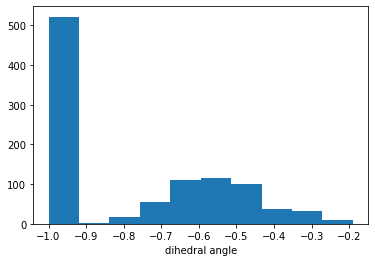

In [115]:
plt.hist(dihedrals)
plt.xlabel("dihedral angle")
plt.show()

In [110]:
len(dihedrals)

1000

In [40]:
for i, dihedral in enumerate(dihedrals):
    if dihedral < -0.9999:
        print("-1", i, dihedral)
    elif dihedral < 0.01 and dihedral > -0.01:
        print("0", i, dihedral)
    elif dihedral > 0.75:
        print("1", i, dihedral)

1 98 [0.8845146]
0 115 [0.00922181]
-1 118 [-0.99992514]
1 218 [0.82333153]
-1 347 [-0.99995774]
-1 371 [-0.99994415]


In [41]:
traj[[118]].save("../data/gps_with_restraints/rotamer_0.pdb")

In [42]:
traj[[115]].save("../data/gps_with_restraints/rotamer_1.pdb")

In [43]:
traj[[98]].save("../data/gps_with_restraints/rotamer_2.pdb")

In [ ]:
### Note: the trajs I sent dominic are from generating 400 geometry proposals, where the histogram had a max of 0.75

In [98]:
import time
import progressbar
from simtk import openmm, unit
from simtk.openmm import app
from openmmtools.integrators import LangevinIntegrator
import argparse 
import mdtraj as md
import os

#
# Global simulation parameters
#

water_model = 'tip3p'
hydrogen_mass = 4.0 * unit.amu

forcefield_files = ['amber14/protein.ff14SB.xml', 'amber14/tip3p.xml']
barostat = None
forcefield_kwargs = {'removeCMMotion': False, 'ewaldErrorTolerance': 1e-4, 'hydrogenMass' : 4 * unit.amus}
periodic_forcefield_kwargs = None
nonperiodic_forcefield_kwargs = {'nonbondedMethod': app.NoCutoff}

pressure = 1.0 * unit.atmospheres
temperature = 310 * unit.kelvin
collision_rate = 1.0 / unit.picoseconds
timestep = 2.0 * unit.femtoseconds
splitting = 'V R O R V'
nsteps = 5000 # 10 ps
niterations = 8 # 80 ps

output_prefix = '/home/zhangi/choderalab/perses_benchmark/perses_protein_mutations/data/gps_with_restraints/'
equilibrated_pdb_filename = 'equilibrated.pdb'

# Read in the heavy atom model
pdb_filename = os.path.join(output_prefix, f'rotamer_{0}.pdb')
print('Loading %s' % pdb_filename)
pdb = app.PDBFile(pdb_filename)



Loading /home/zhangi/choderalab/perses_benchmark/perses_protein_mutations/data/gps_with_restraints/rotamer_0.pdb


In [99]:
# Create the system
print('Creating OpenMM System...')
molecules = []
system_generator = SystemGenerator(forcefields=forcefield_files,
                                                barostat=barostat,
                                                forcefield_kwargs=forcefield_kwargs,
                                                periodic_forcefield_kwargs=periodic_forcefield_kwargs,
                                   nonperiodic_forcefield_kwargs=nonperiodic_forcefield_kwargs,
                                                molecules=molecules,
                                                cache=None)
system = system_generator.create_system(pdb.topology)



Creating OpenMM System...


In [100]:
# Serialize integrator
integrator = openmm.LangevinIntegrator(temperature, collision_rate, timestep)


In [101]:
# Minimize
print('Minimizing energy...')
context = openmm.Context(system, integrator)
context.setPositions(pdb.positions)
print('  initial : %8.3f kcal/mol' % (context.getState(getEnergy=True).getPotentialEnergy()/unit.kilocalories_per_mole))
openmm.LocalEnergyMinimizer.minimize(context)
print('  final   : %8.3f kcal/mol' % (context.getState(getEnergy=True).getPotentialEnergy()/unit.kilocalories_per_mole))


Minimizing energy...
  initial :   81.586 kcal/mol
  final   :  -47.489 kcal/mol


In [102]:
# Equilibrate
print('Equilibrating...')
initial_time = time.time()
positions = list()
for iteration in range(niterations):
    integrator.step(nsteps)
    pos = context.getState(getPositions=True, enforcePeriodicBox=False).getPositions(asNumpy=True)
    positions.append(pos.value_in_unit_system(unit.md_unit_system))

elapsed_time = (time.time() - initial_time) * unit.seconds
simulation_time = niterations * nsteps * timestep
print('    Equilibration took %.3f s for %.3f ns (%8.3f ns/day)' % (elapsed_time / unit.seconds, simulation_time / unit.nanoseconds, simulation_time / elapsed_time * unit.day / unit.nanoseconds))


Equilibrating...
    Equilibration took 49.347 s for 0.080 ns ( 140.068 ns/day)


In [103]:
traj = md.Trajectory(np.array(np.array(positions)), md.Topology.from_openmm(pdb.topology))
traj.save(os.path.join(output_prefix, f"rotamer_{0}_traj.pdb"))